In [1]:
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.lines as lines

import numpy as np
import pickle
import os
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset



from utilities.dataset import distribution_data_sampler
from utilities import constants, dataset

# import scipy.stats as stats

from utilities.custom_layers import BaseEncoder, BaseDecoder, PreprocessingWrapper
# from utilities import funcs

n_samples = 10000

2023-04-28 11:37:04.560824: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [62]:
param_dict = {
    # if 'acpect' * 'height' is similar then the width will also be similar
    # more plots needs less 'height' to avoid overblowing the size
    # 'hspace' defines the space between the plots, negative means overlapping
    2 :
    {
    'dataset_n' : 0,
    },
    3 :
    {
    'dataset_n' : 1,
    },
    4 :
    {
    'dataset_n' : 3,
    },
    6 :
    {
    'dataset_n' : 5,
    },
    8 :
    {
    'dataset_n' : 7,
    },
    12 :
    {
    'dataset_n' : 9,
    },
    16 :
    {
    'dataset_n' : 11,
    },
    24 :
    {
    'dataset_n' : 13,
    },
    32 :
    {
    'dataset_n' : 15,
    }
}

In [113]:
def plotting_hist_plot(dist_name, base, total_height=32, bins='auto', hspace=0, binwidth=1):
    
    params = param_dict[base]
    # loading the data
    df_raw = dataset.load_toy_dataset(path='./datasets/synthetic/sin_y/*')
    loader = constants.TRANSFORMATIONS['numerical_encoding']
    layer = loader['preproc_layer']
    base_param = loader['params'][params['dataset_n']]
    transformation_layer = PreprocessingWrapper(layer(**base_param))
    
    x = transformation_layer(df_raw[dist_name]['x'])
    df_ne = pd.DataFrame(x)
    result = df_ne.apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)
    result_melted = result.reset_index().melt(id_vars='index')
    data = result_melted.astype(int)

    num_categories = len(data['variable'].unique())

    df = pd.DataFrame(data, columns=['value', 'variable'])#.sort_values(by='variable', ascending=False)

    # plotting
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'figure.figsize':(1, 5)})
    palette = sns.color_palette("deep", num_categories)

    g = sns.FacetGrid(df, row="variable", hue="variable", aspect=base, height=total_height/base, palette=palette)
    g.map(sns.histplot, "value", bins=bins, clip_on=False, alpha=0.7, discrete=True,  element="step")
    g.map(plt.axhline, y=0, lw=2)

    g.fig.subplots_adjust(hspace=hspace)

    # Removing and adding some labels
    g.set_titles("")
#     g.fig.supxlabel('Frequencies', fontsize=12)
#     g.fig.supylabel('Digits', fontsize=20)


    x_ticks = np.arange(0, 33, 1)
    g.set(yticks=[], ylabel="")
    g.set(xticks=[], xlabel="",)

    # Set custom y-axis labels
    for i, ax in enumerate(g.axes.flat):
        ax.set_ylabel(i, fontsize=(40+base)/1.5)

        ax.grid(True, axis='both')
  
    ax.set_xticks(x_ticks)
    ax.set_xticklabels((x_ticks).astype(int), fontsize=30)


    g.despine(bottom=True, left=True)
    plt.savefig(f'plots/auxiliary/{dist_name}_{base}.png')
    plt.show()

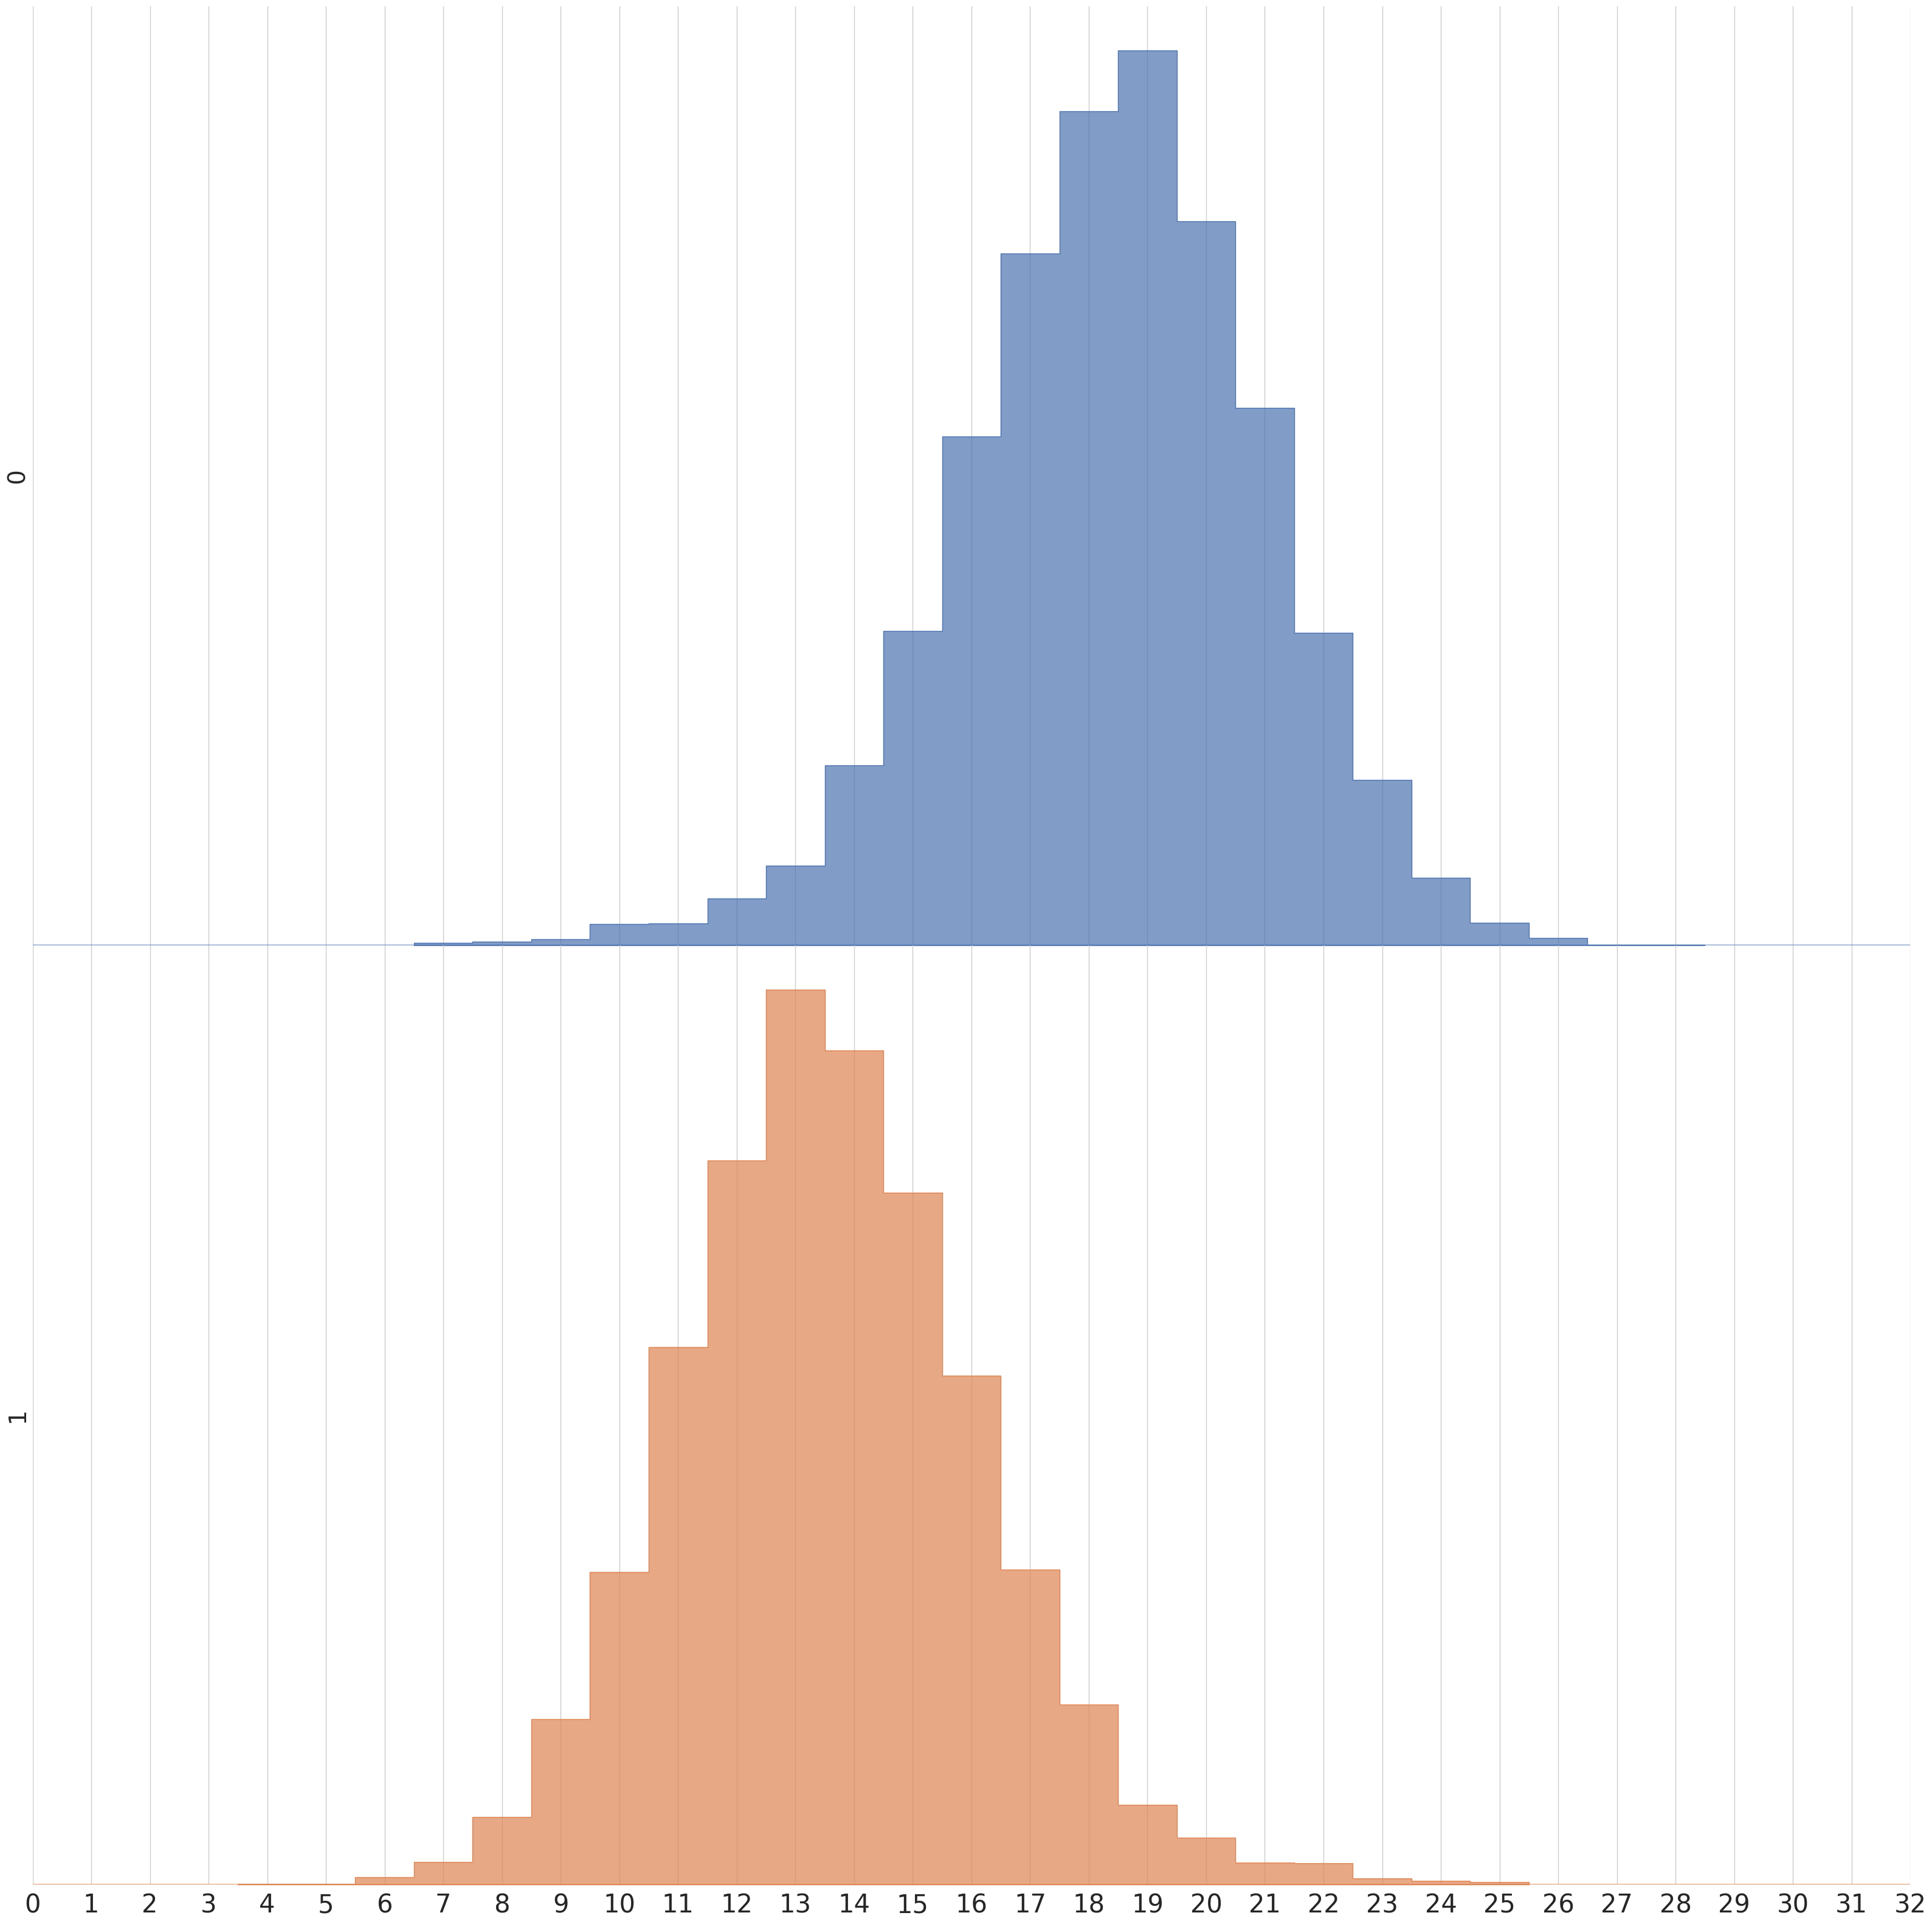

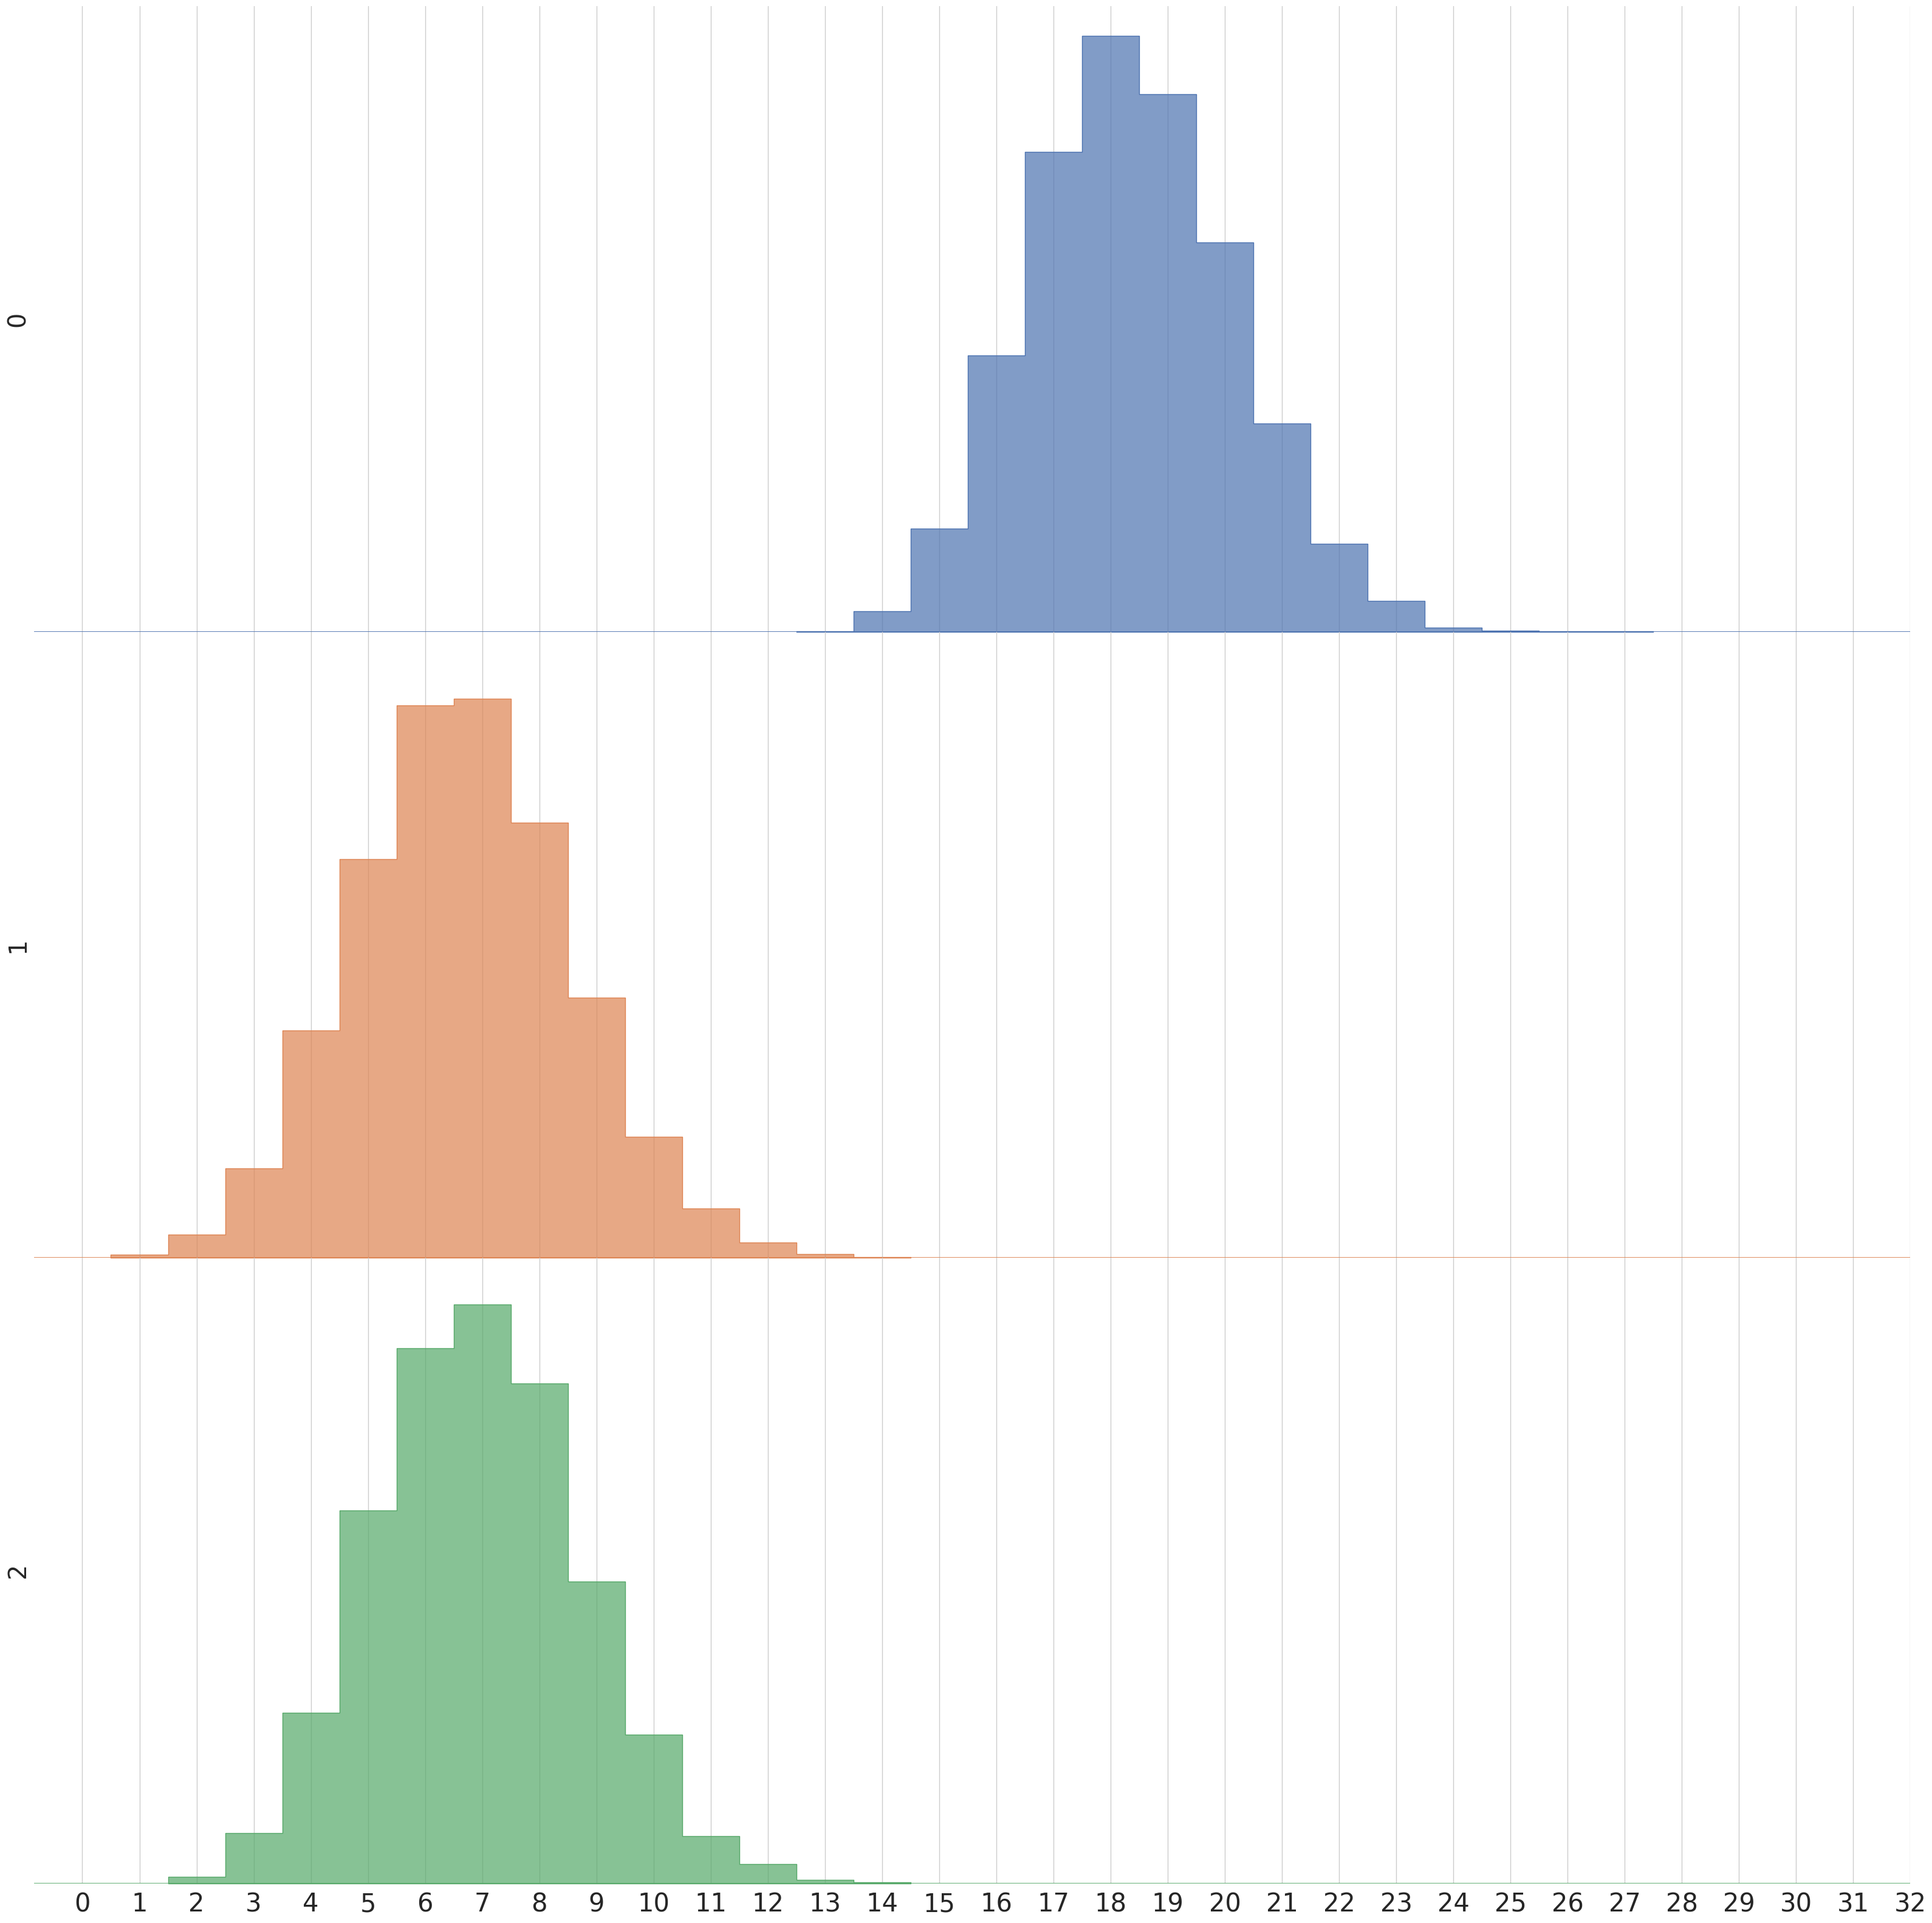

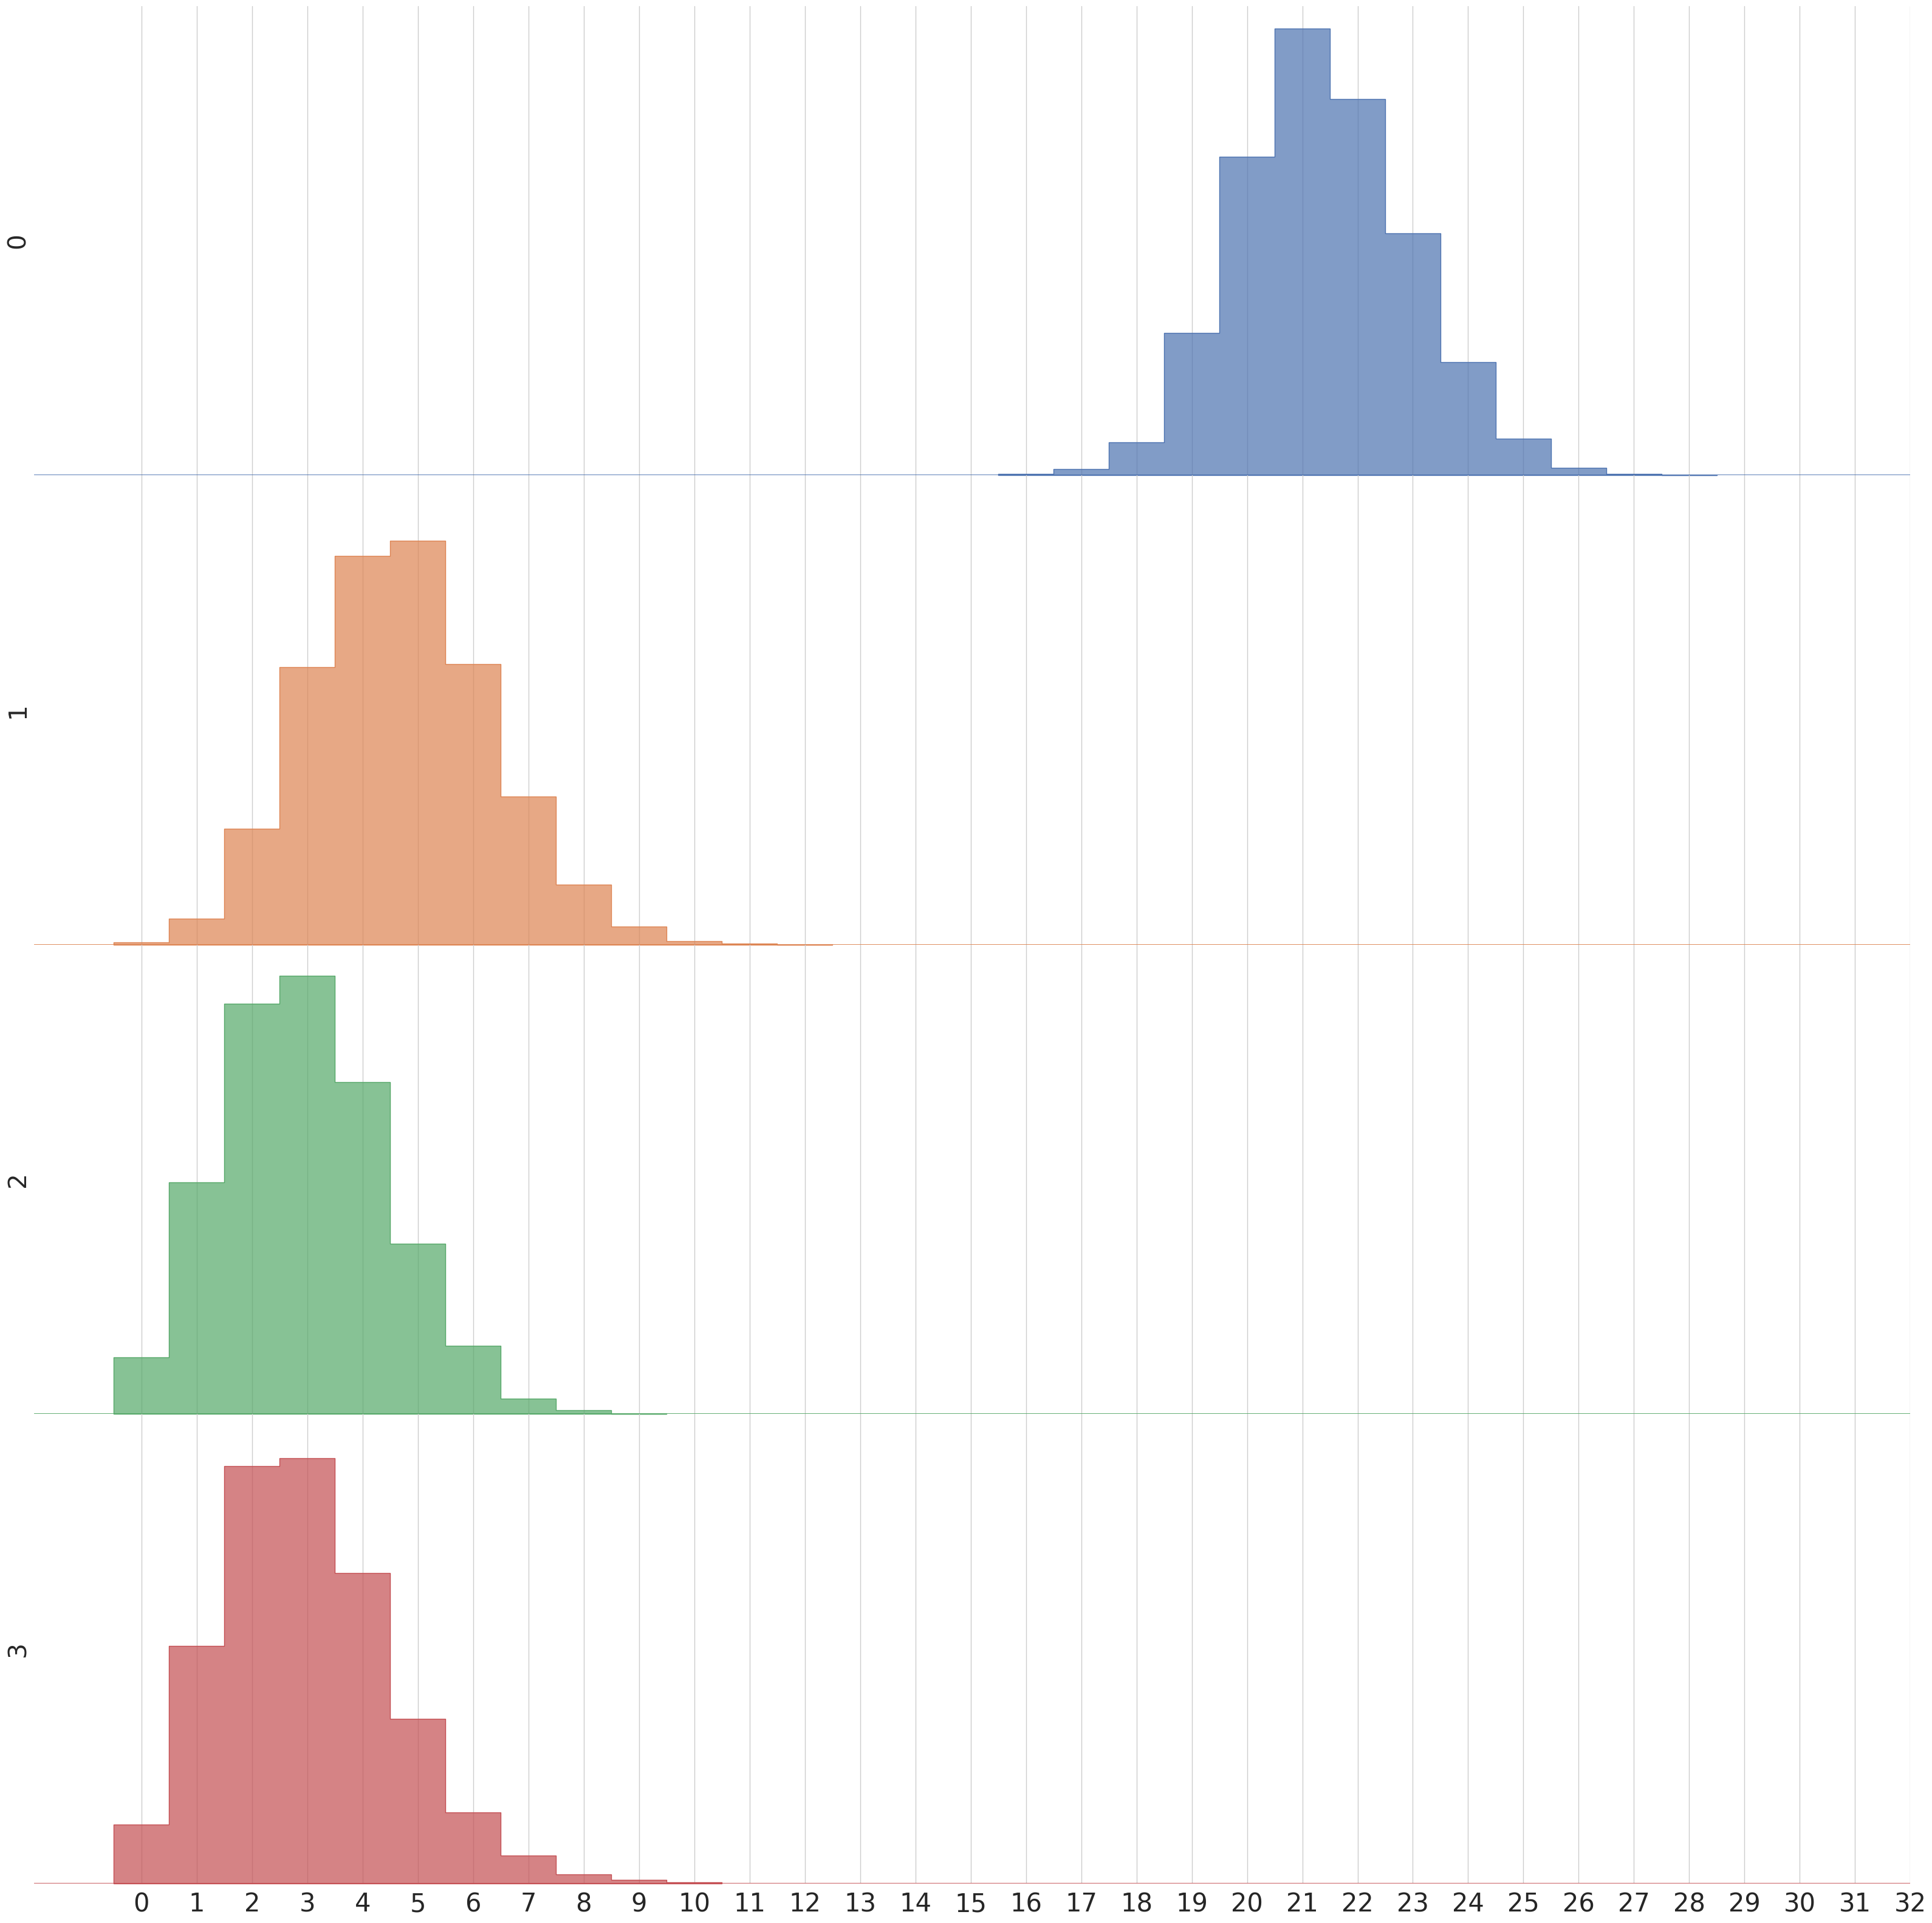

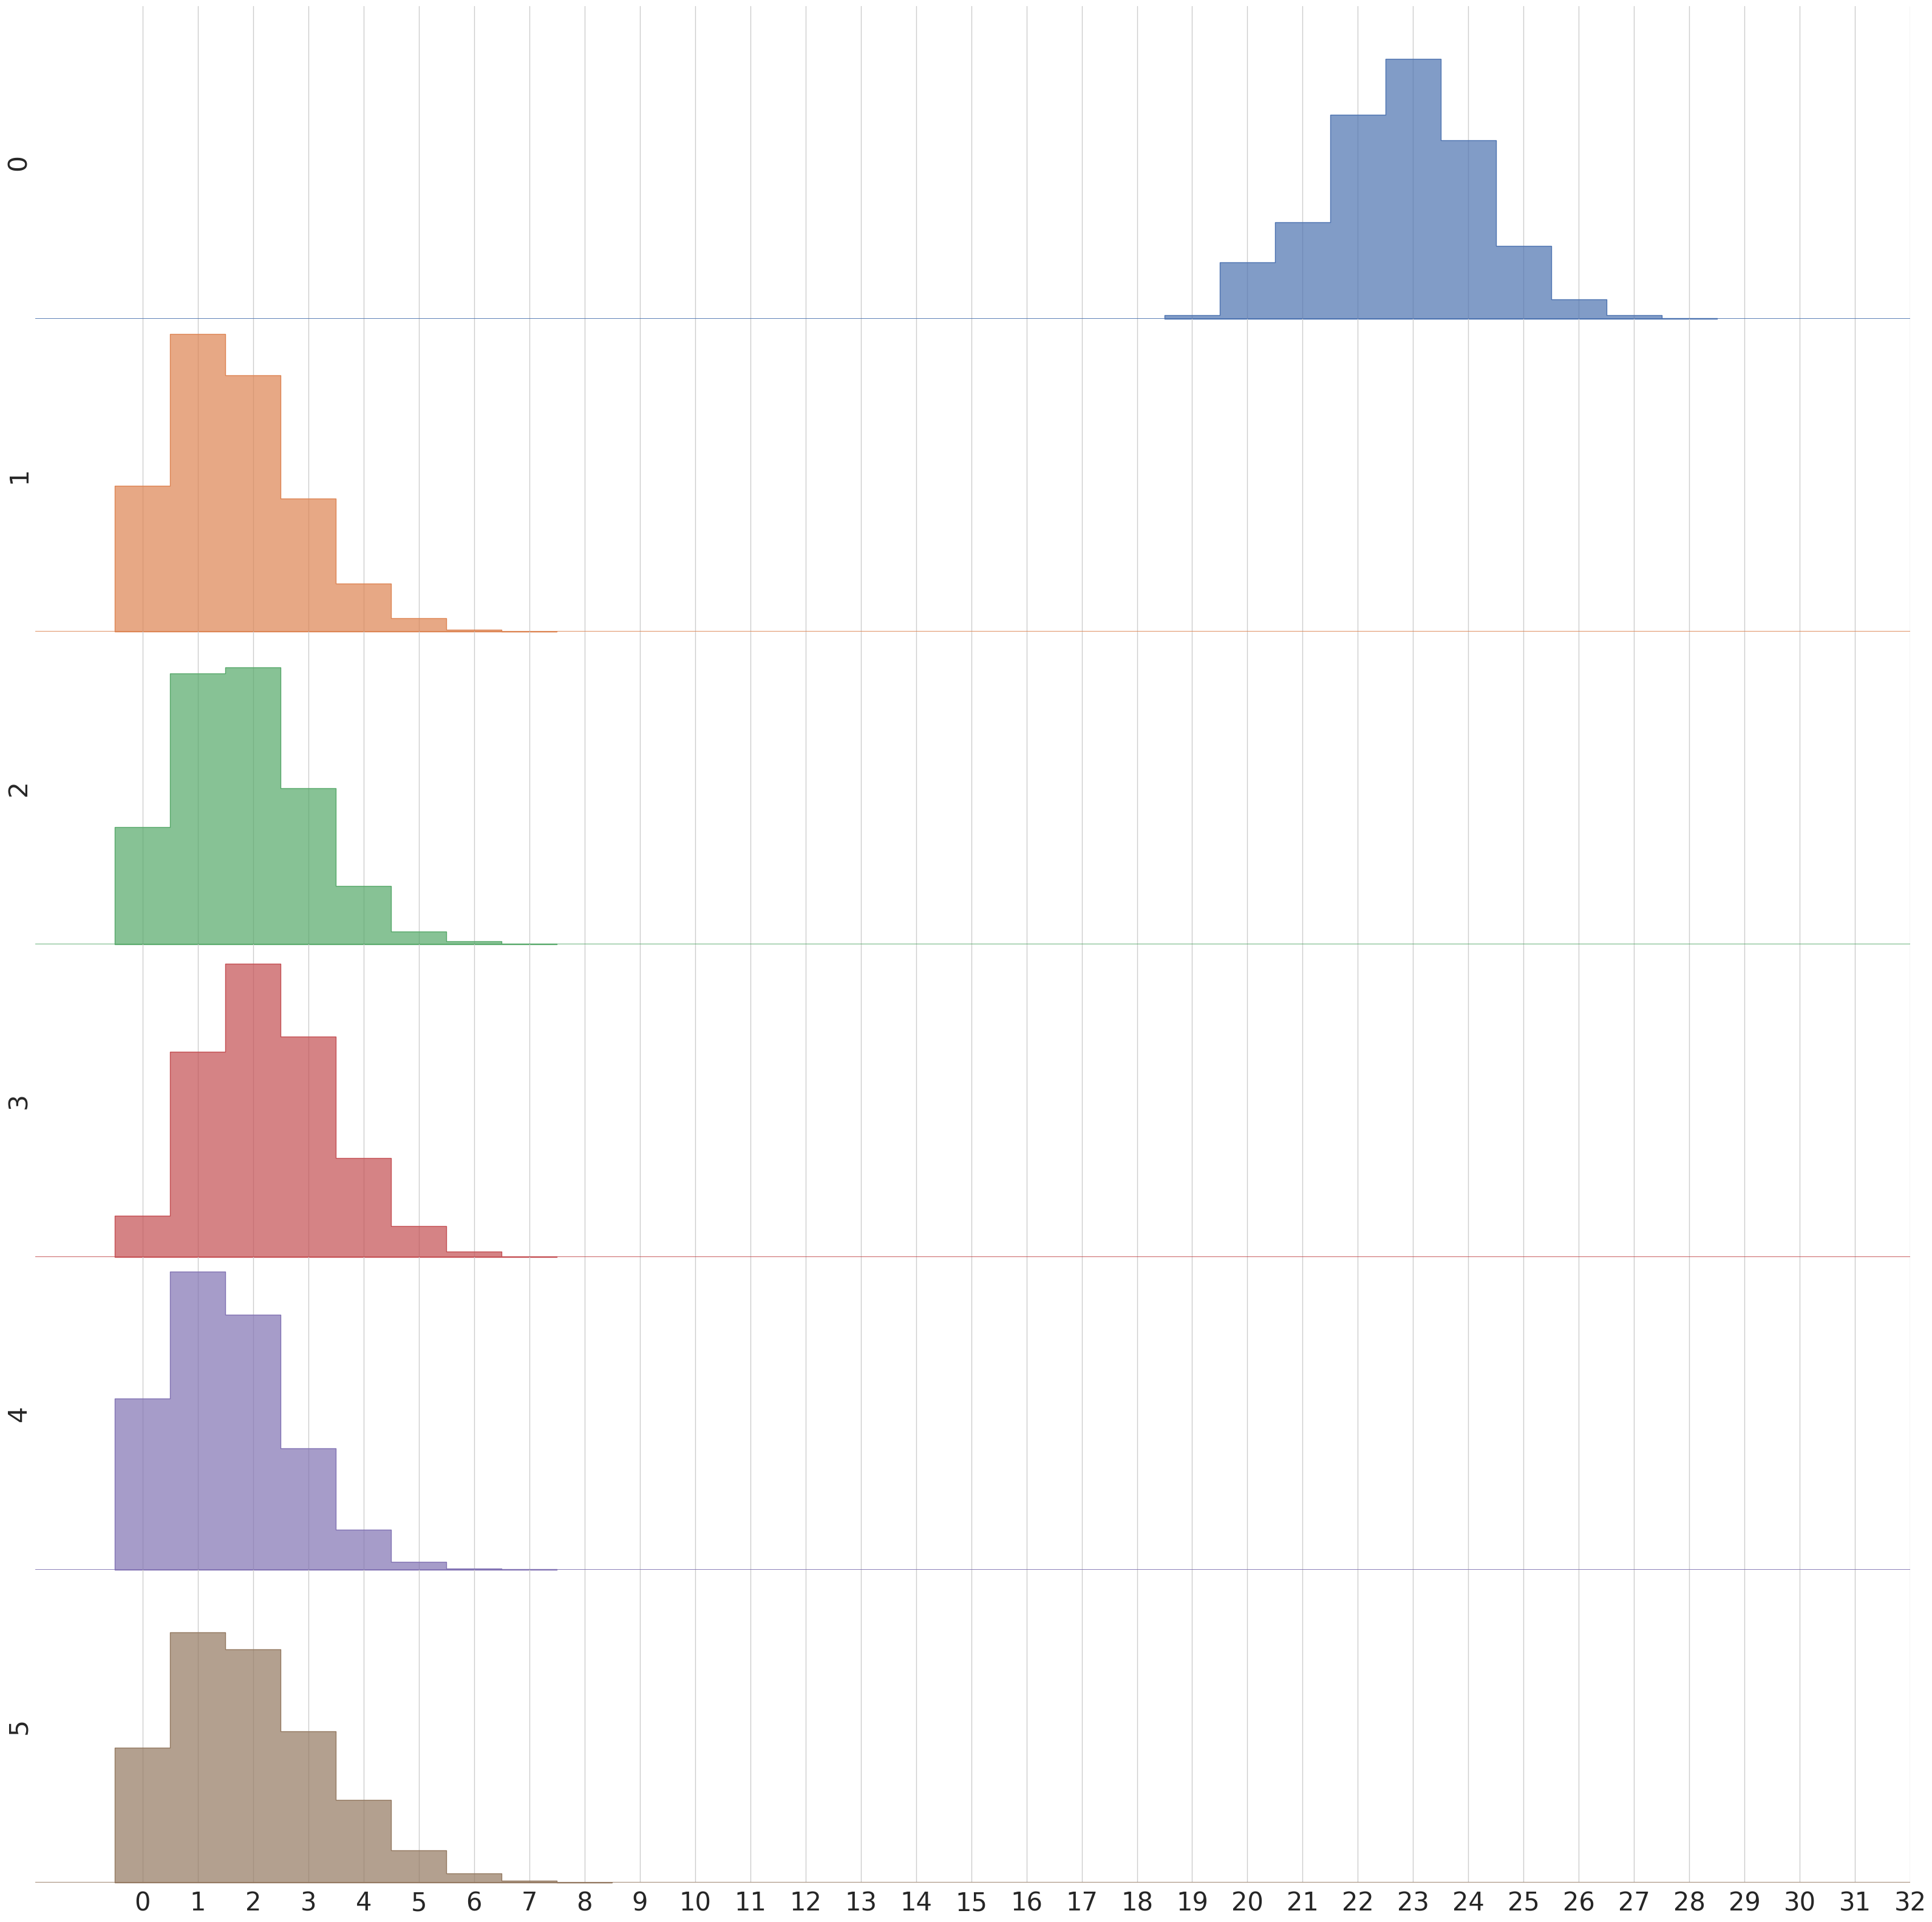

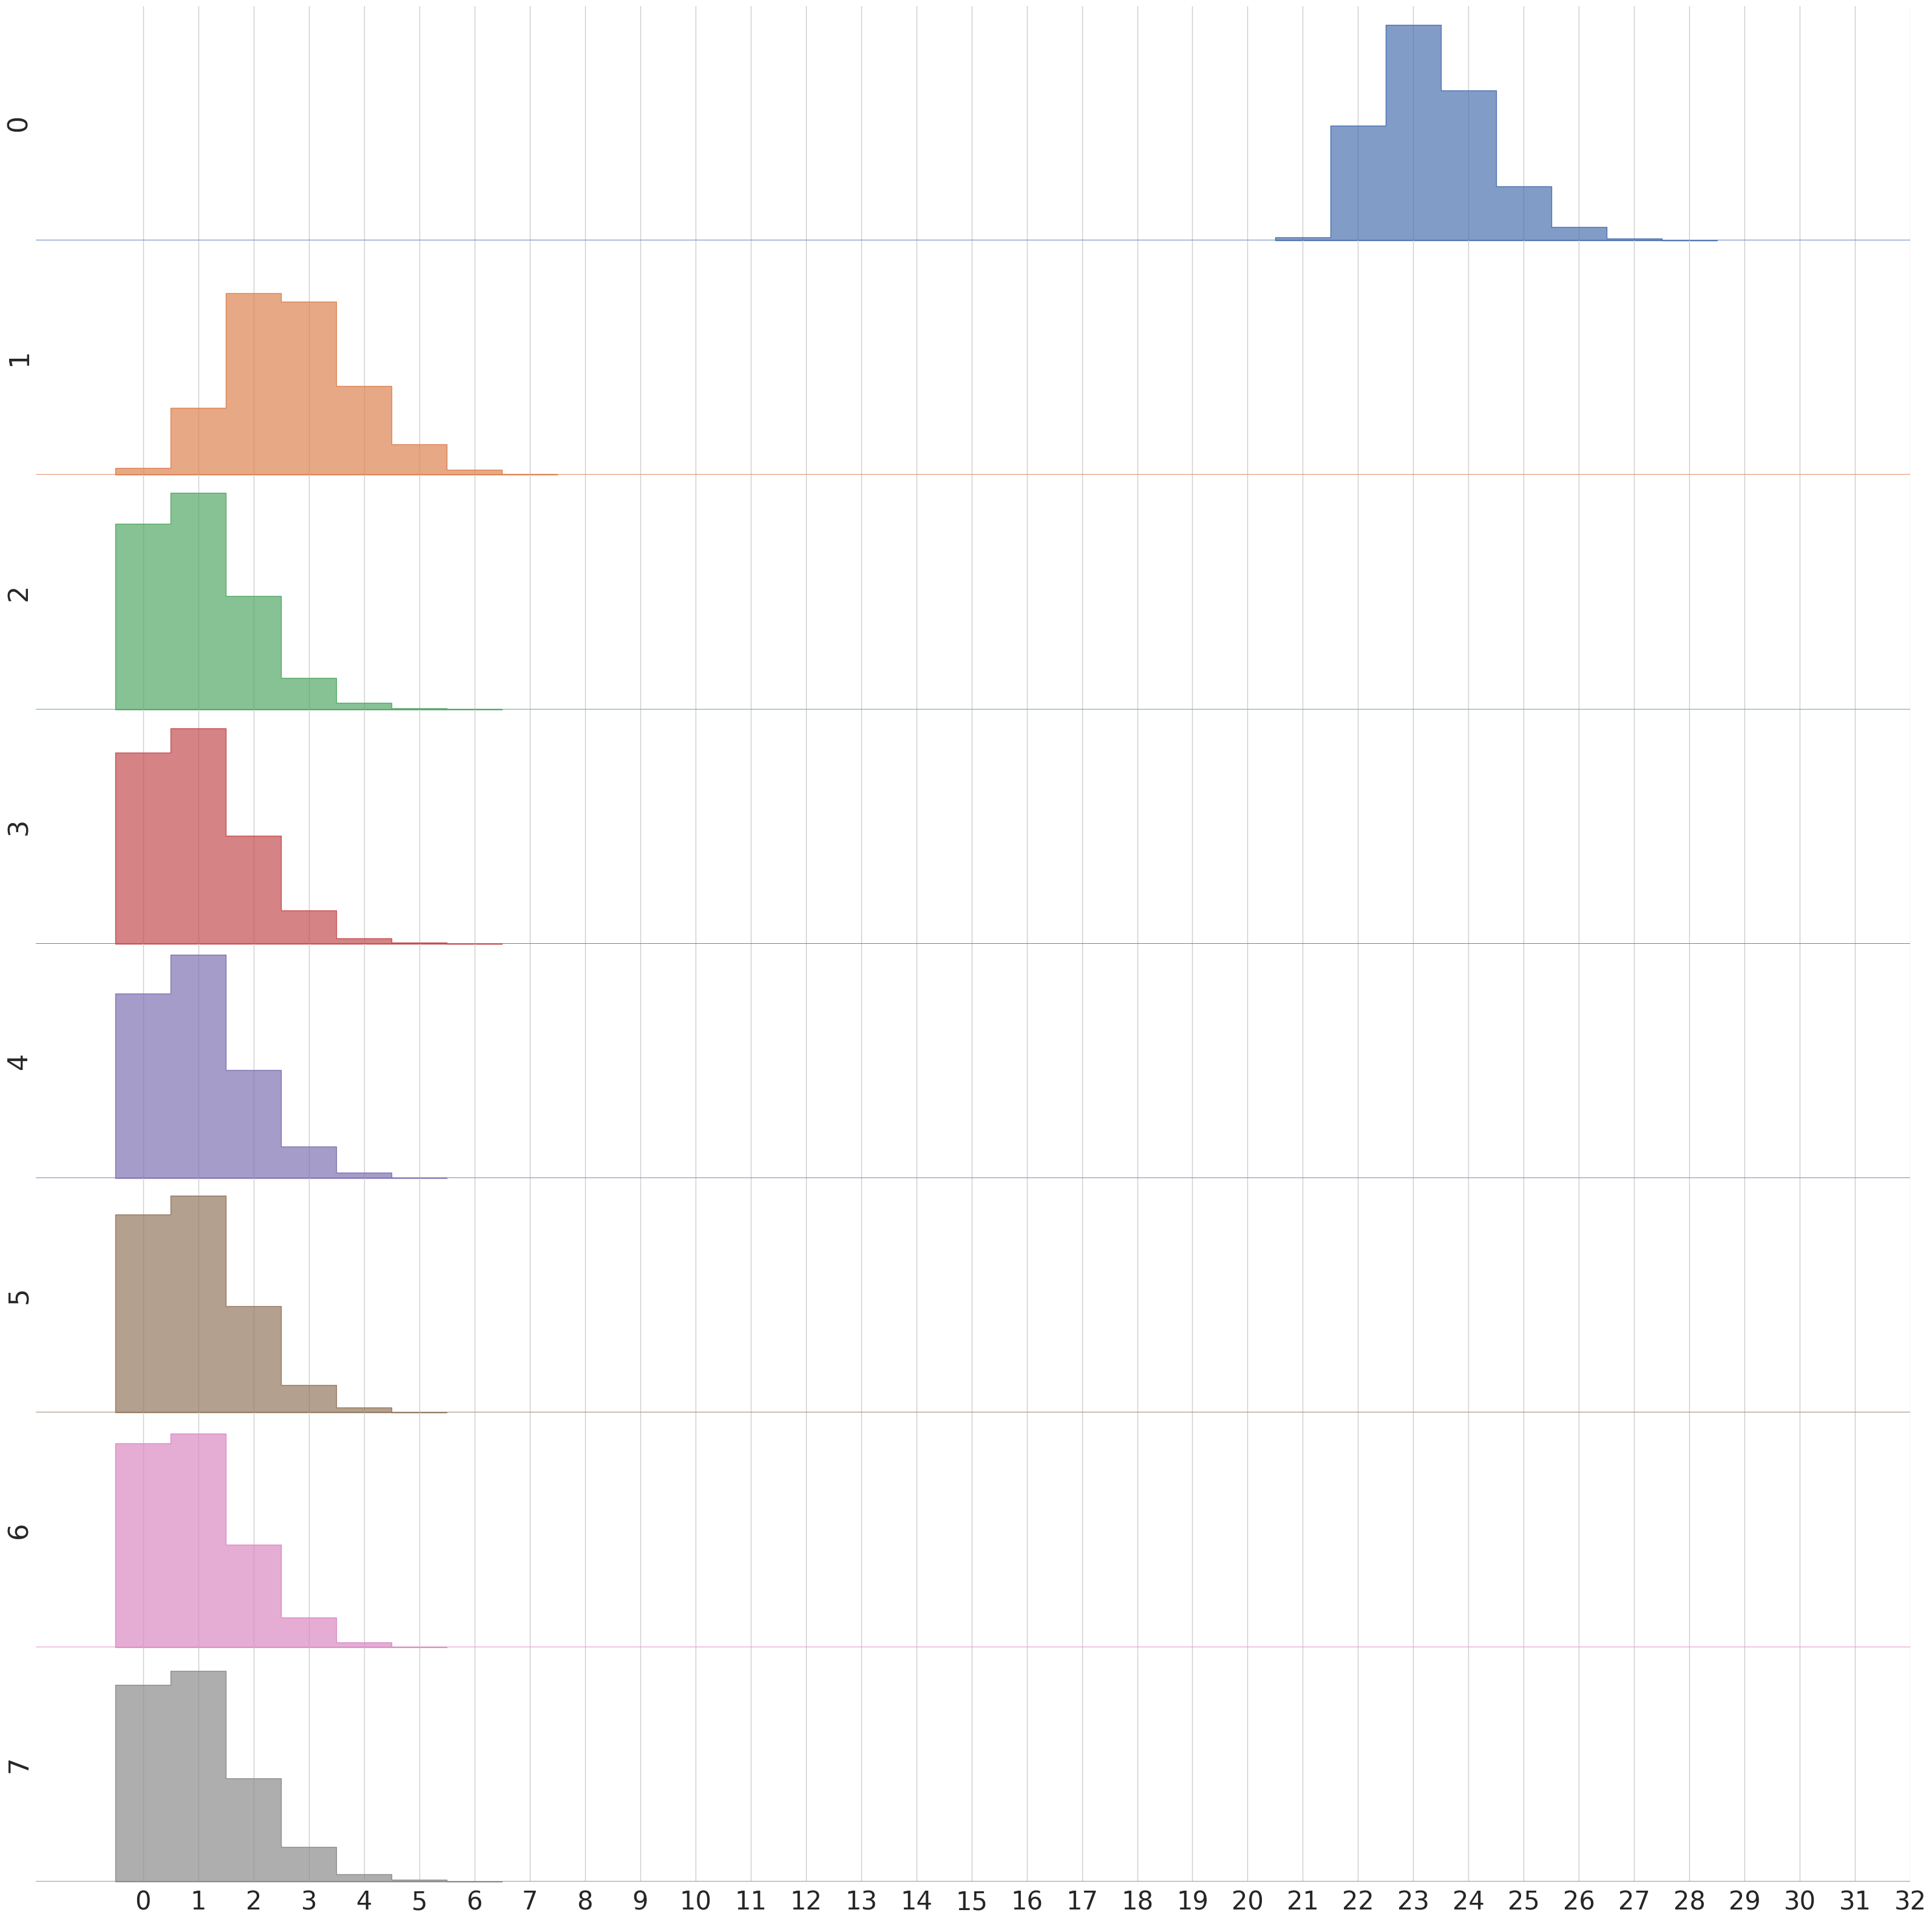

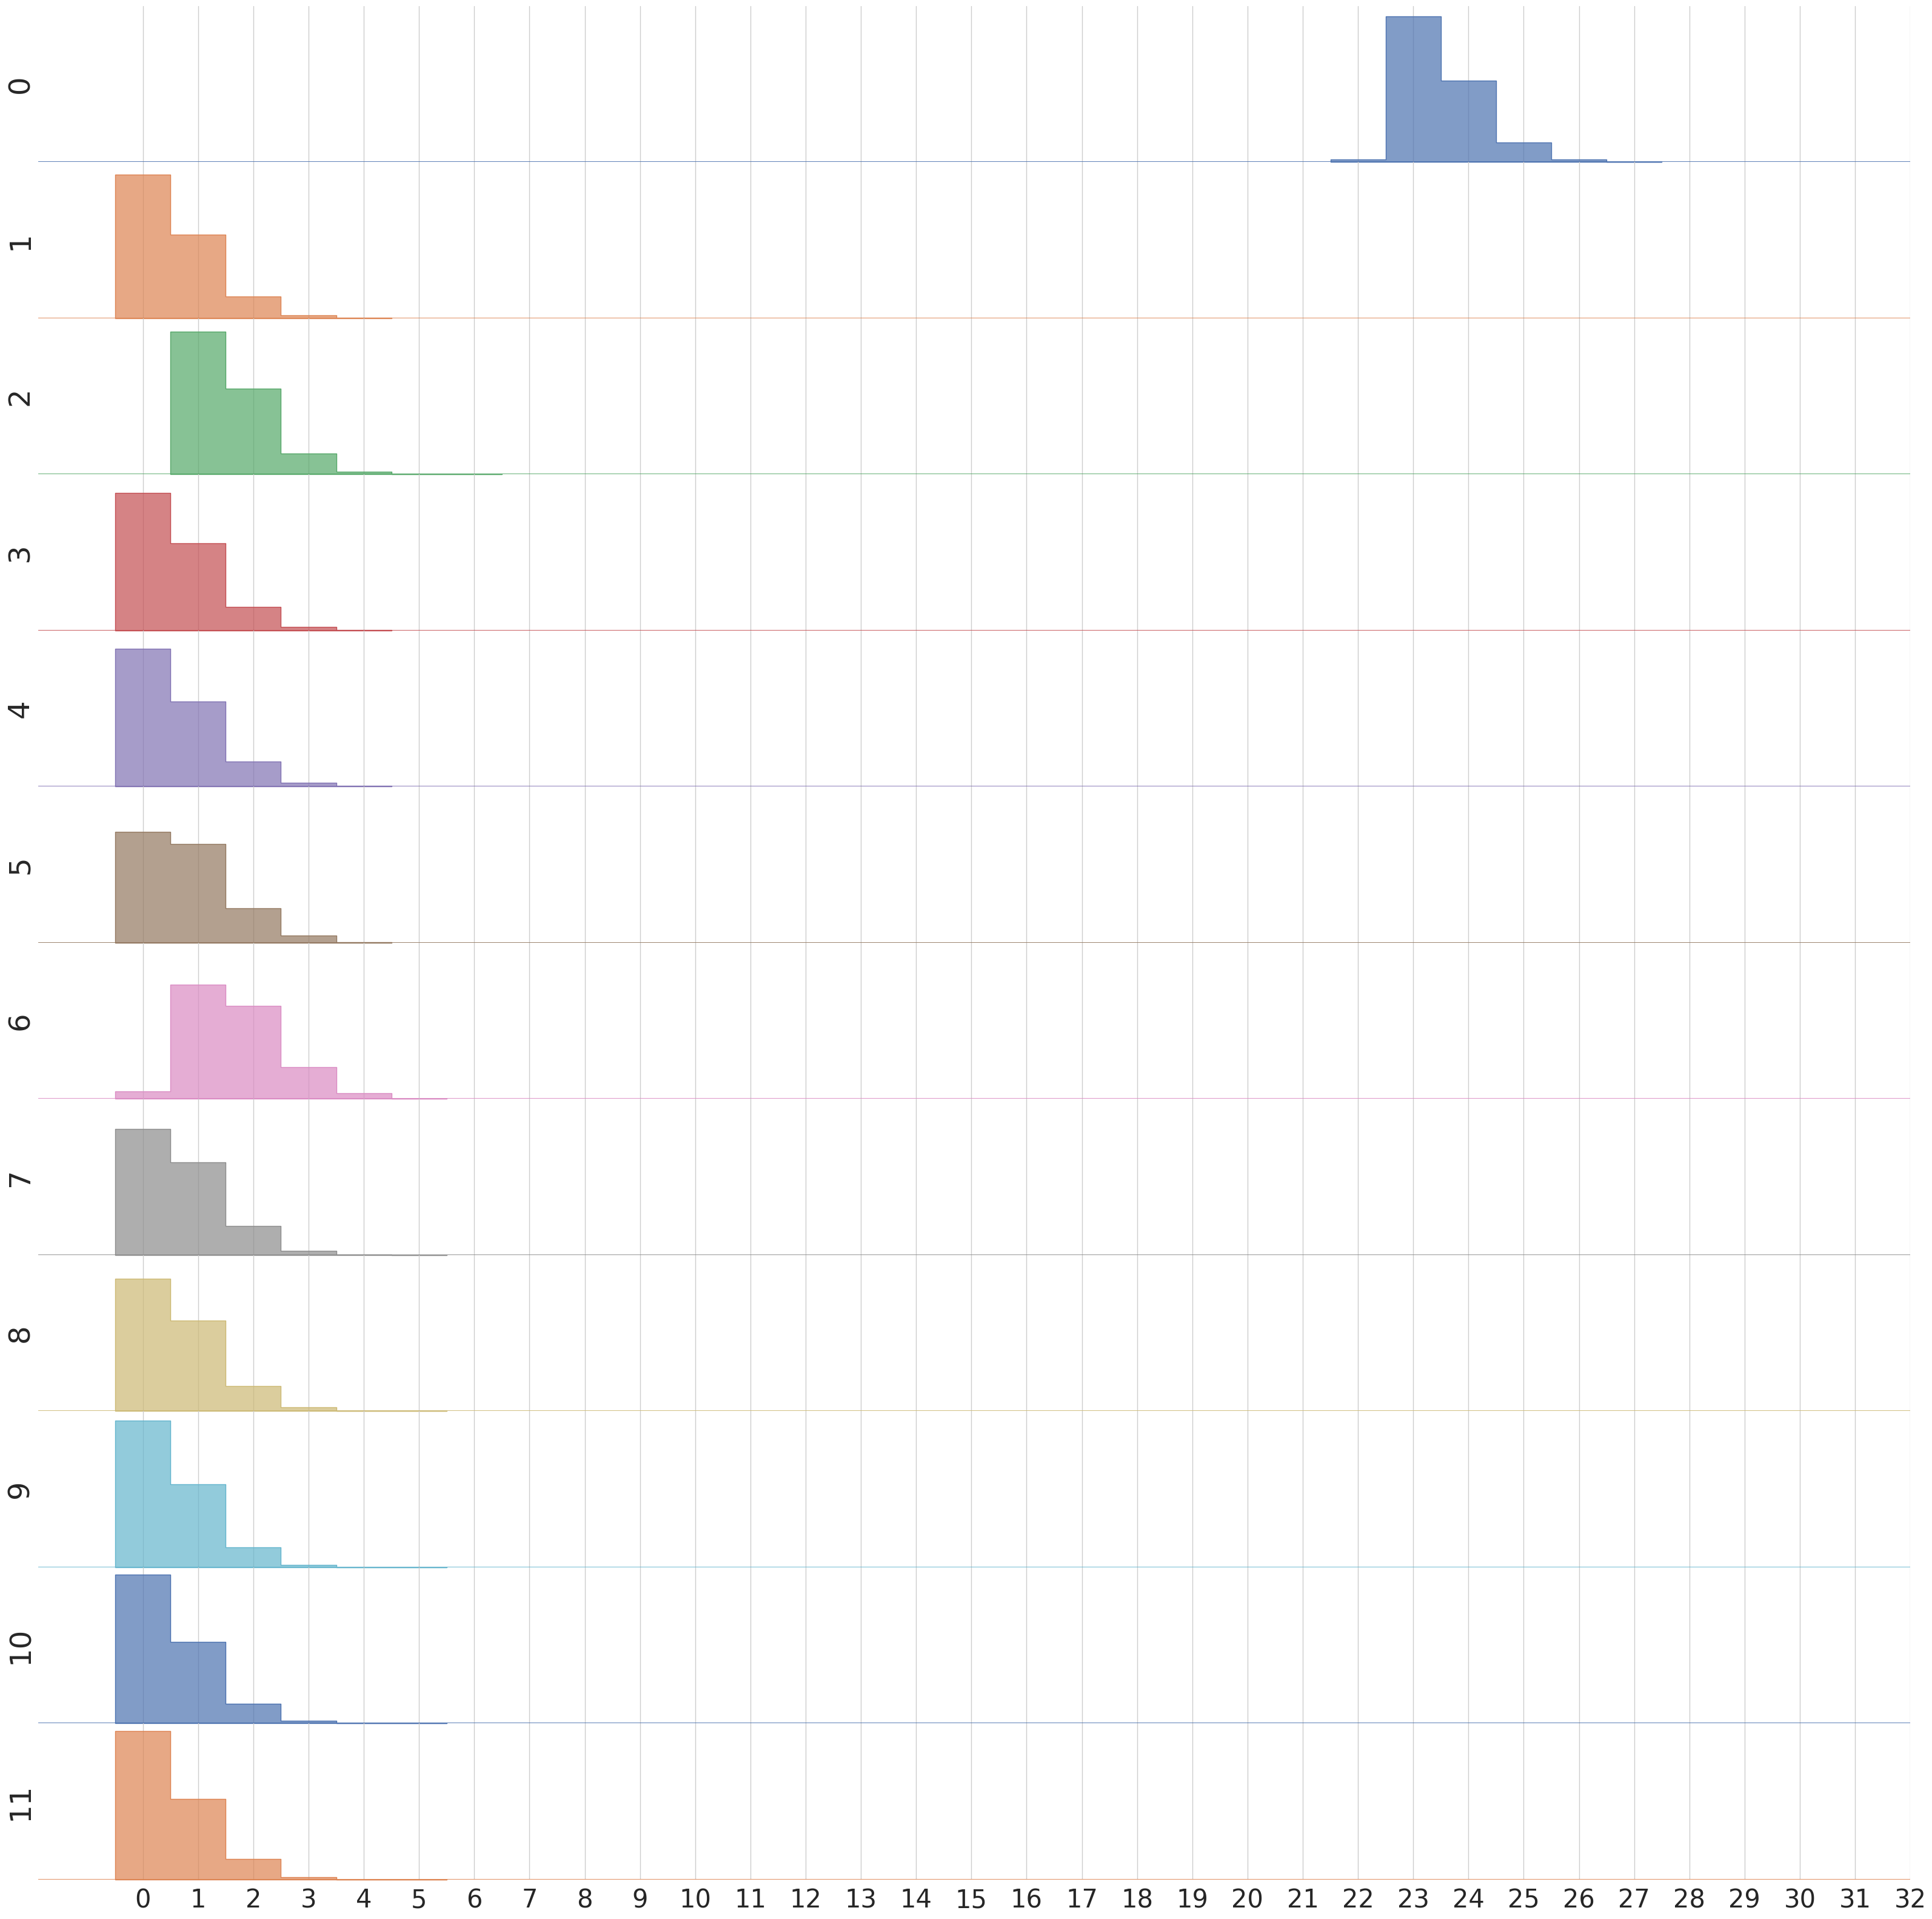

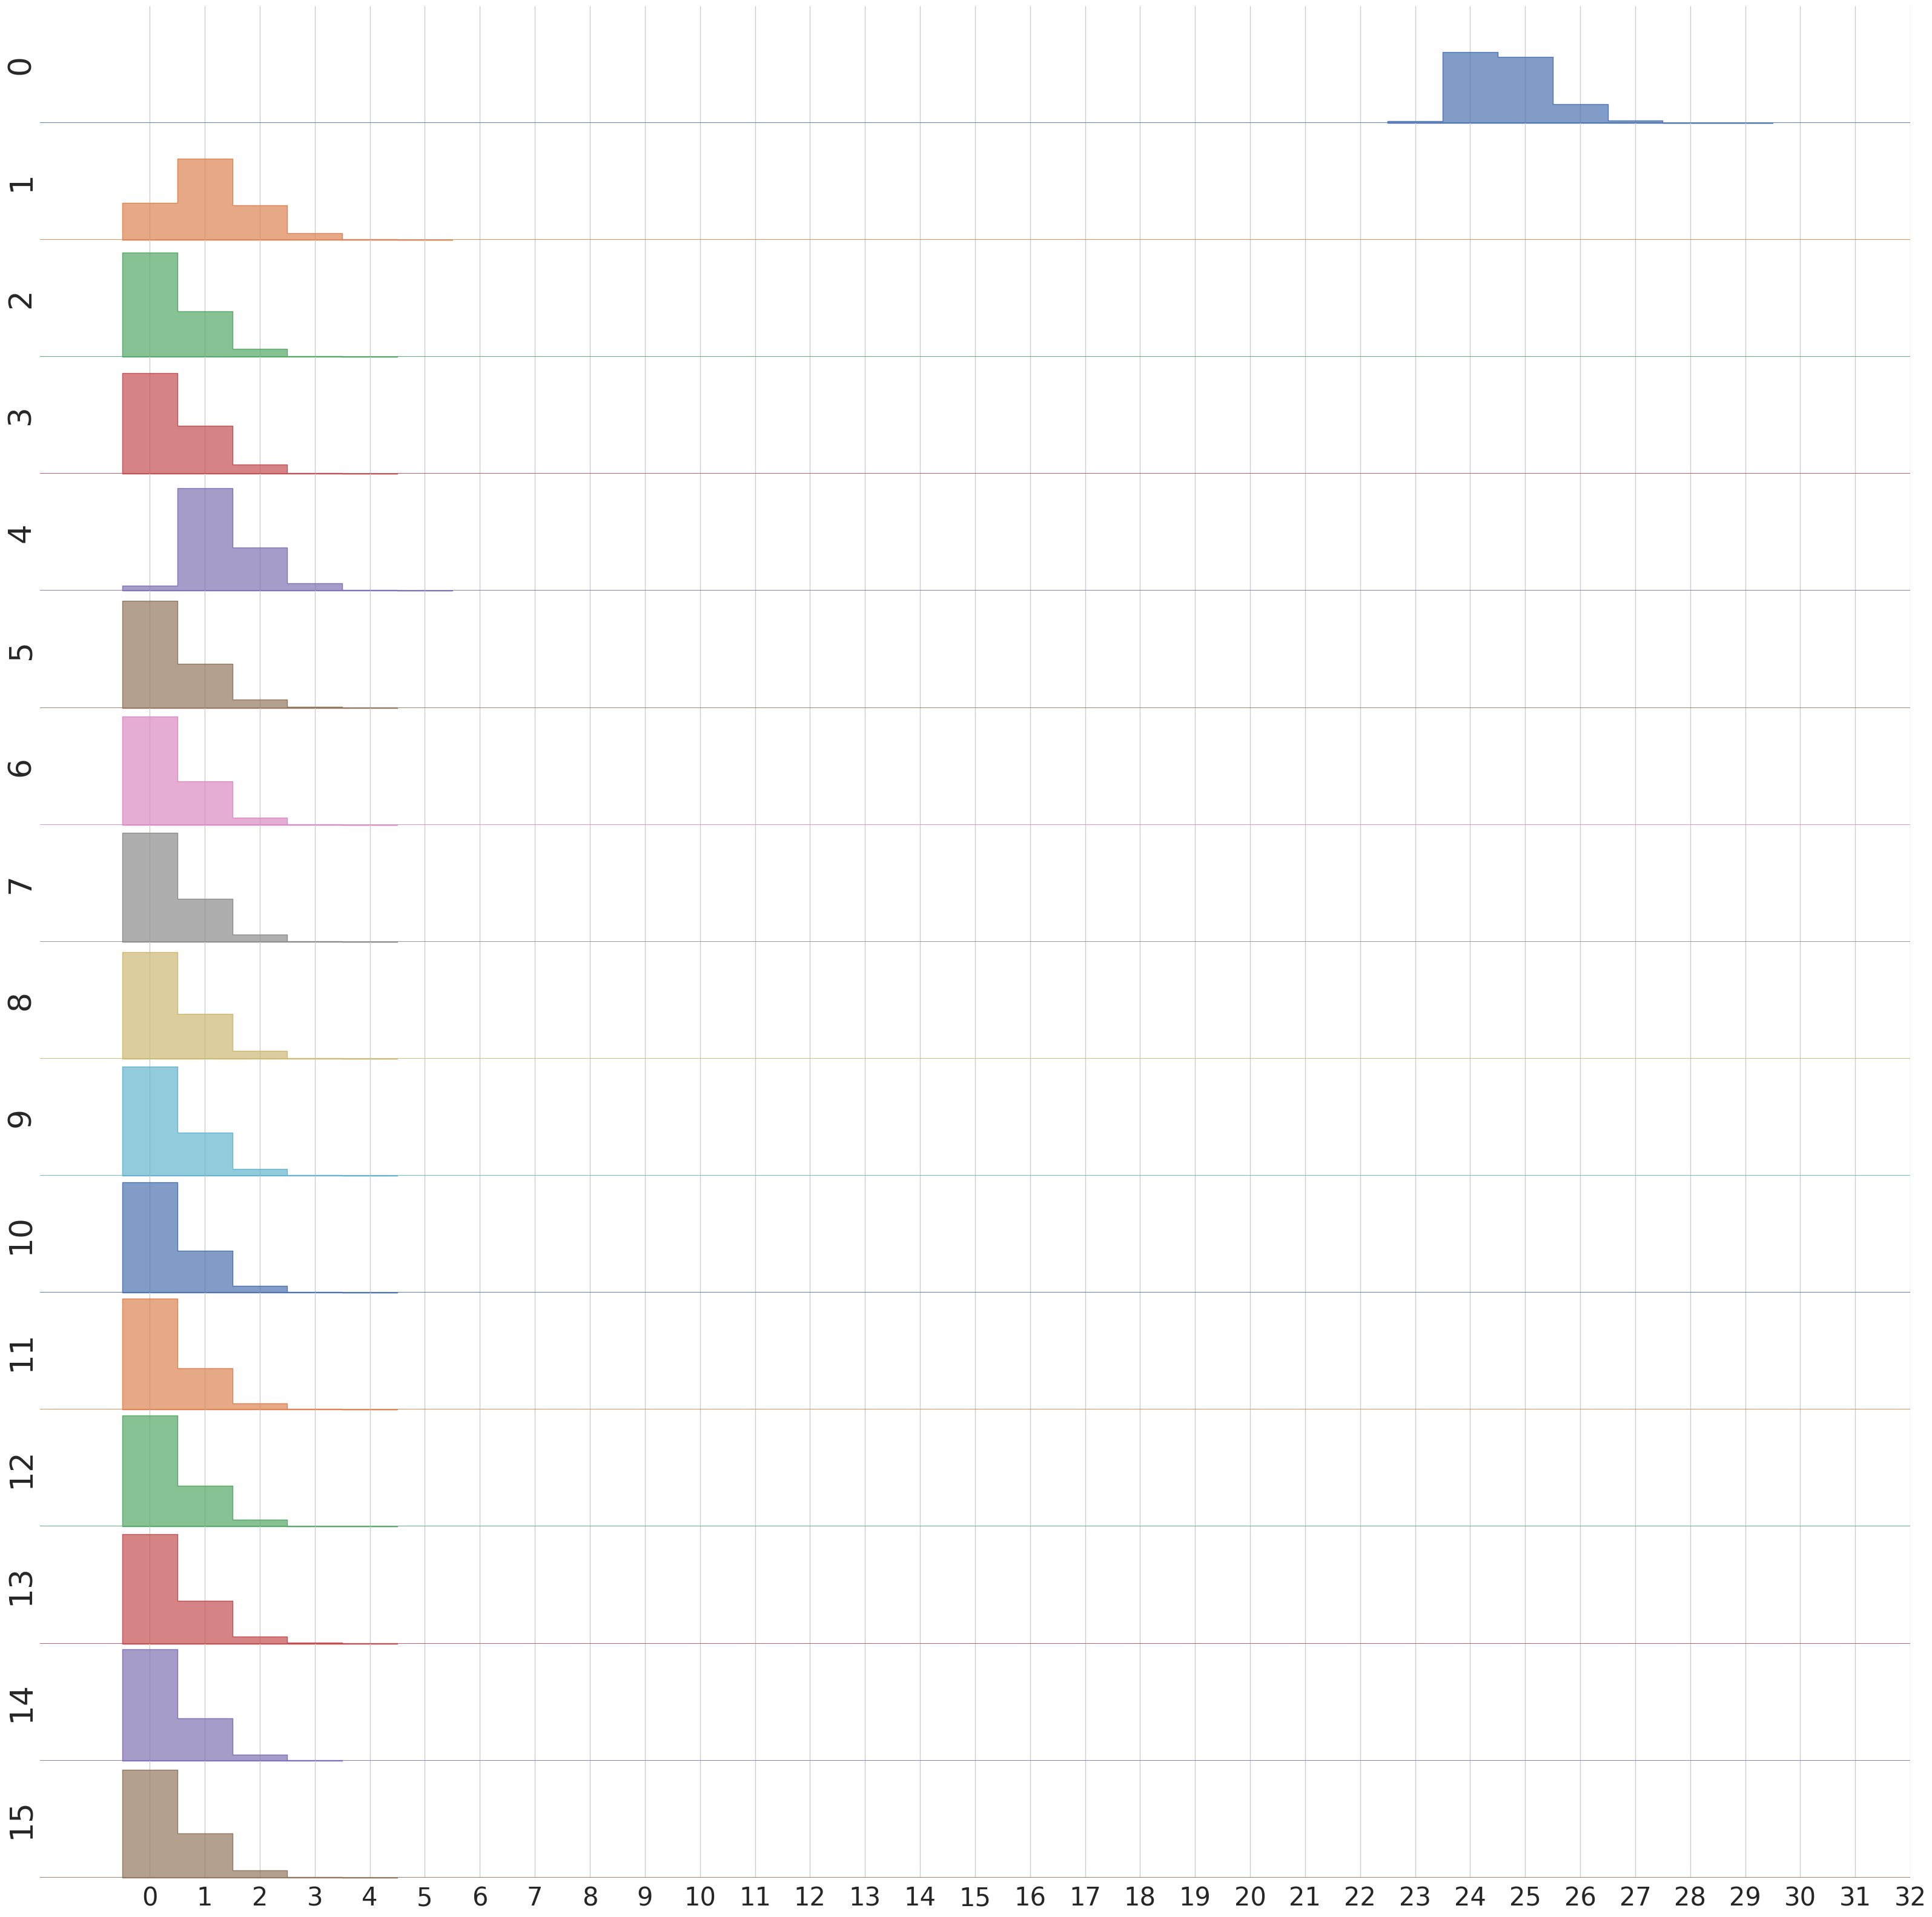

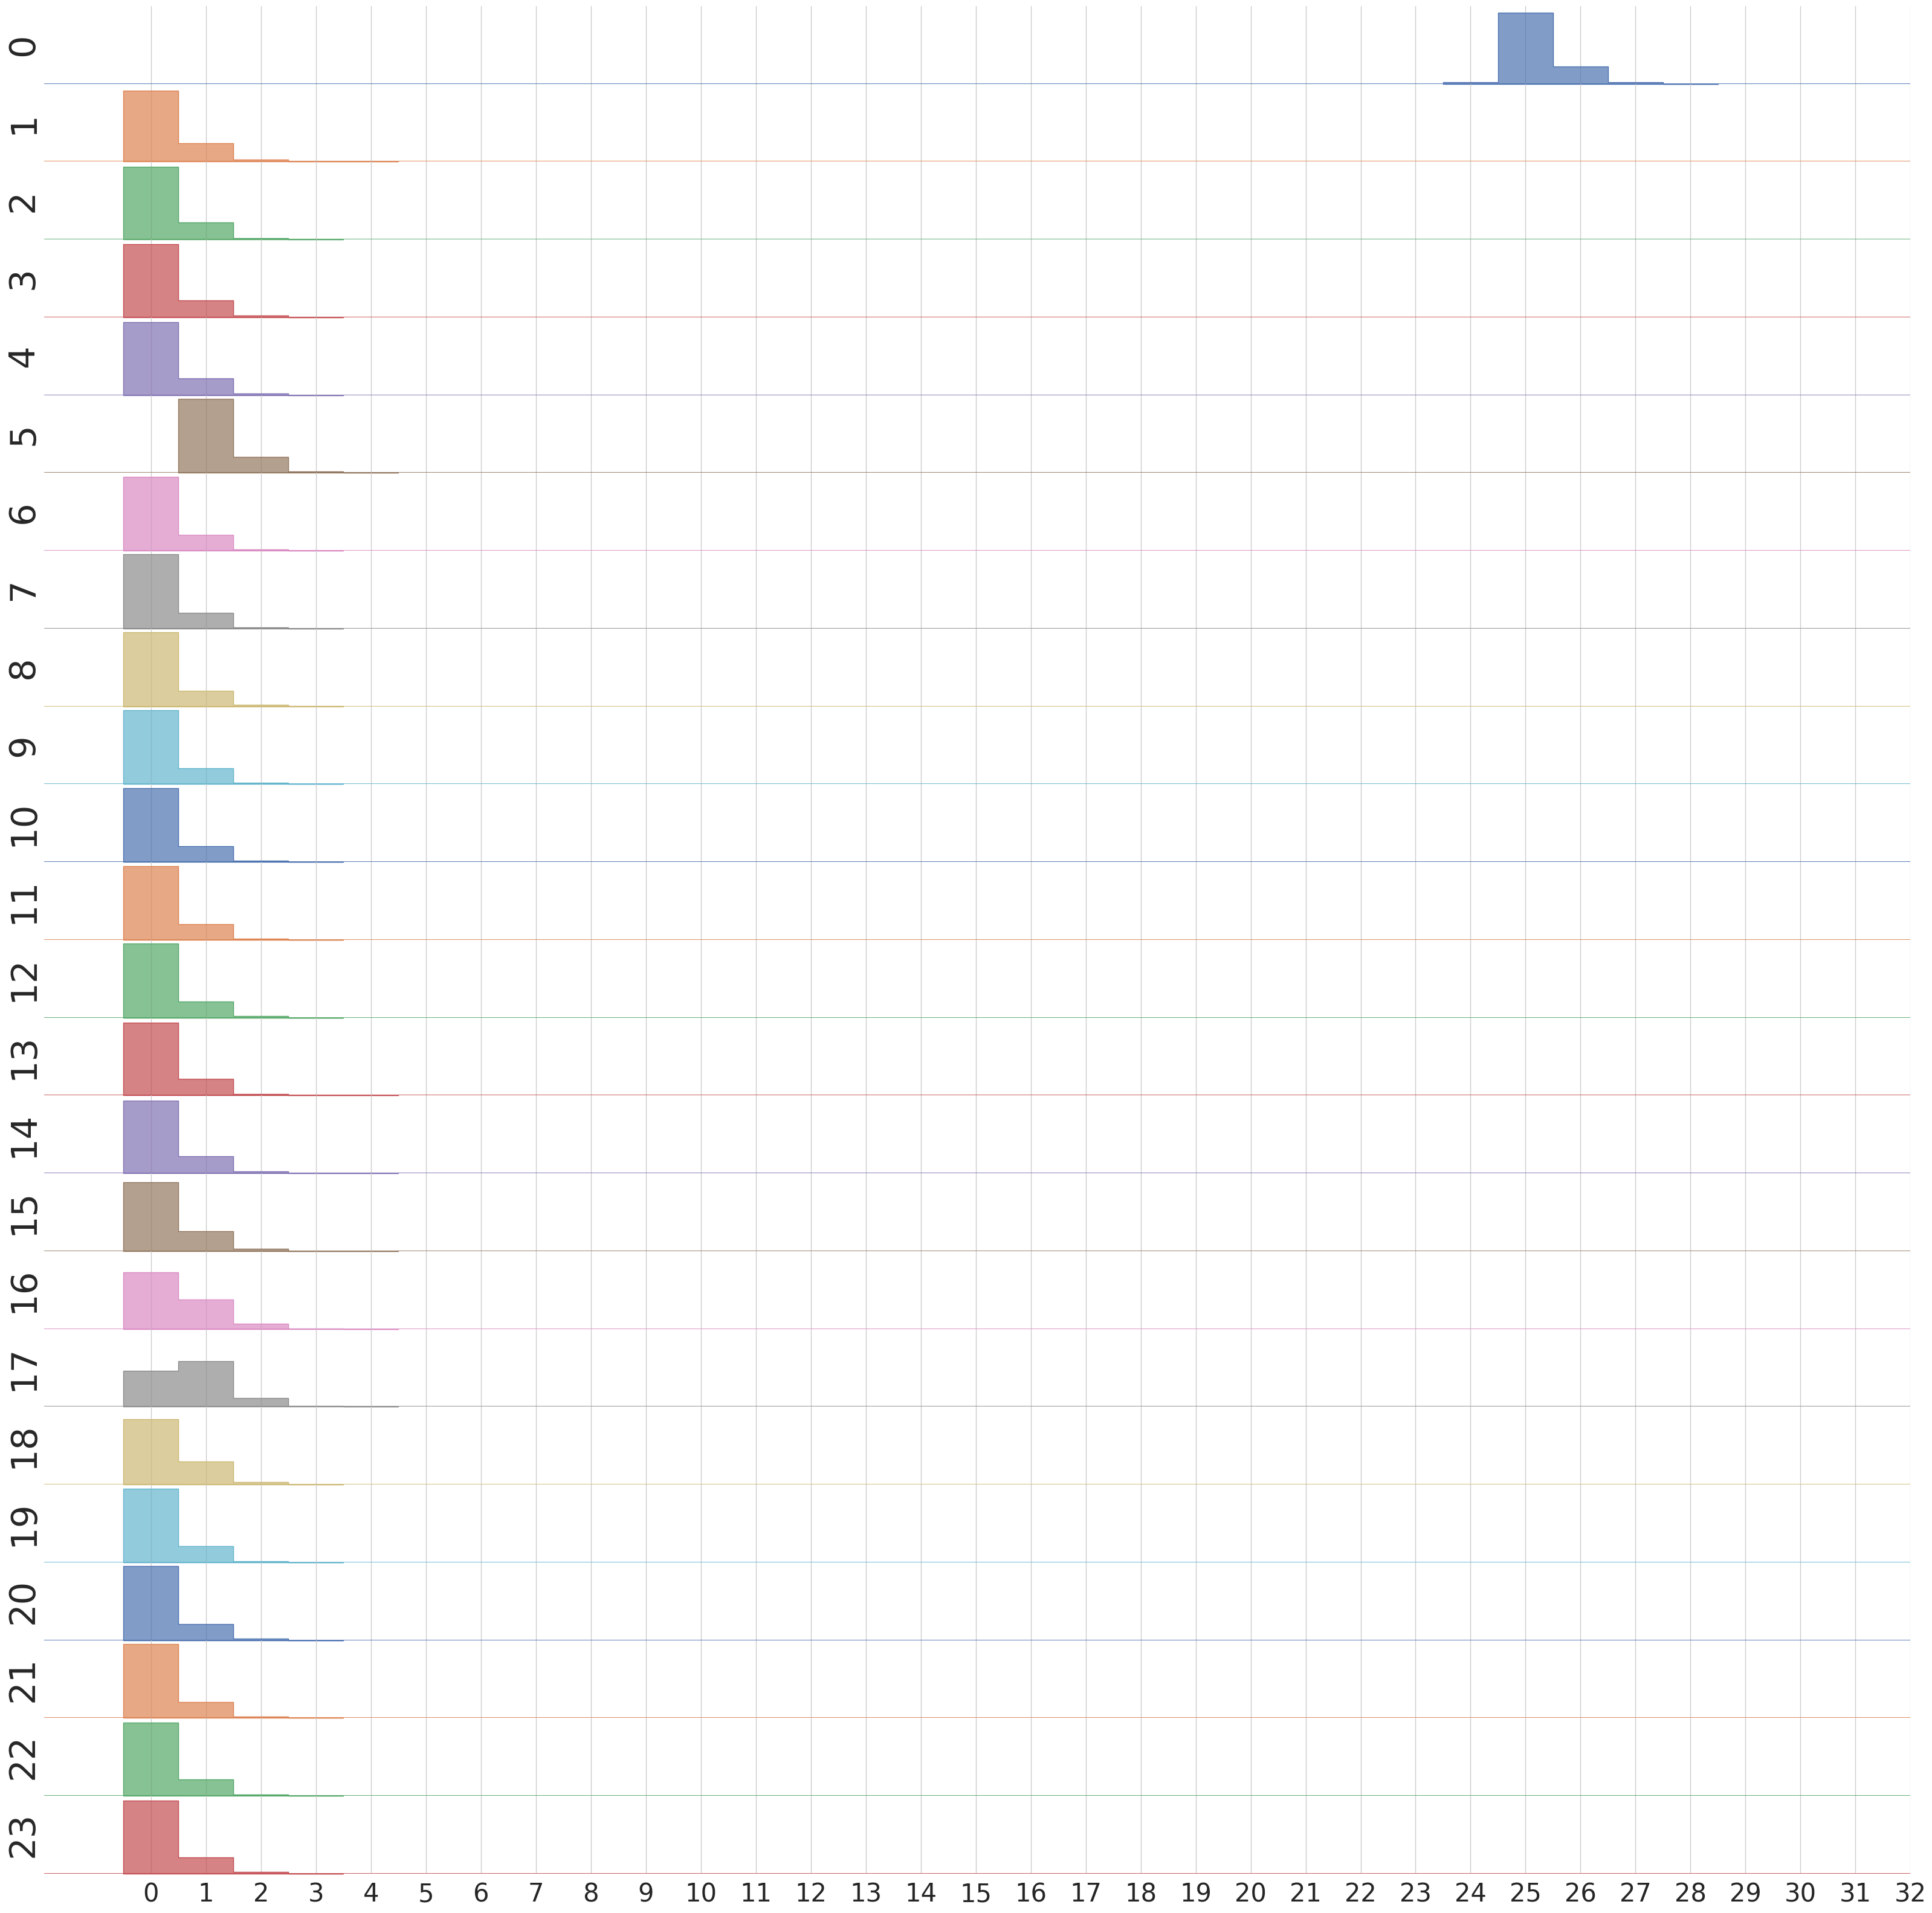

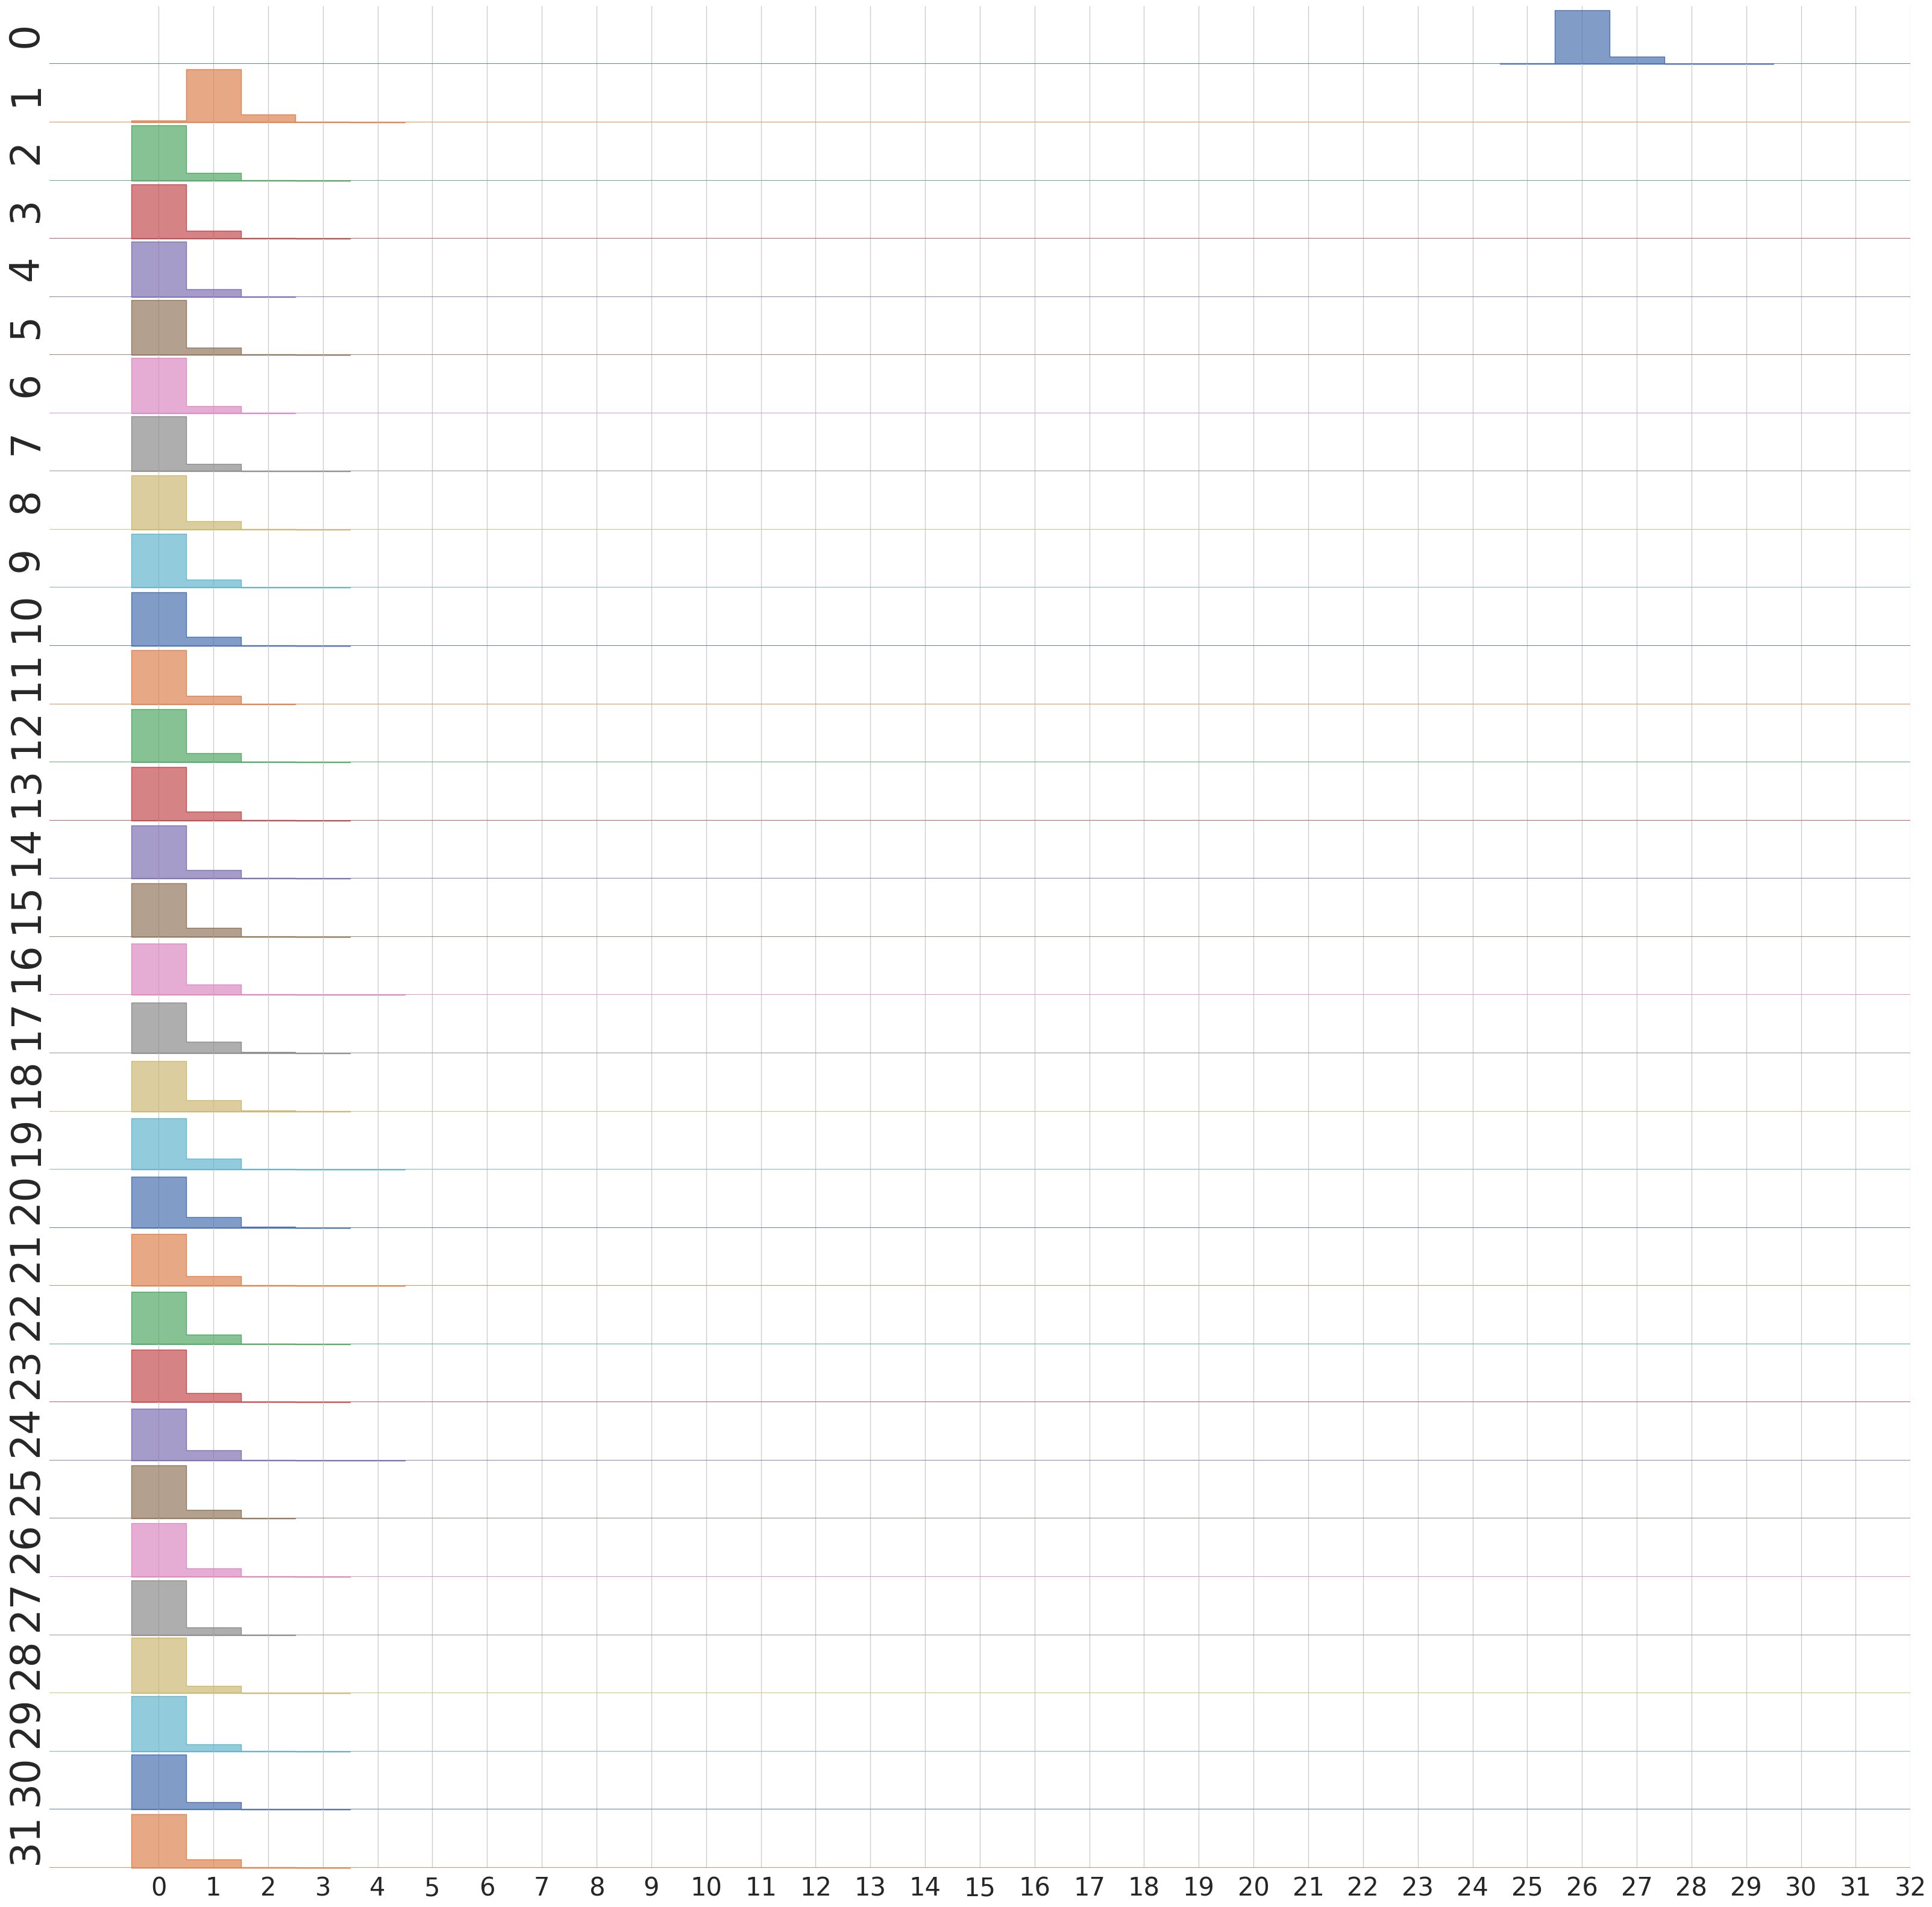

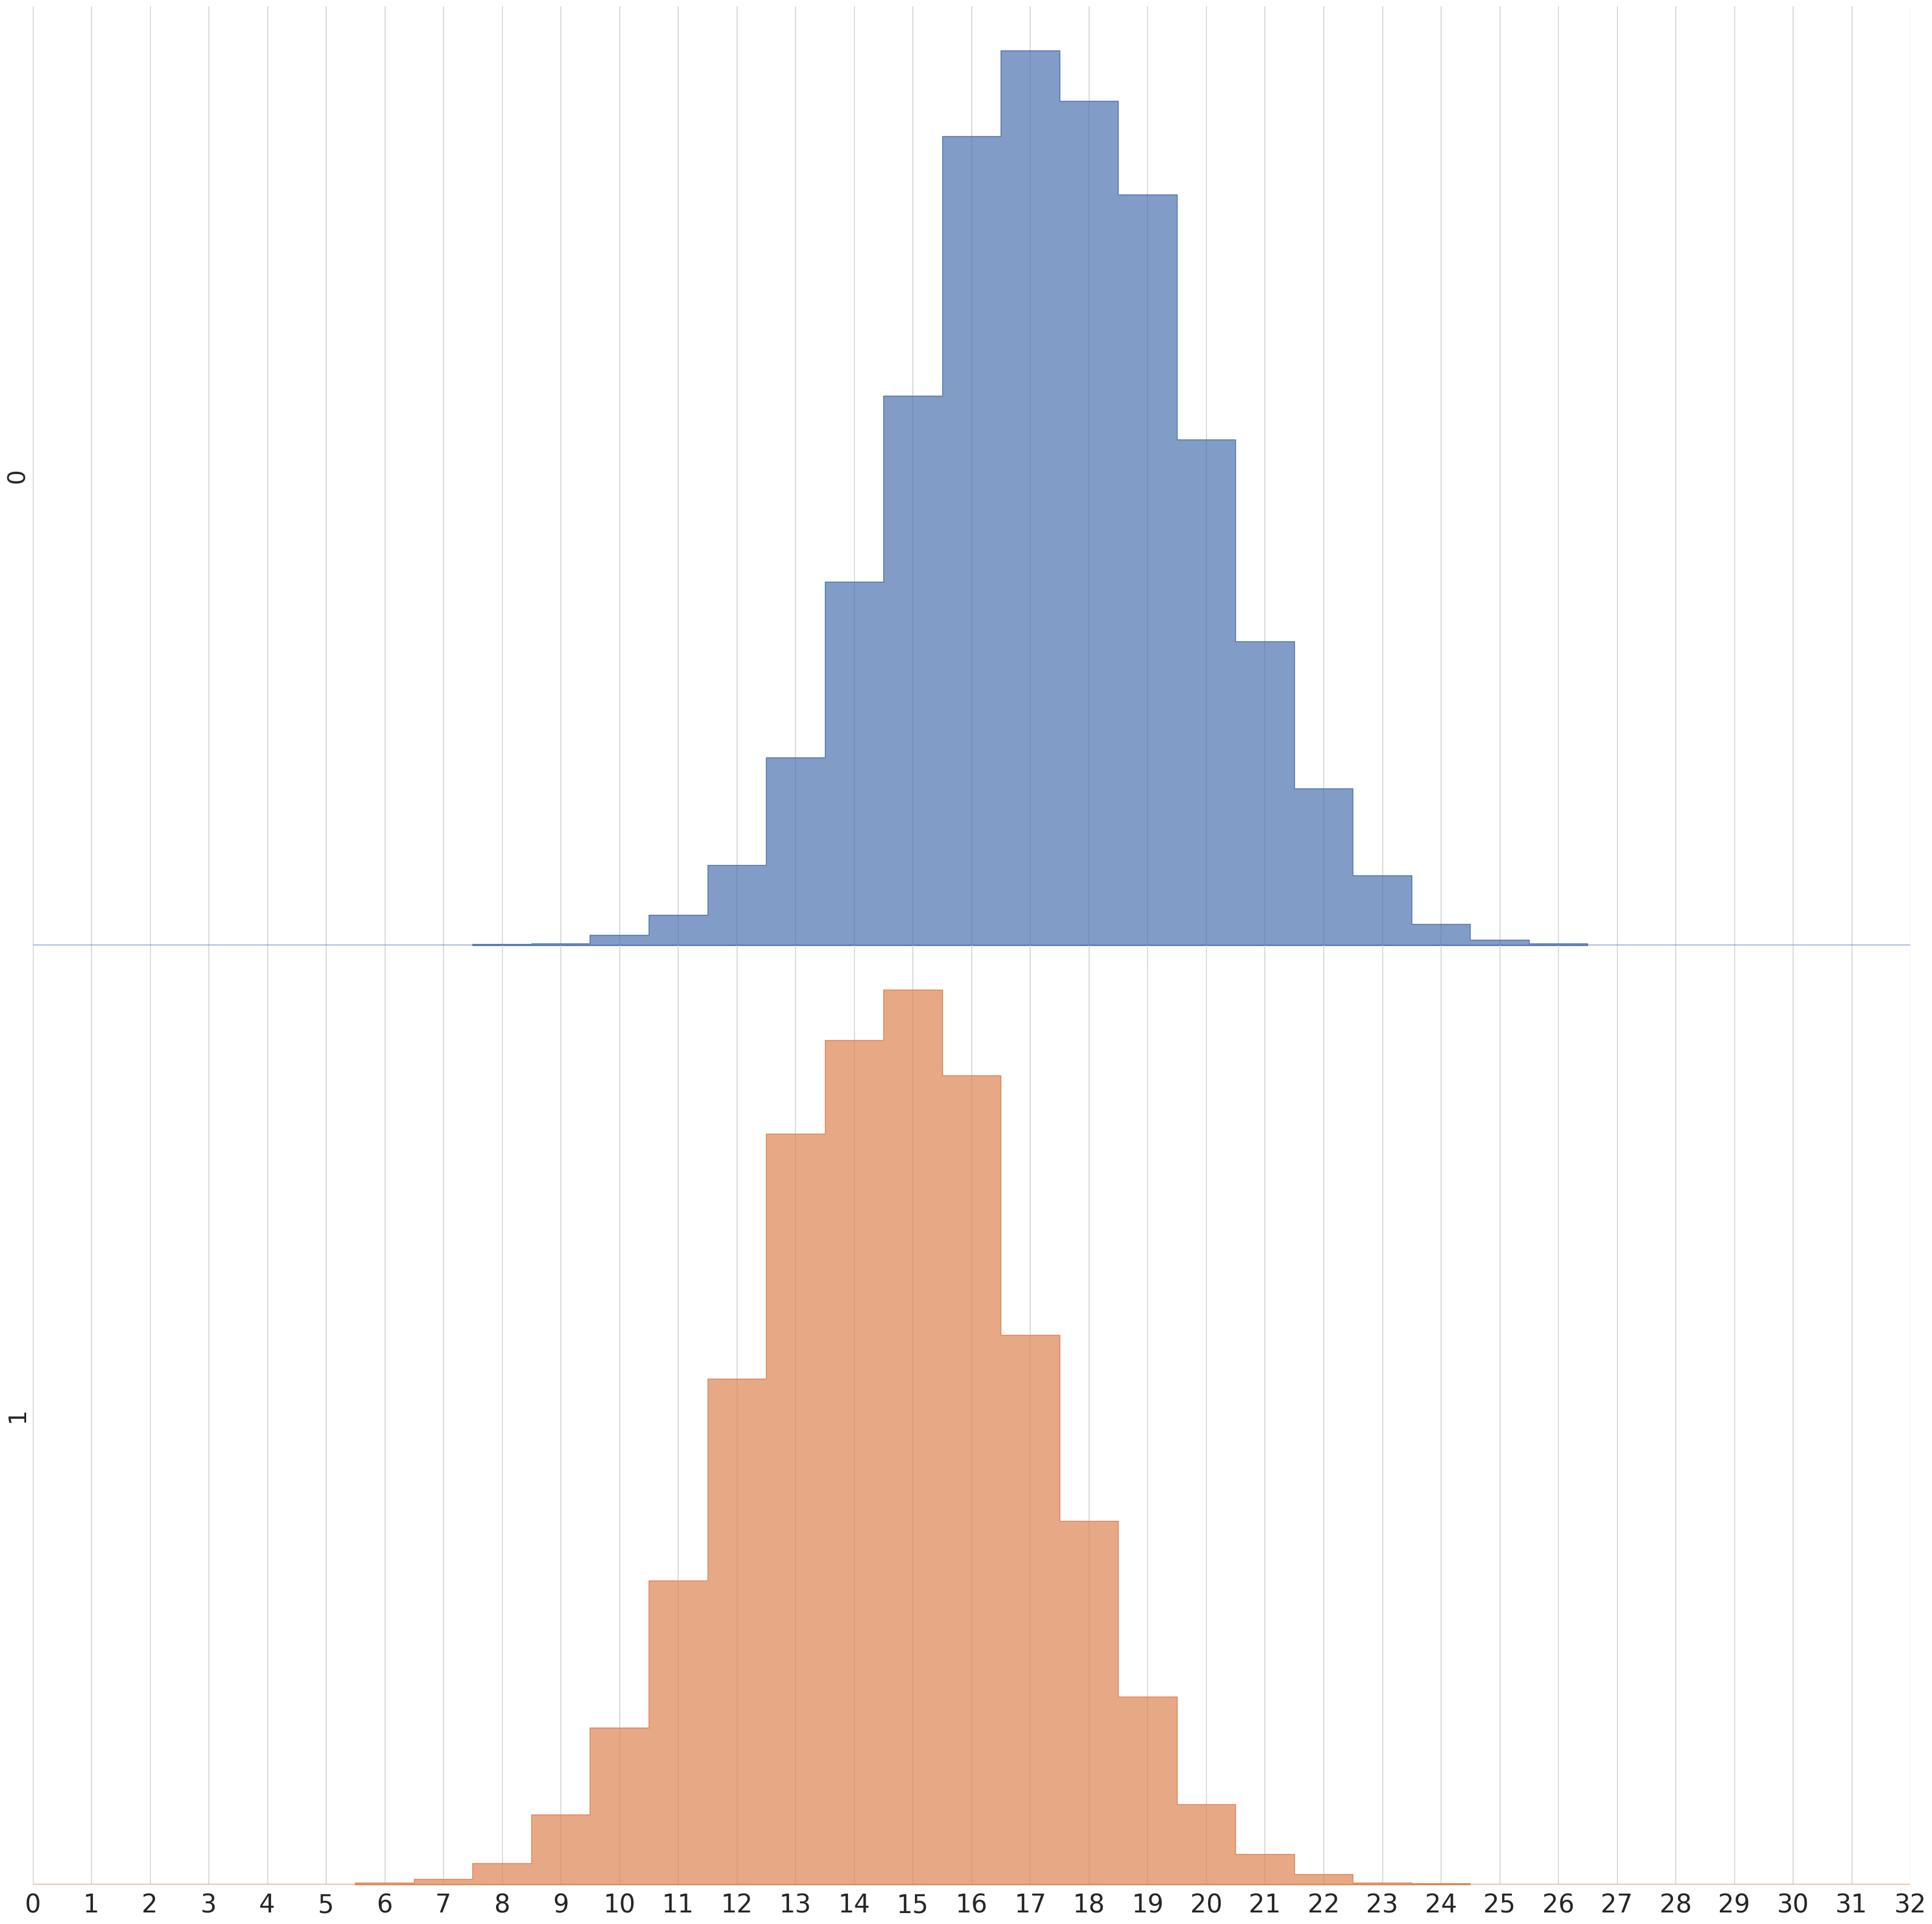

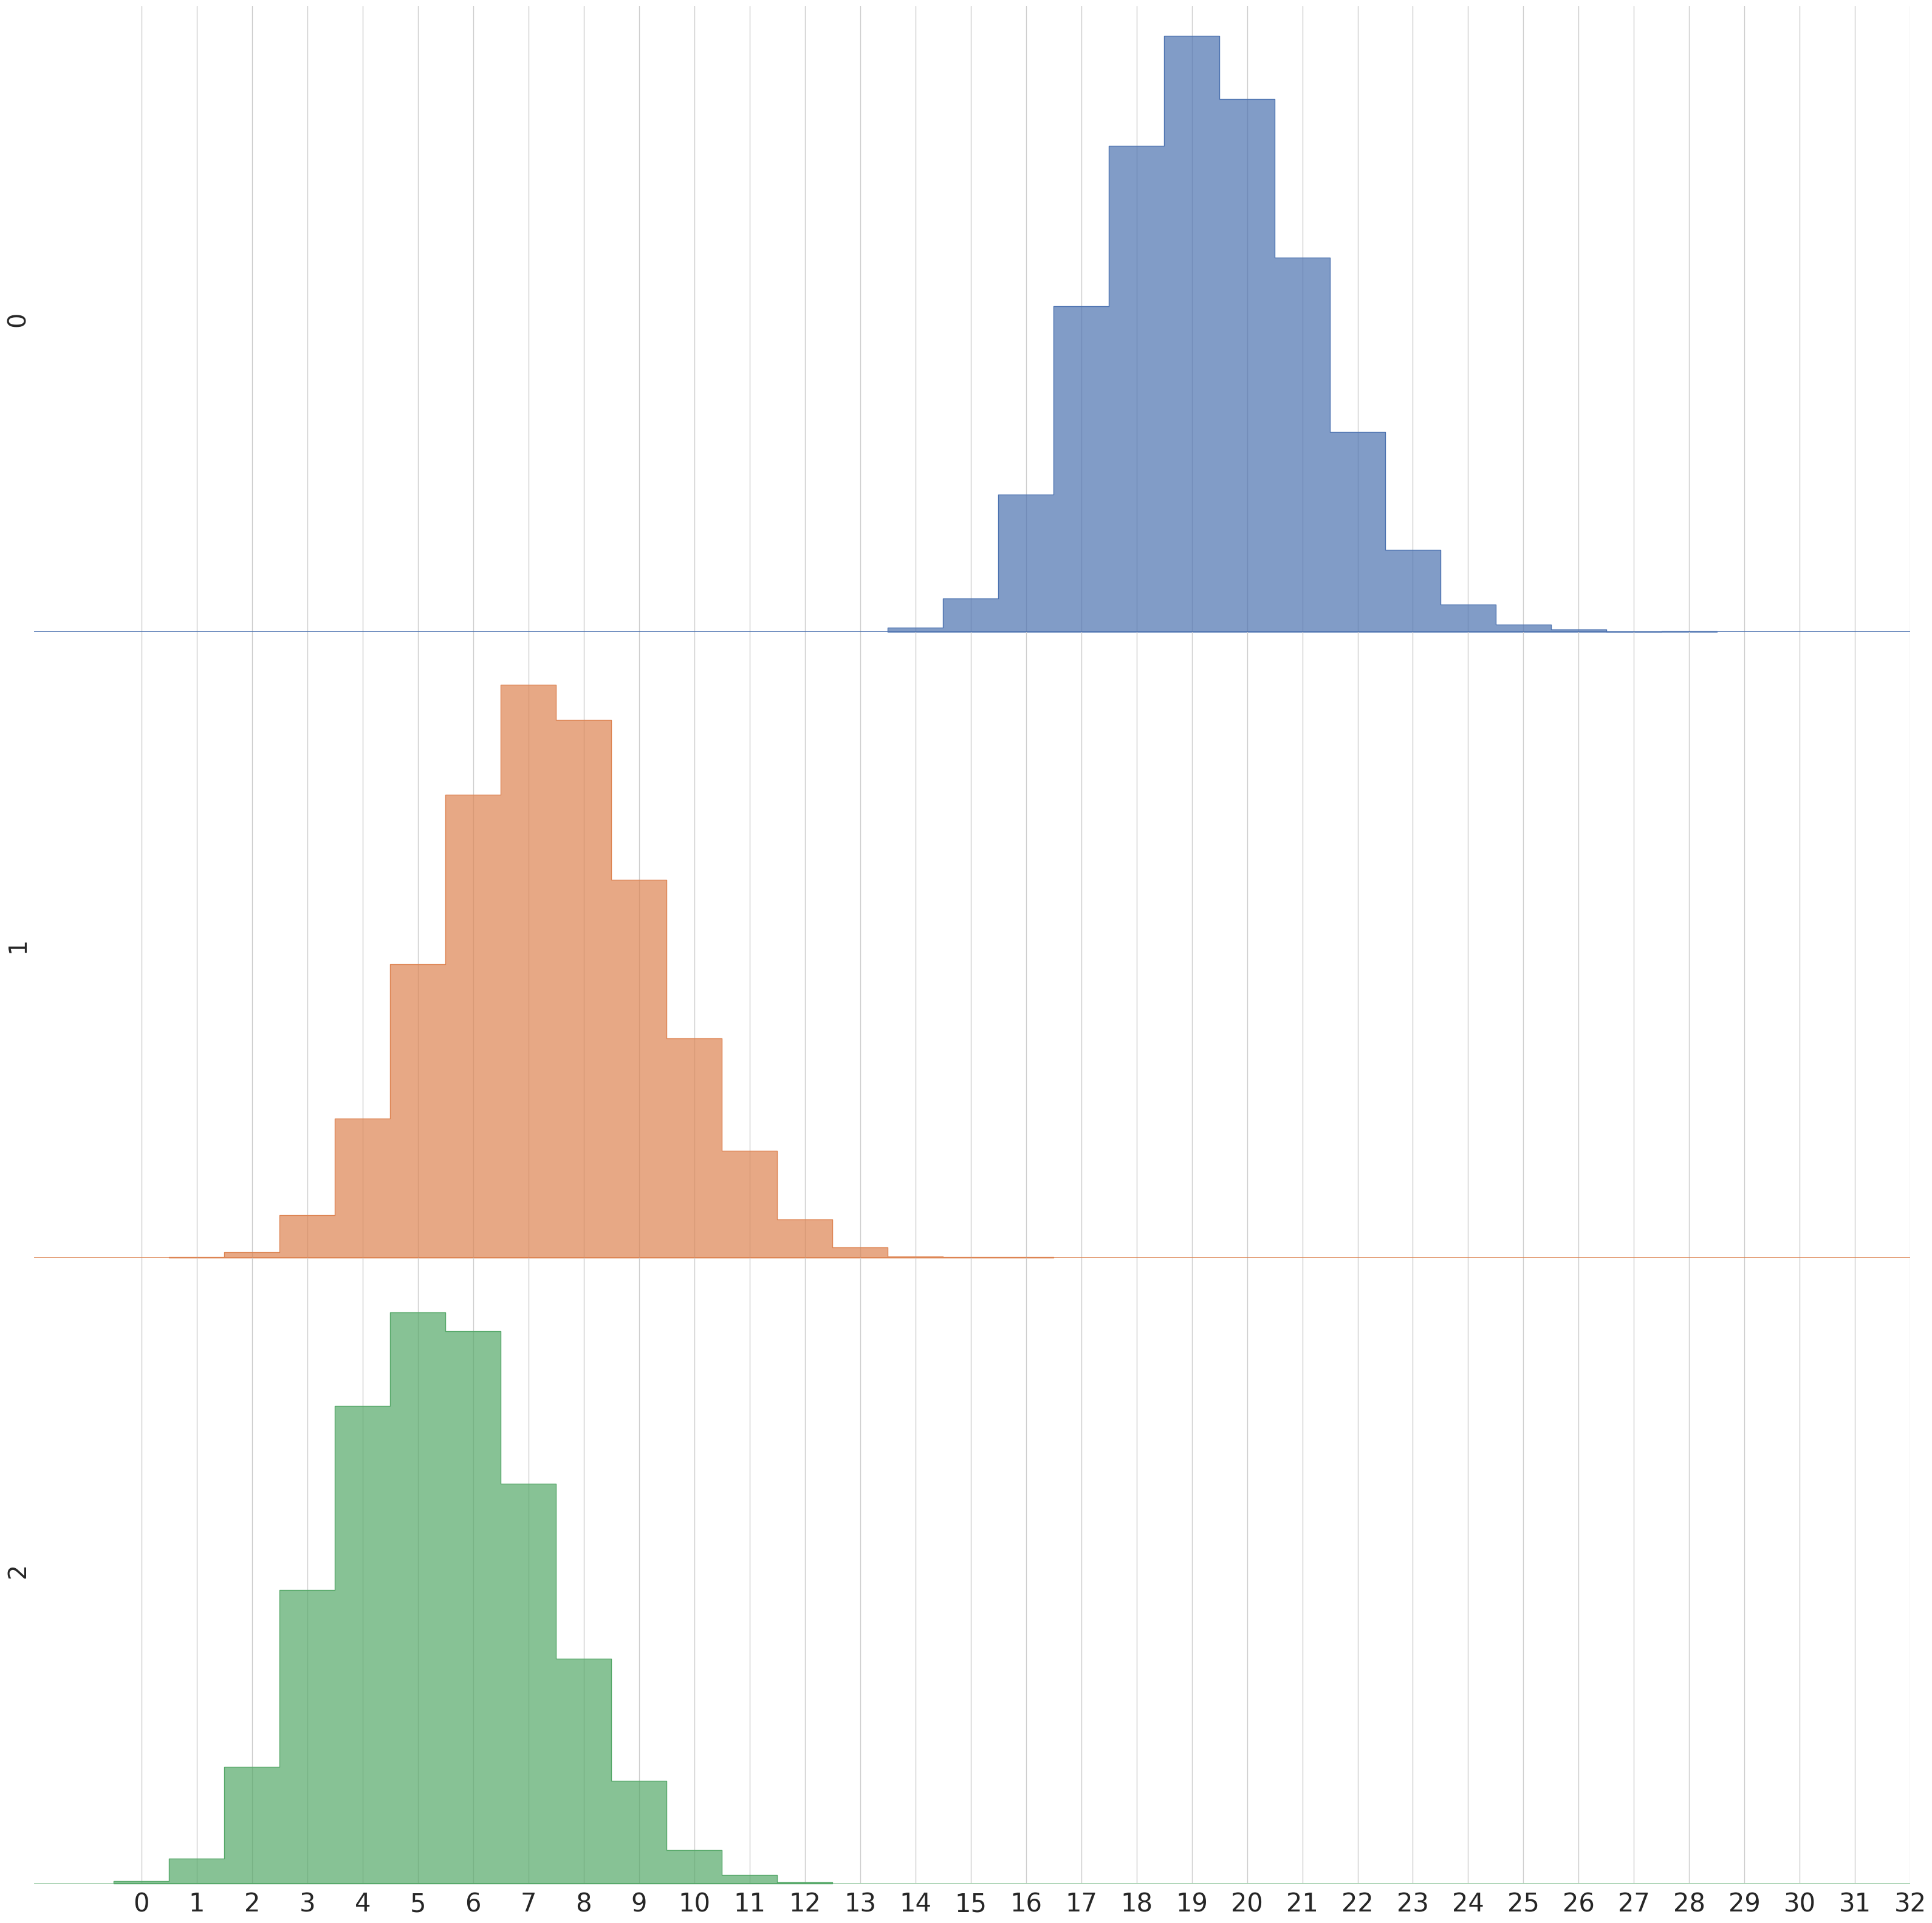

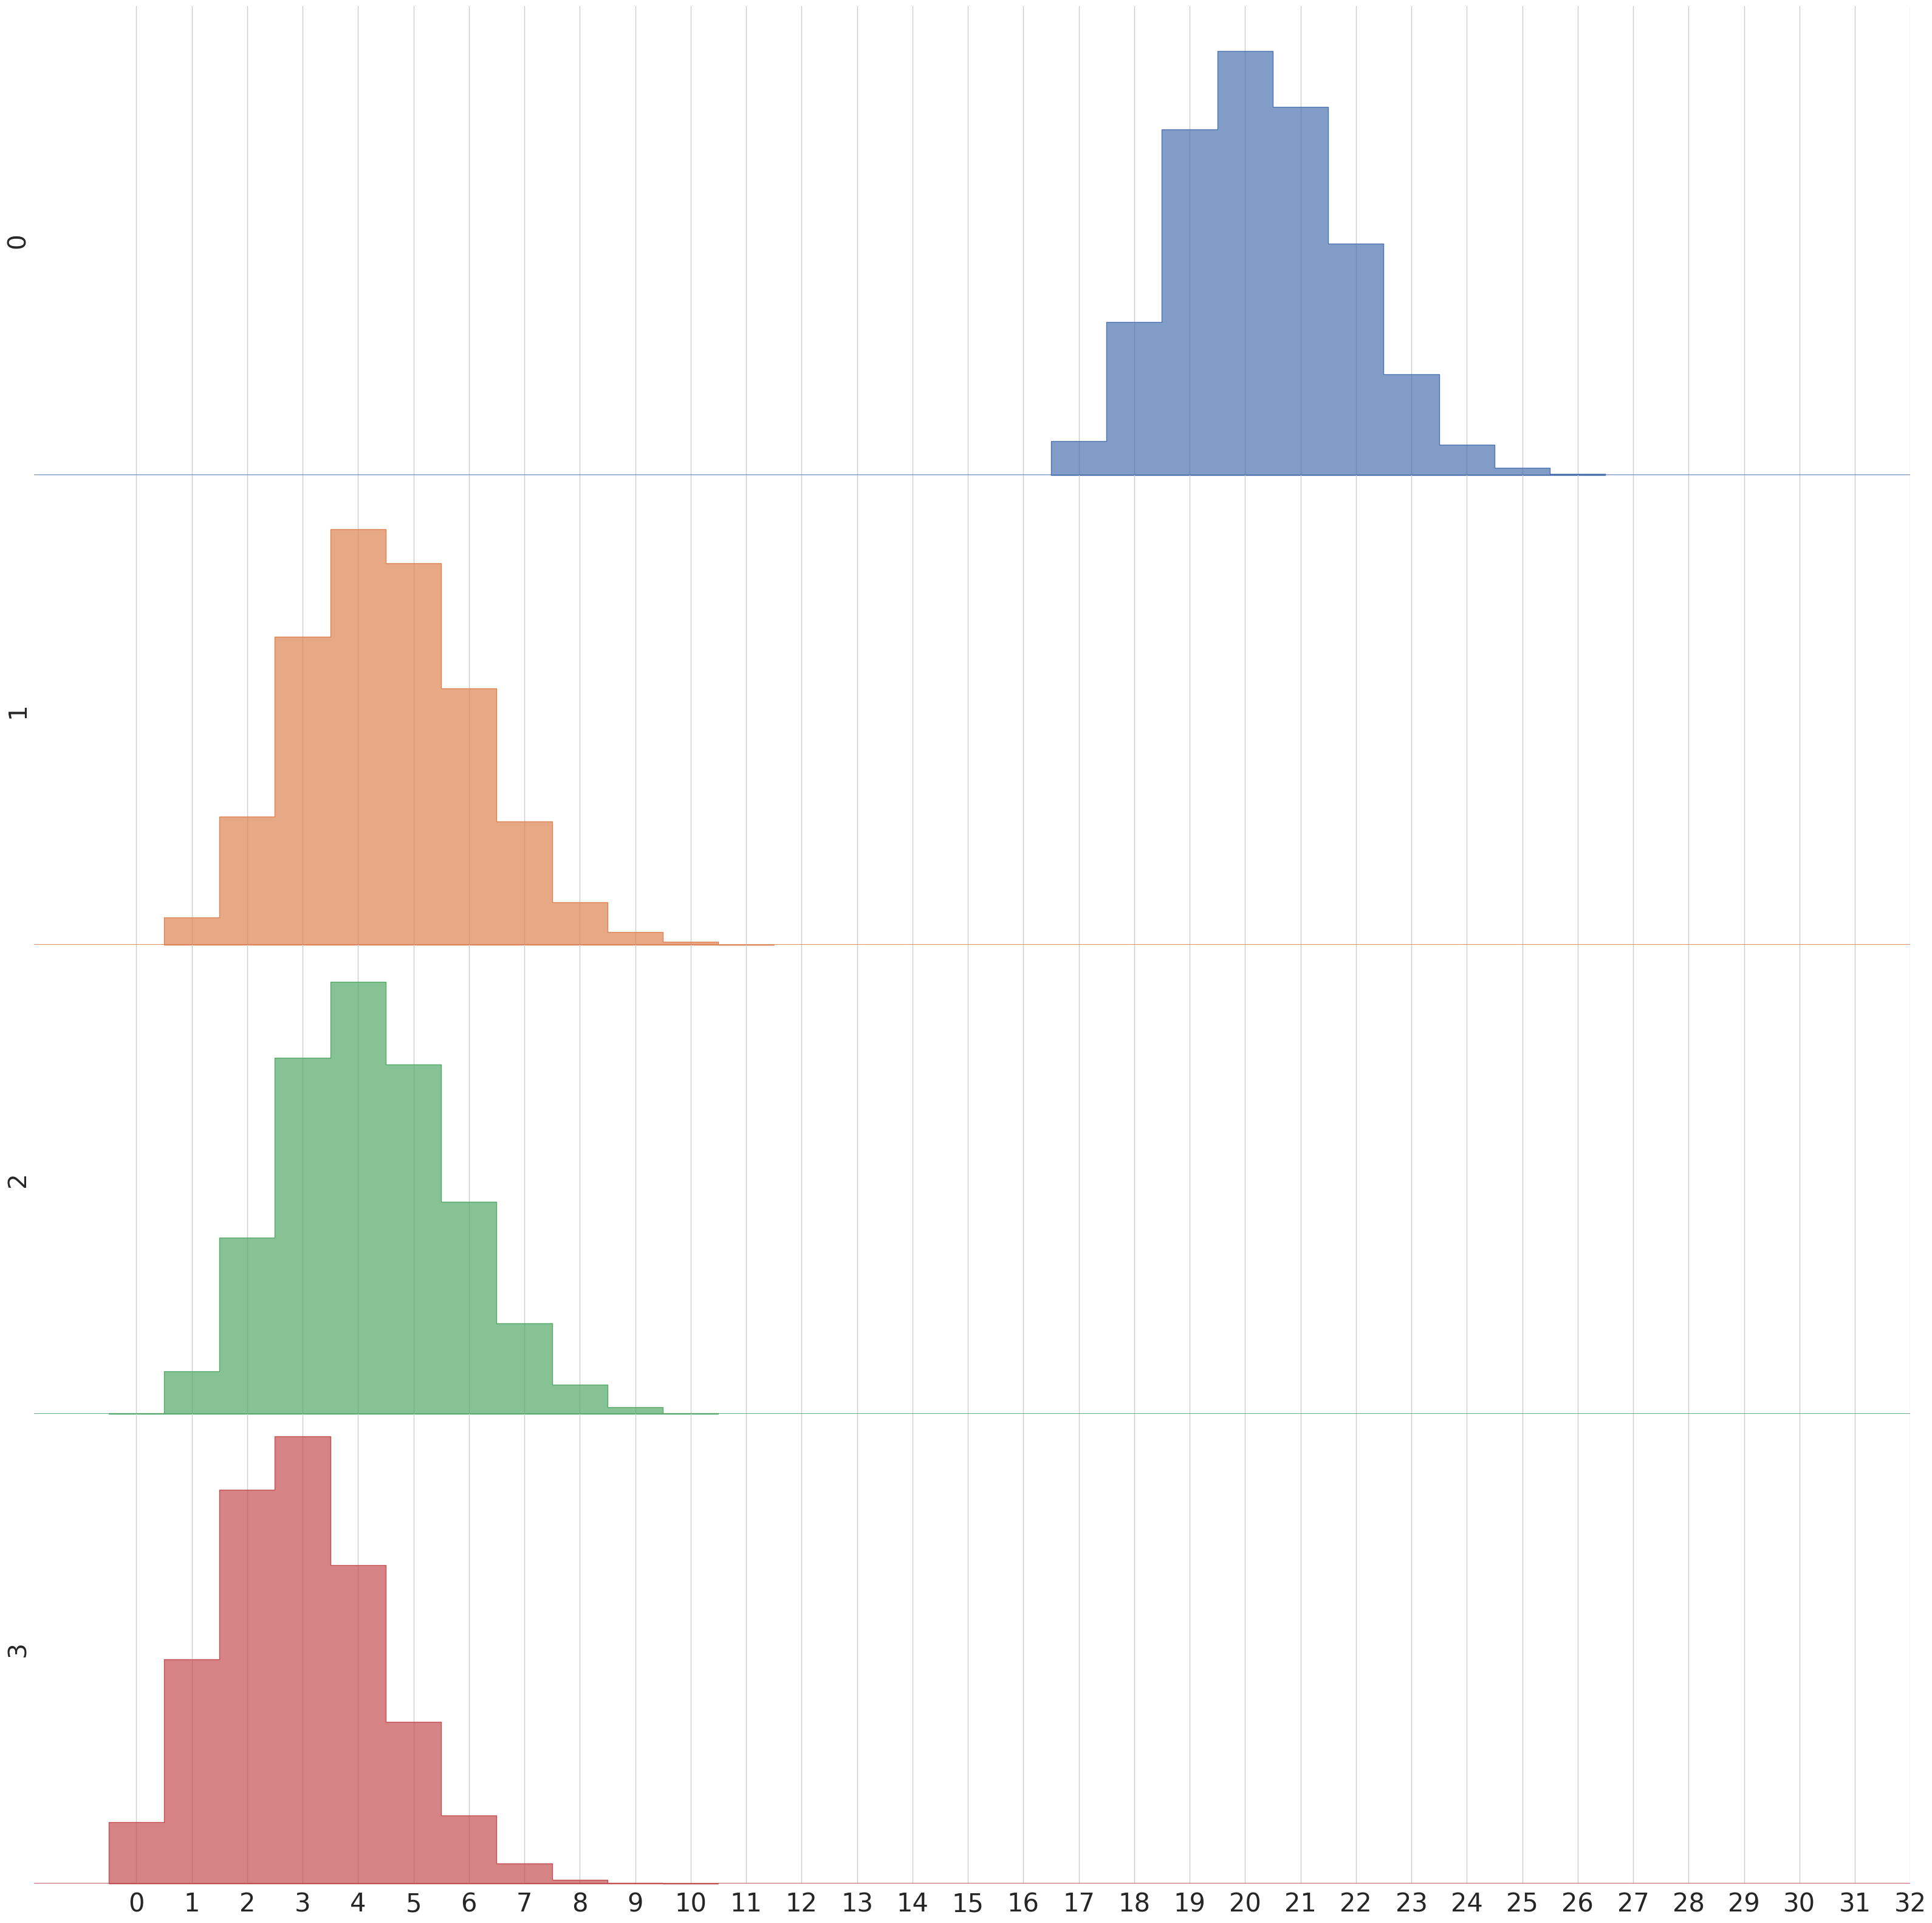

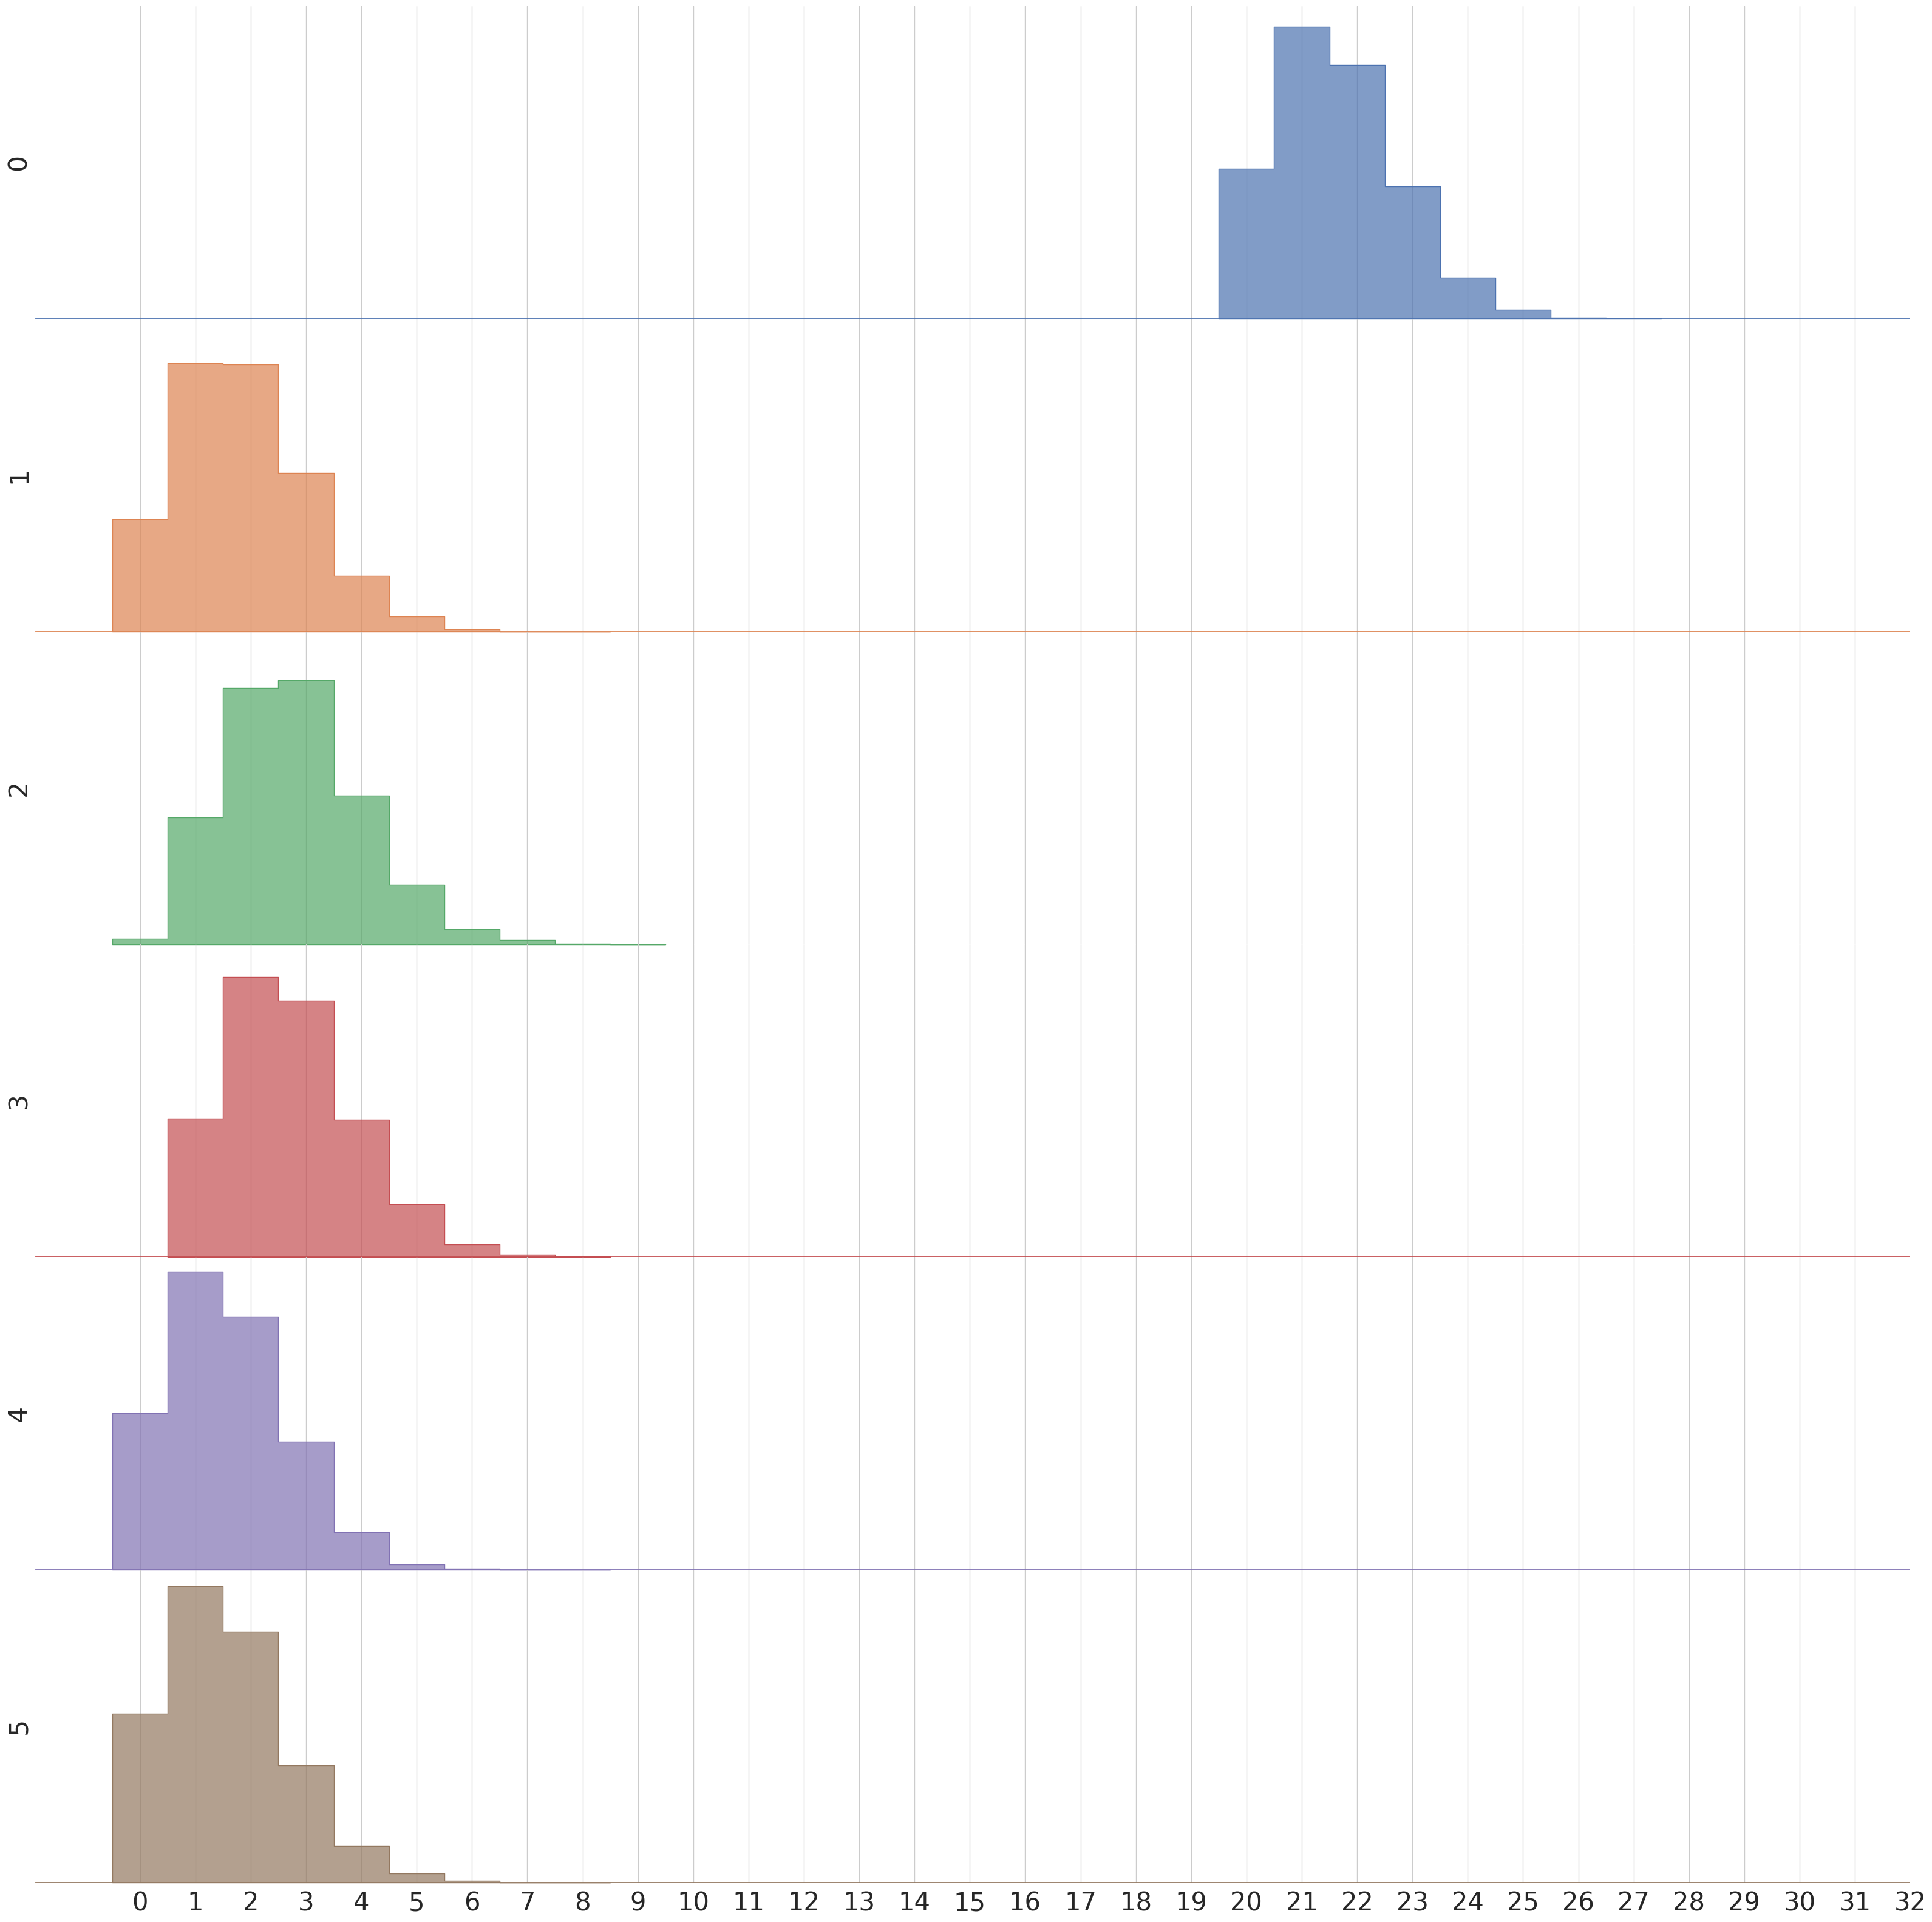

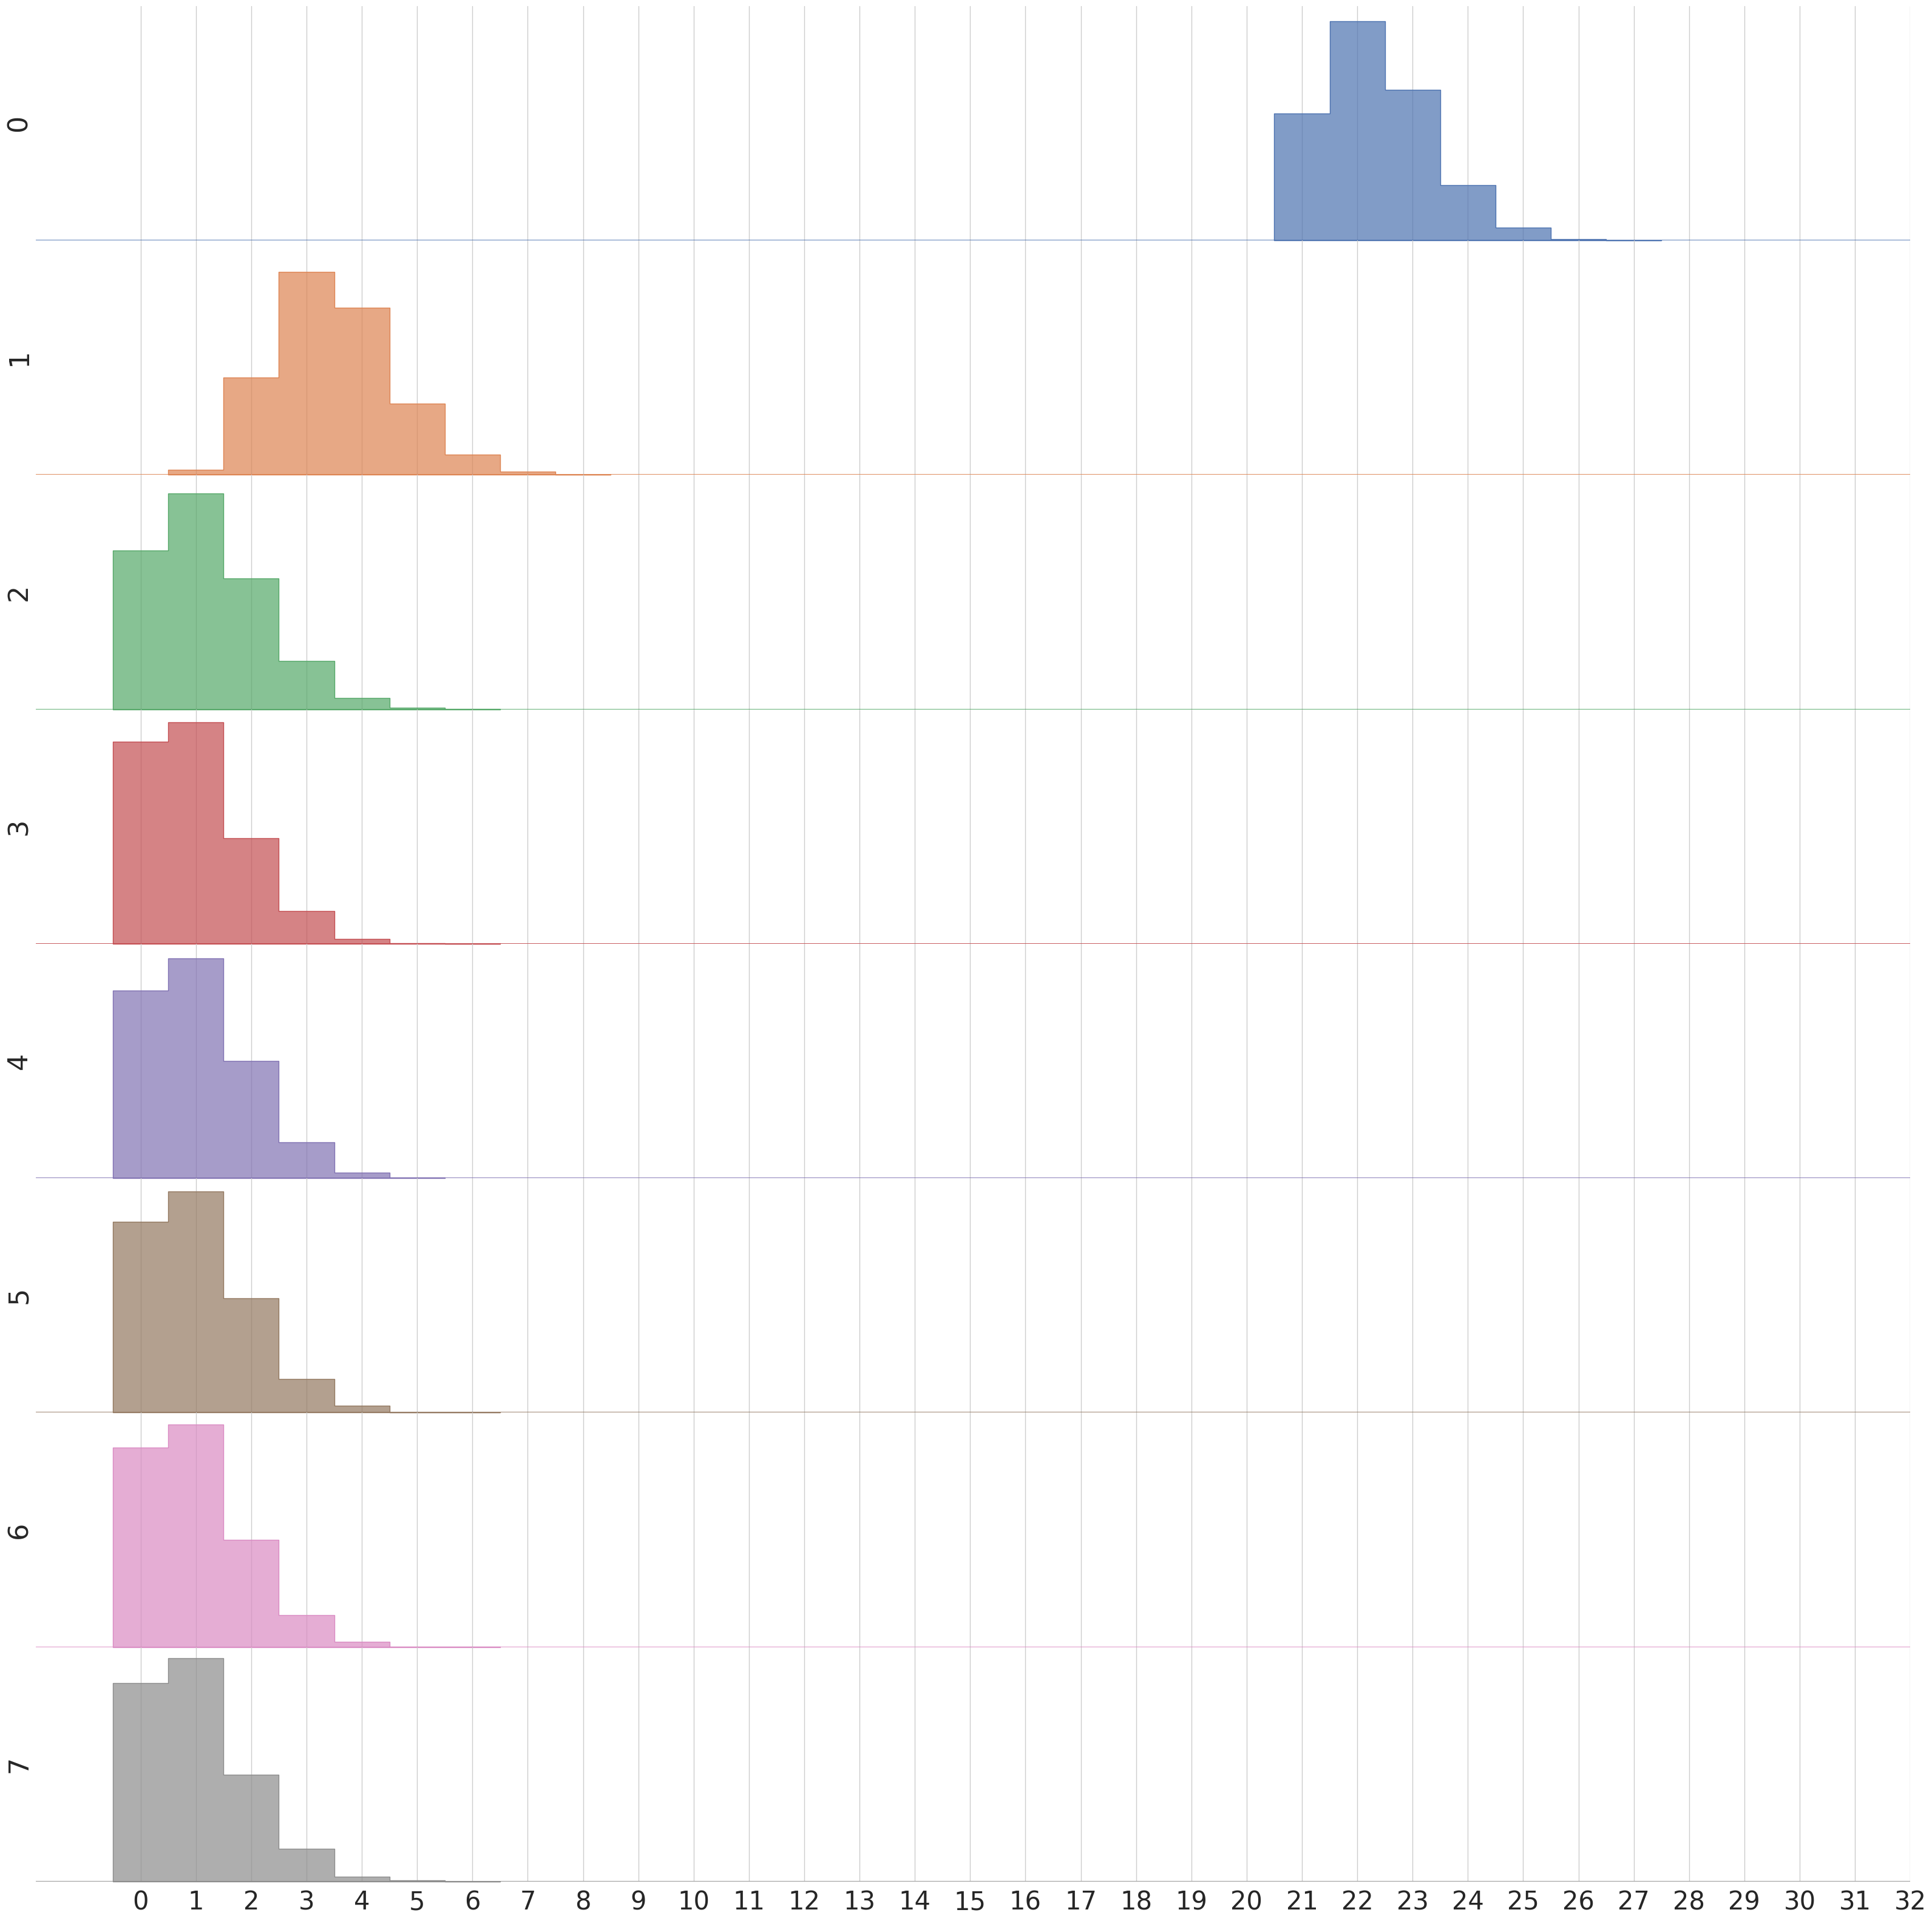

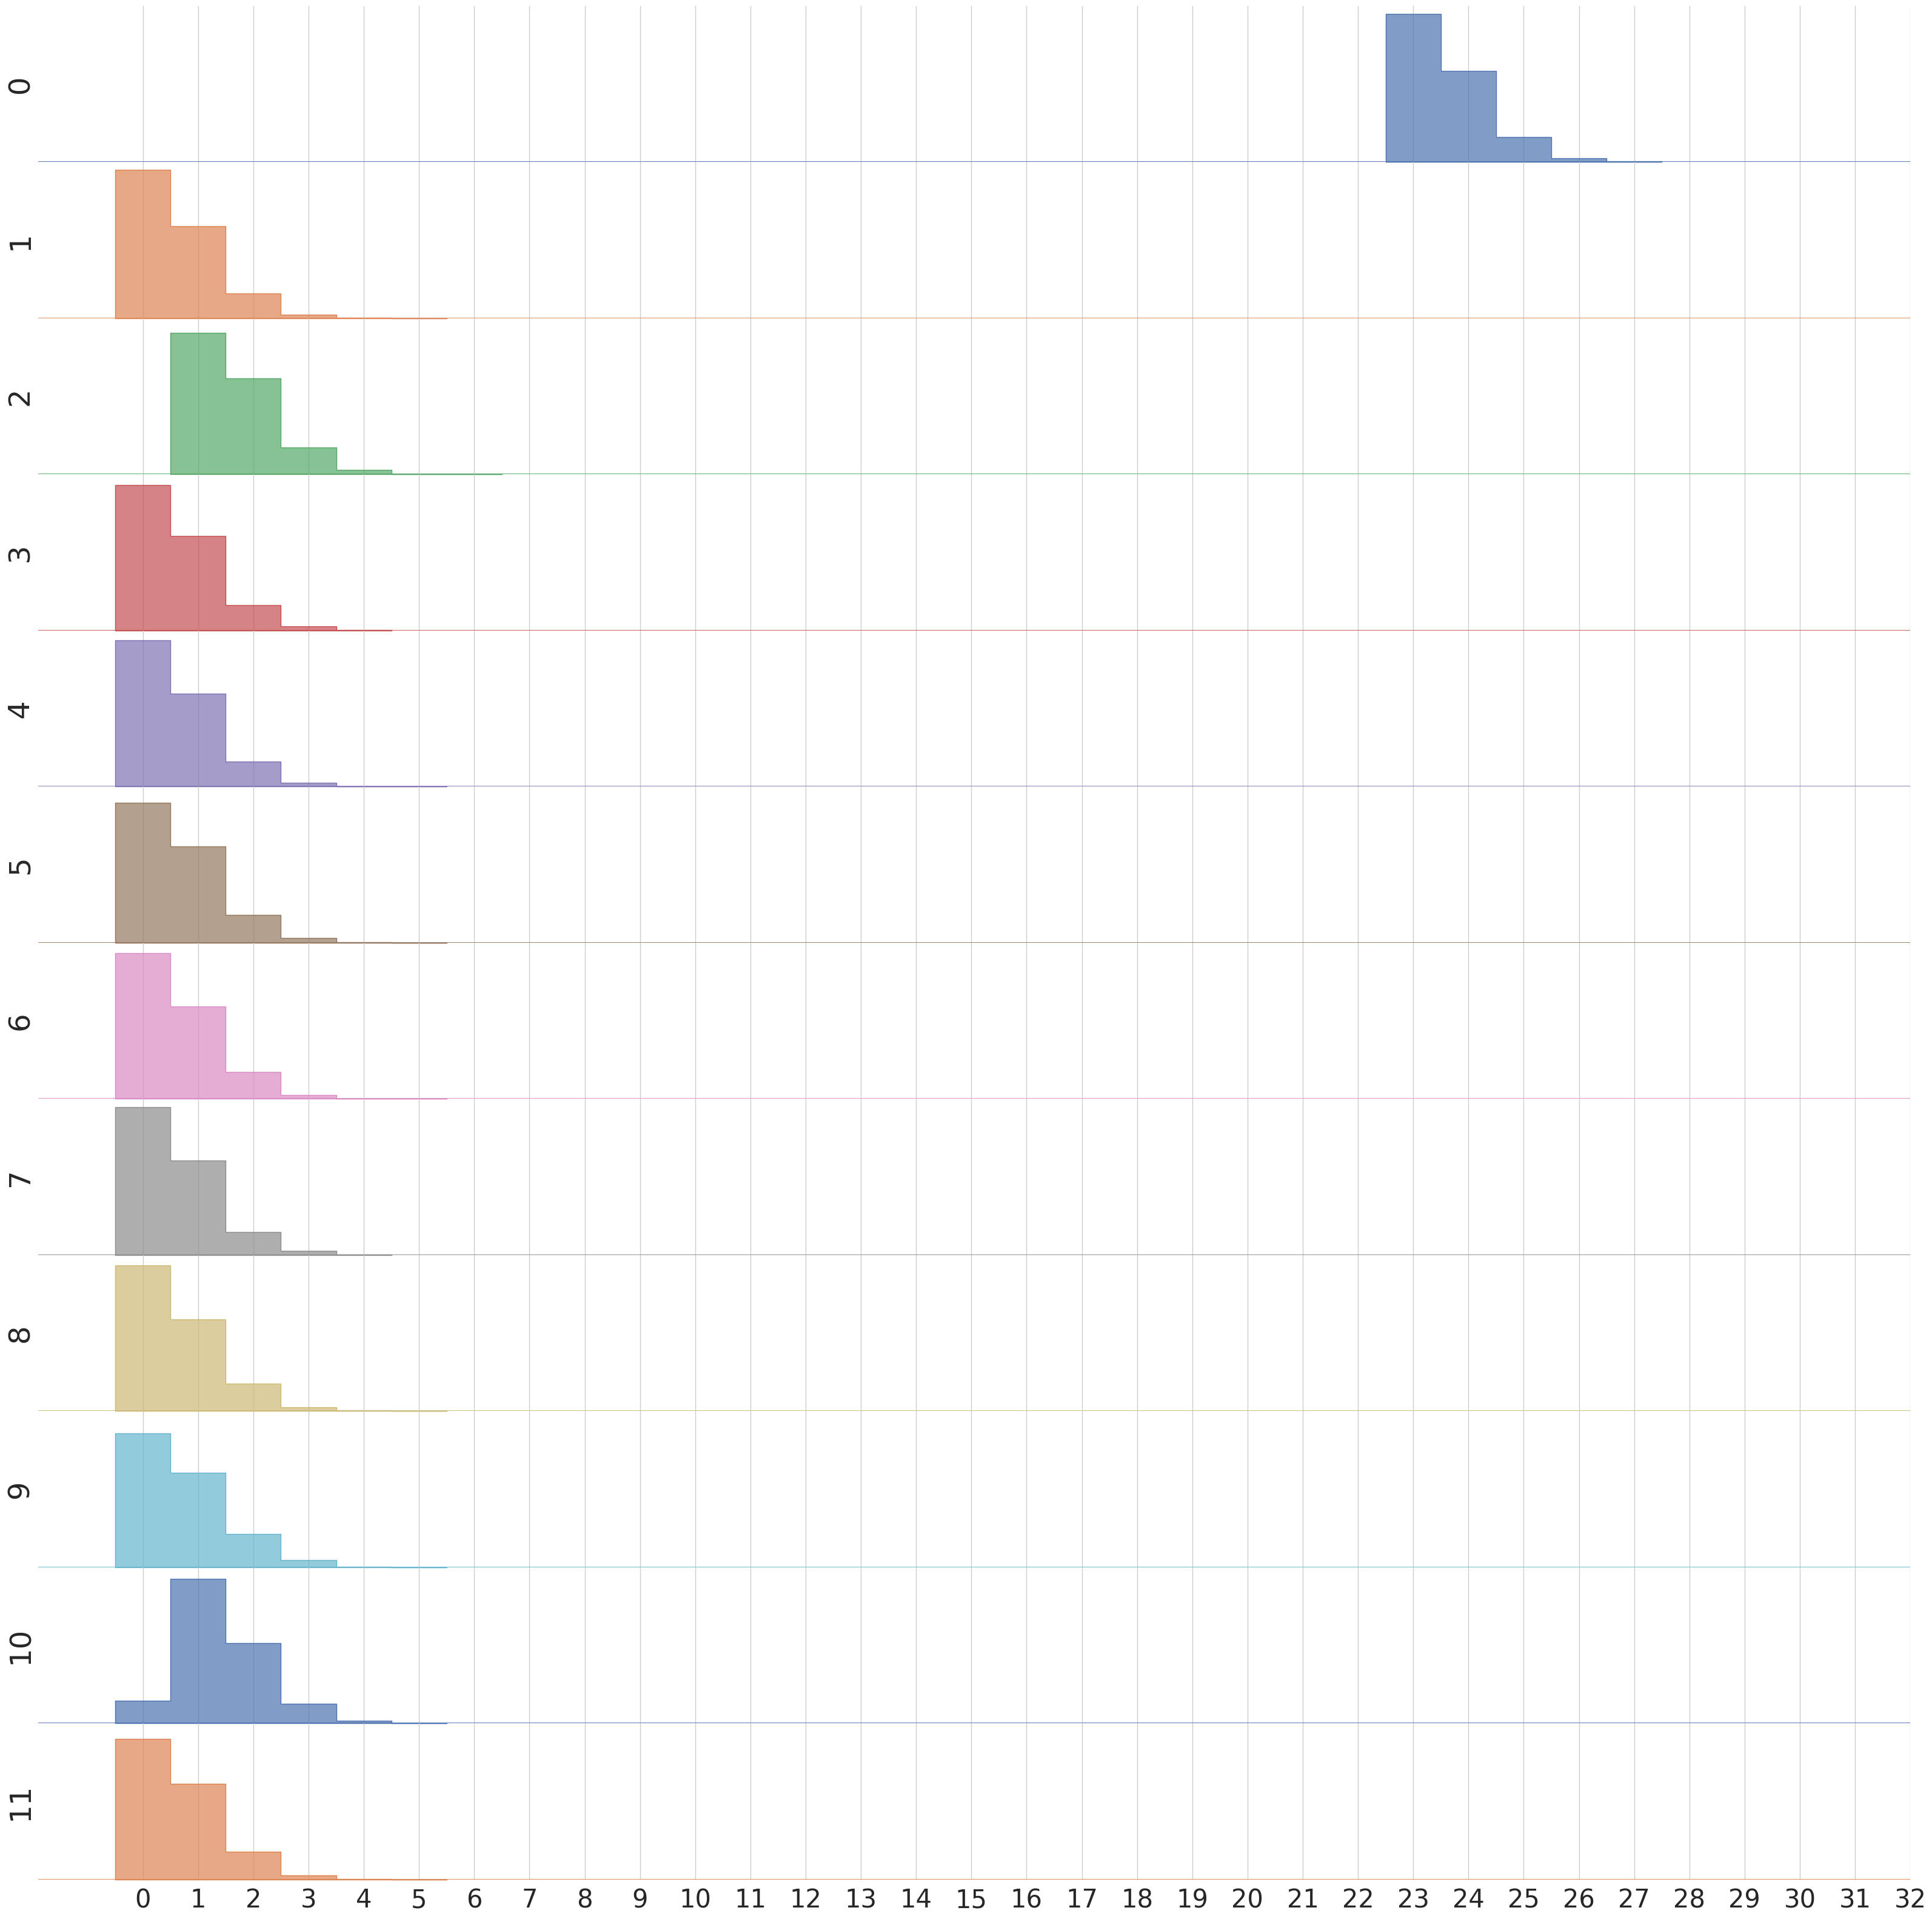

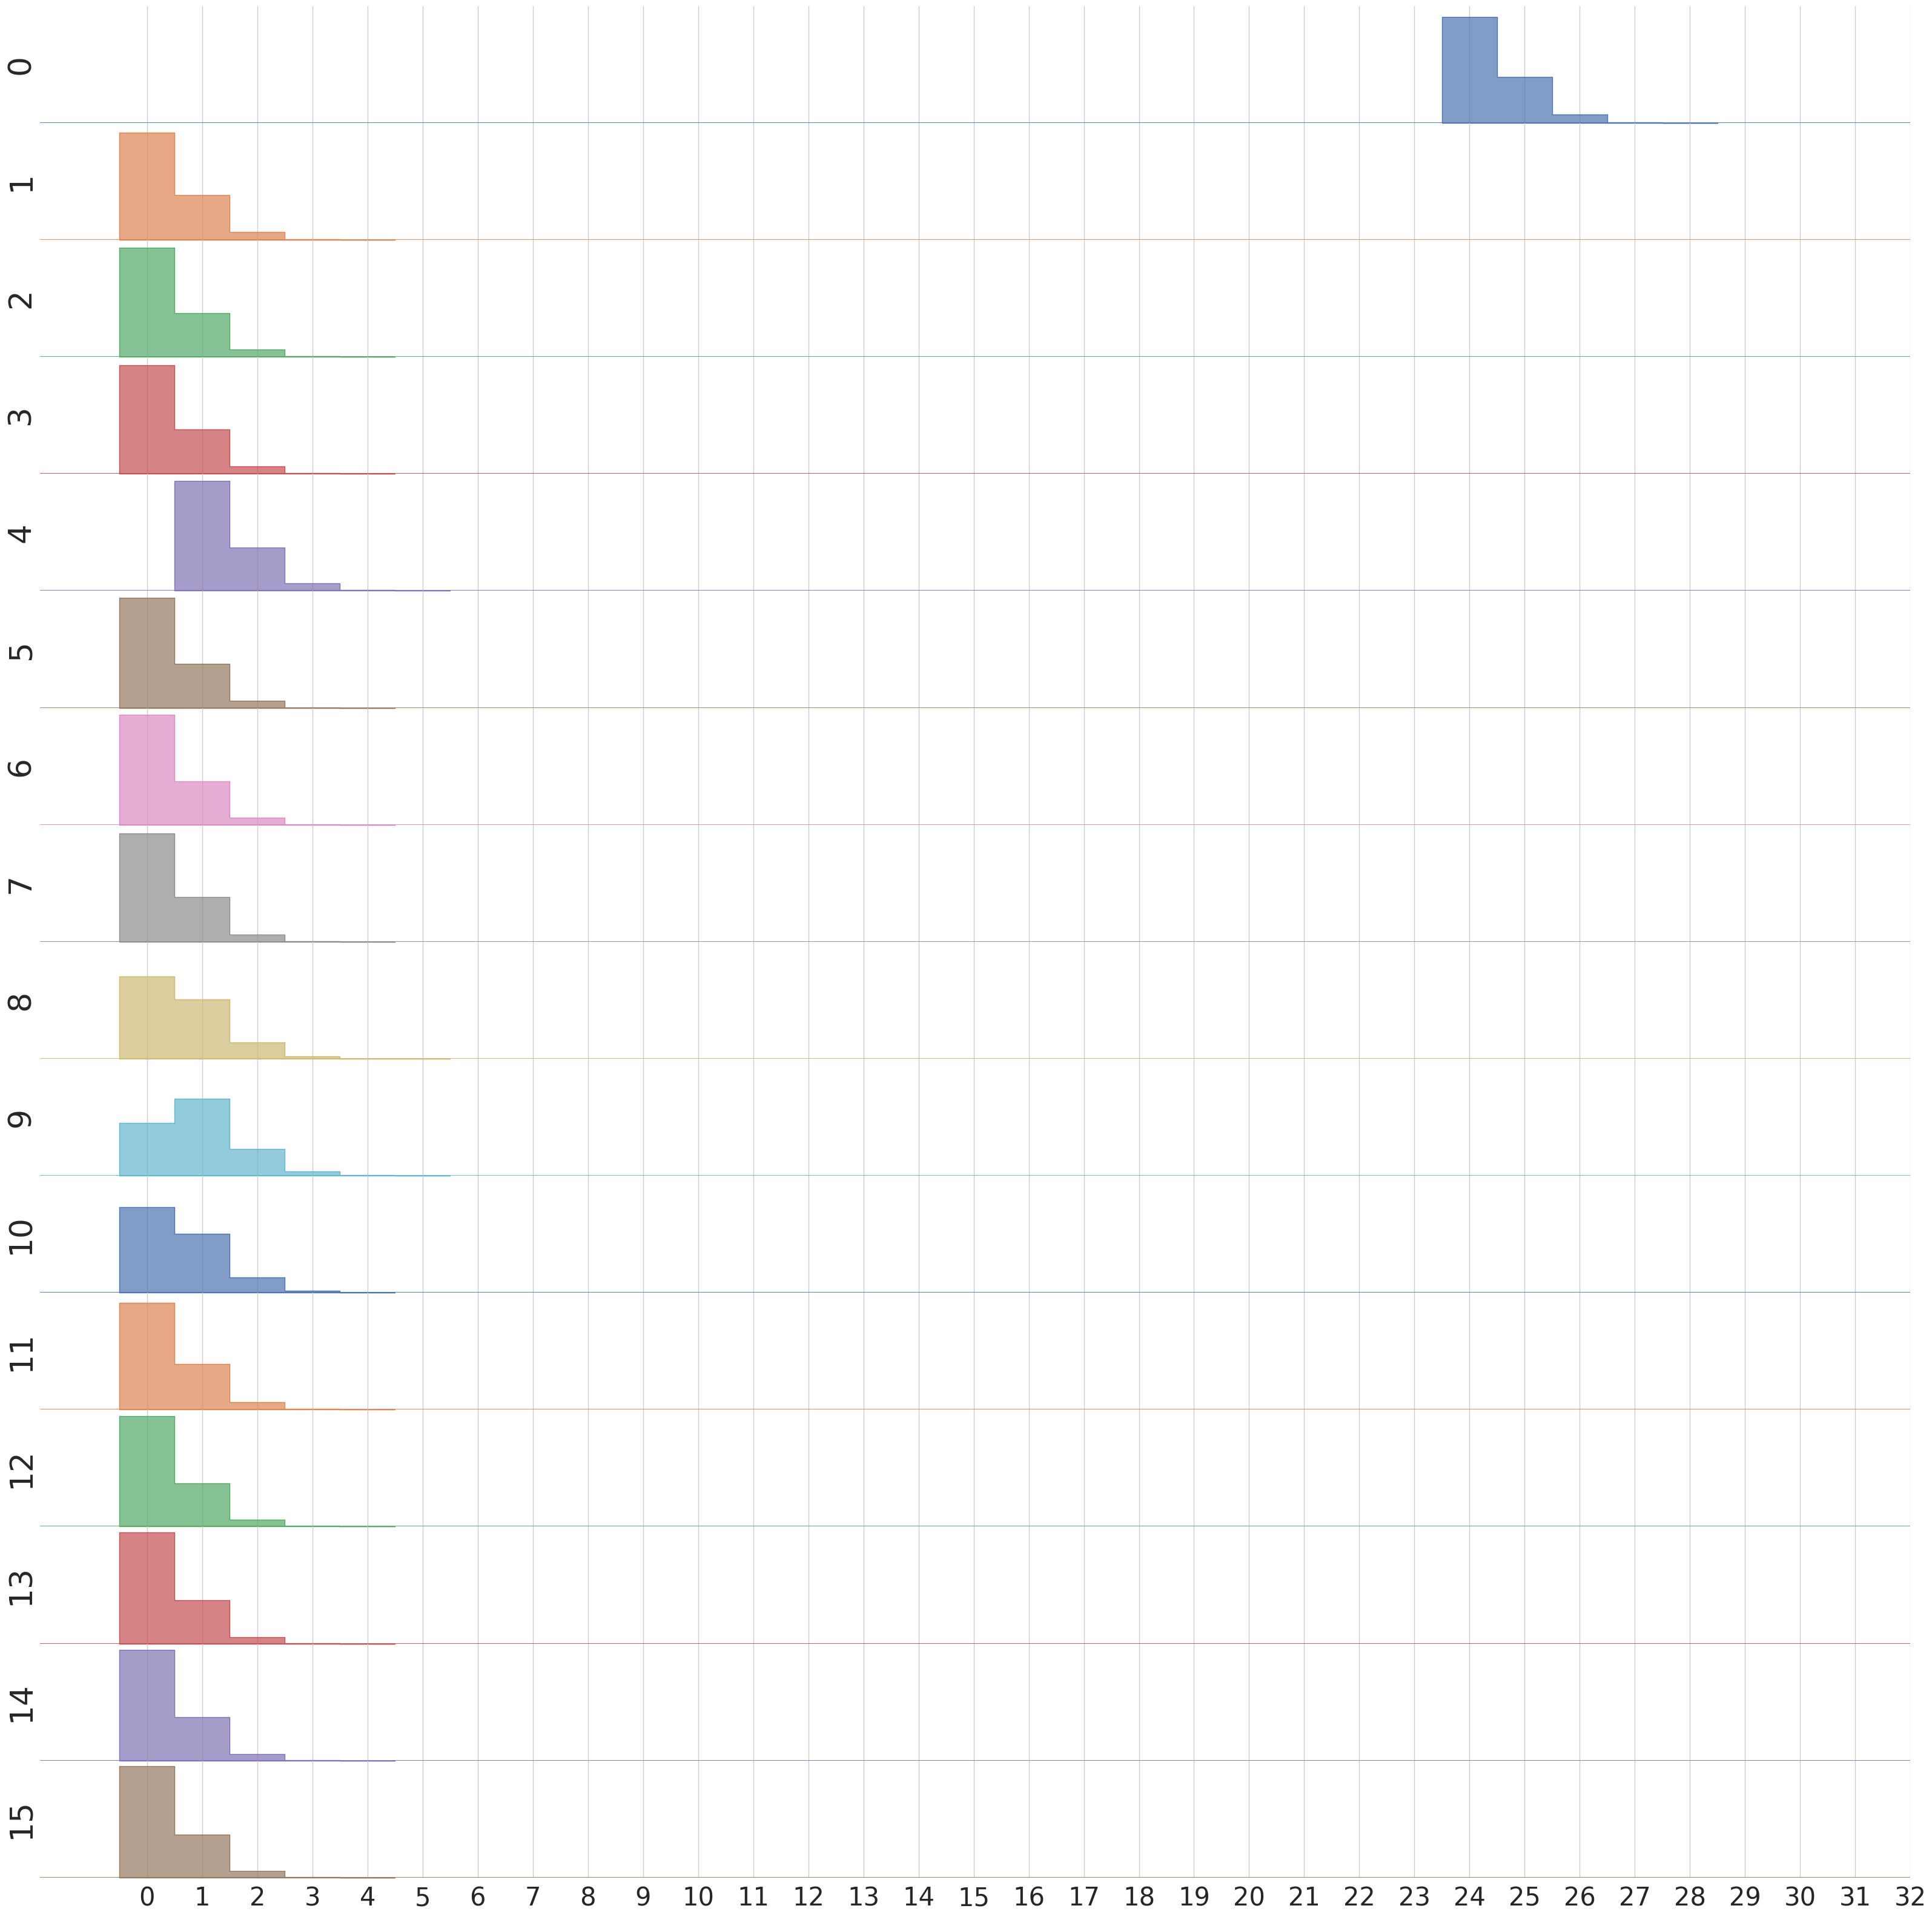

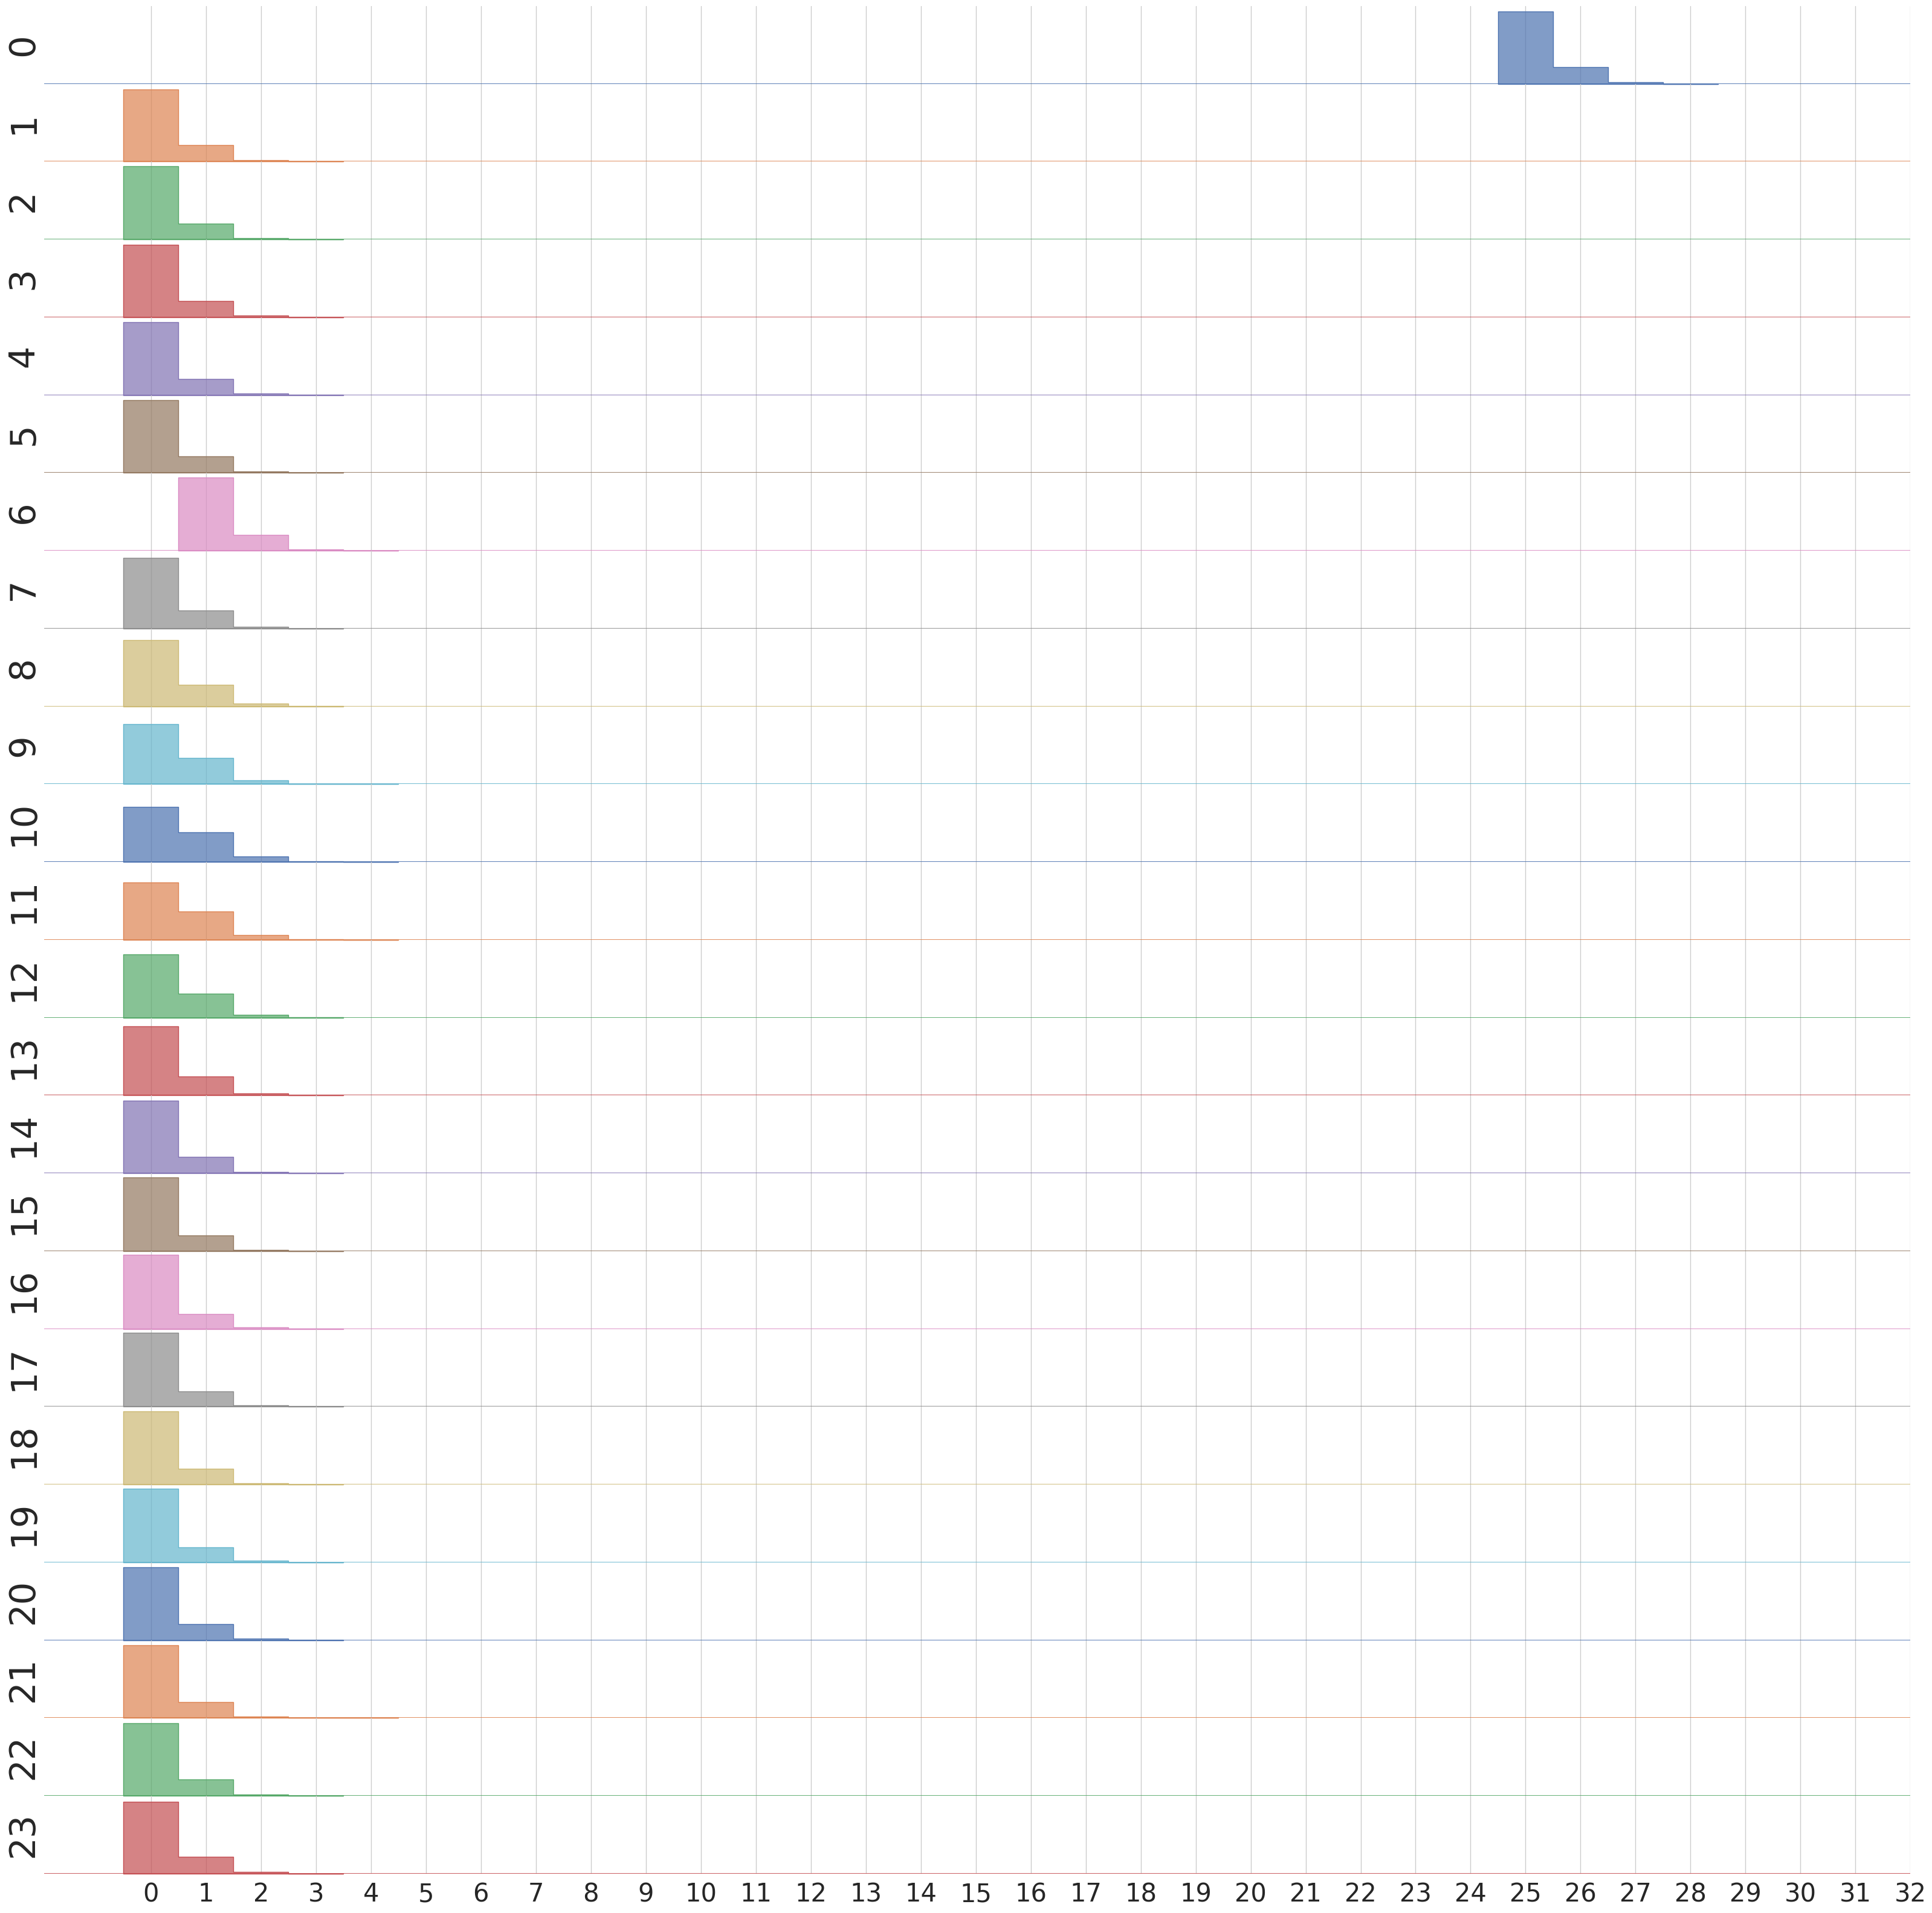

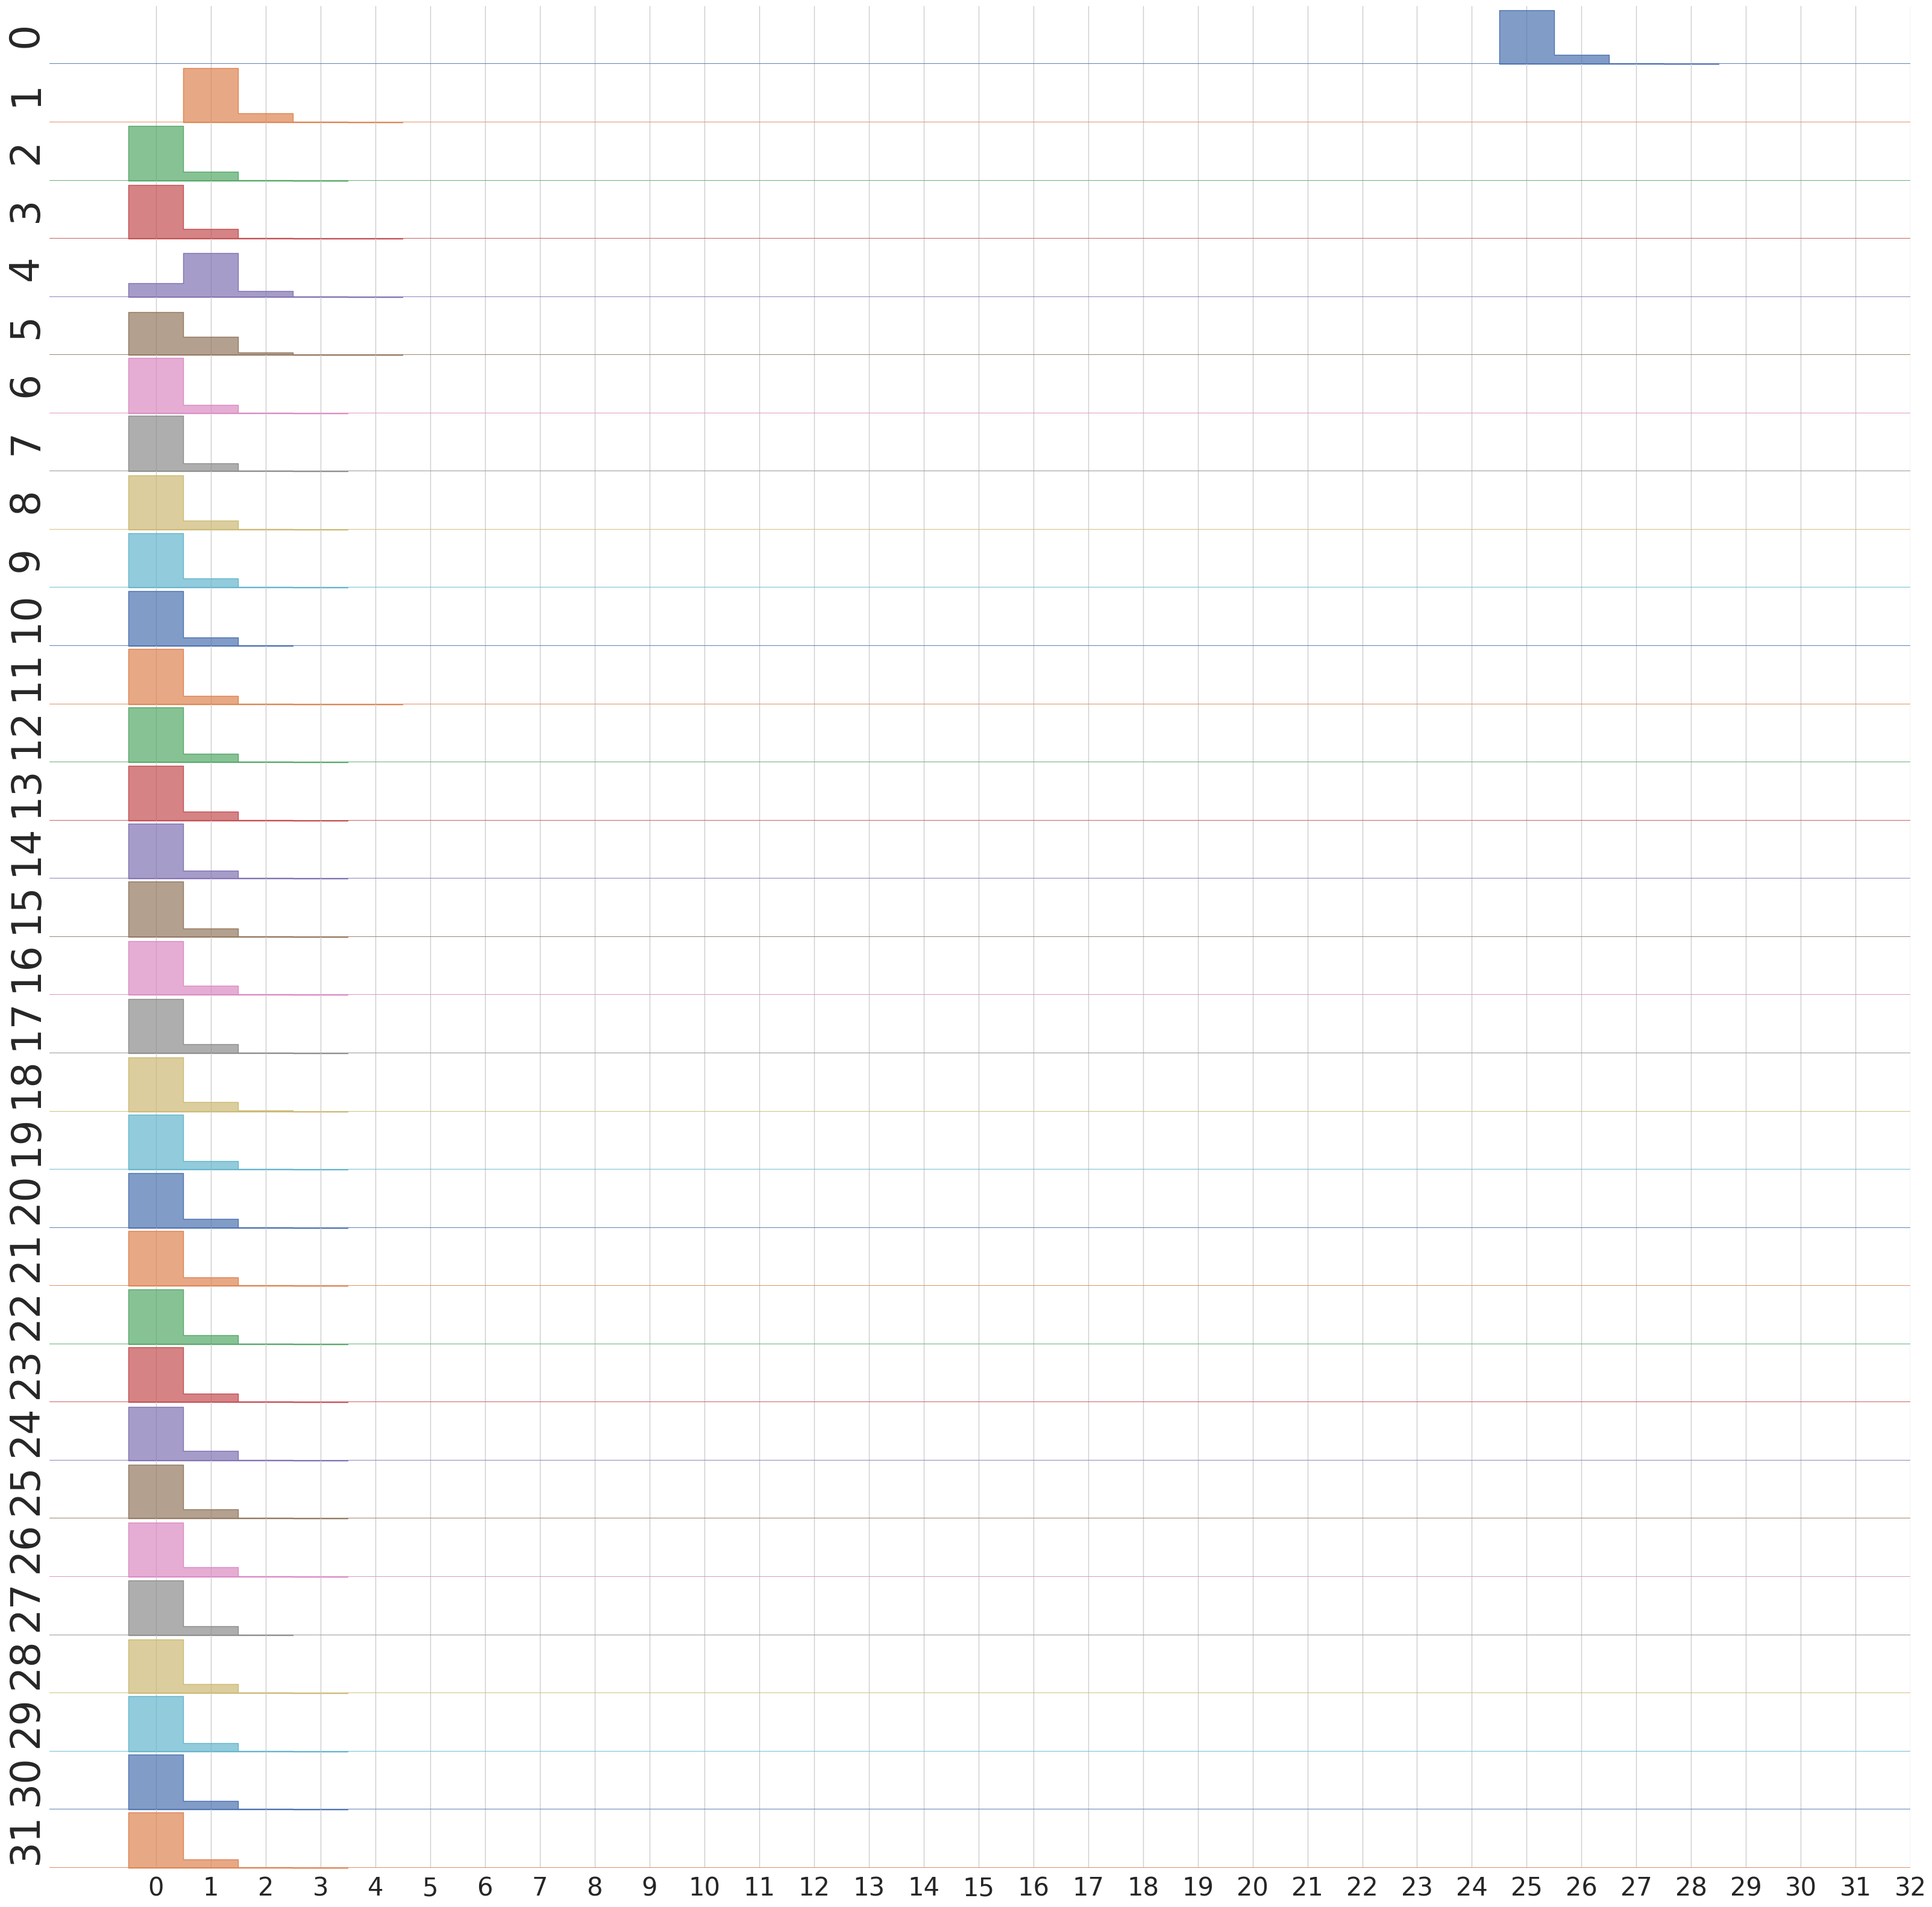

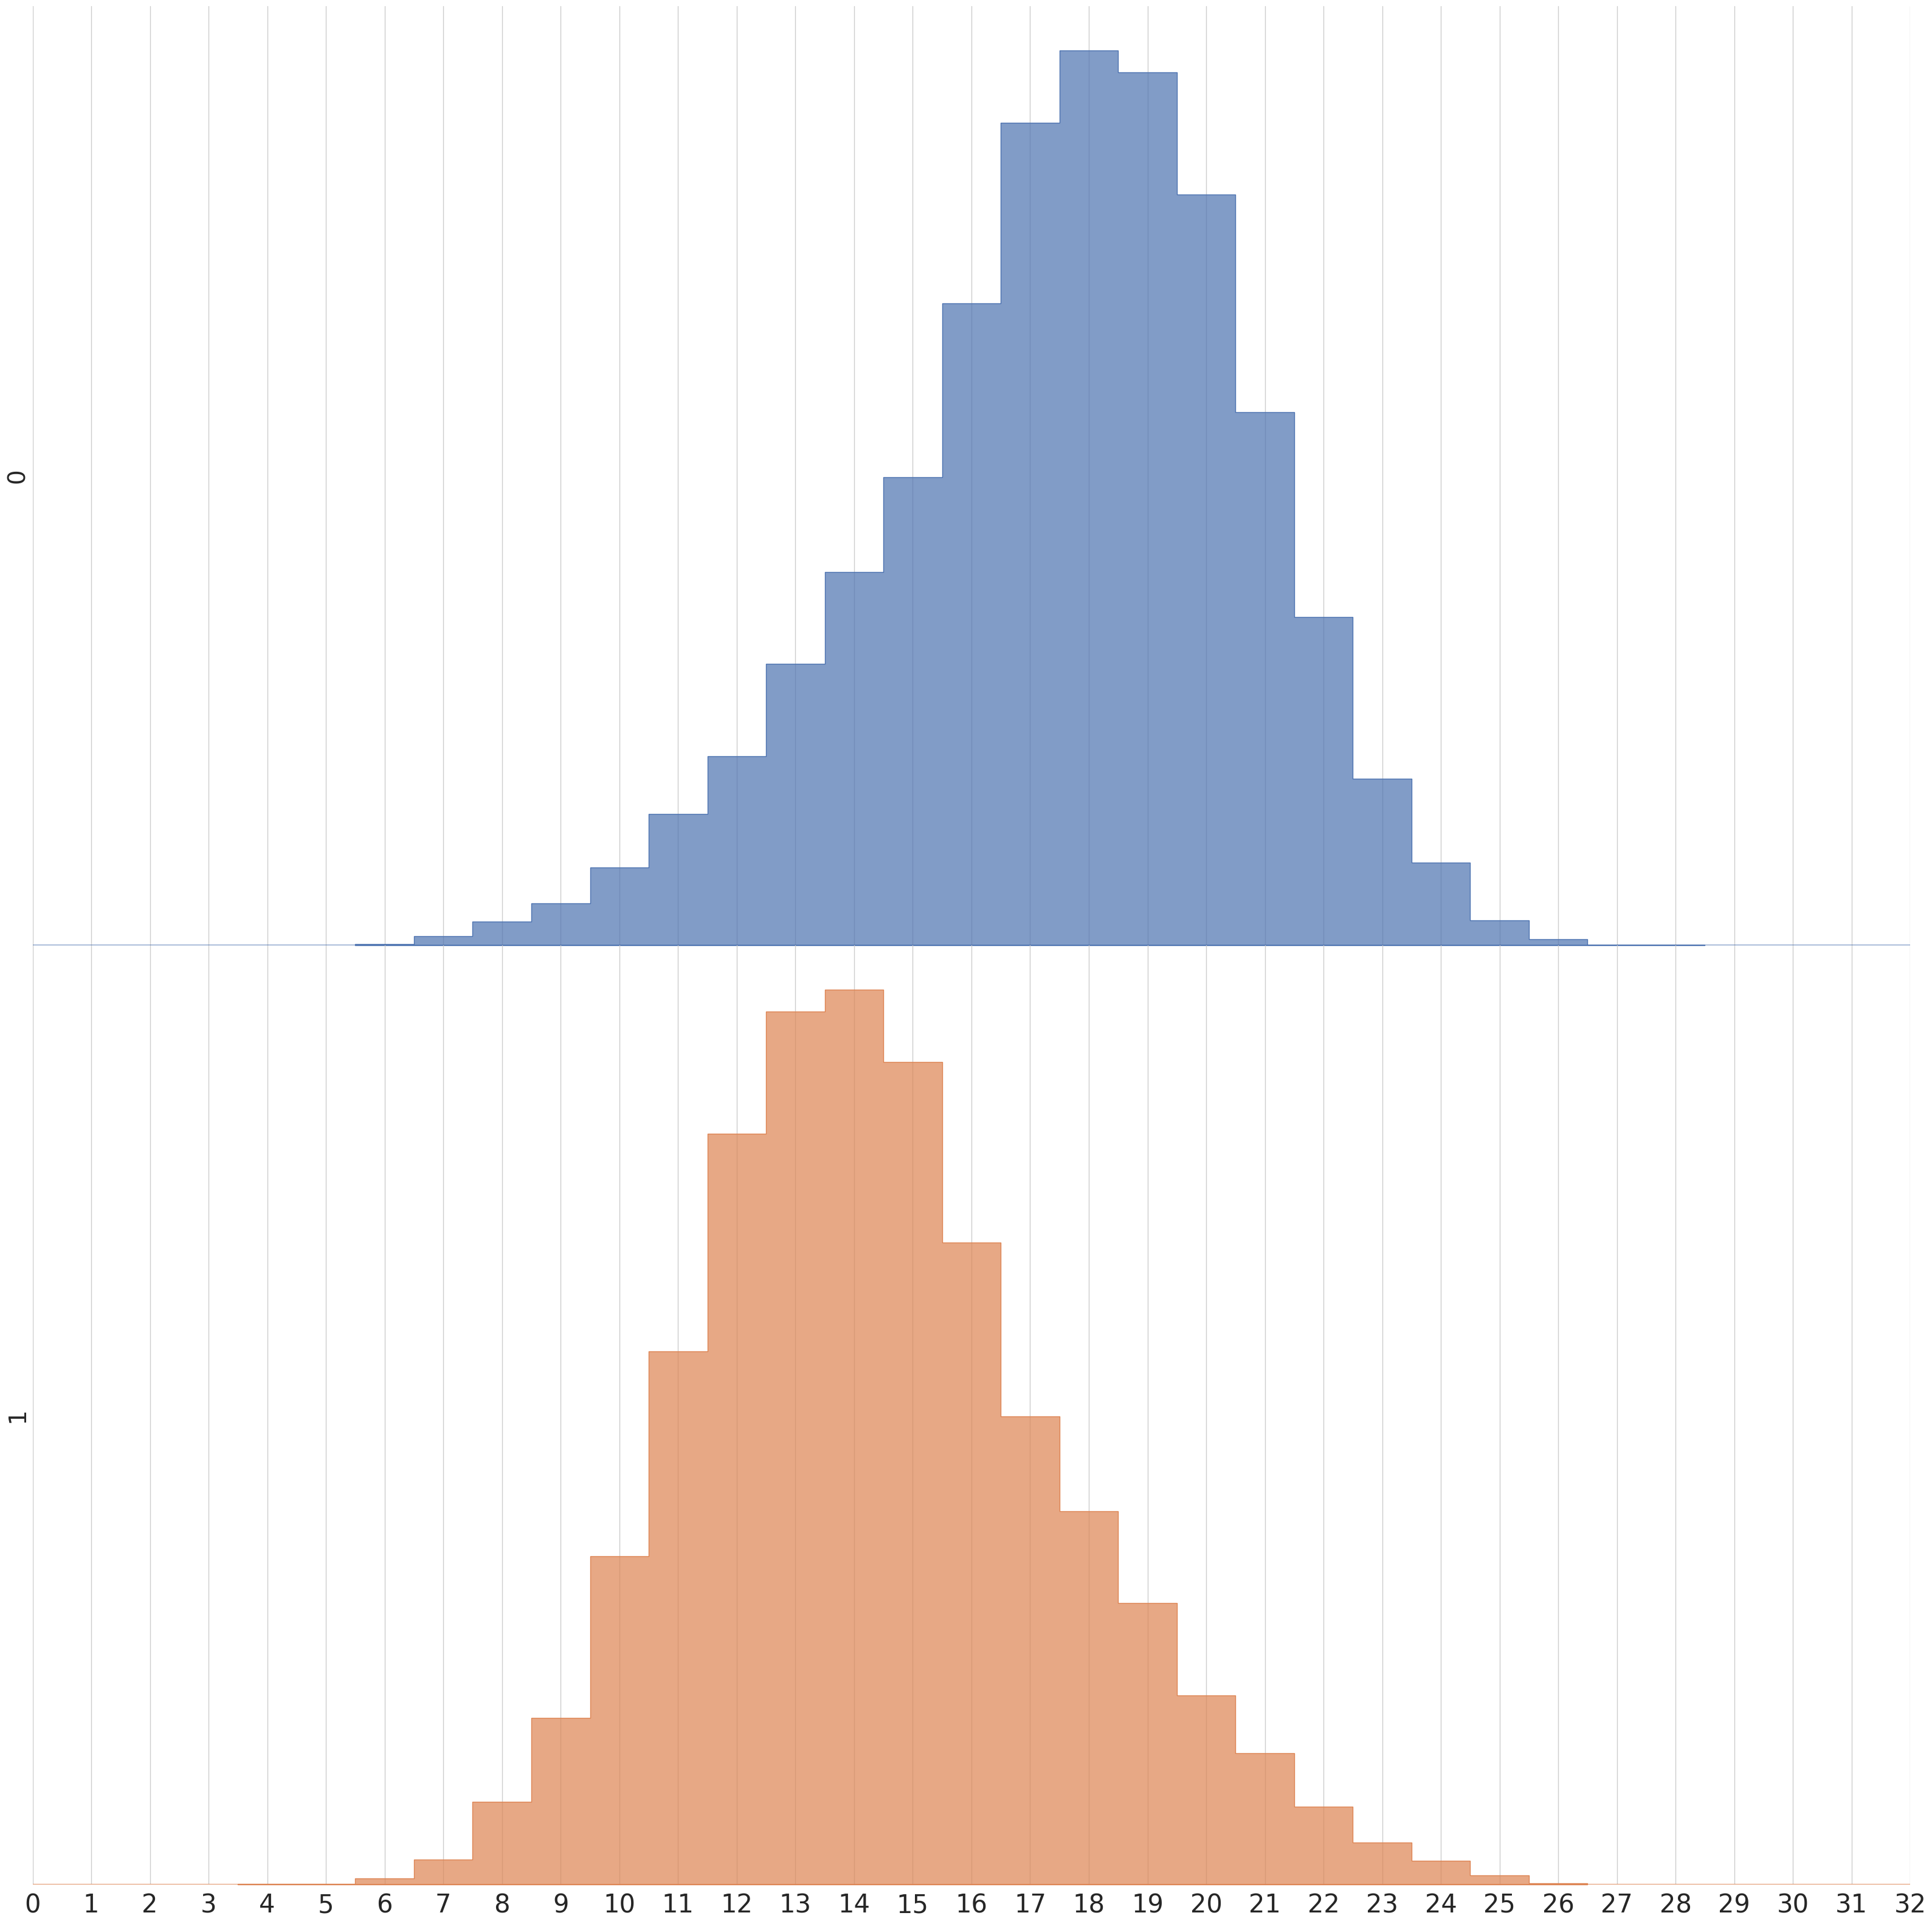

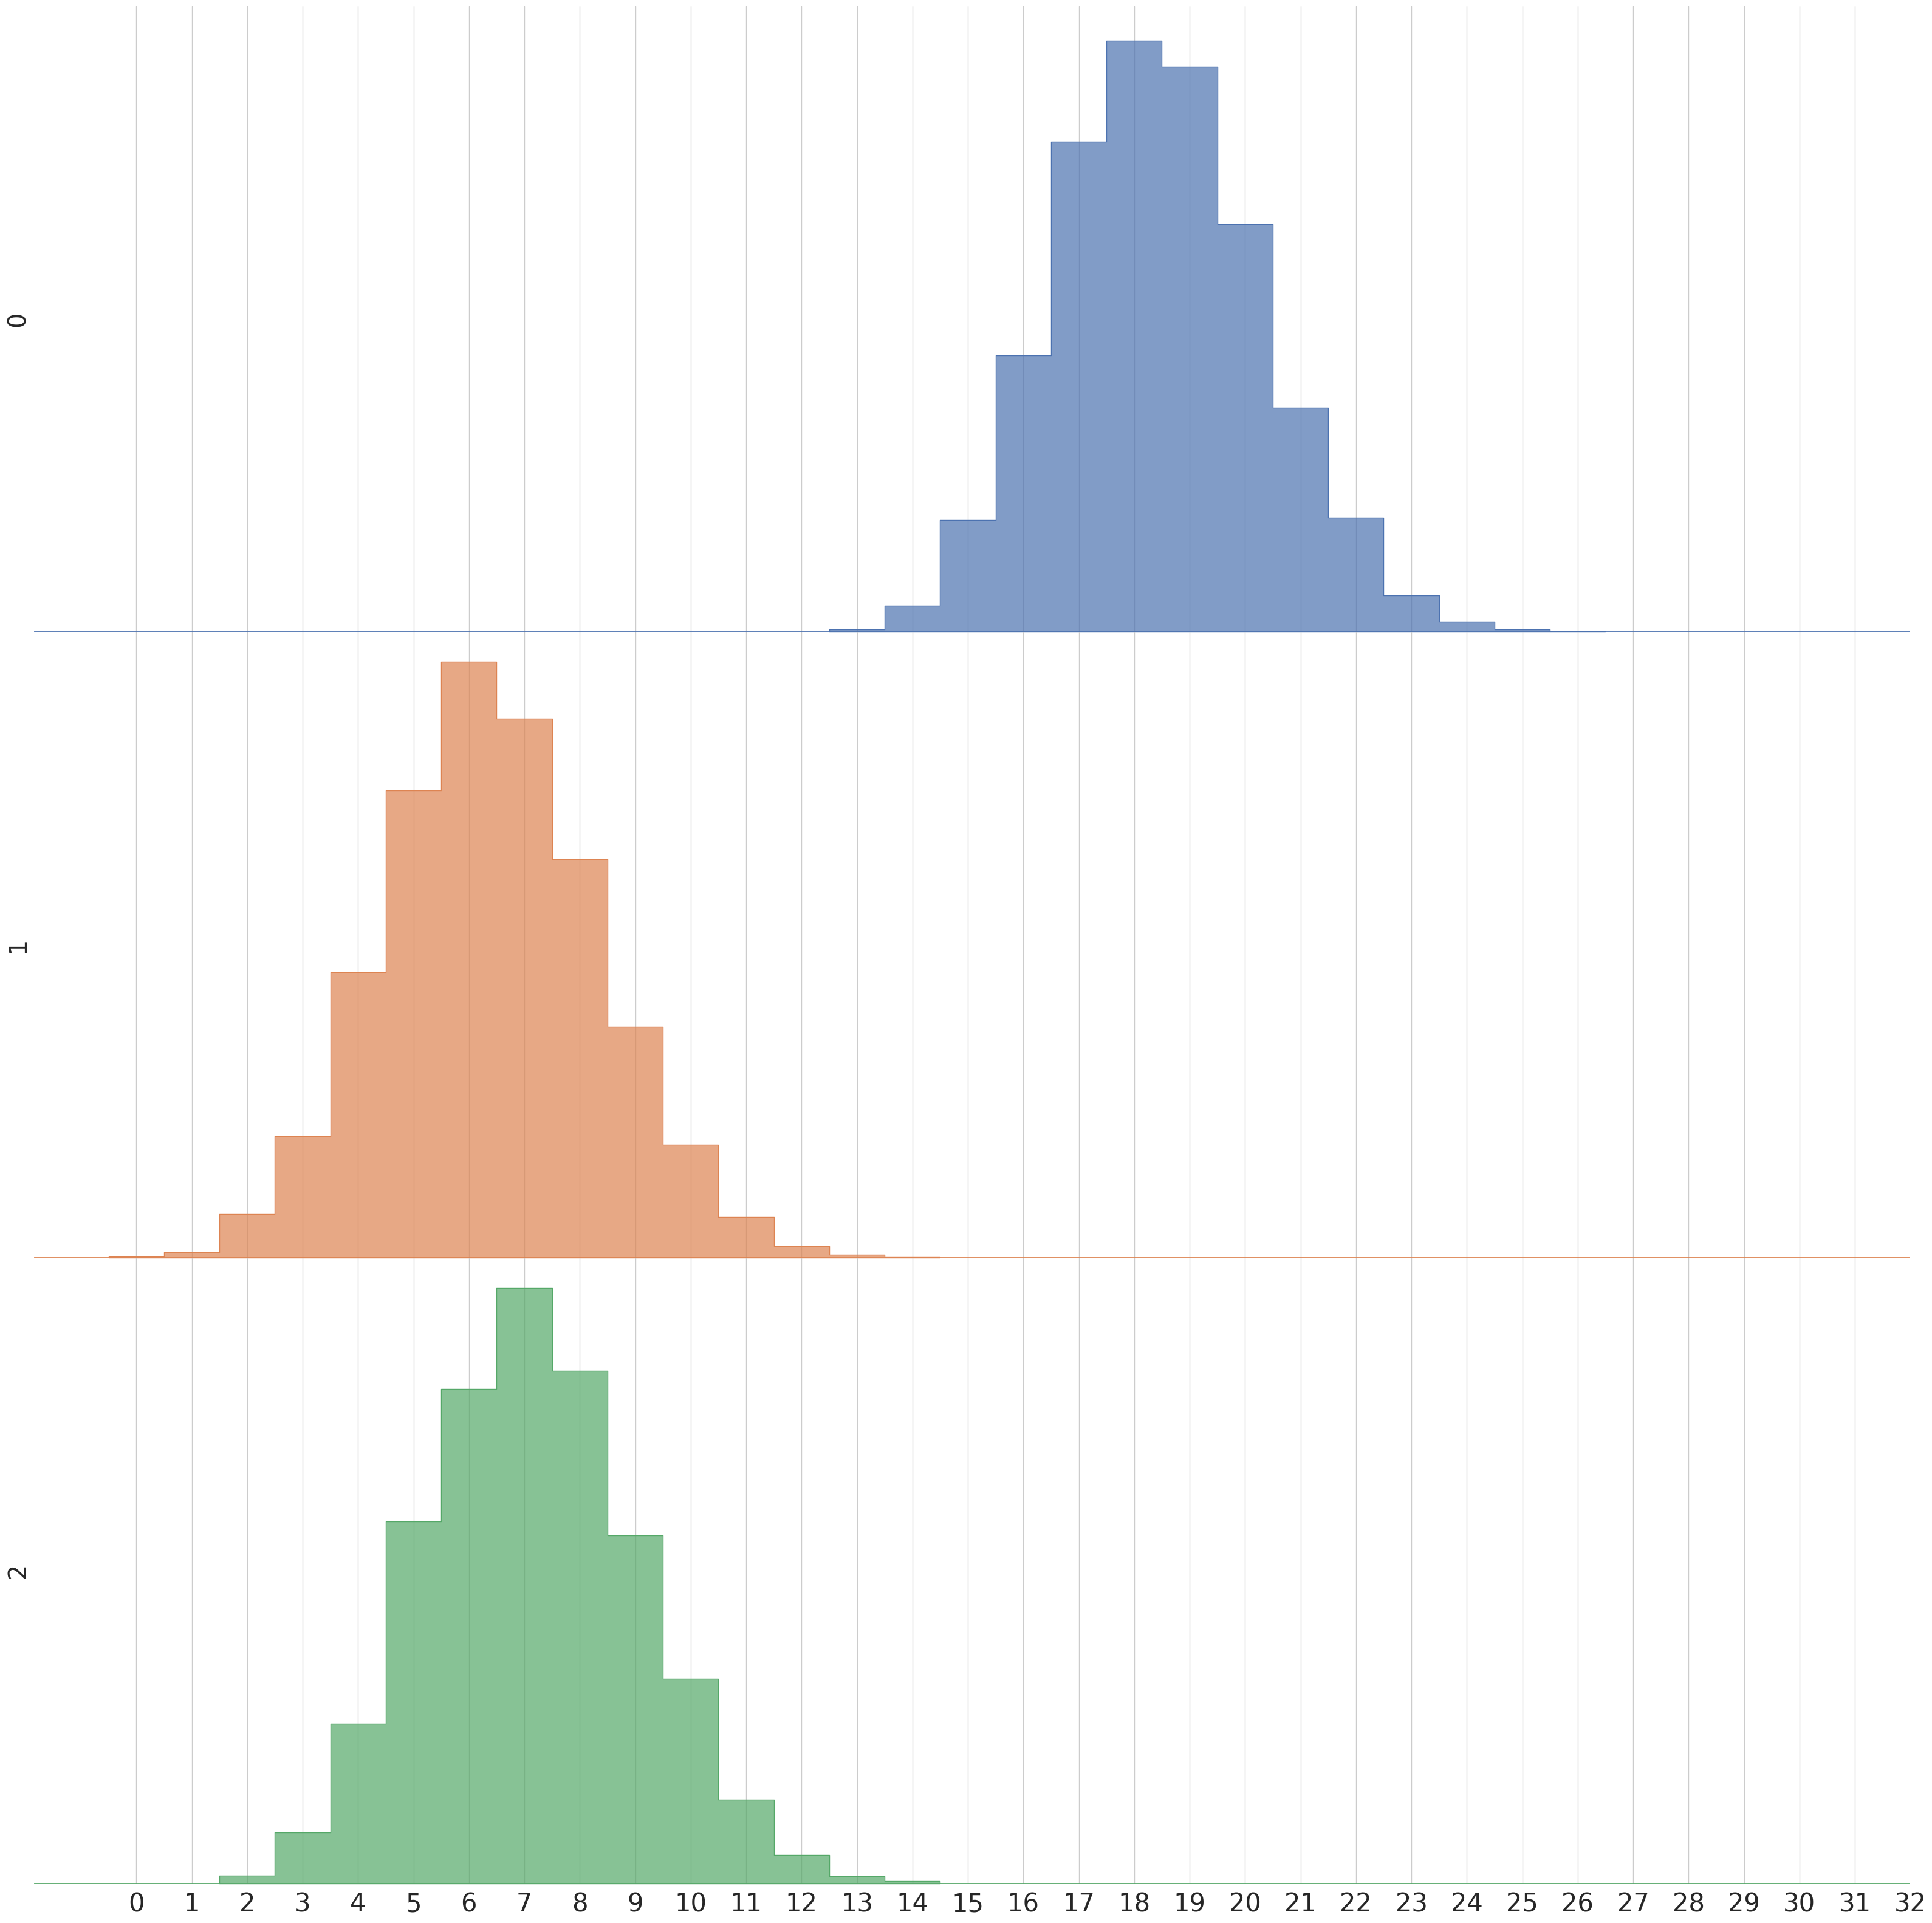

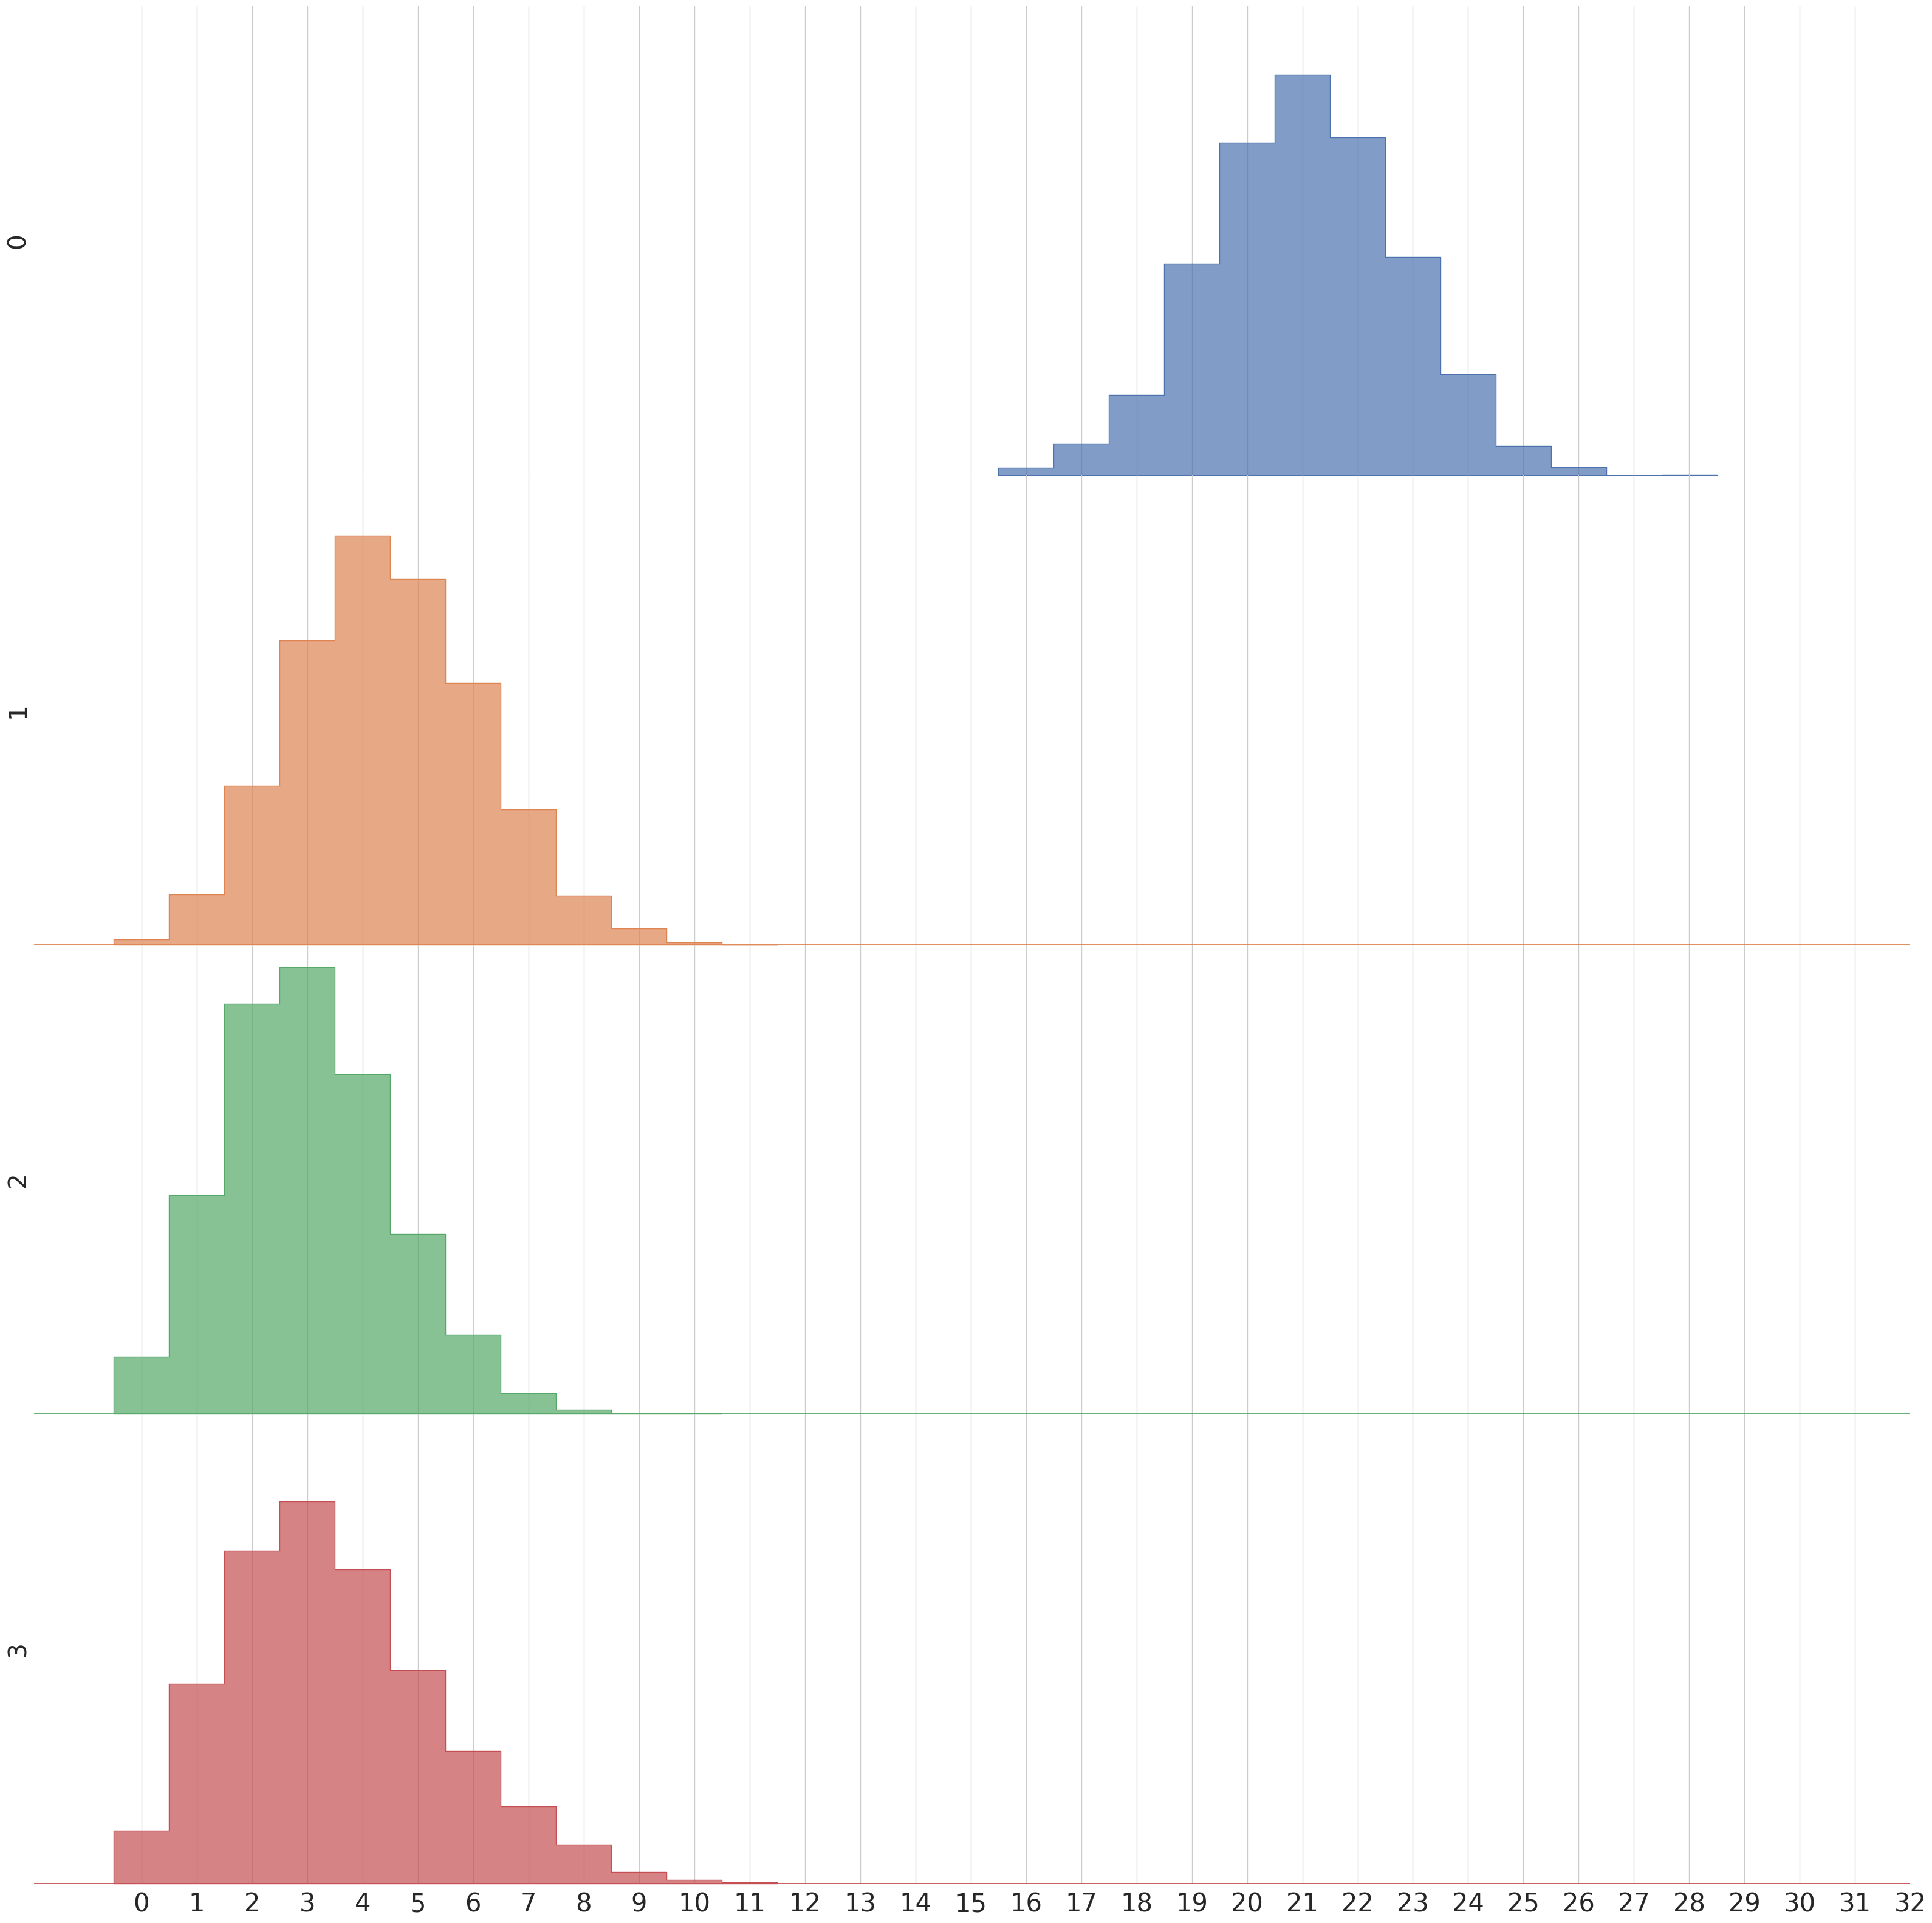

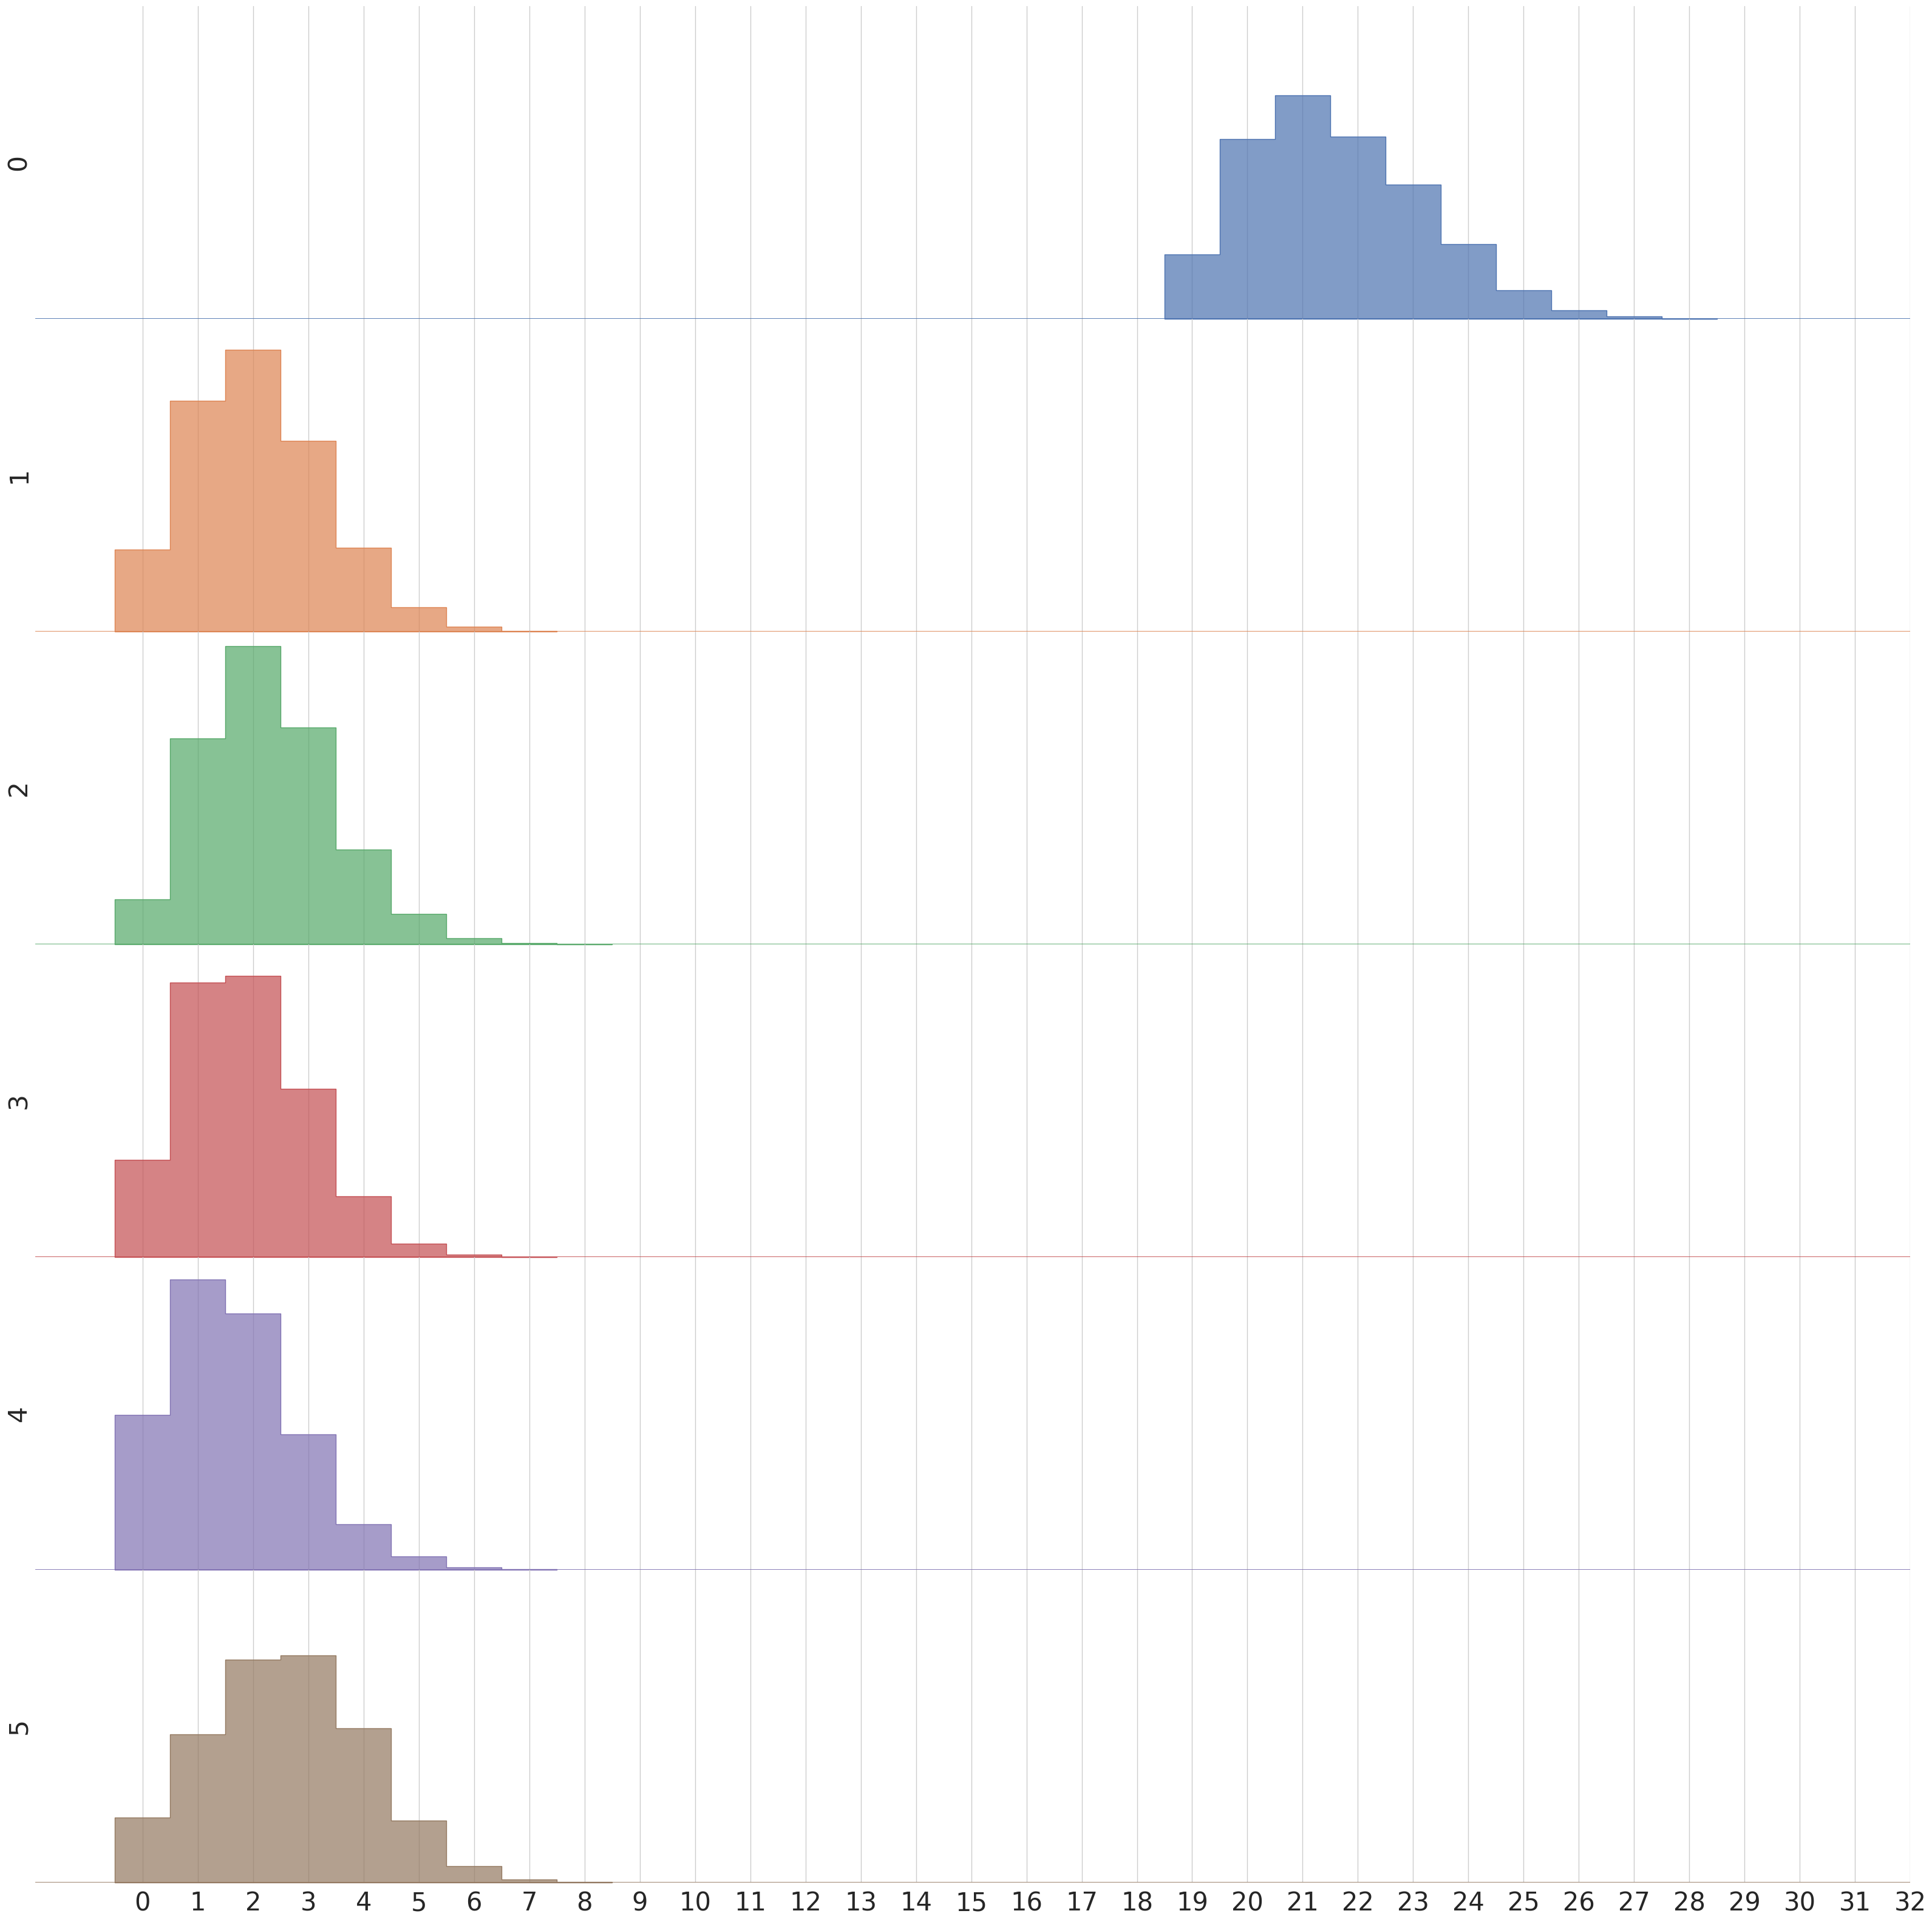

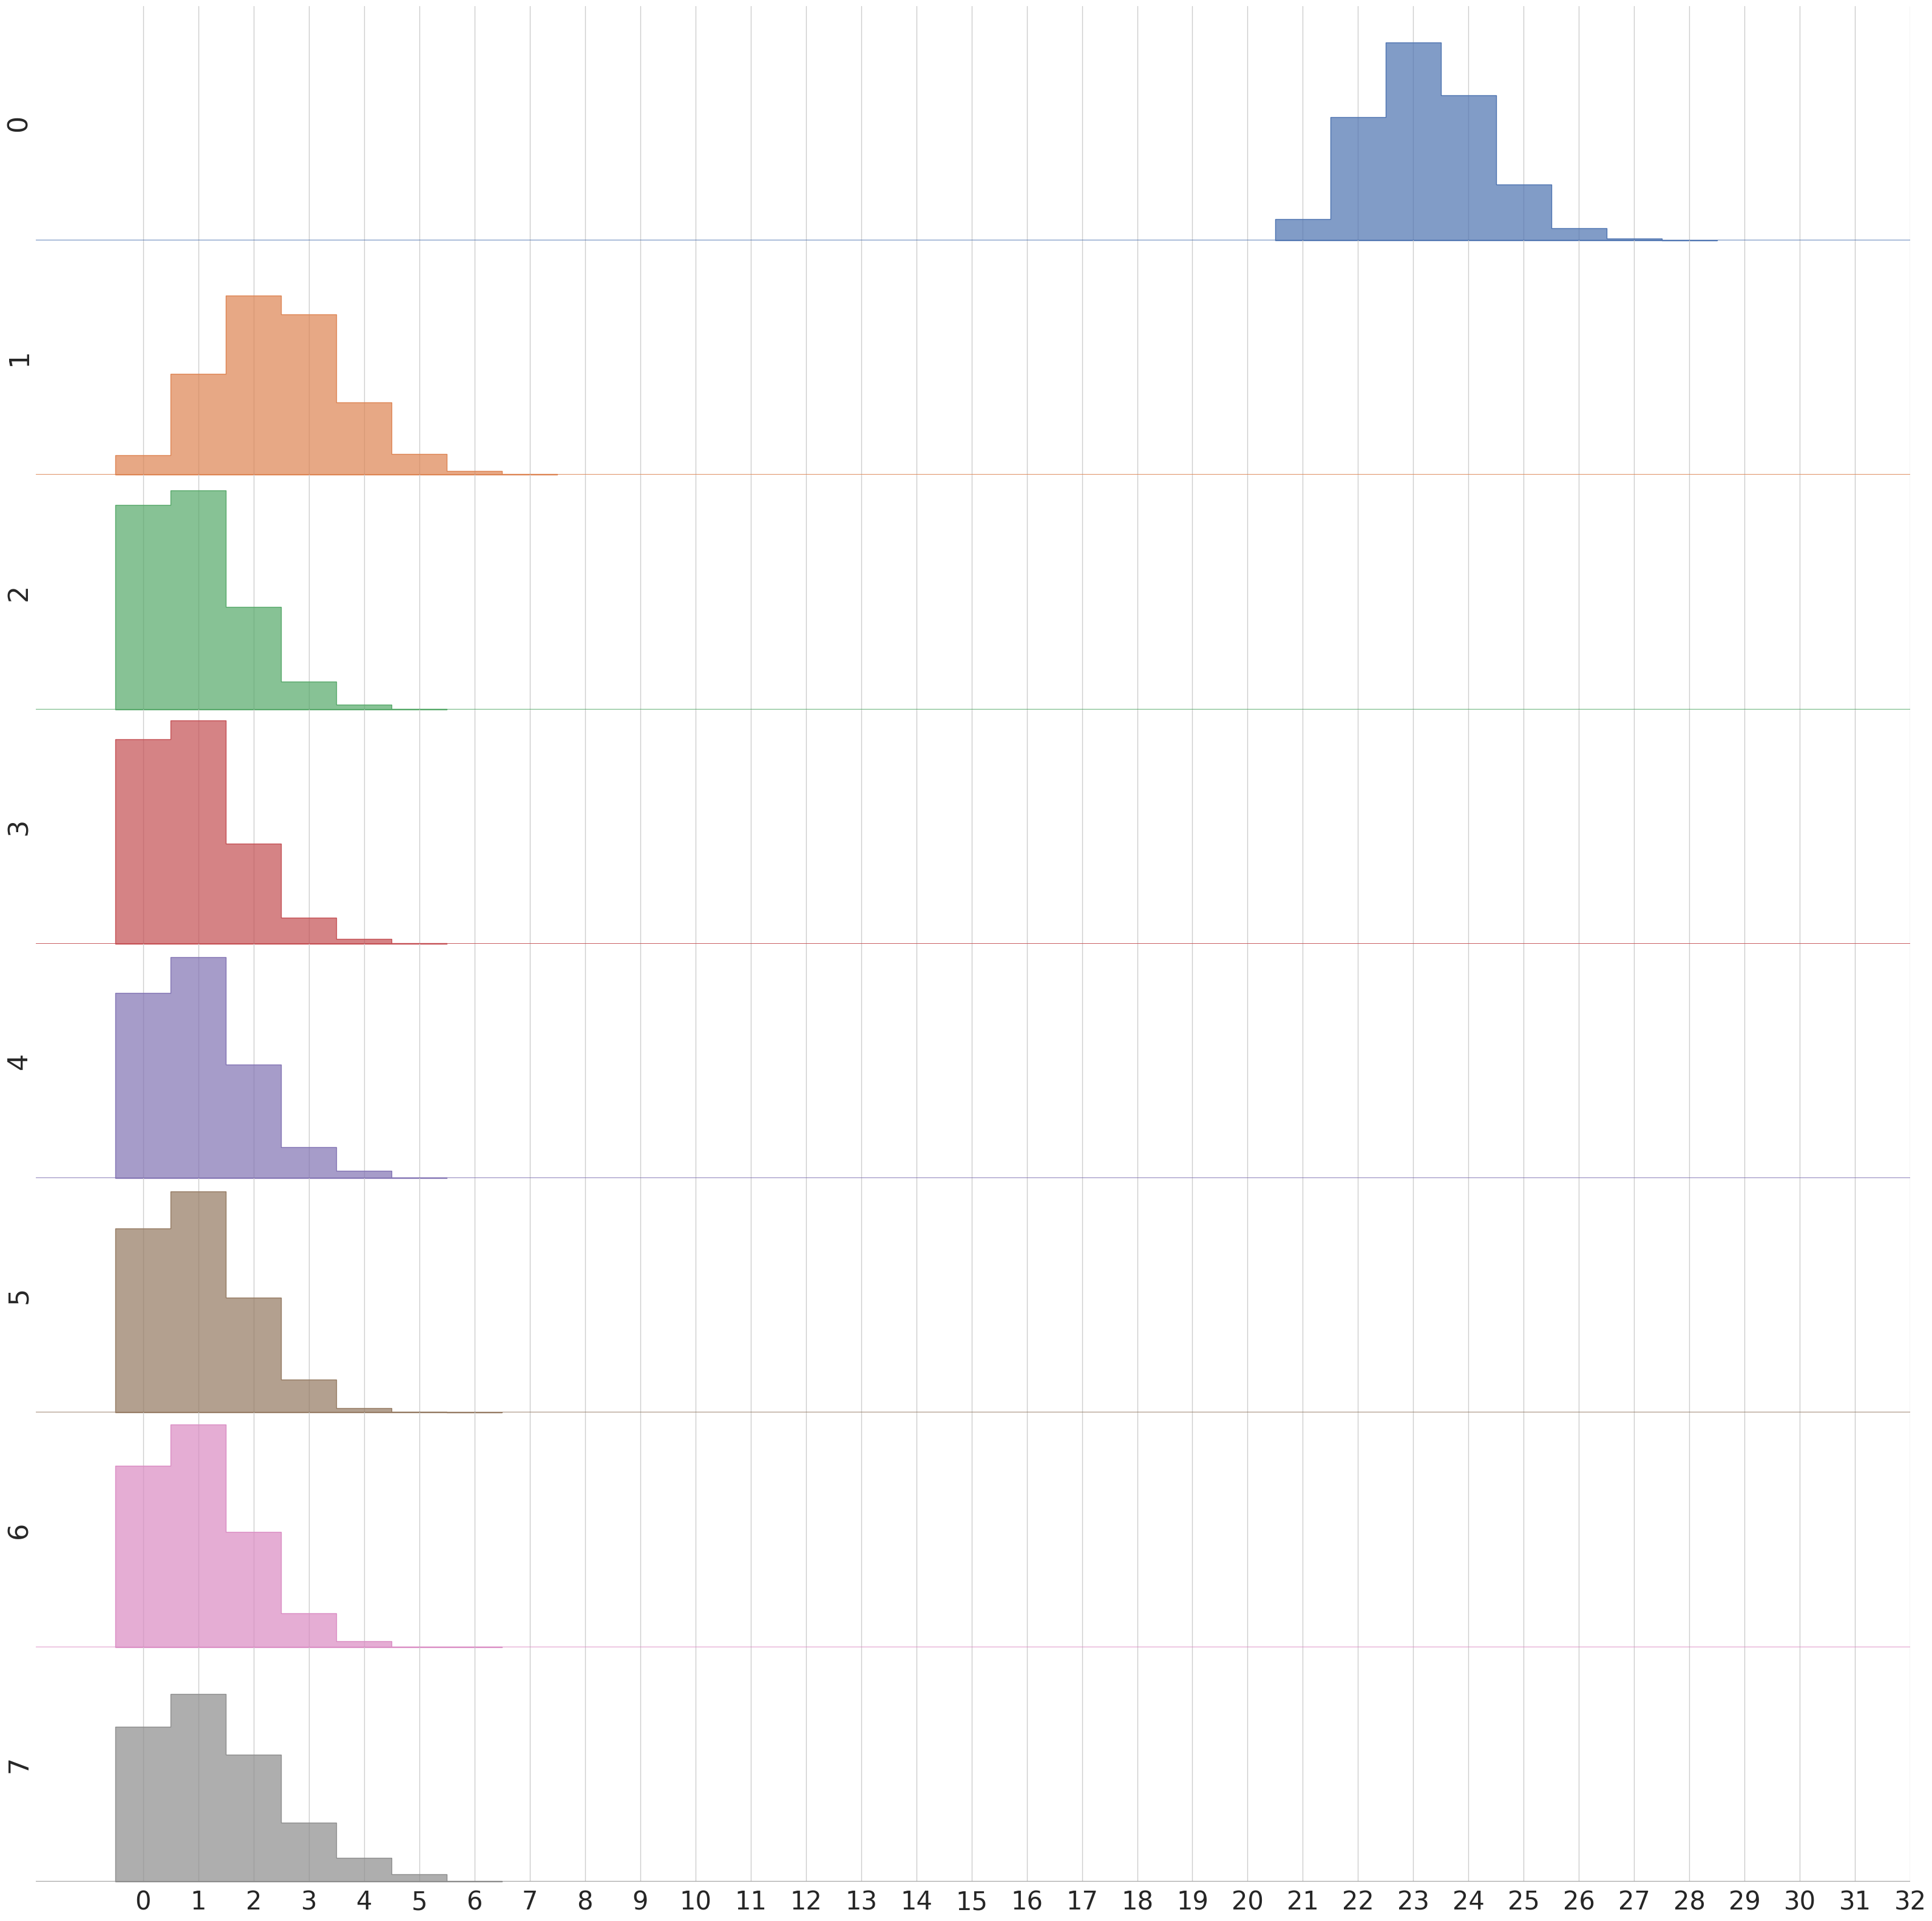

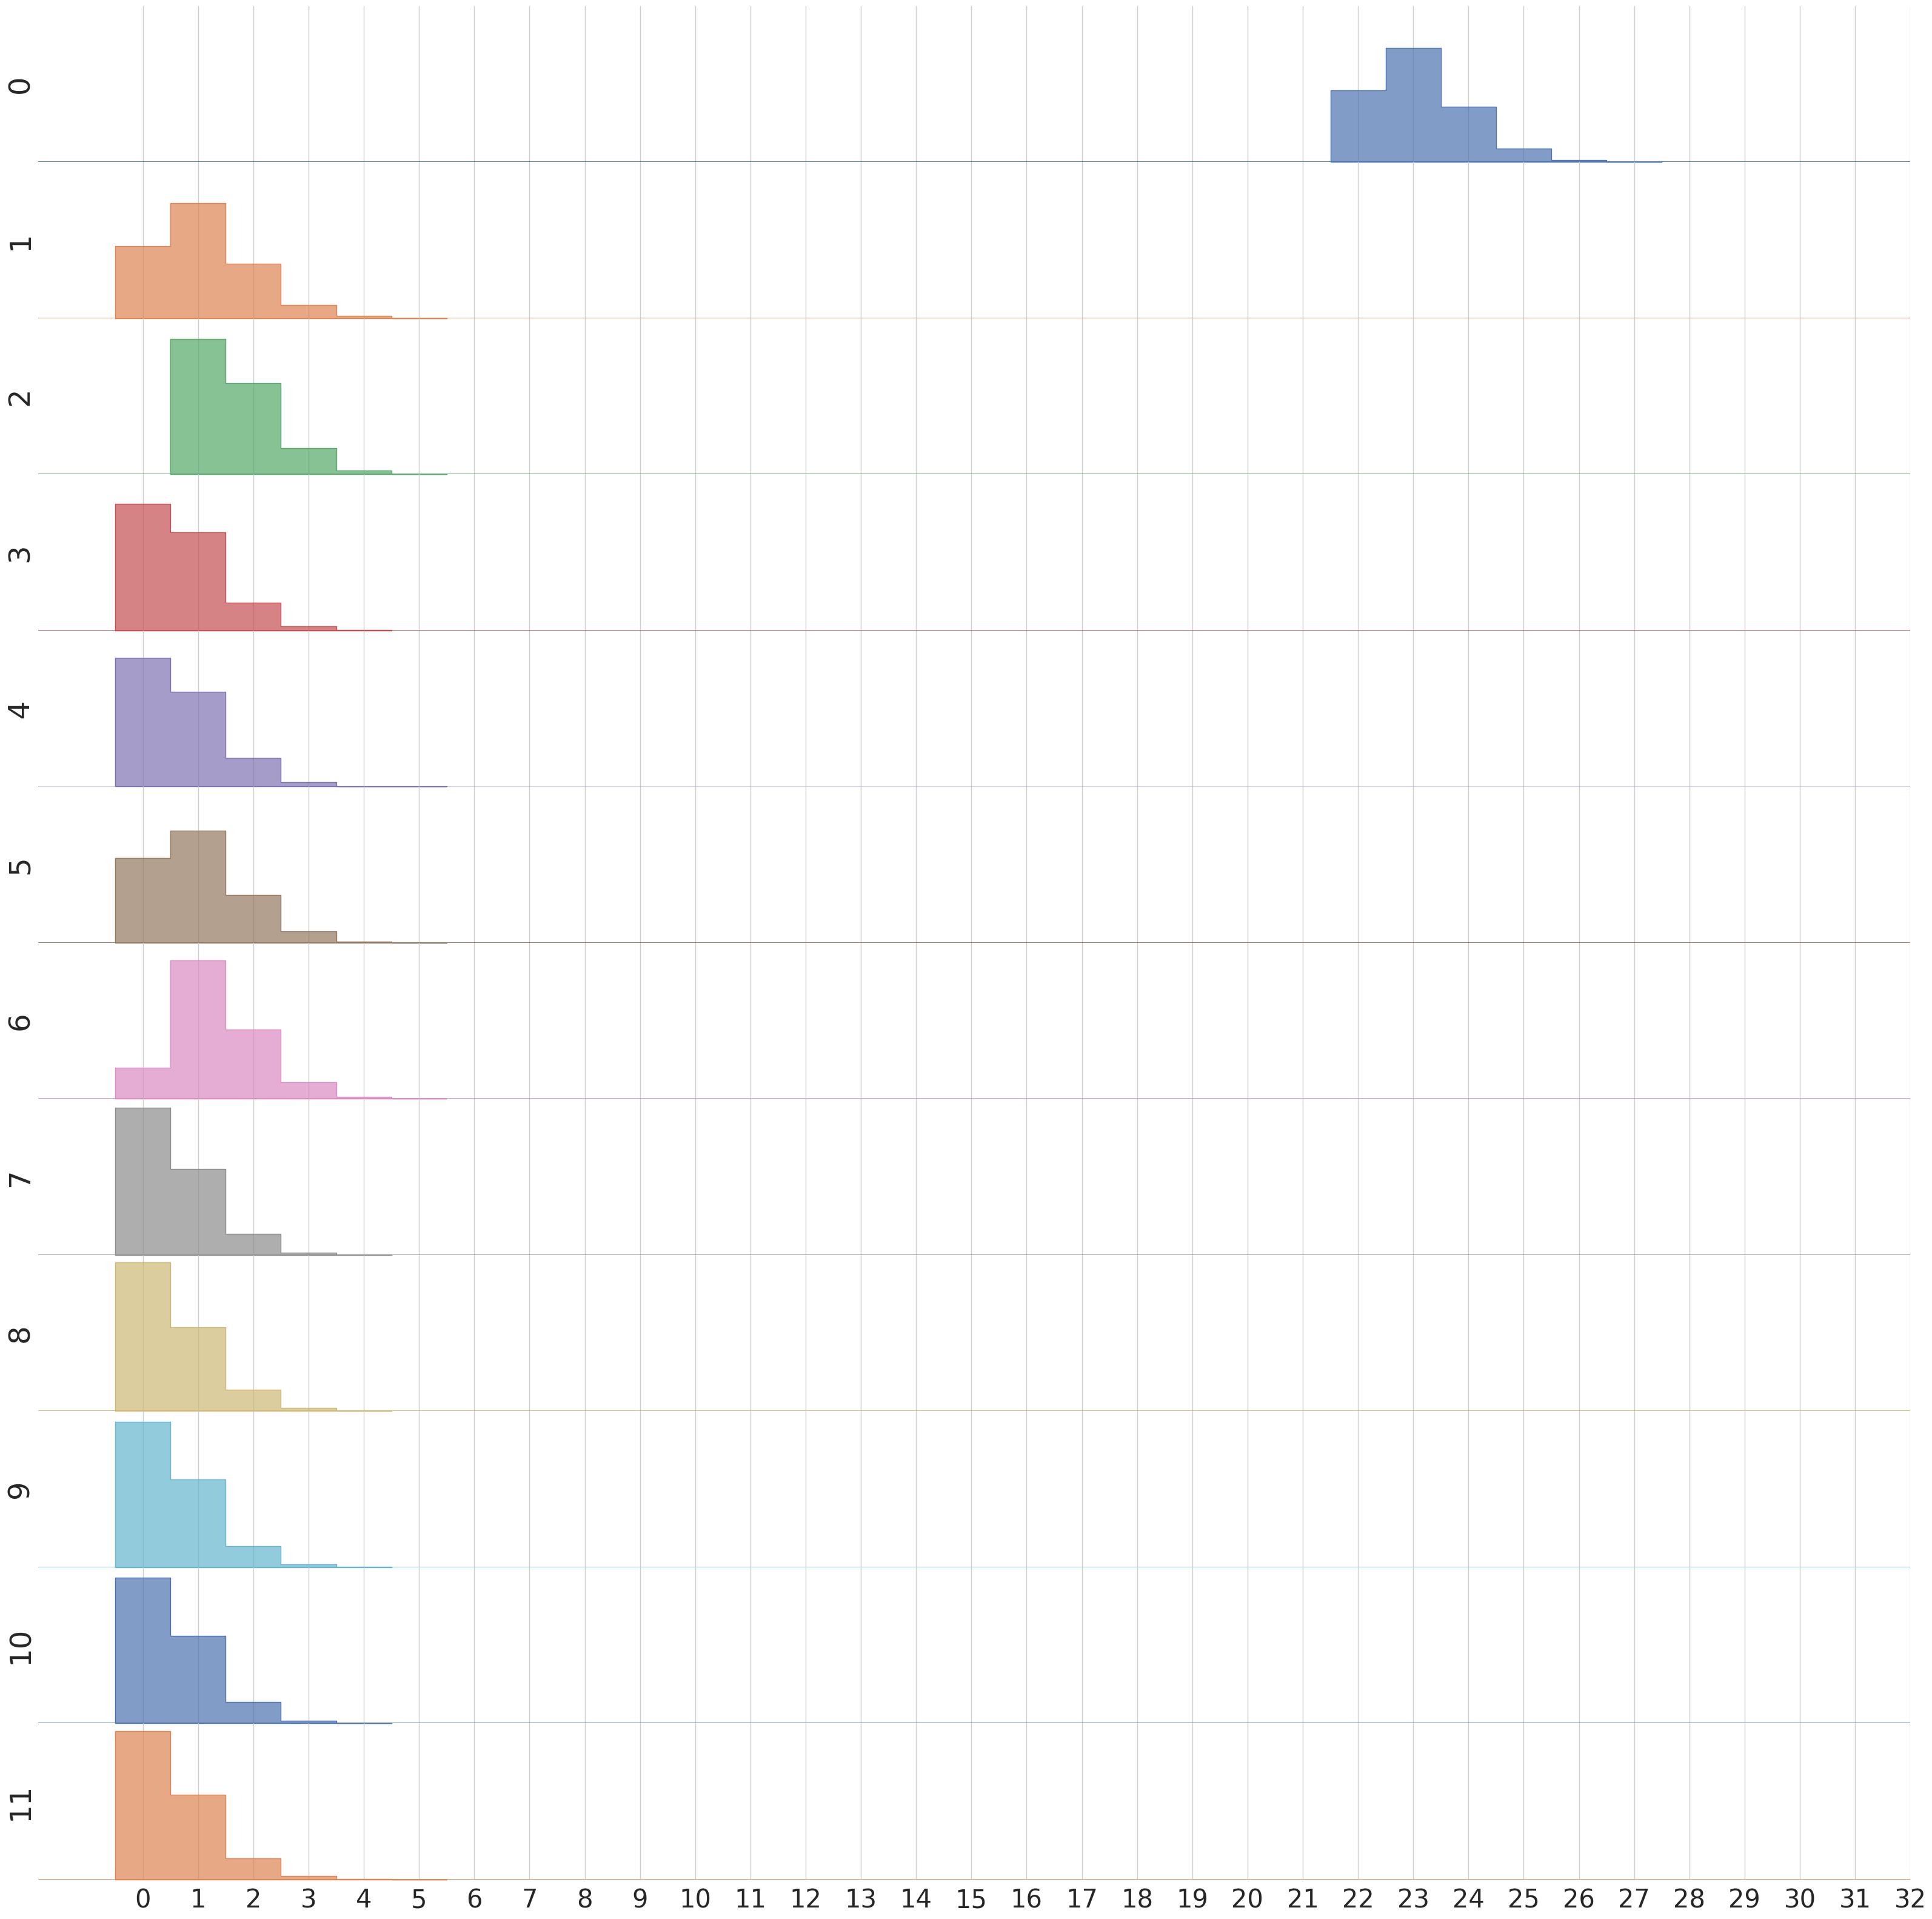

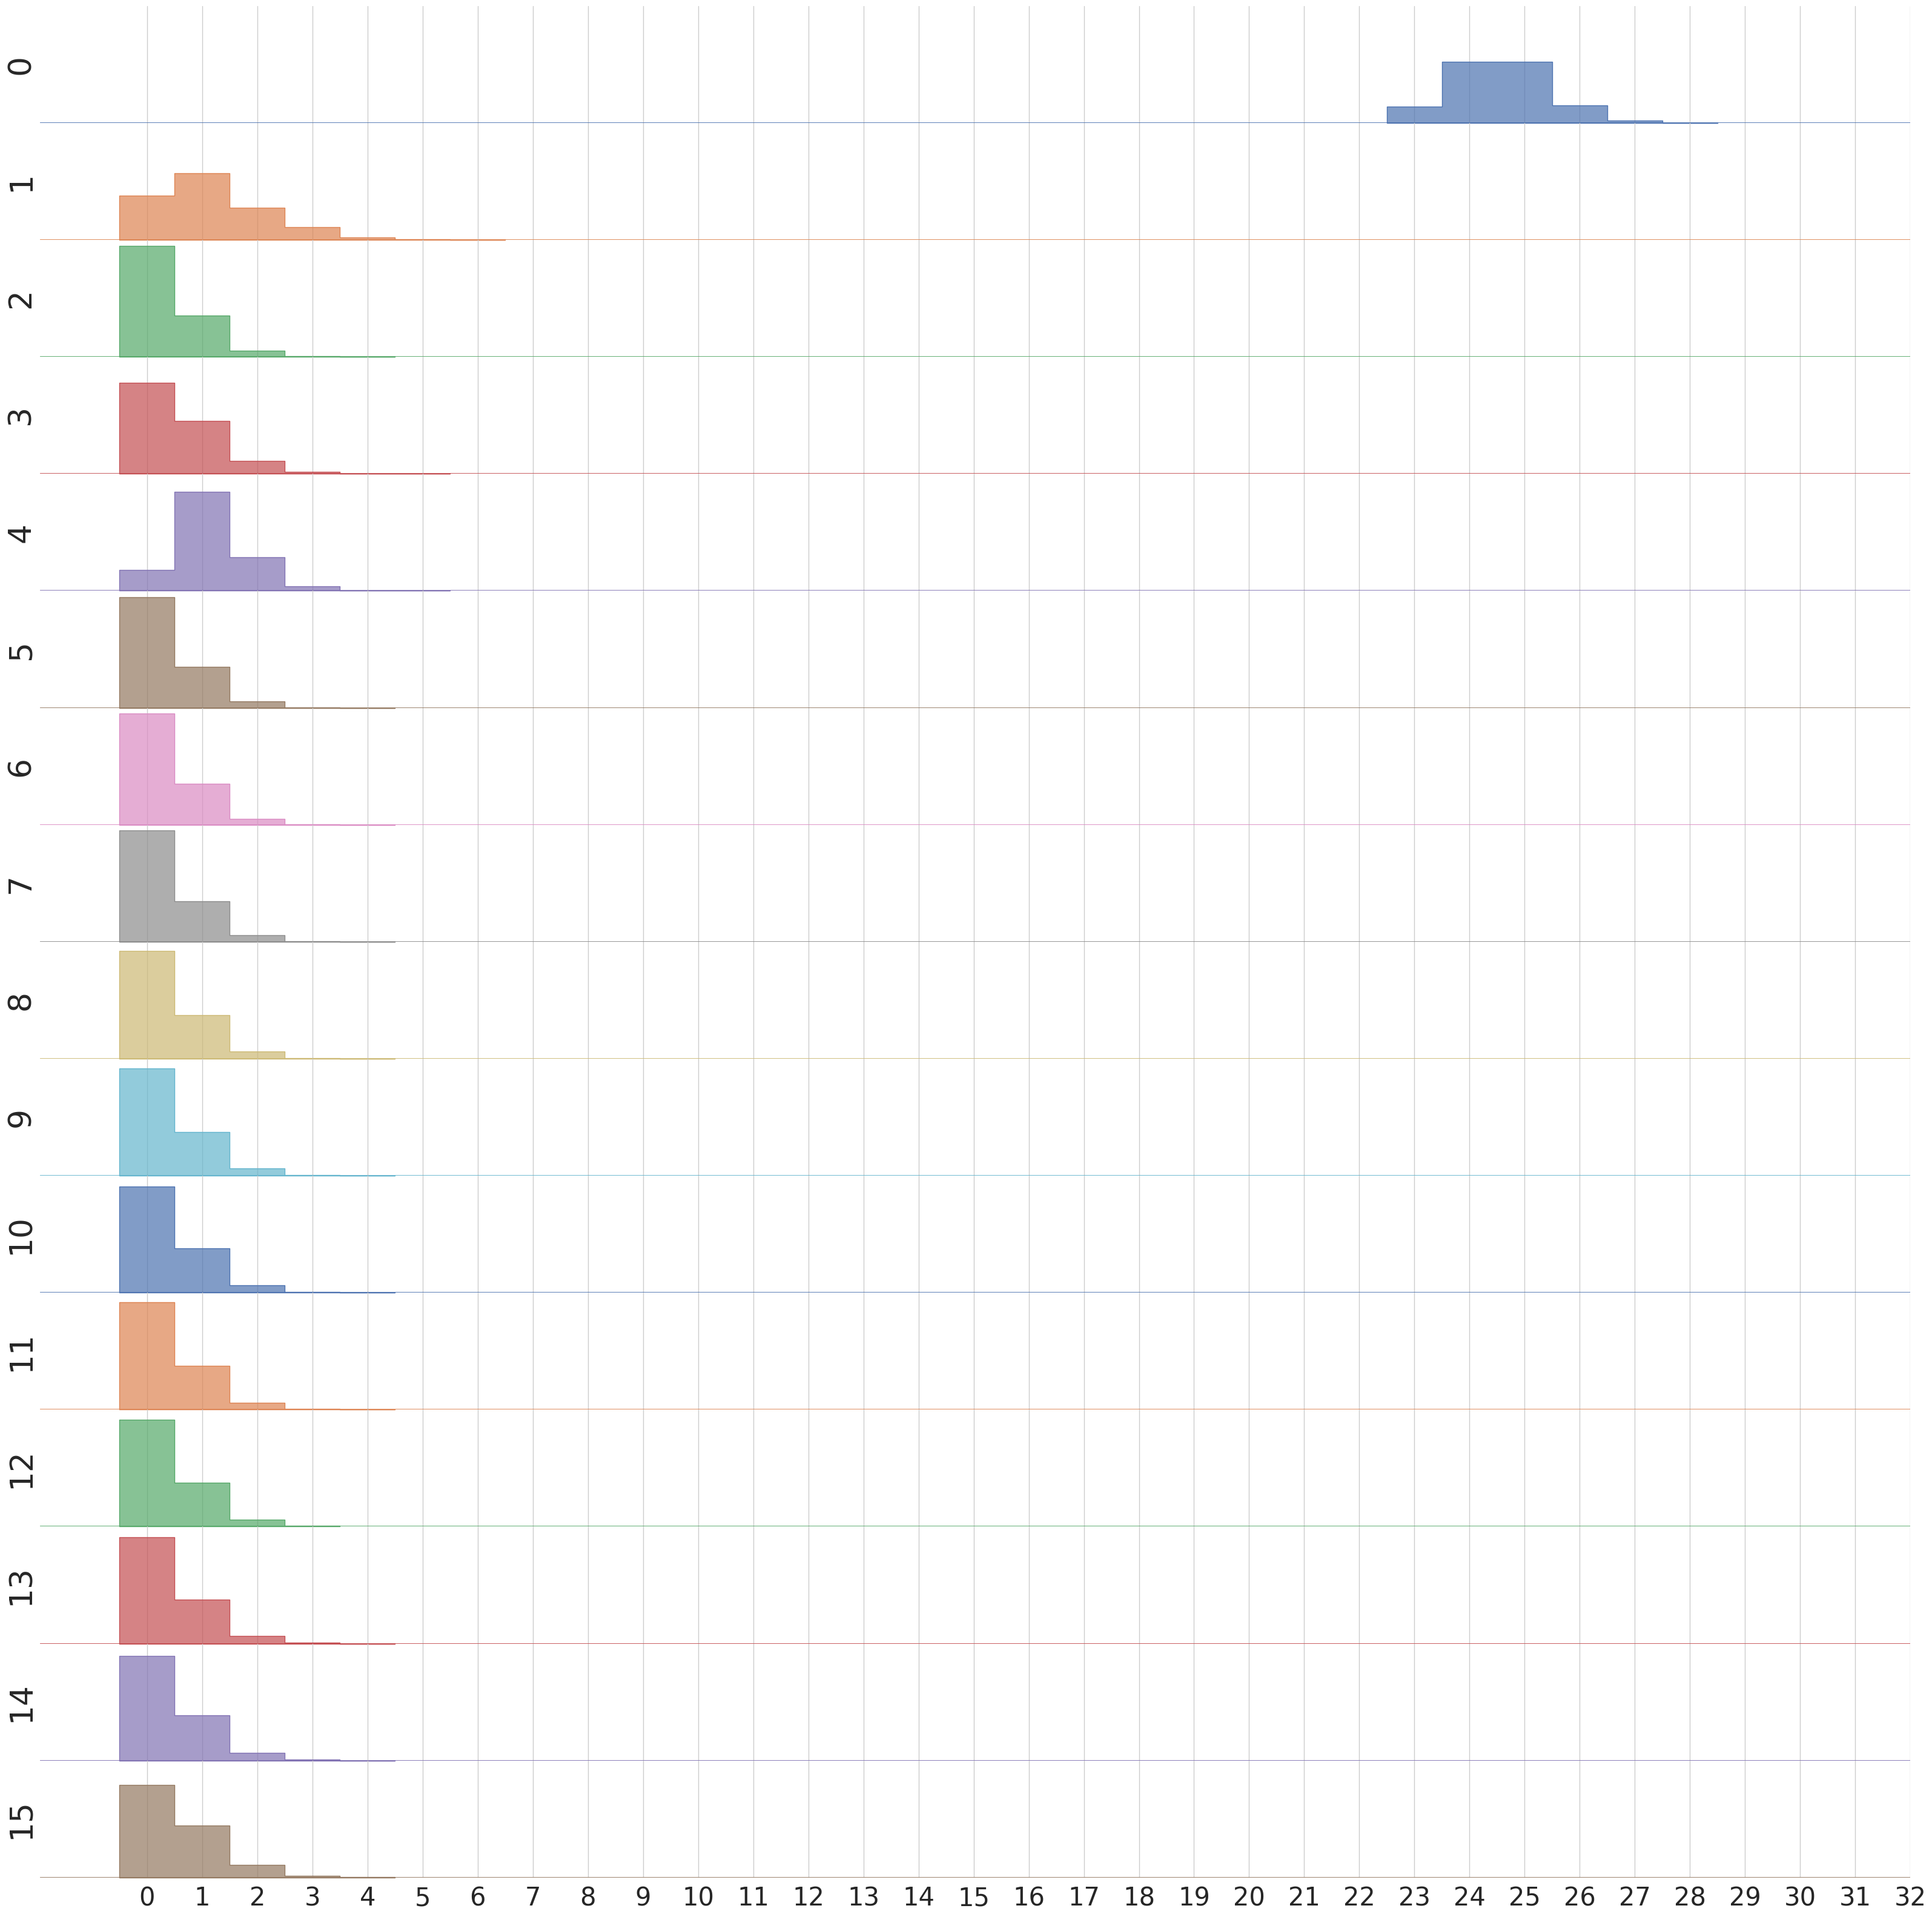

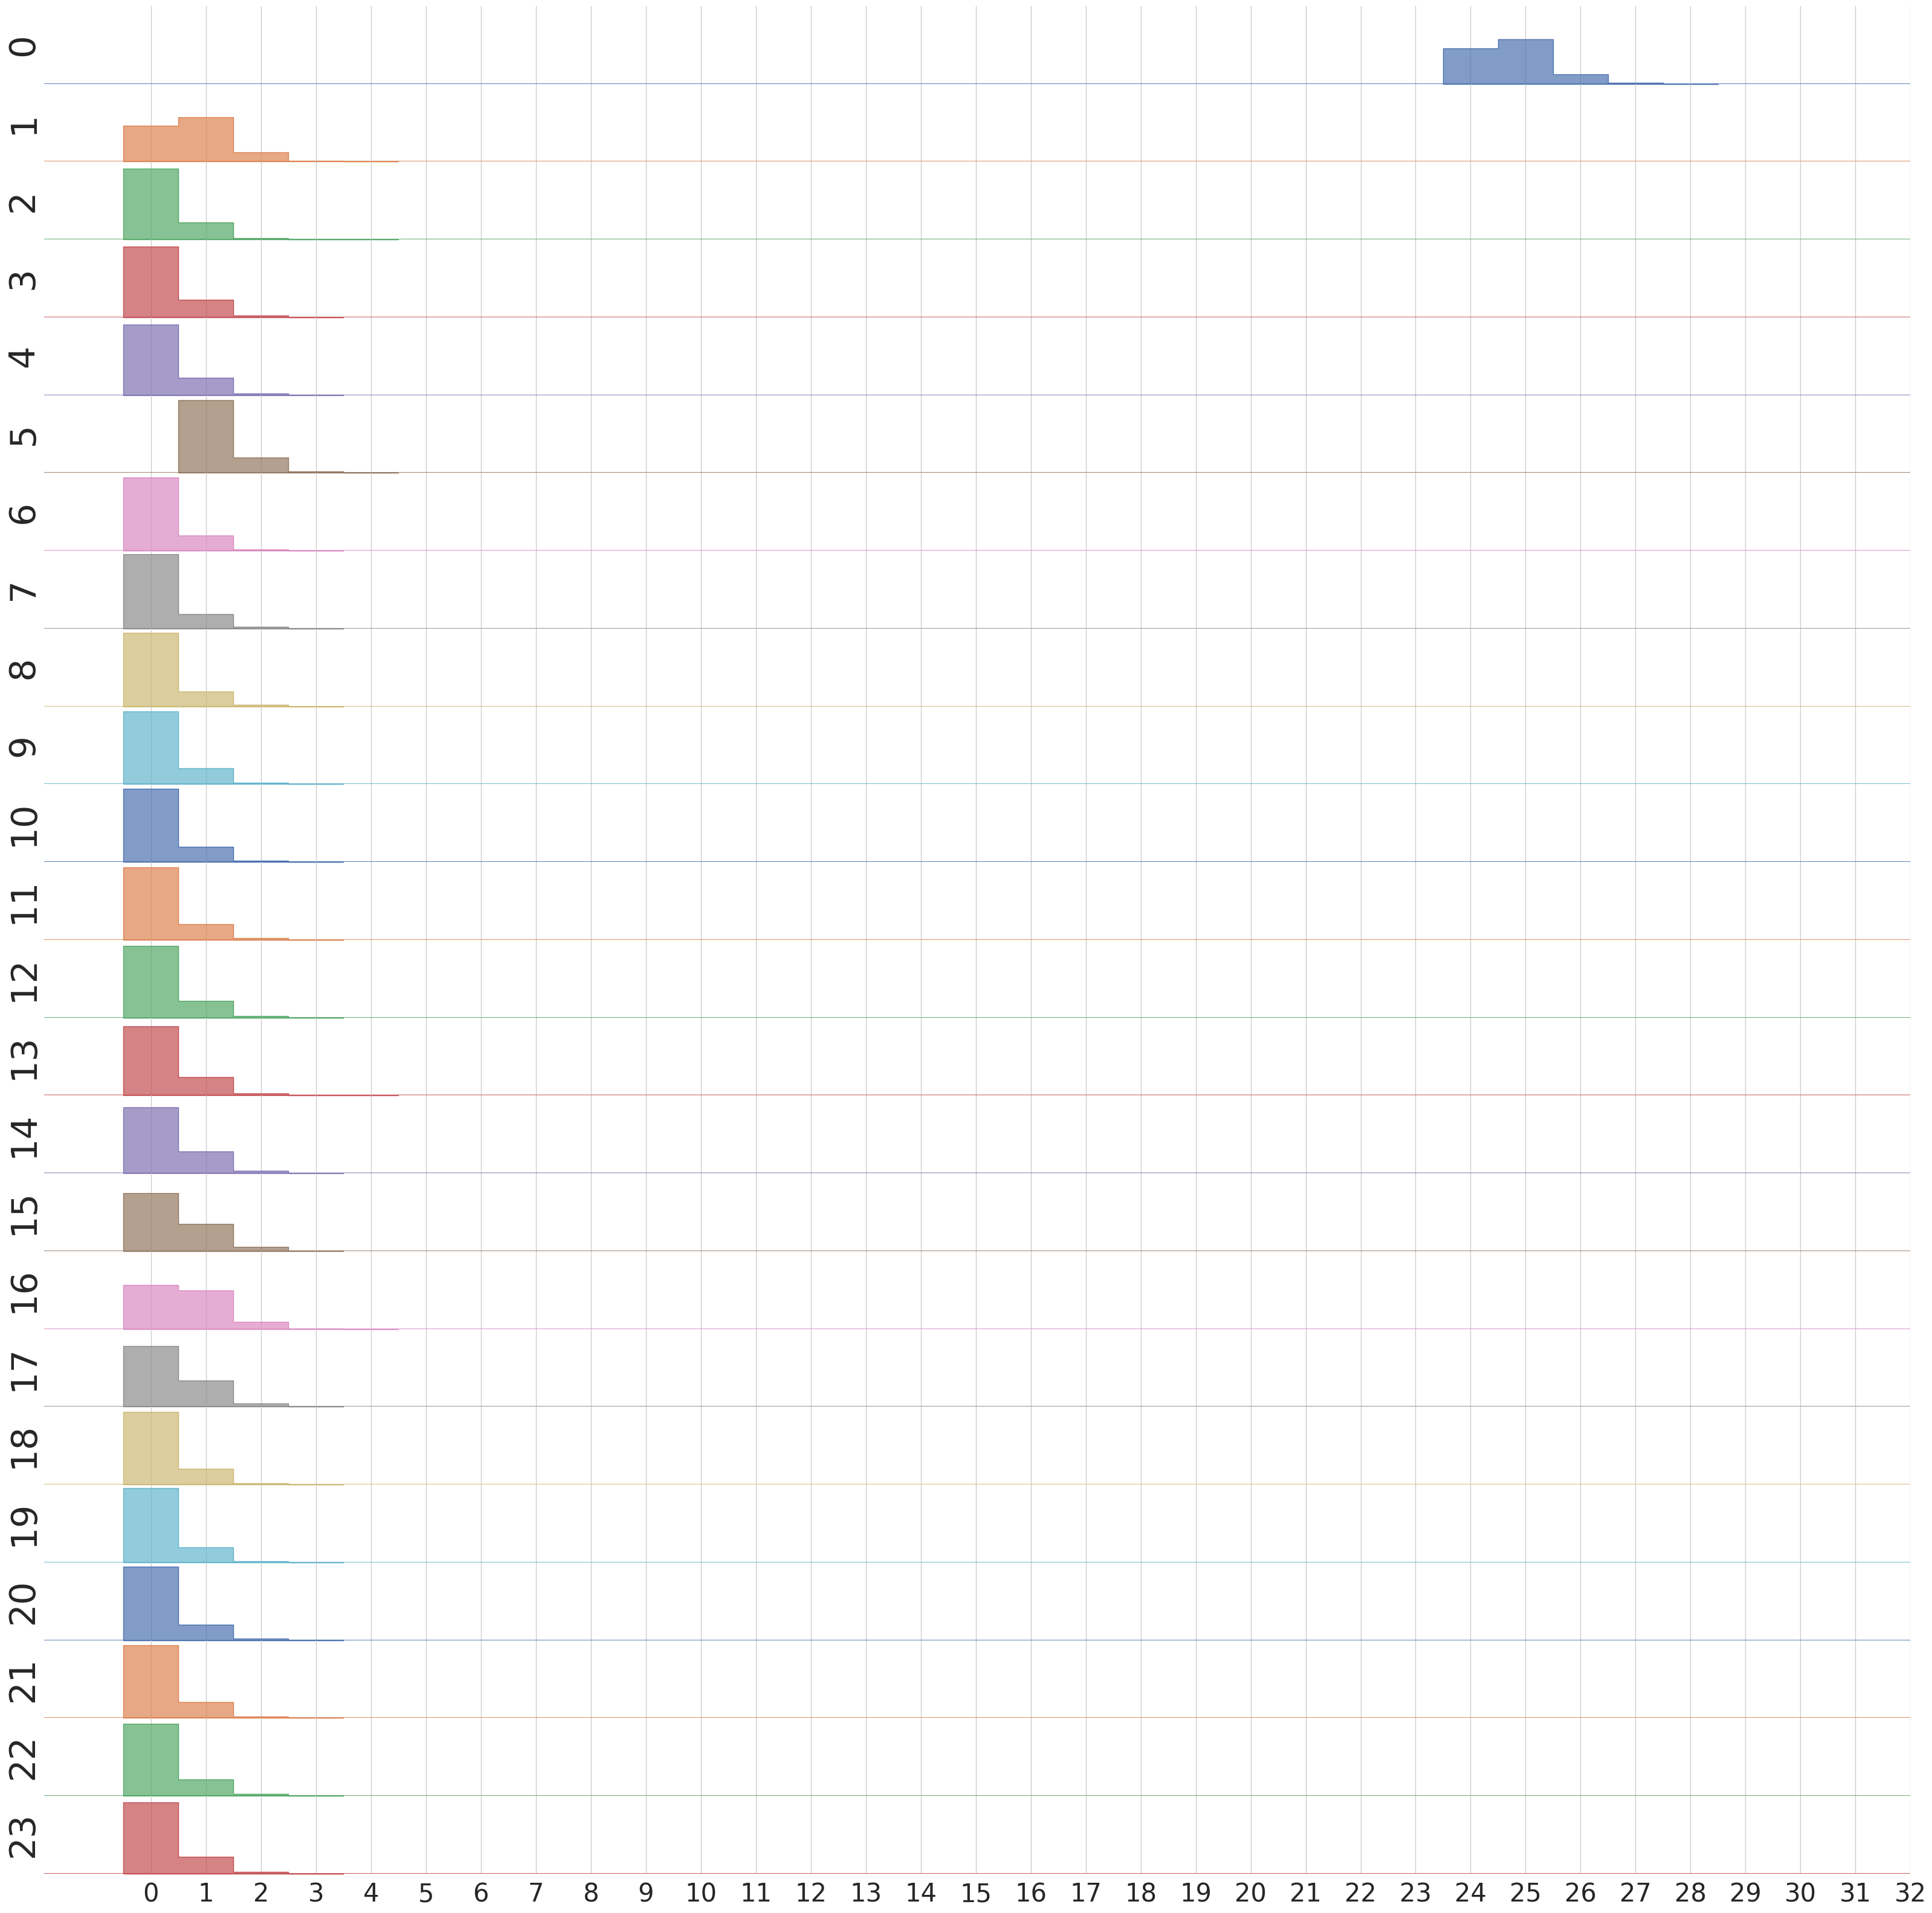

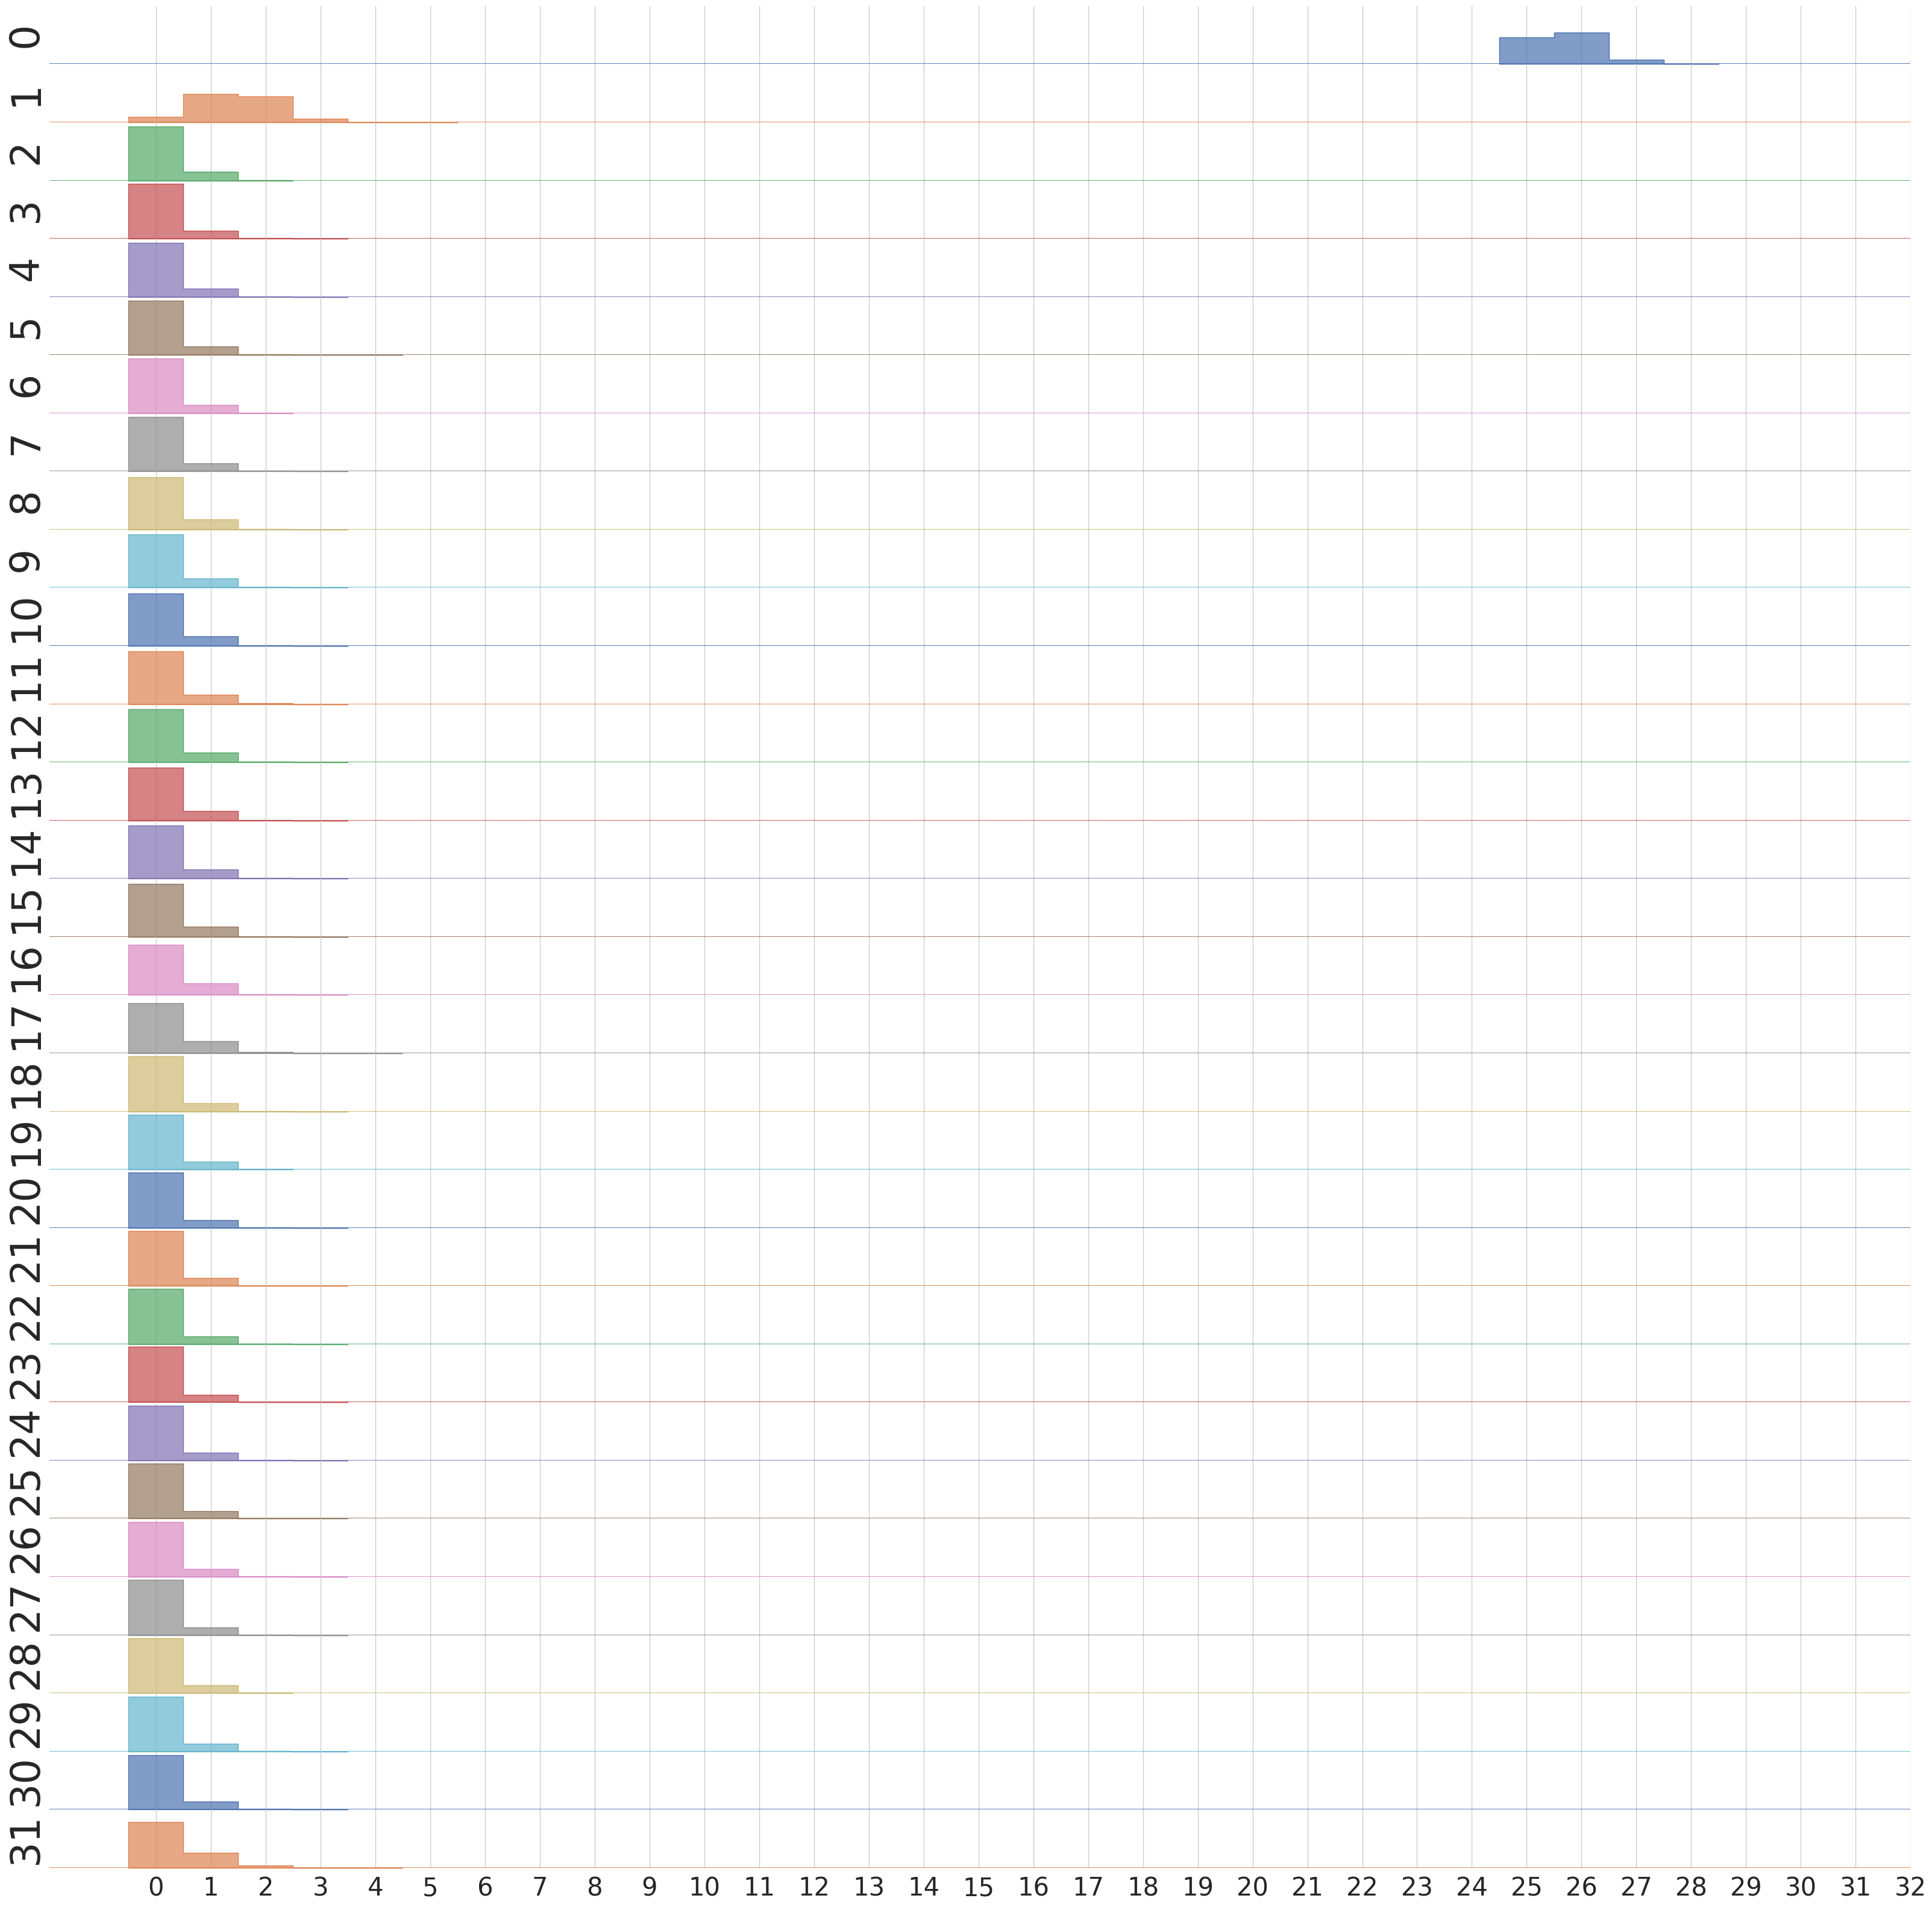

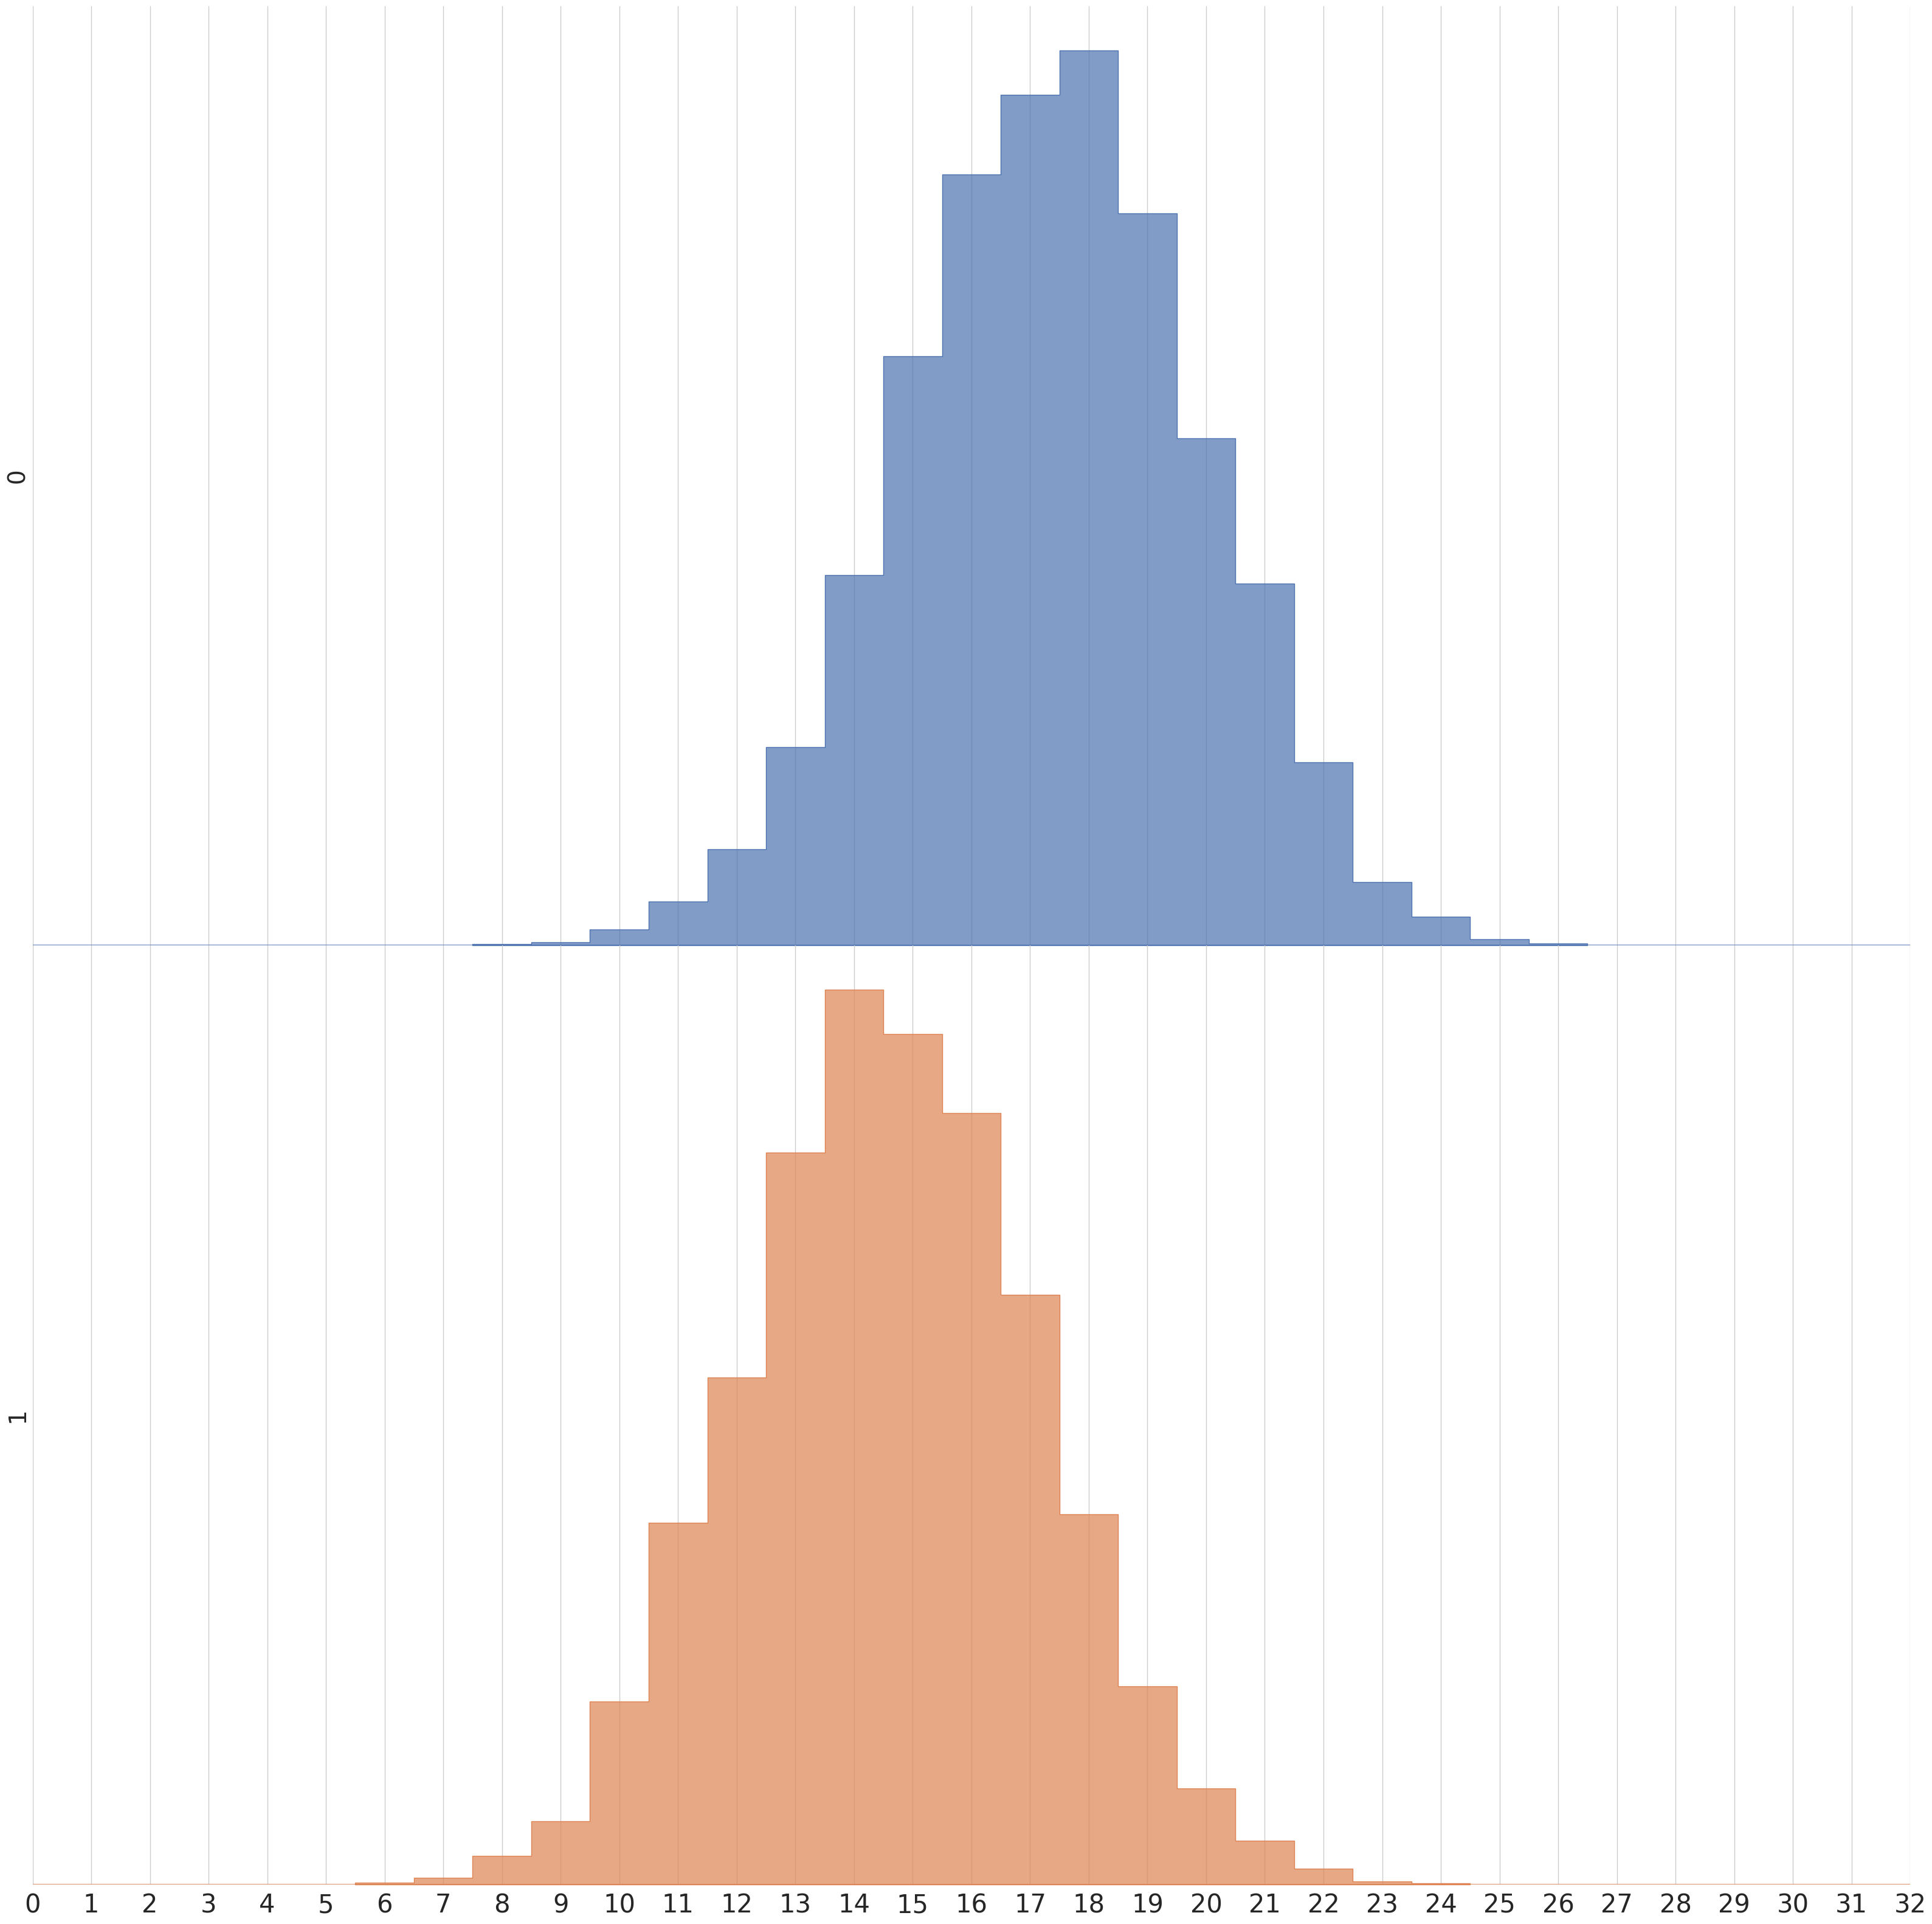

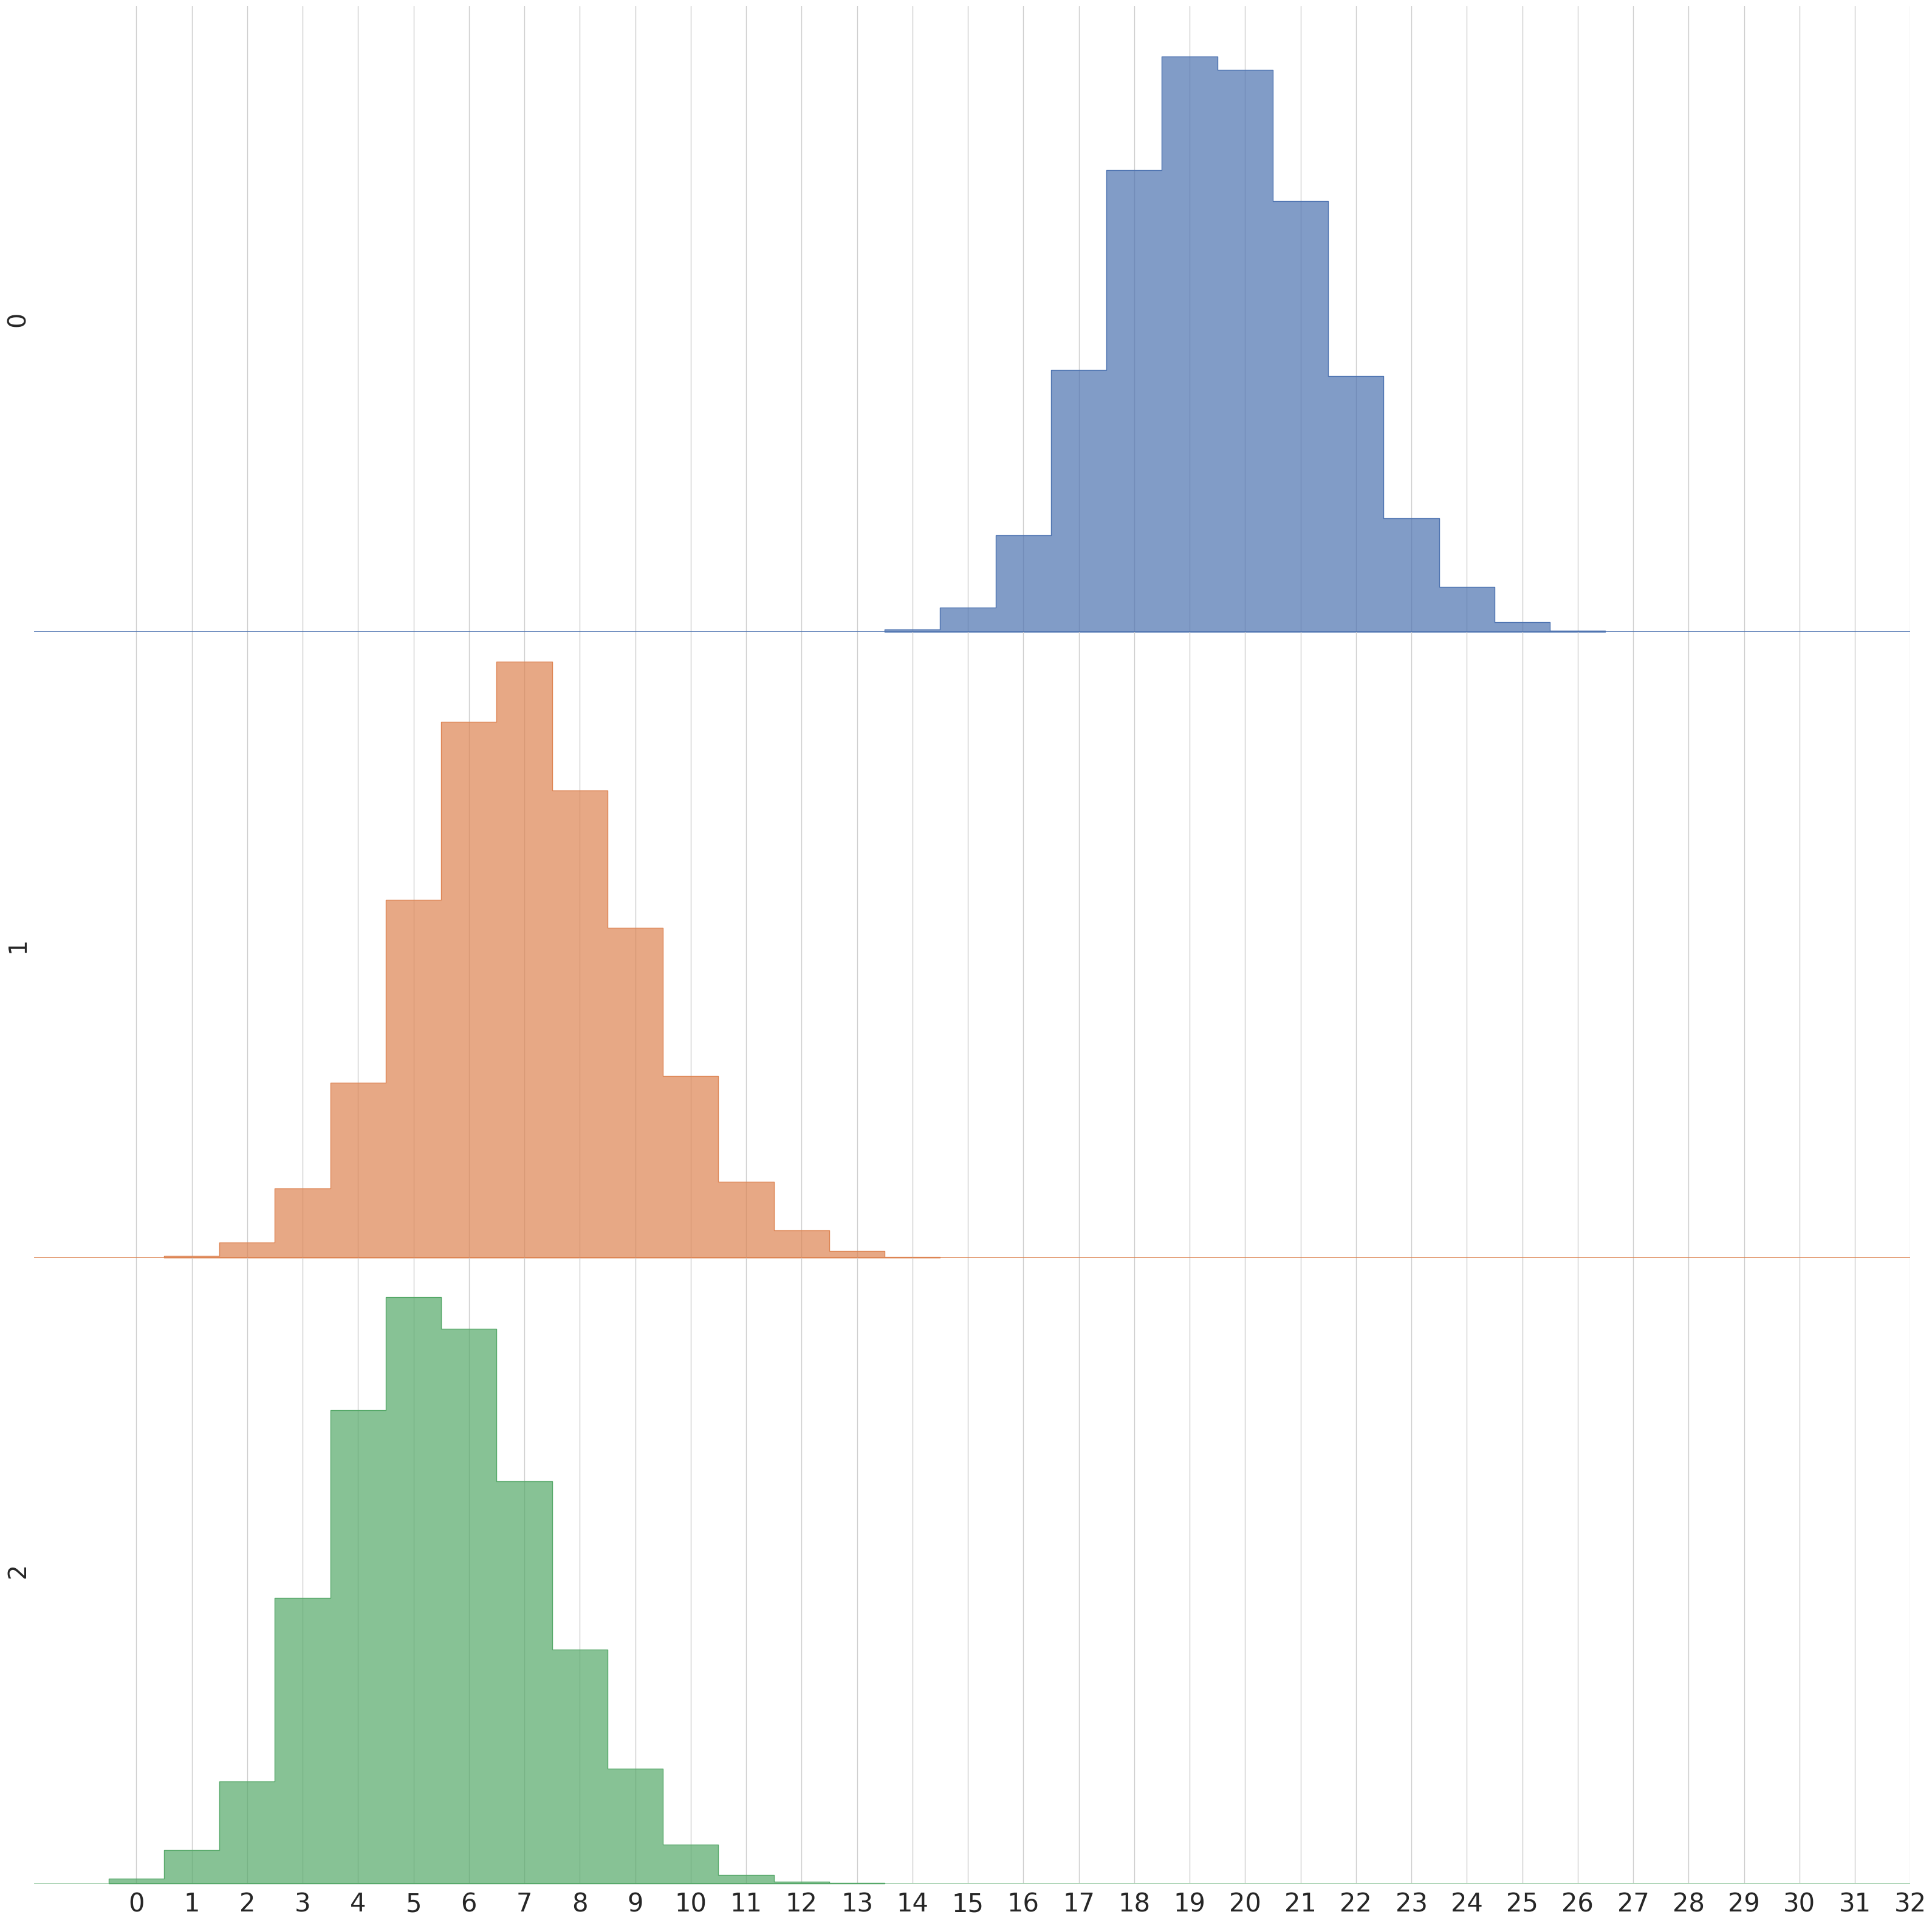

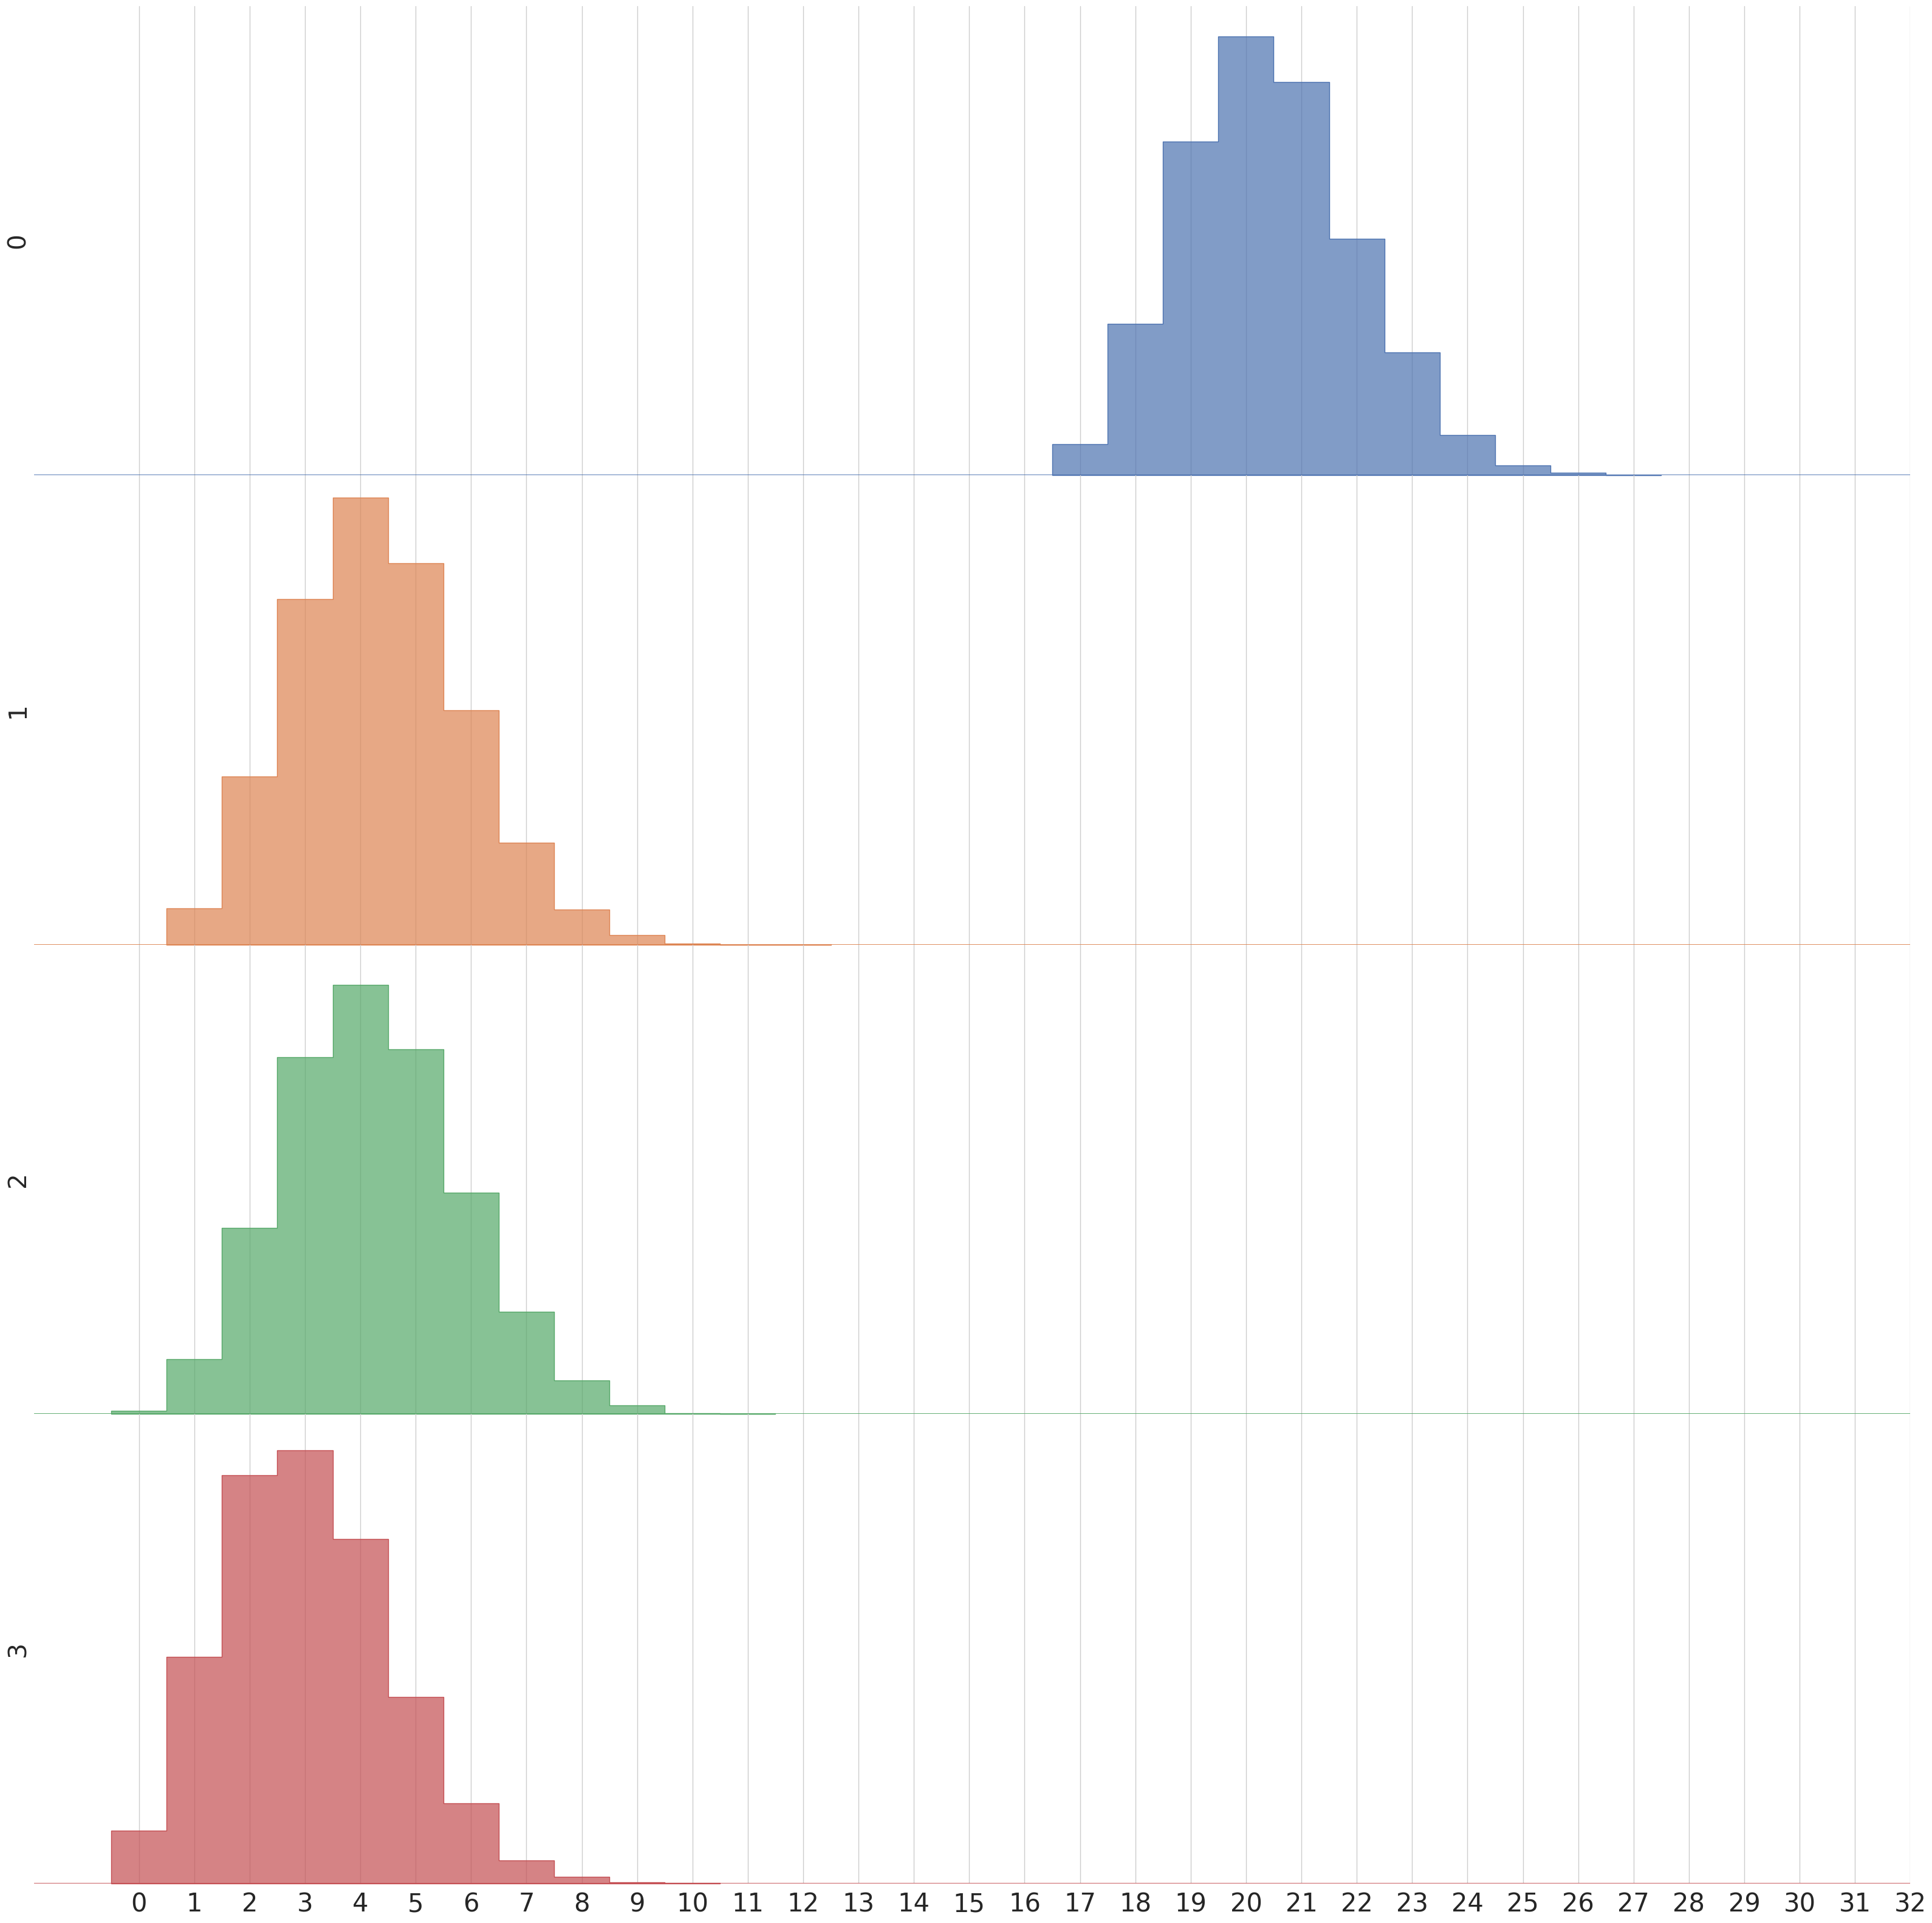

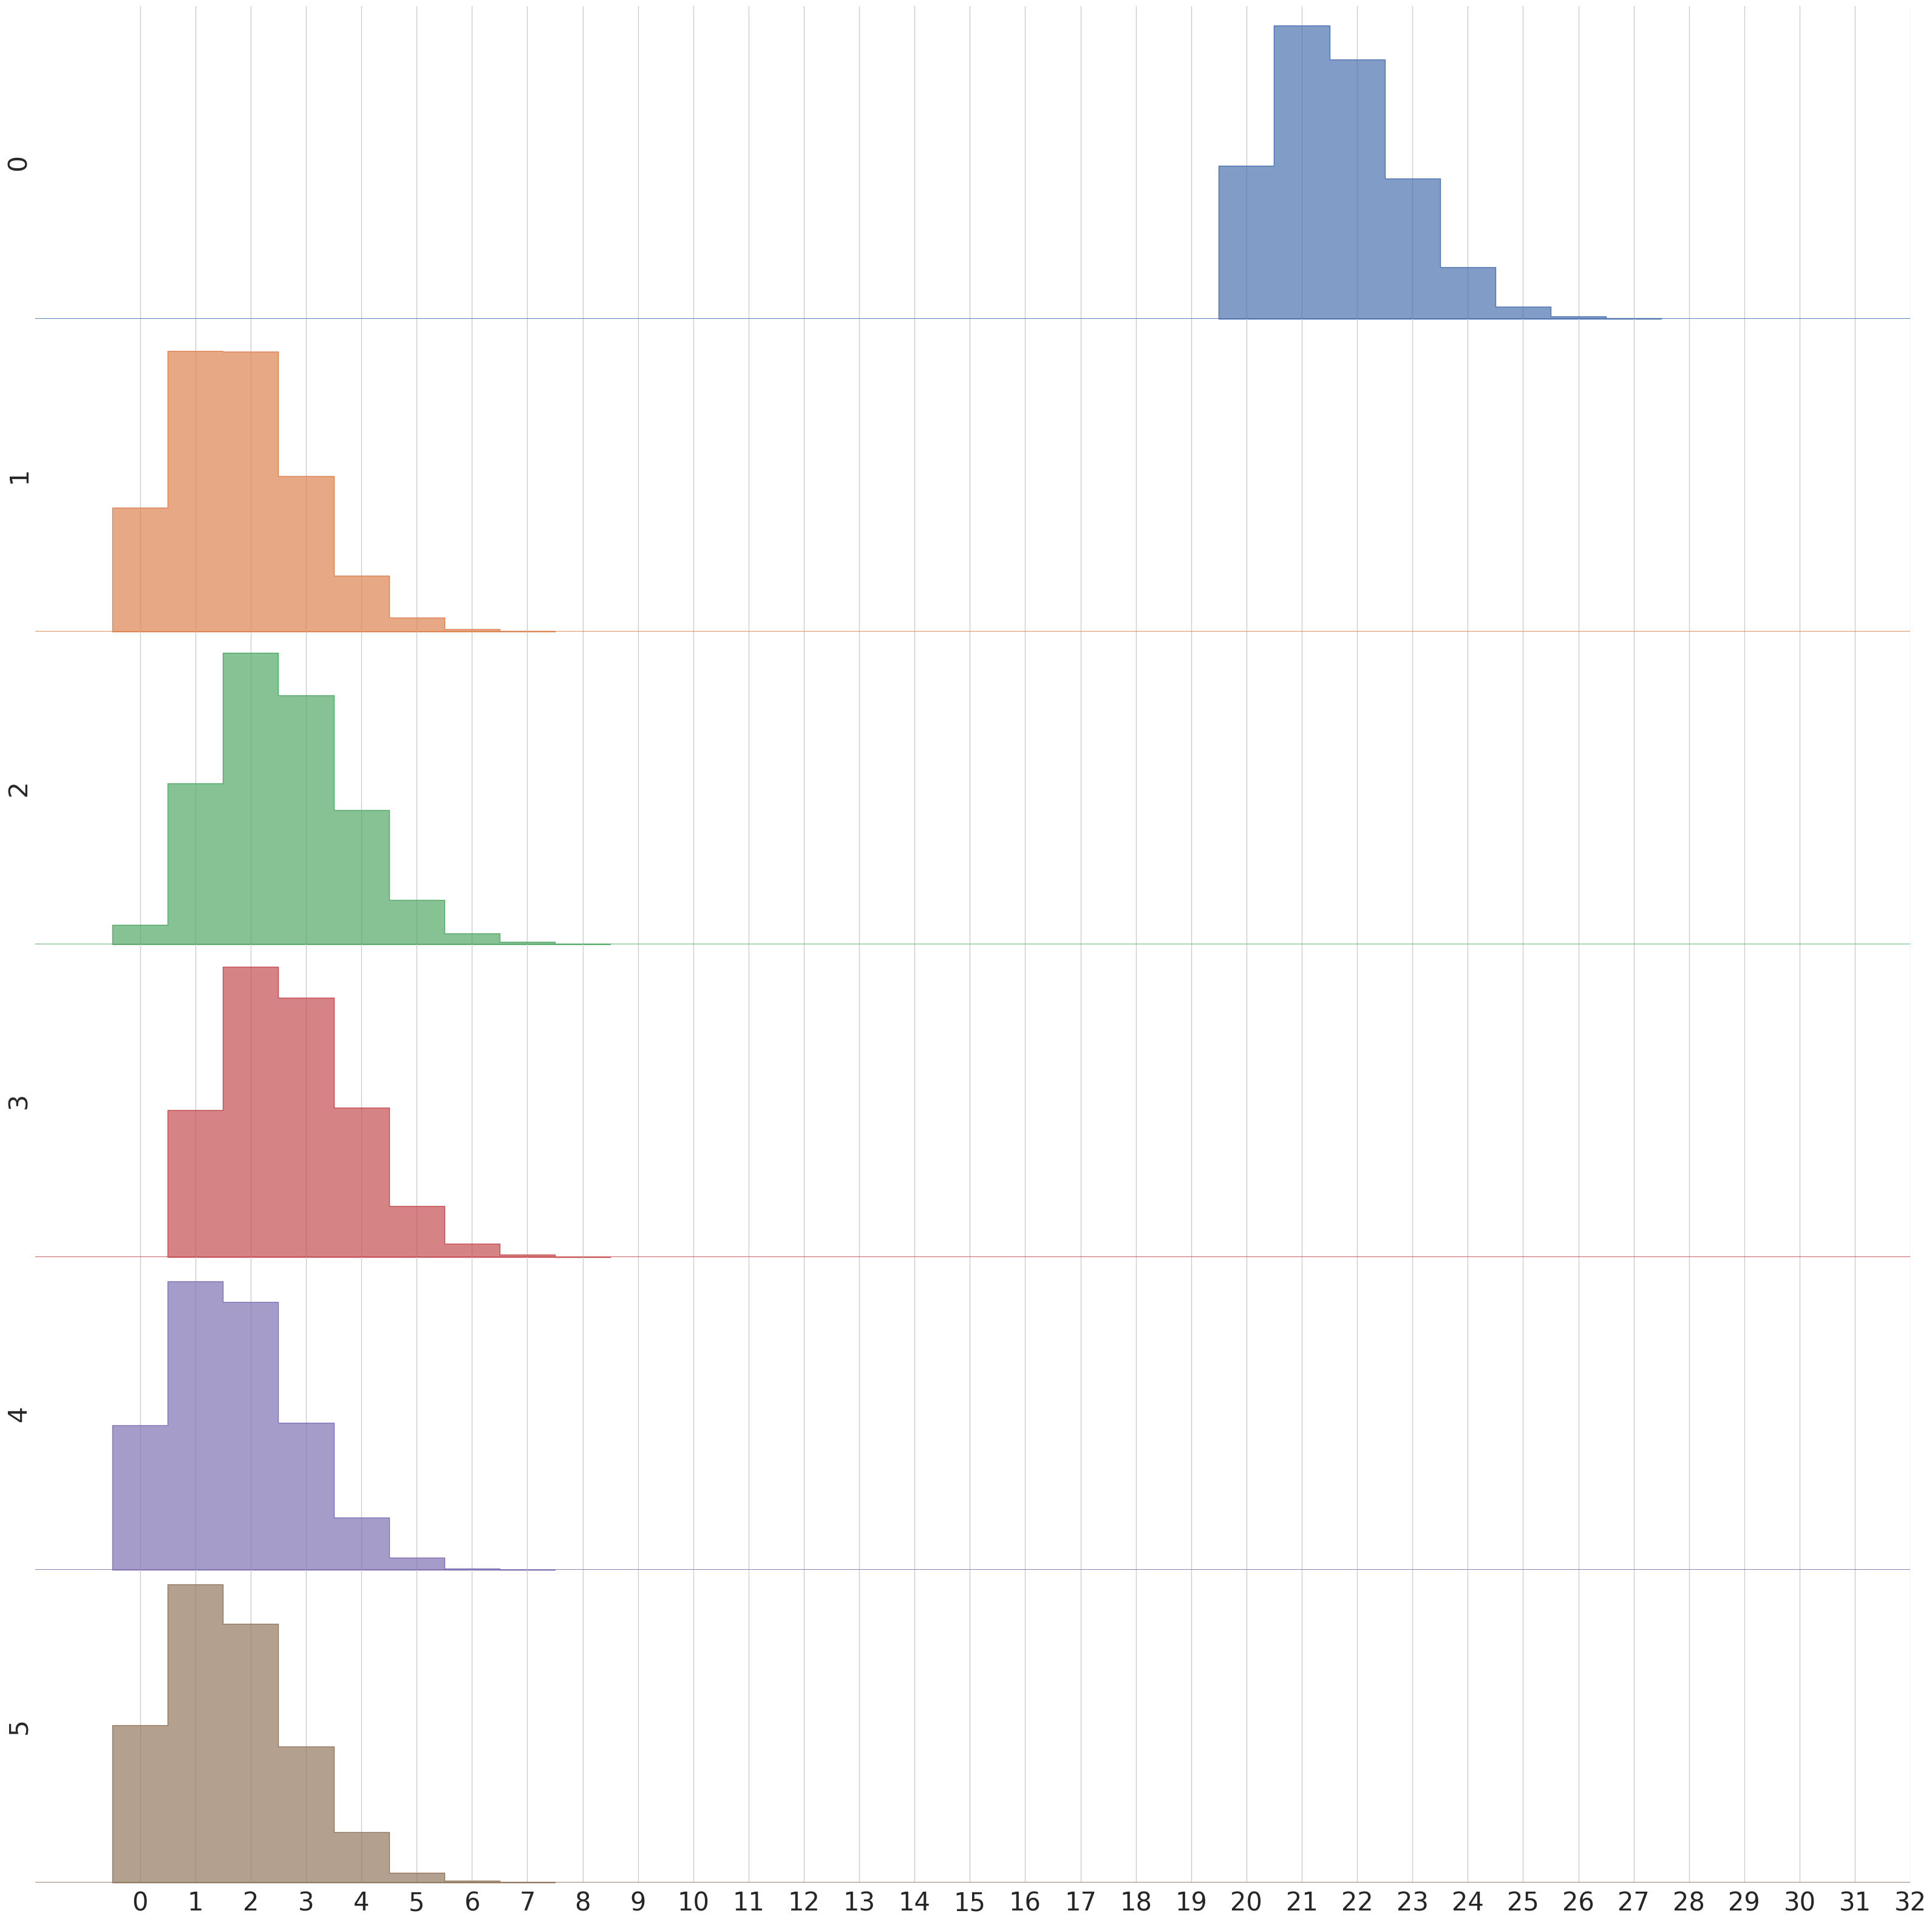

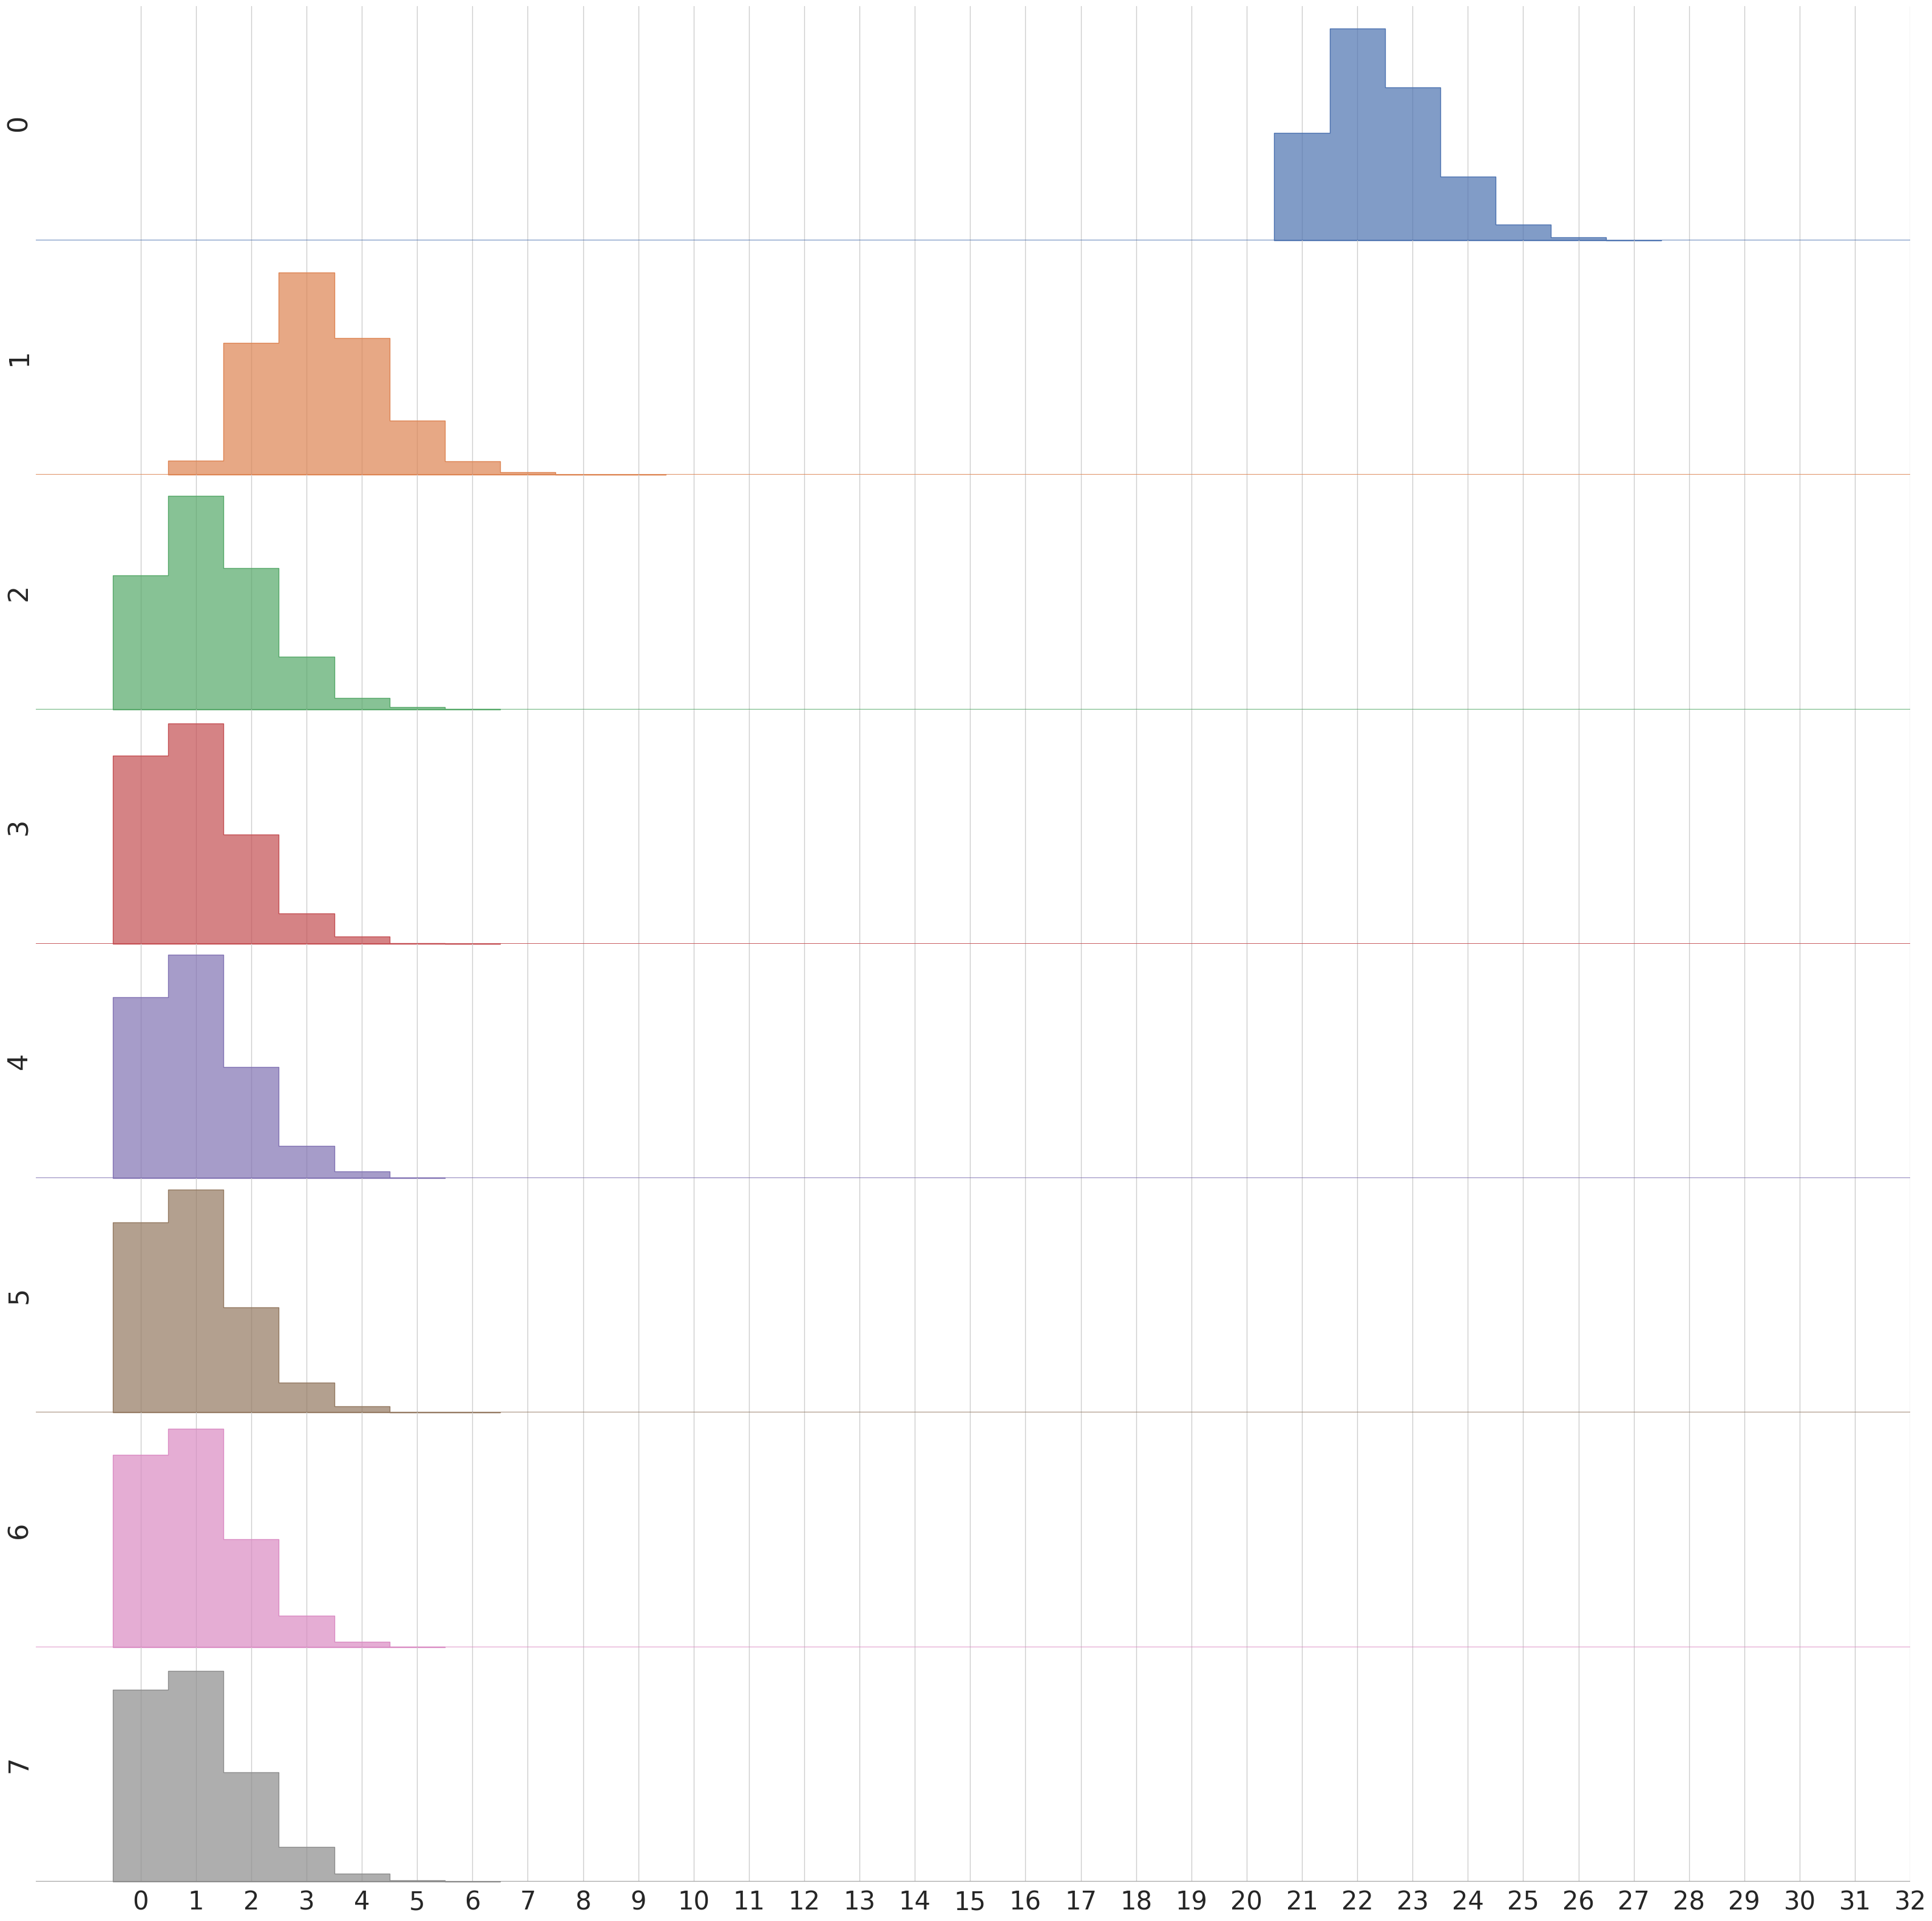

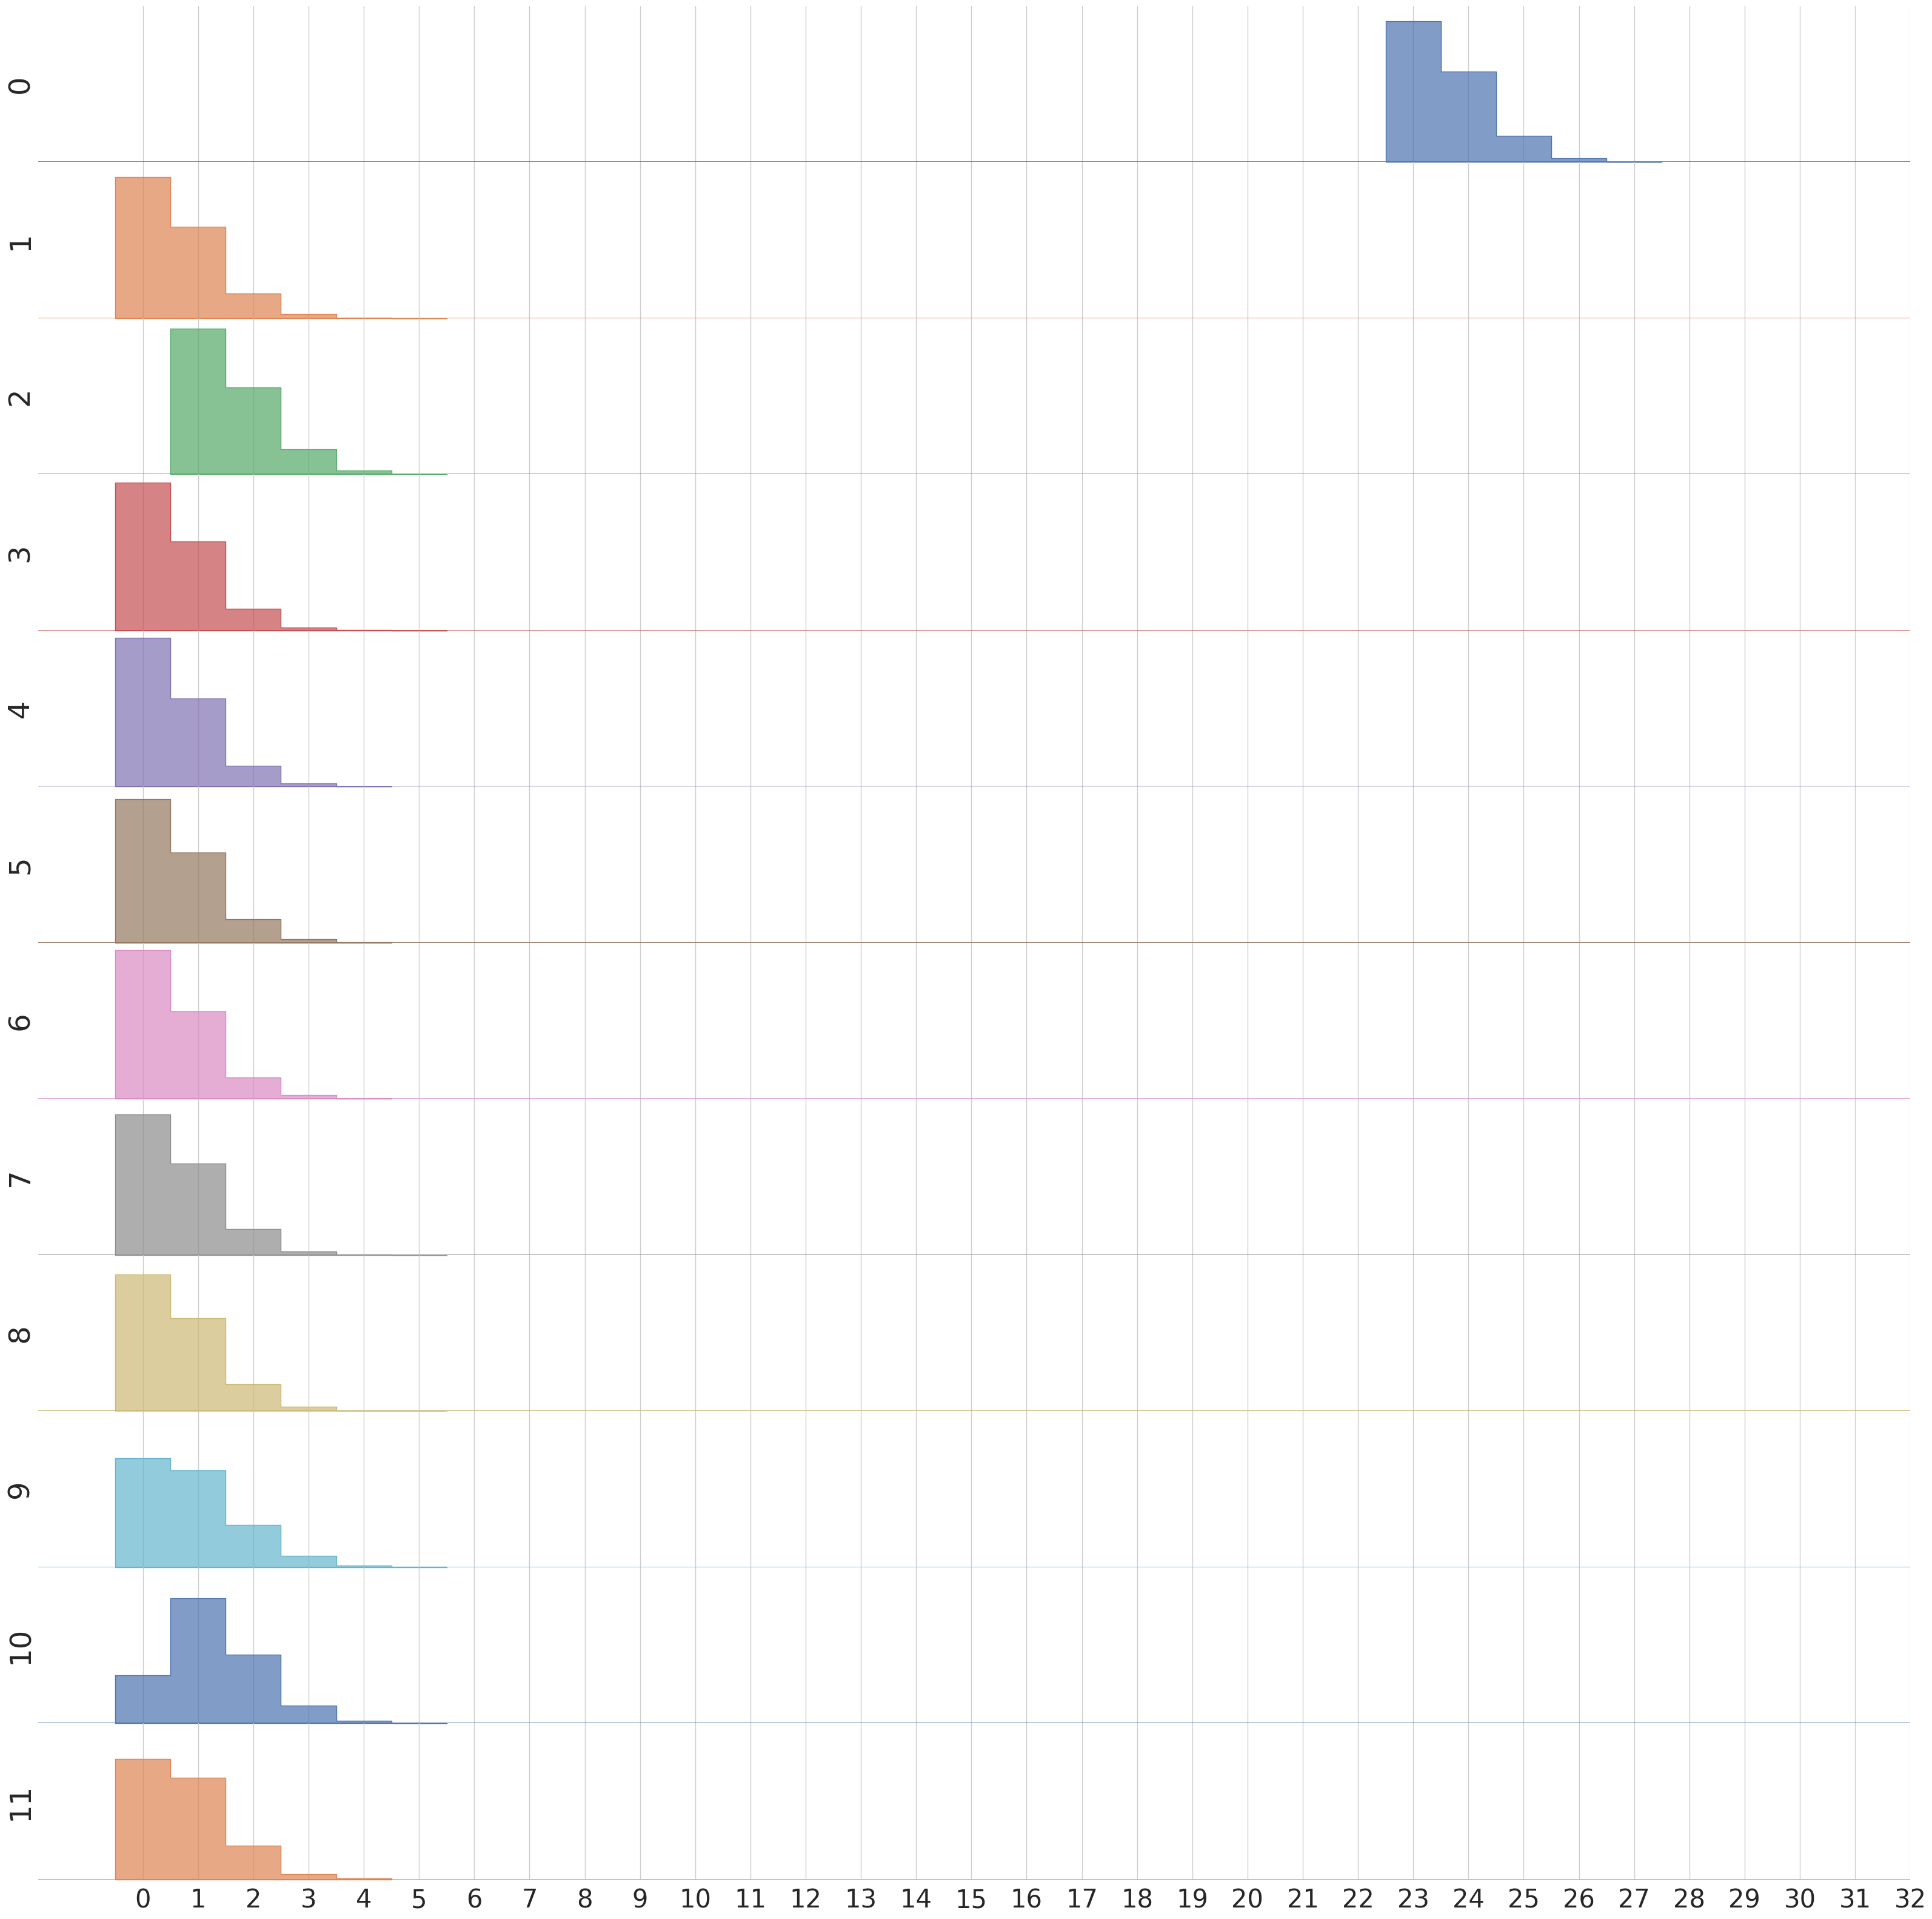

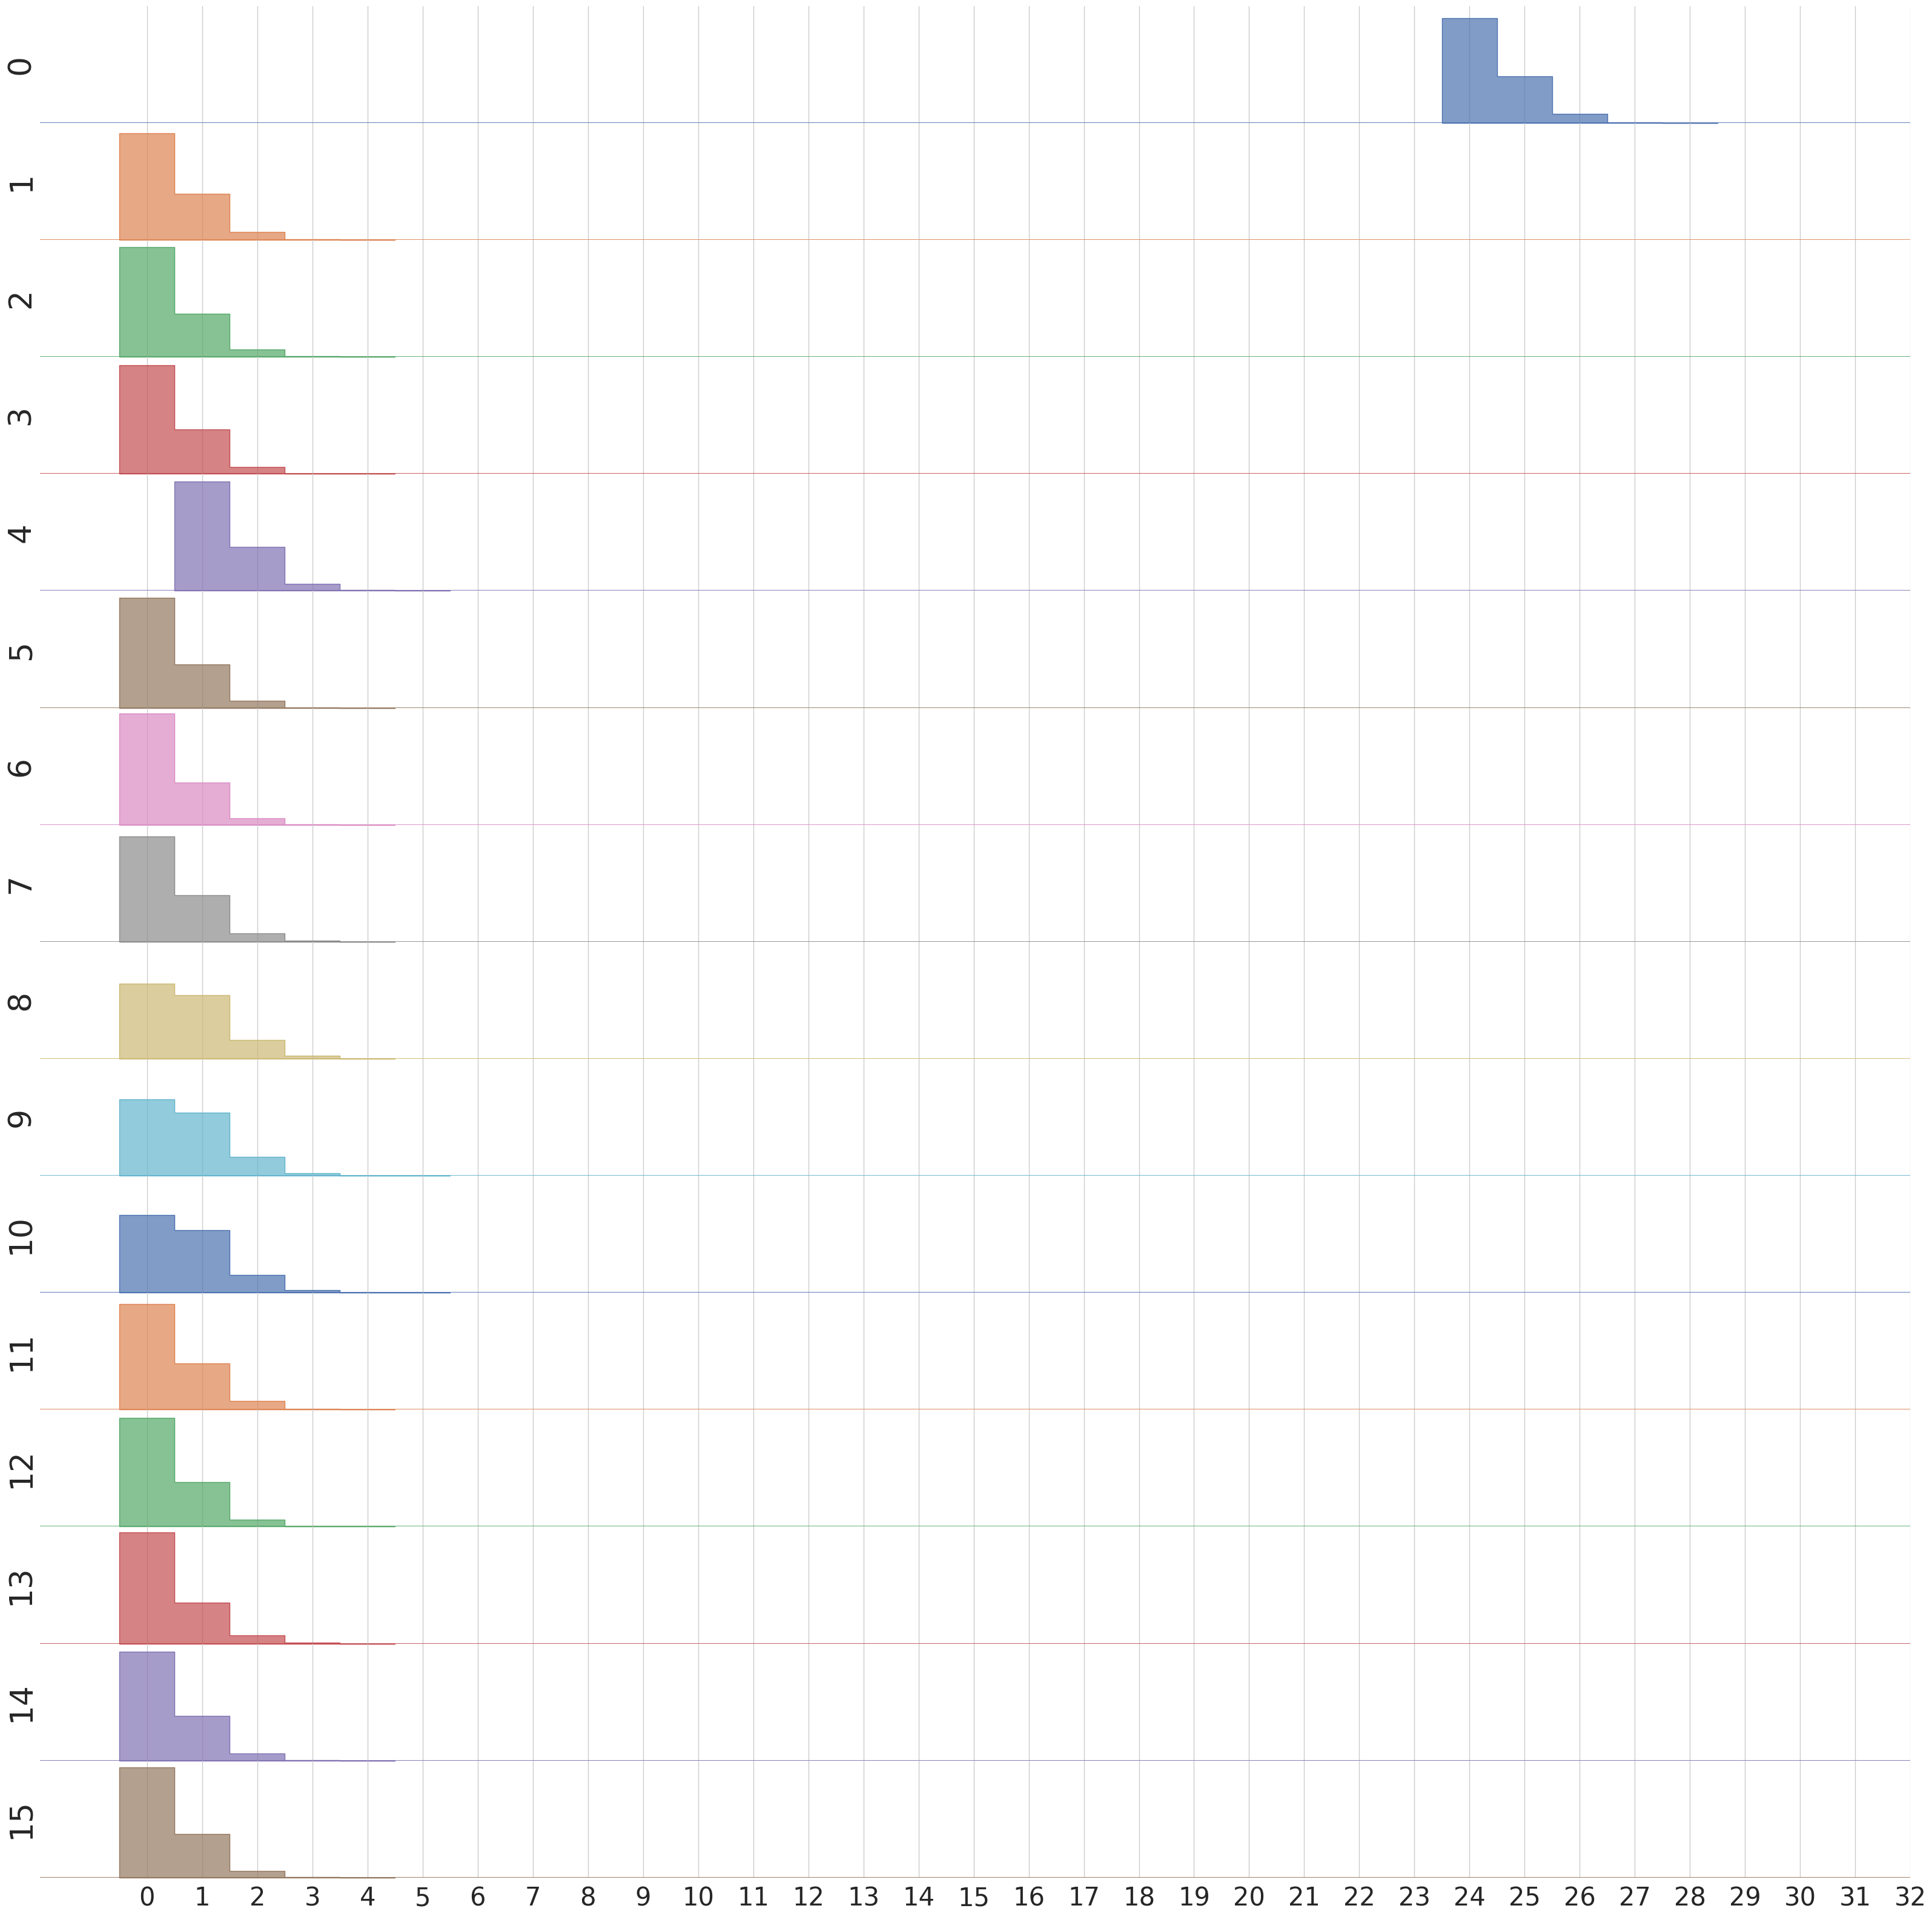

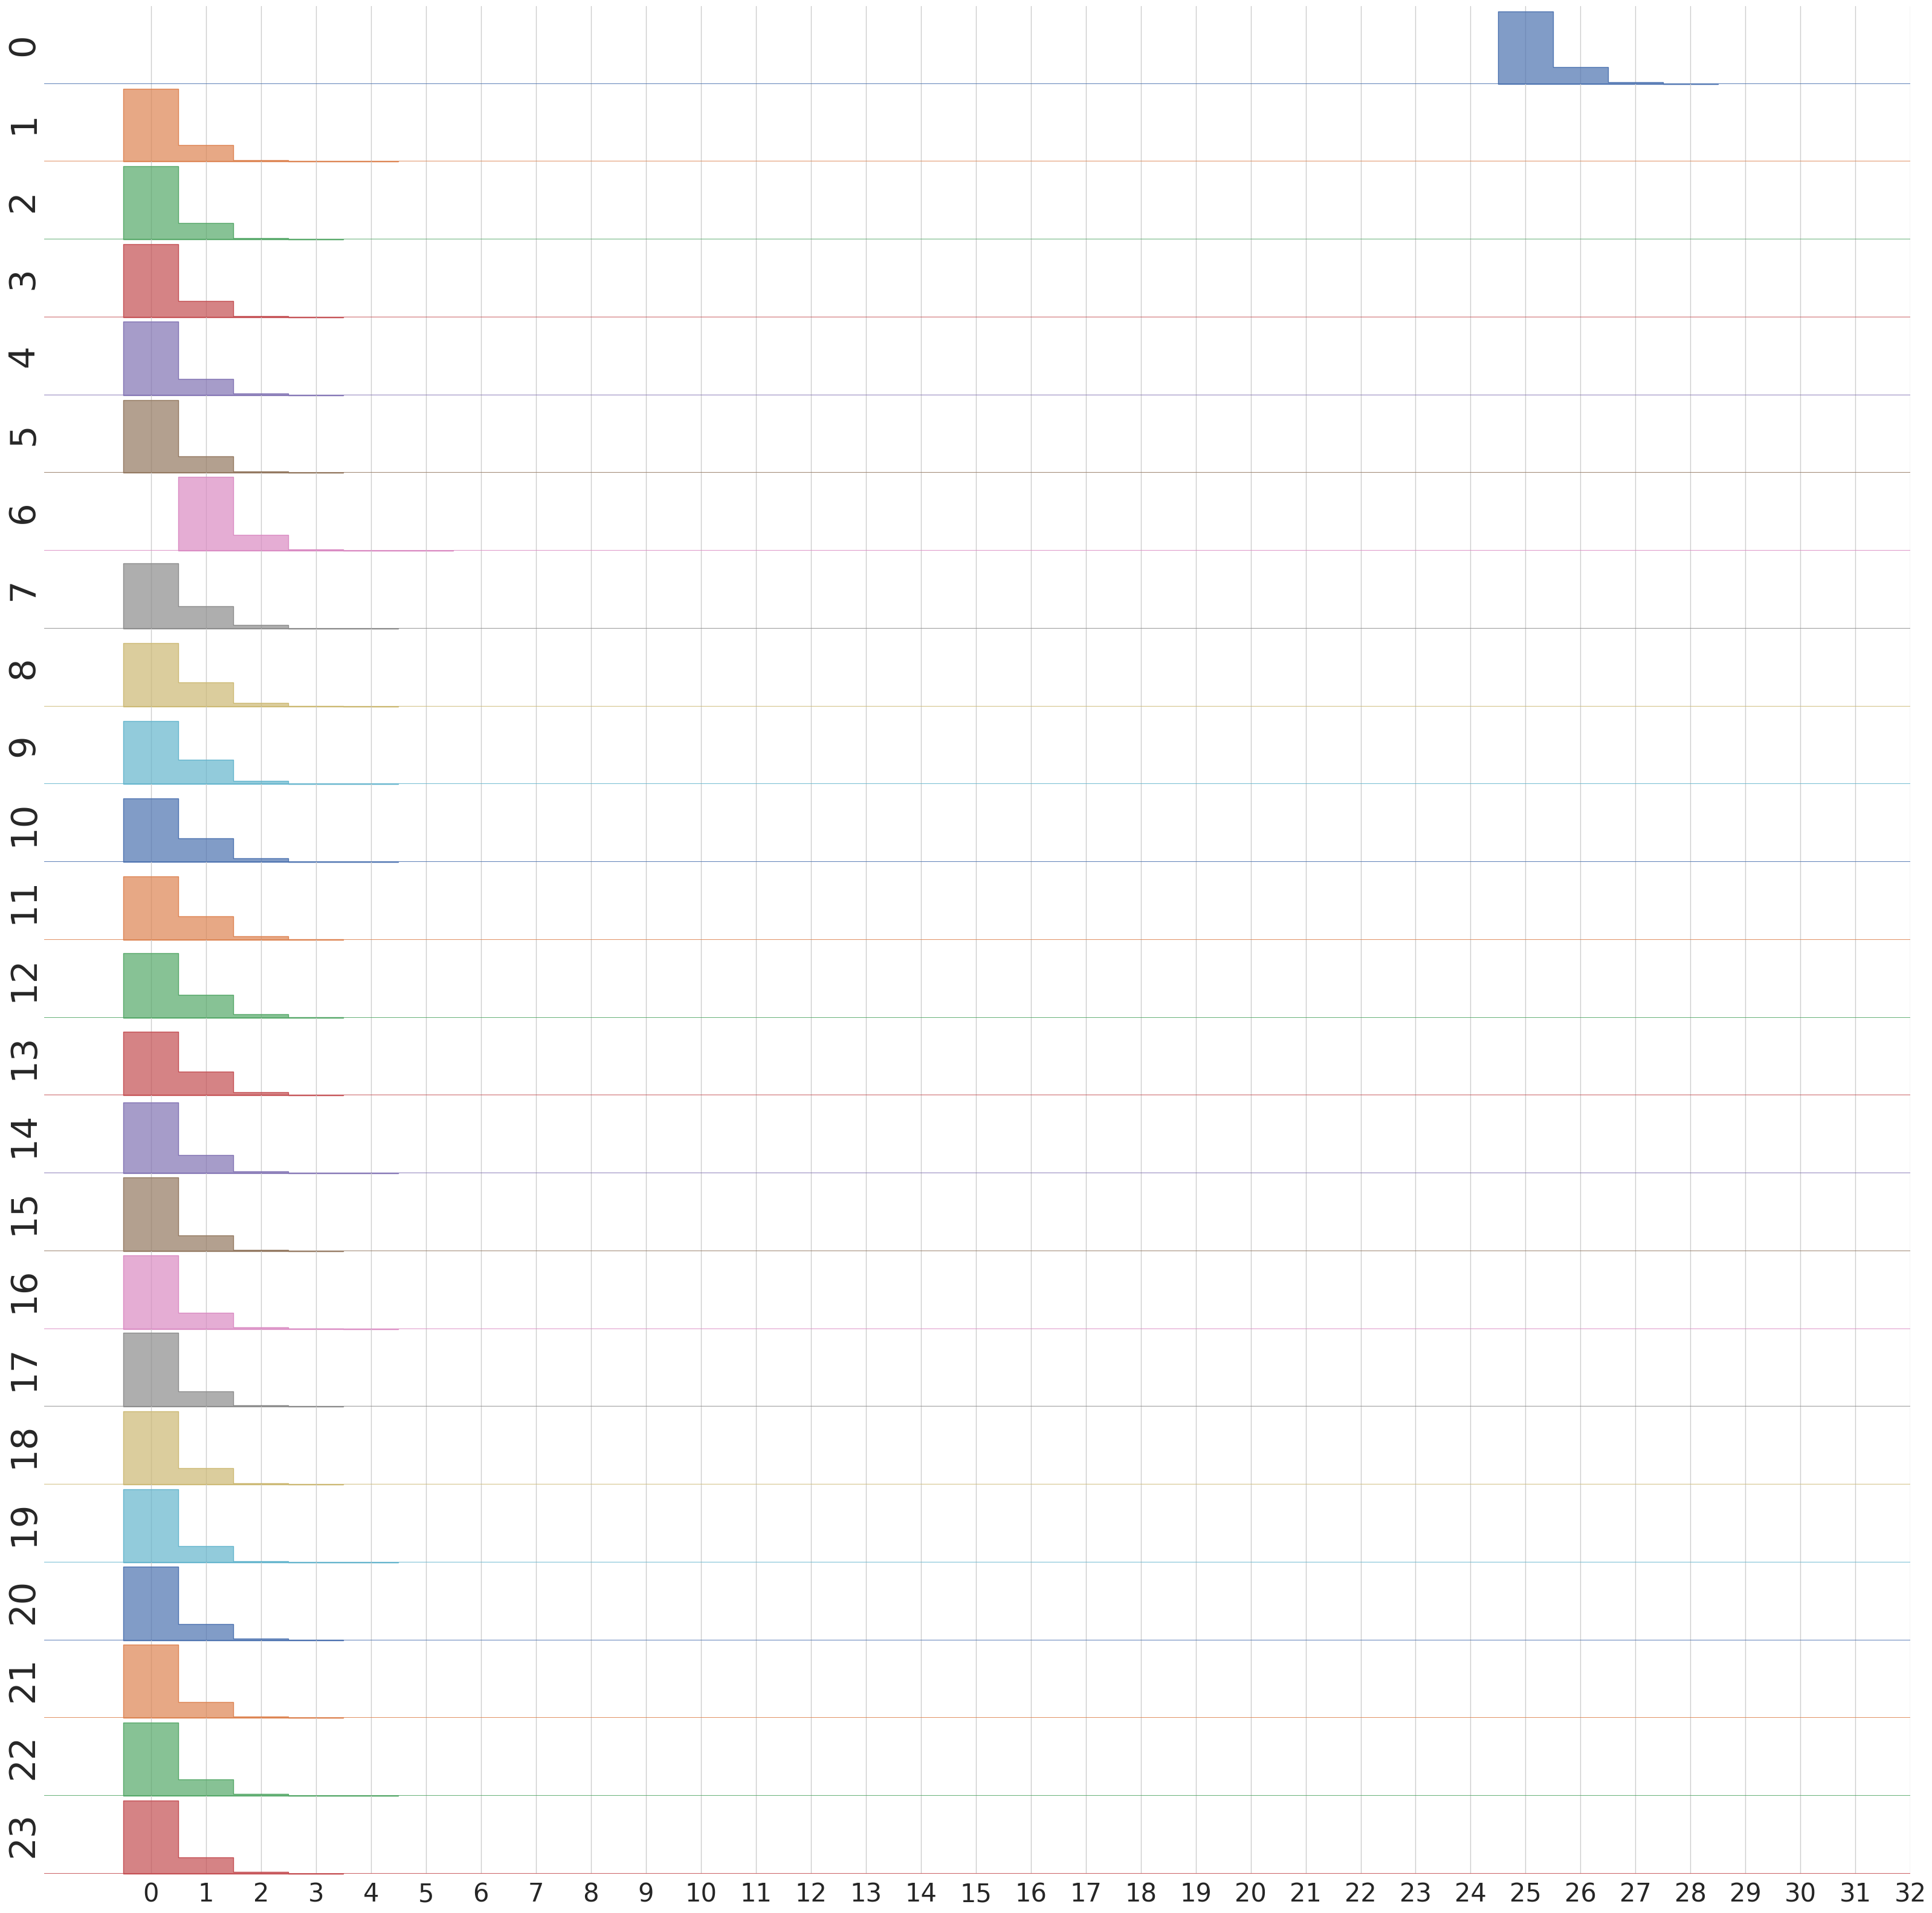

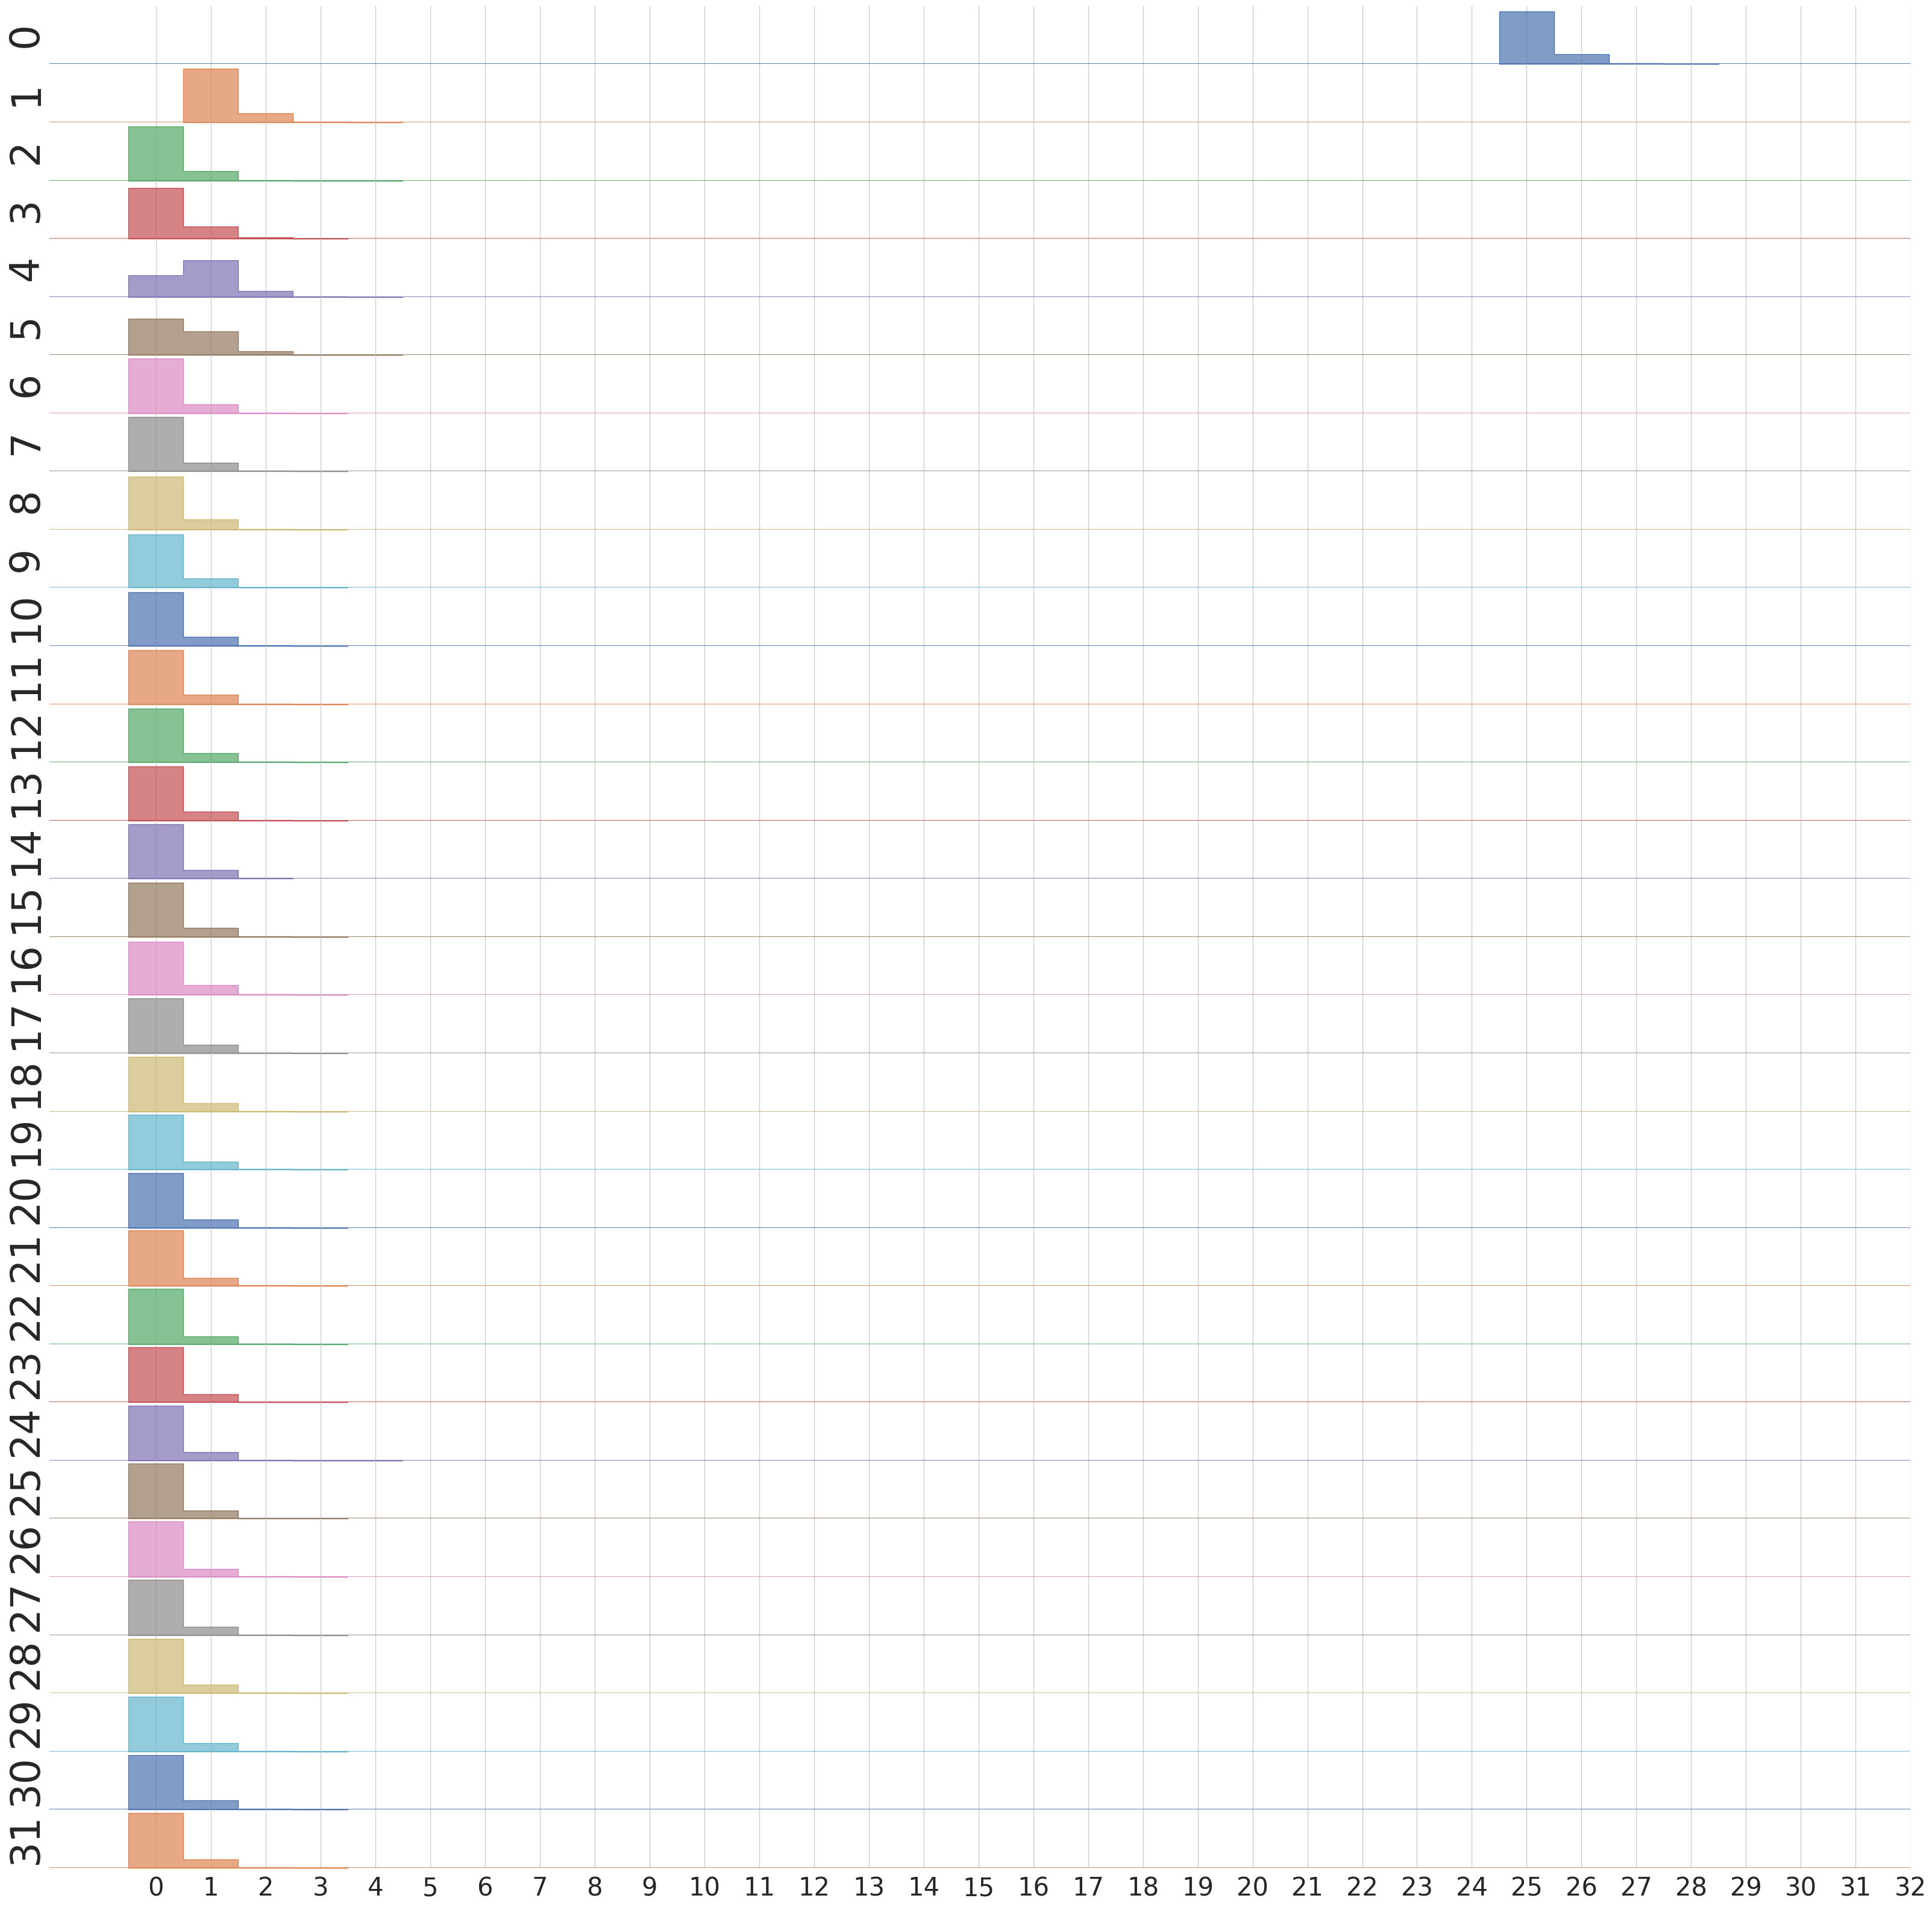

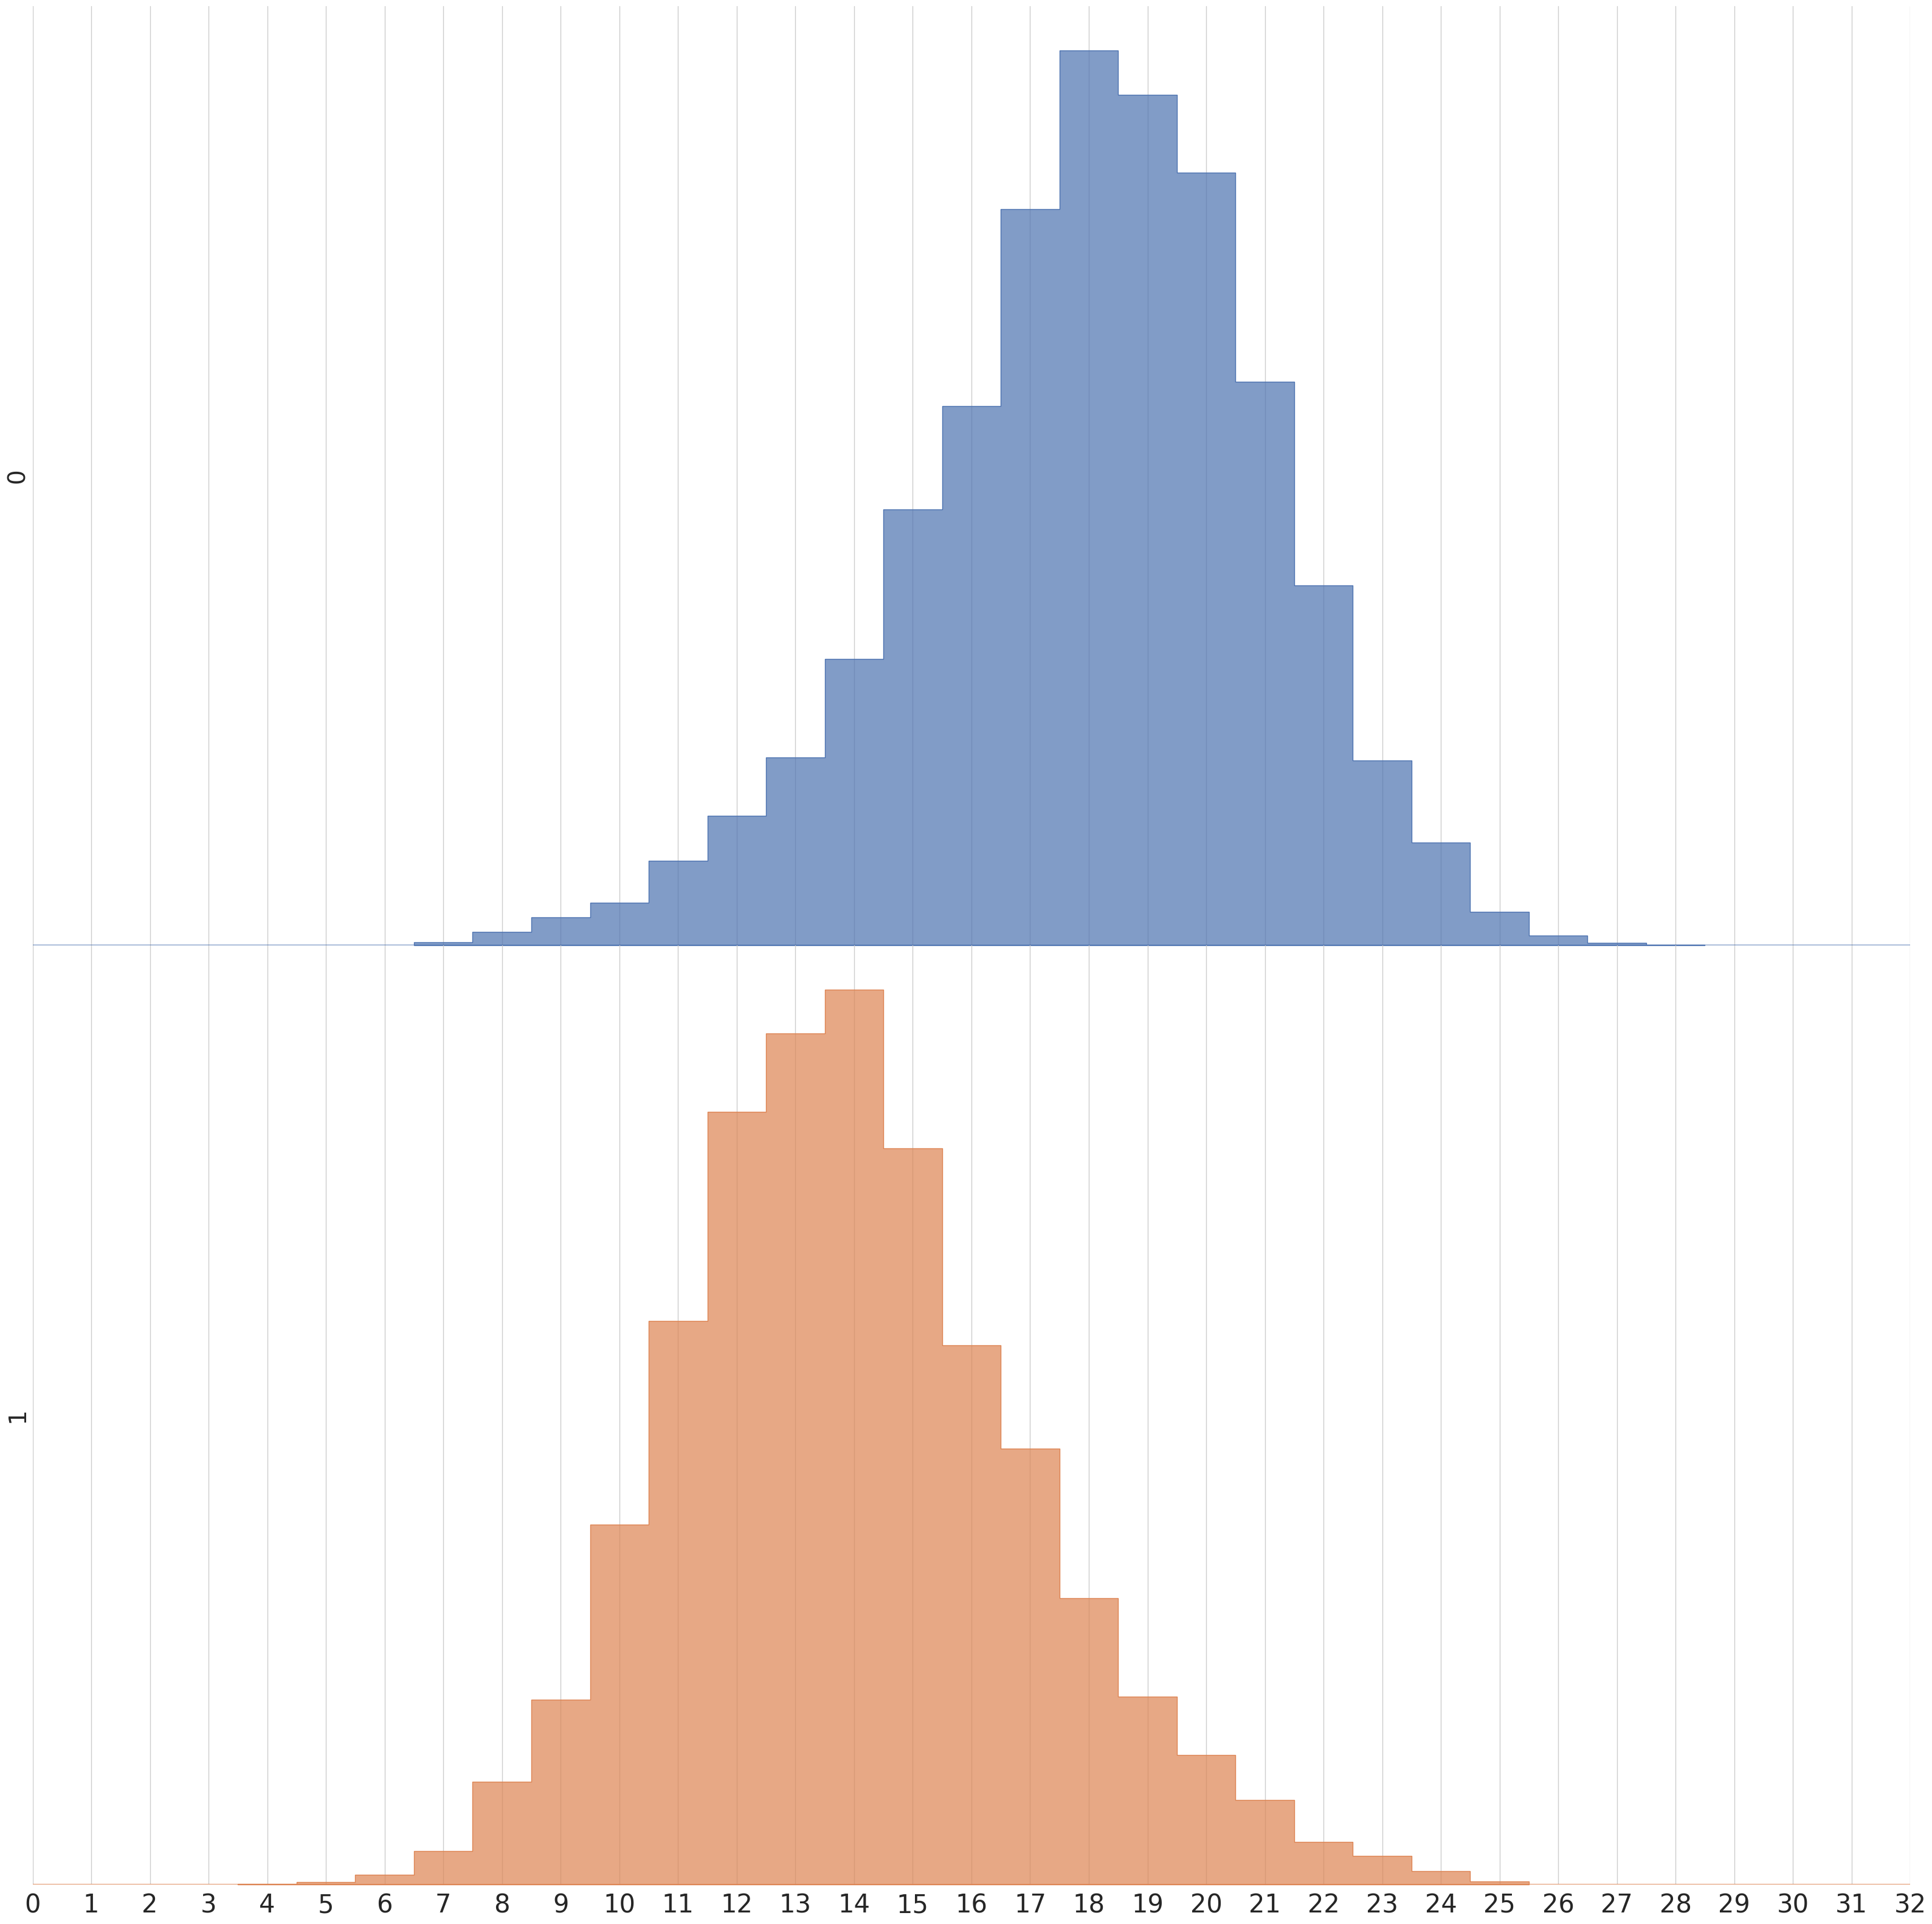

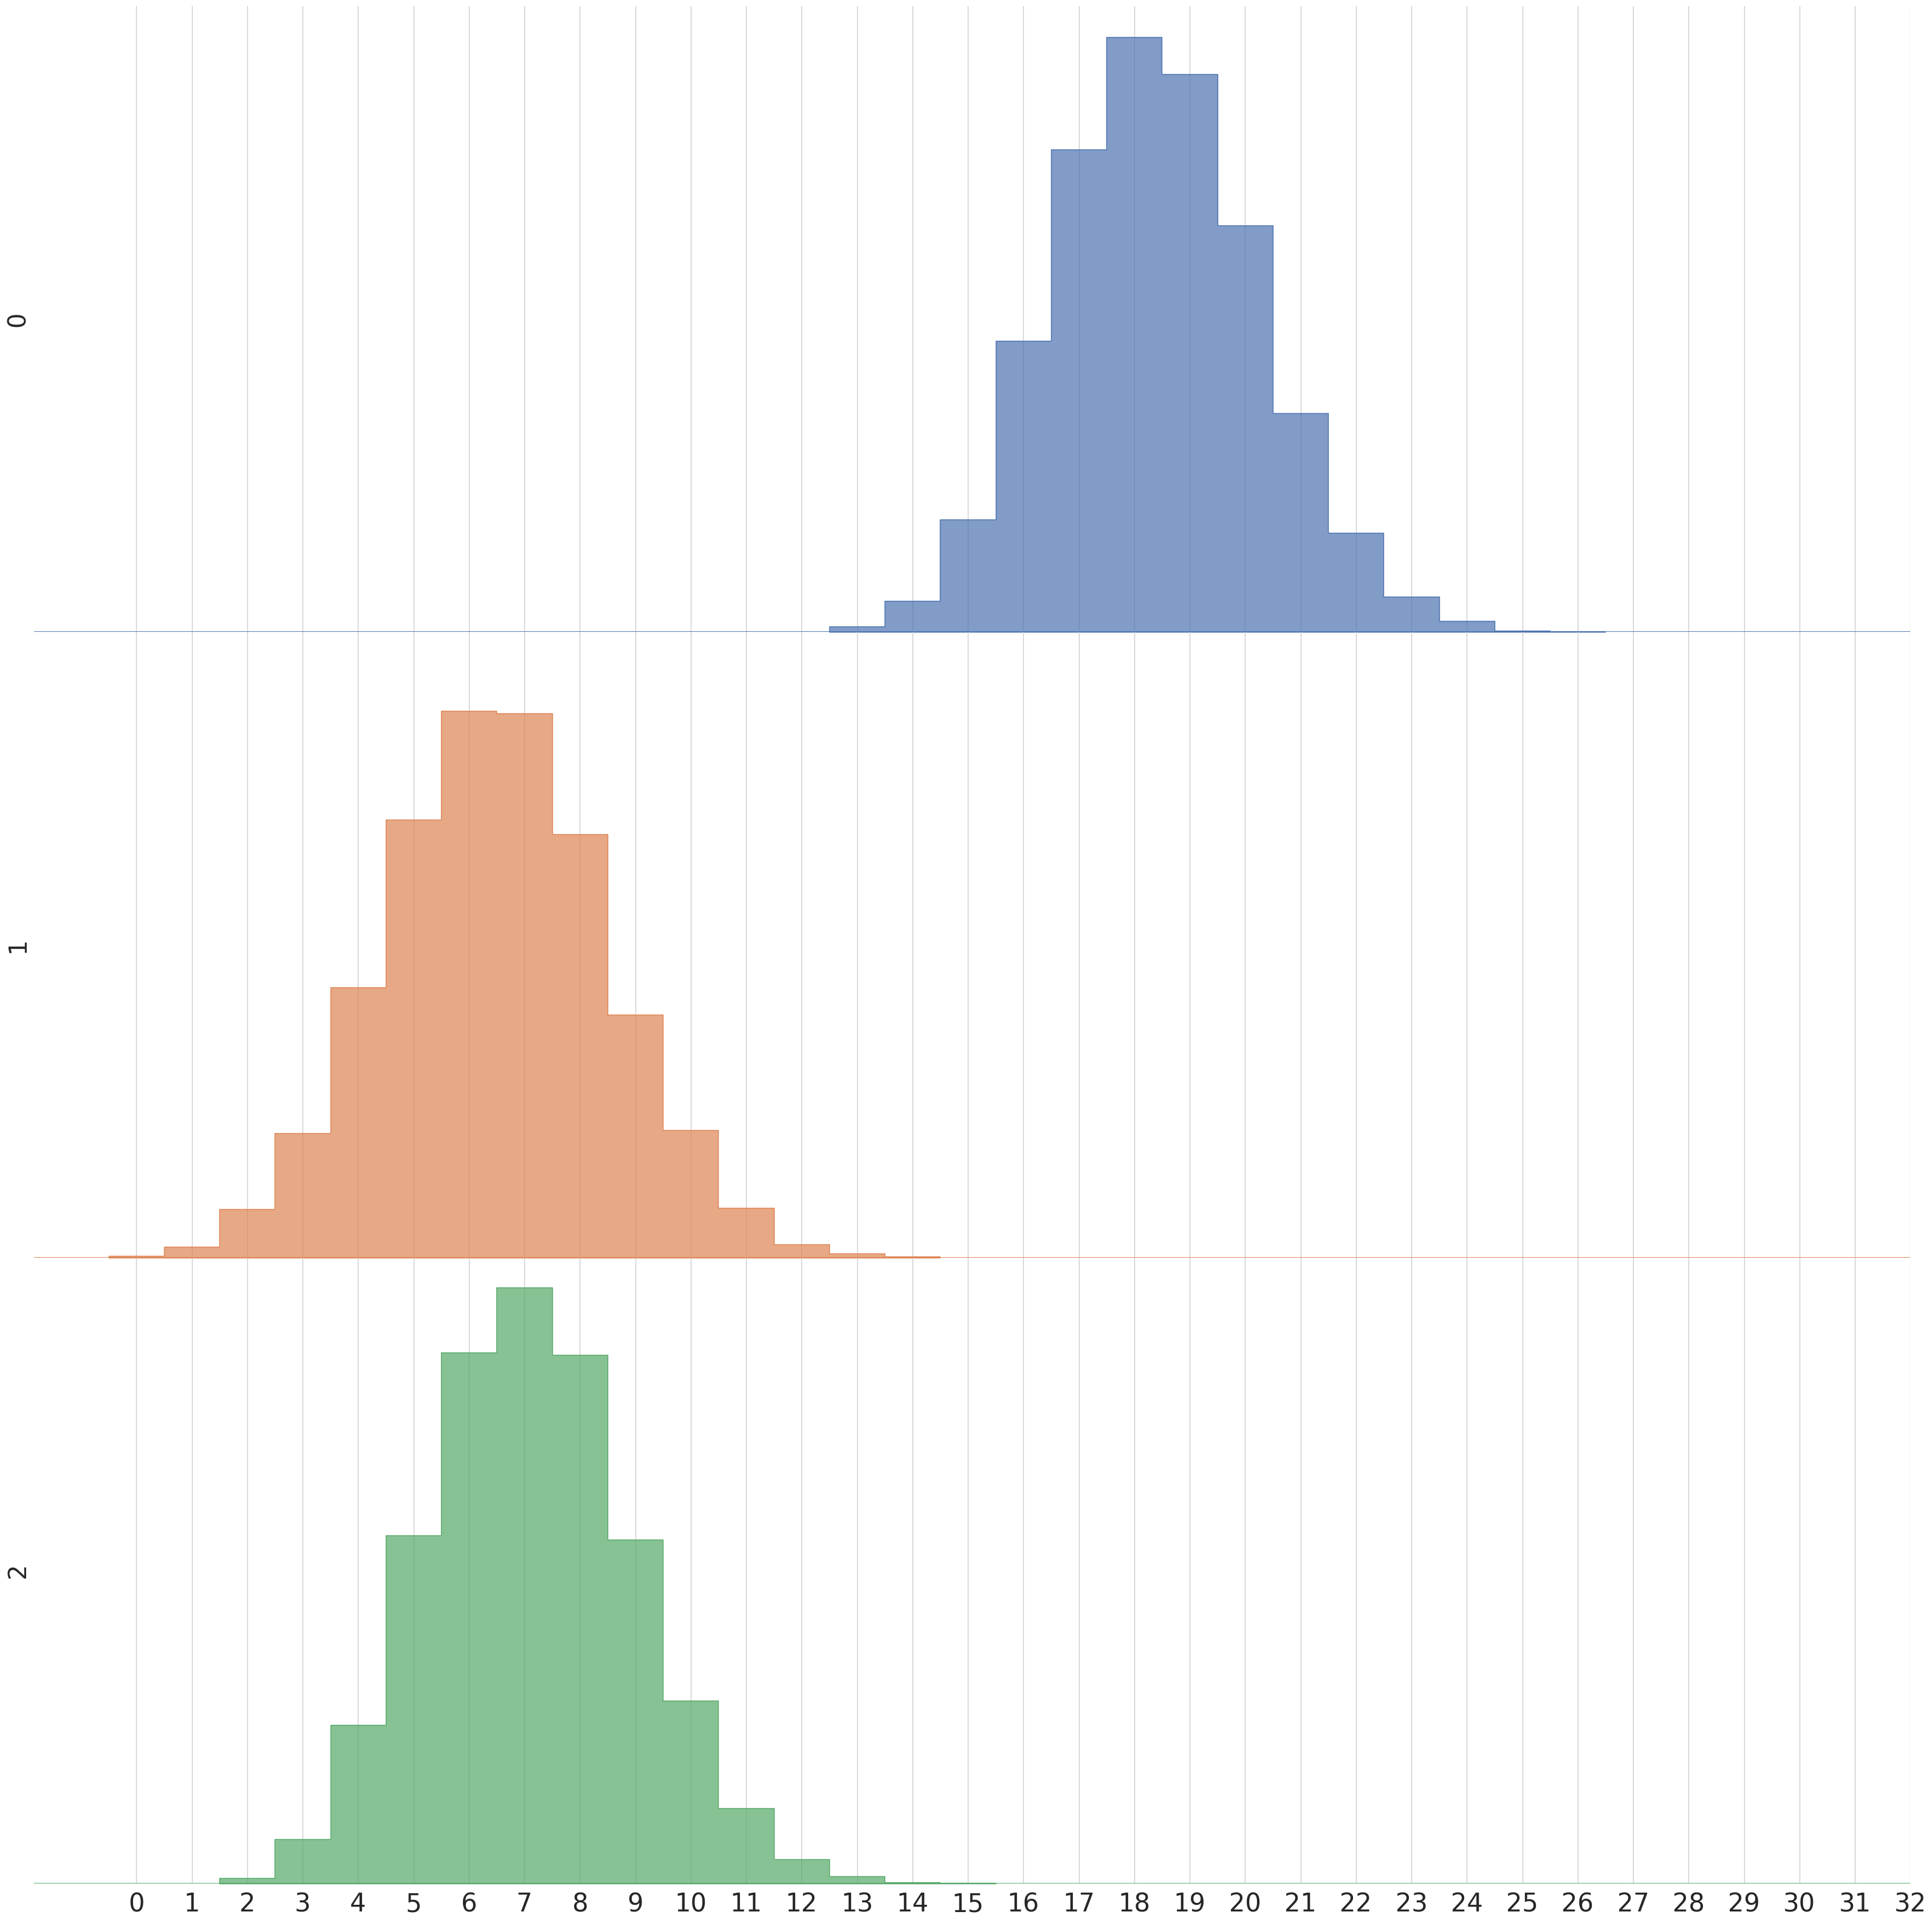

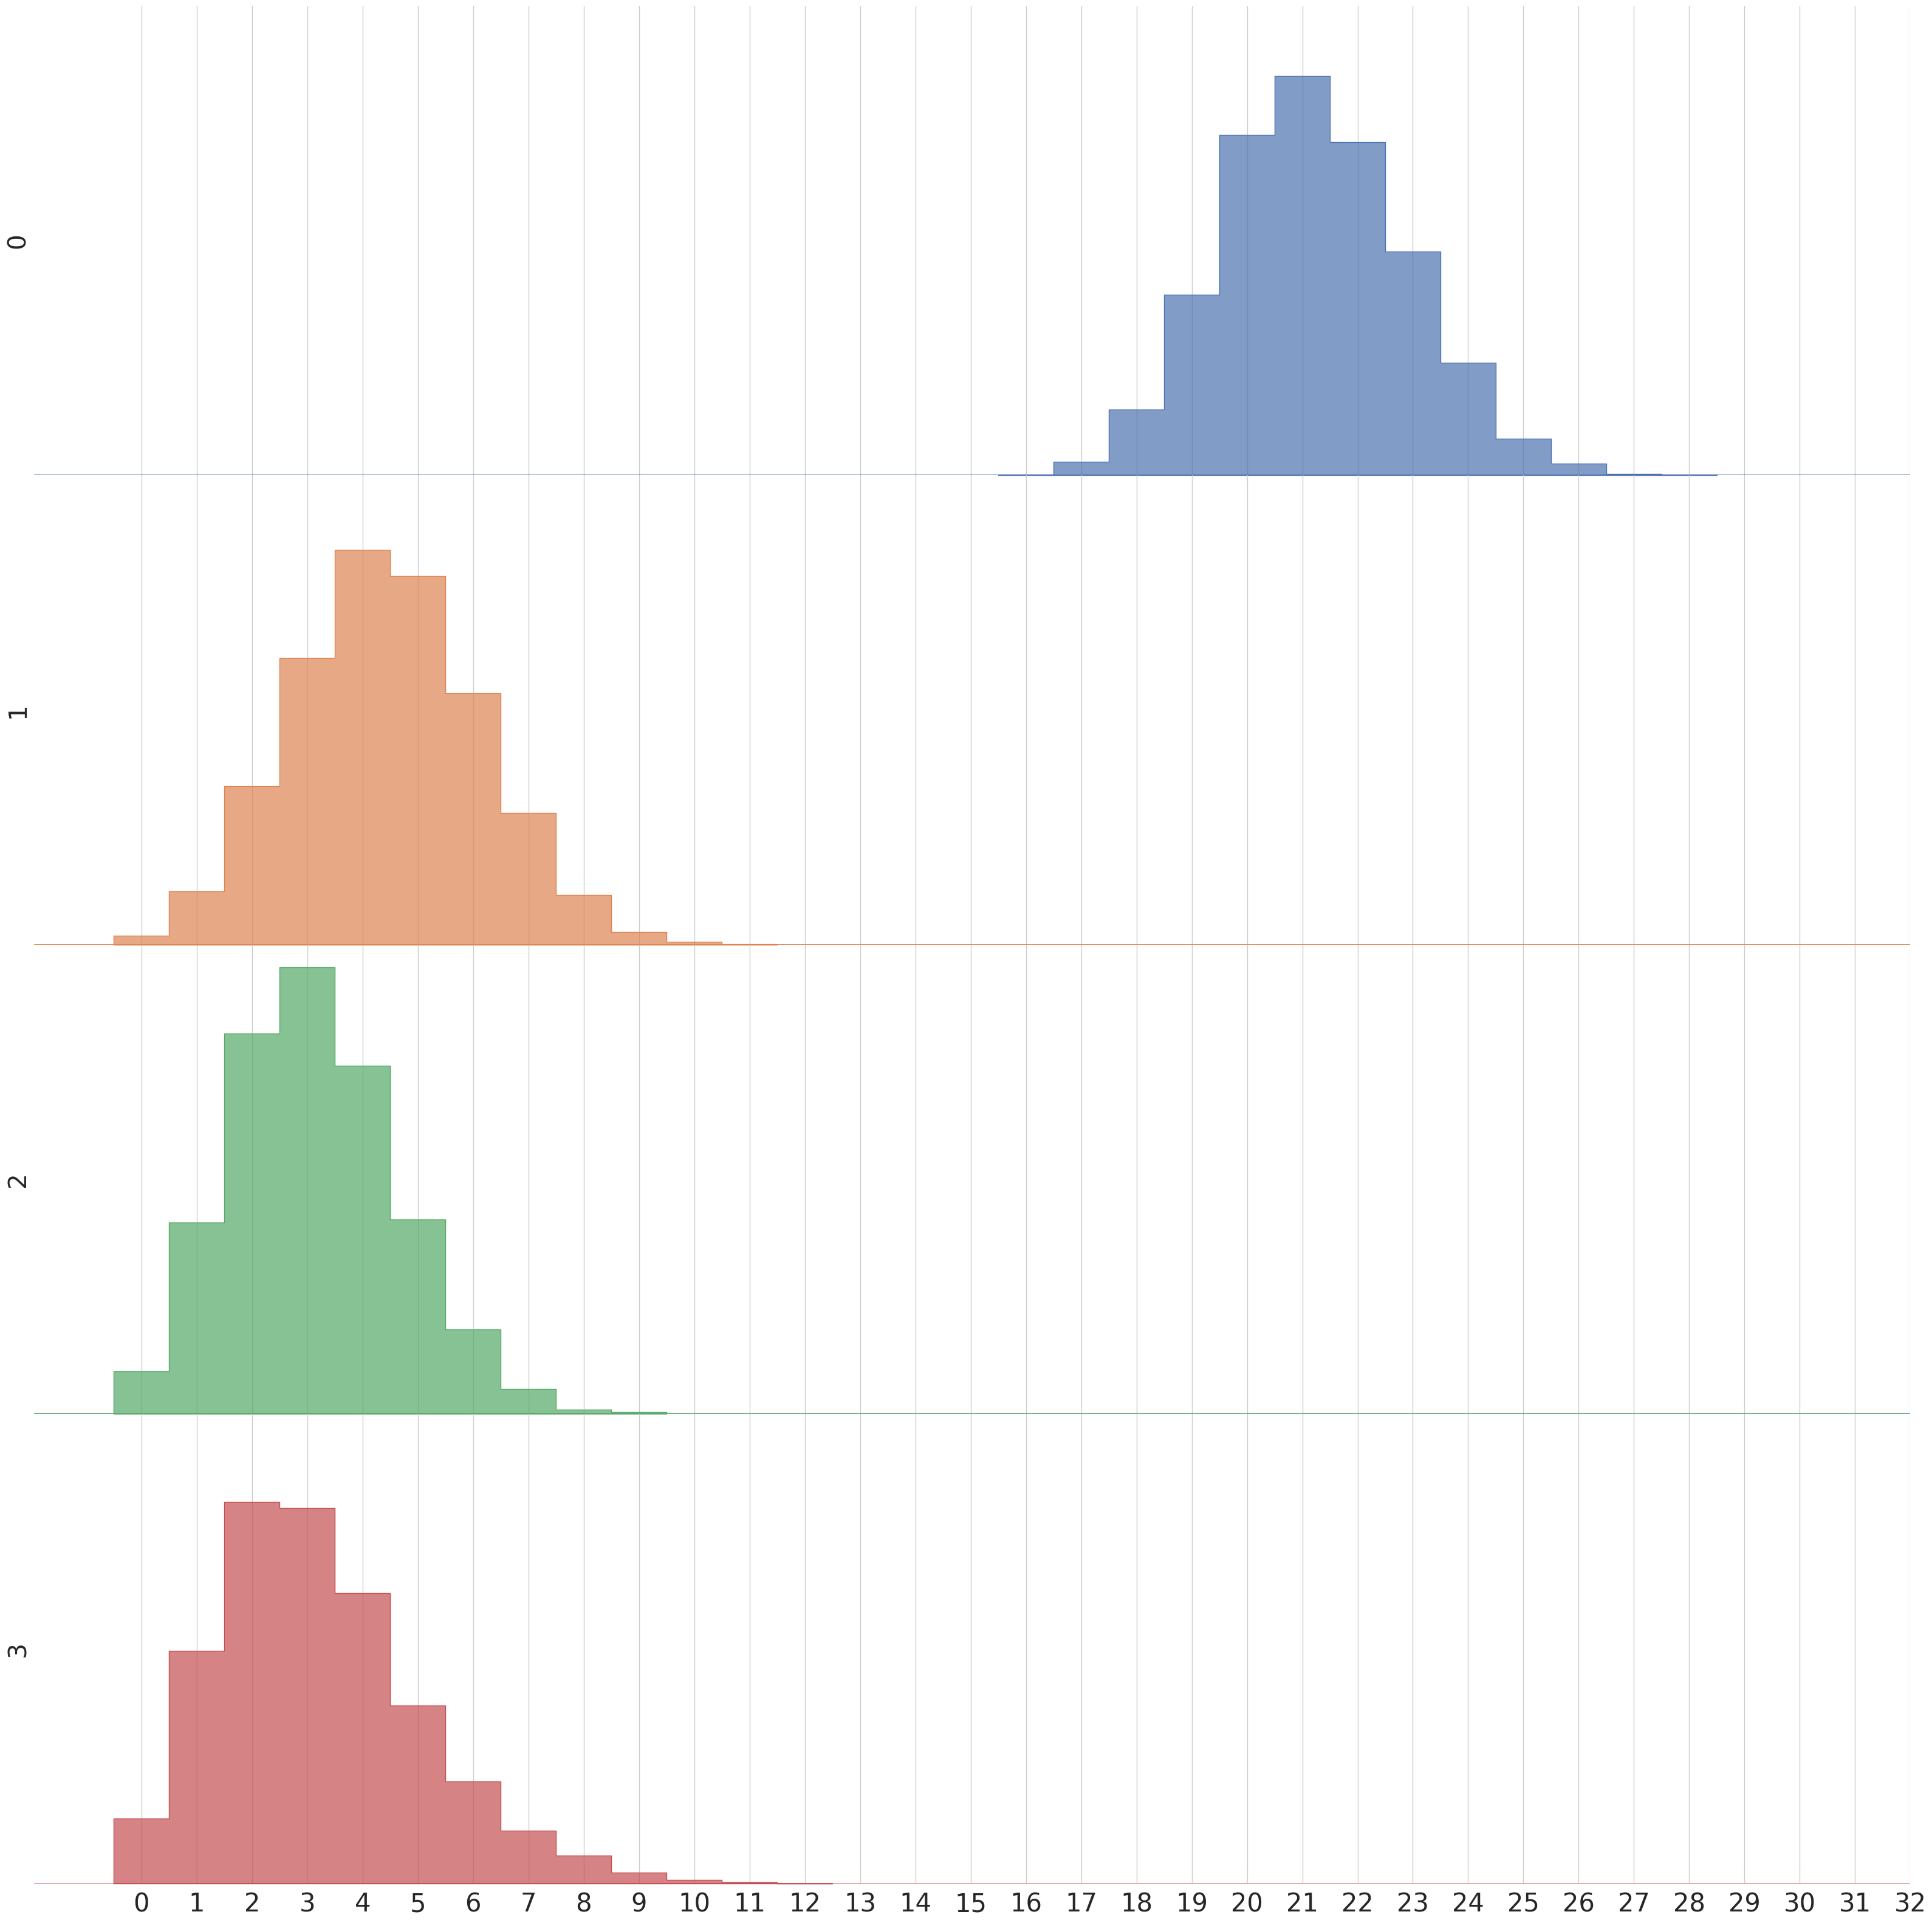

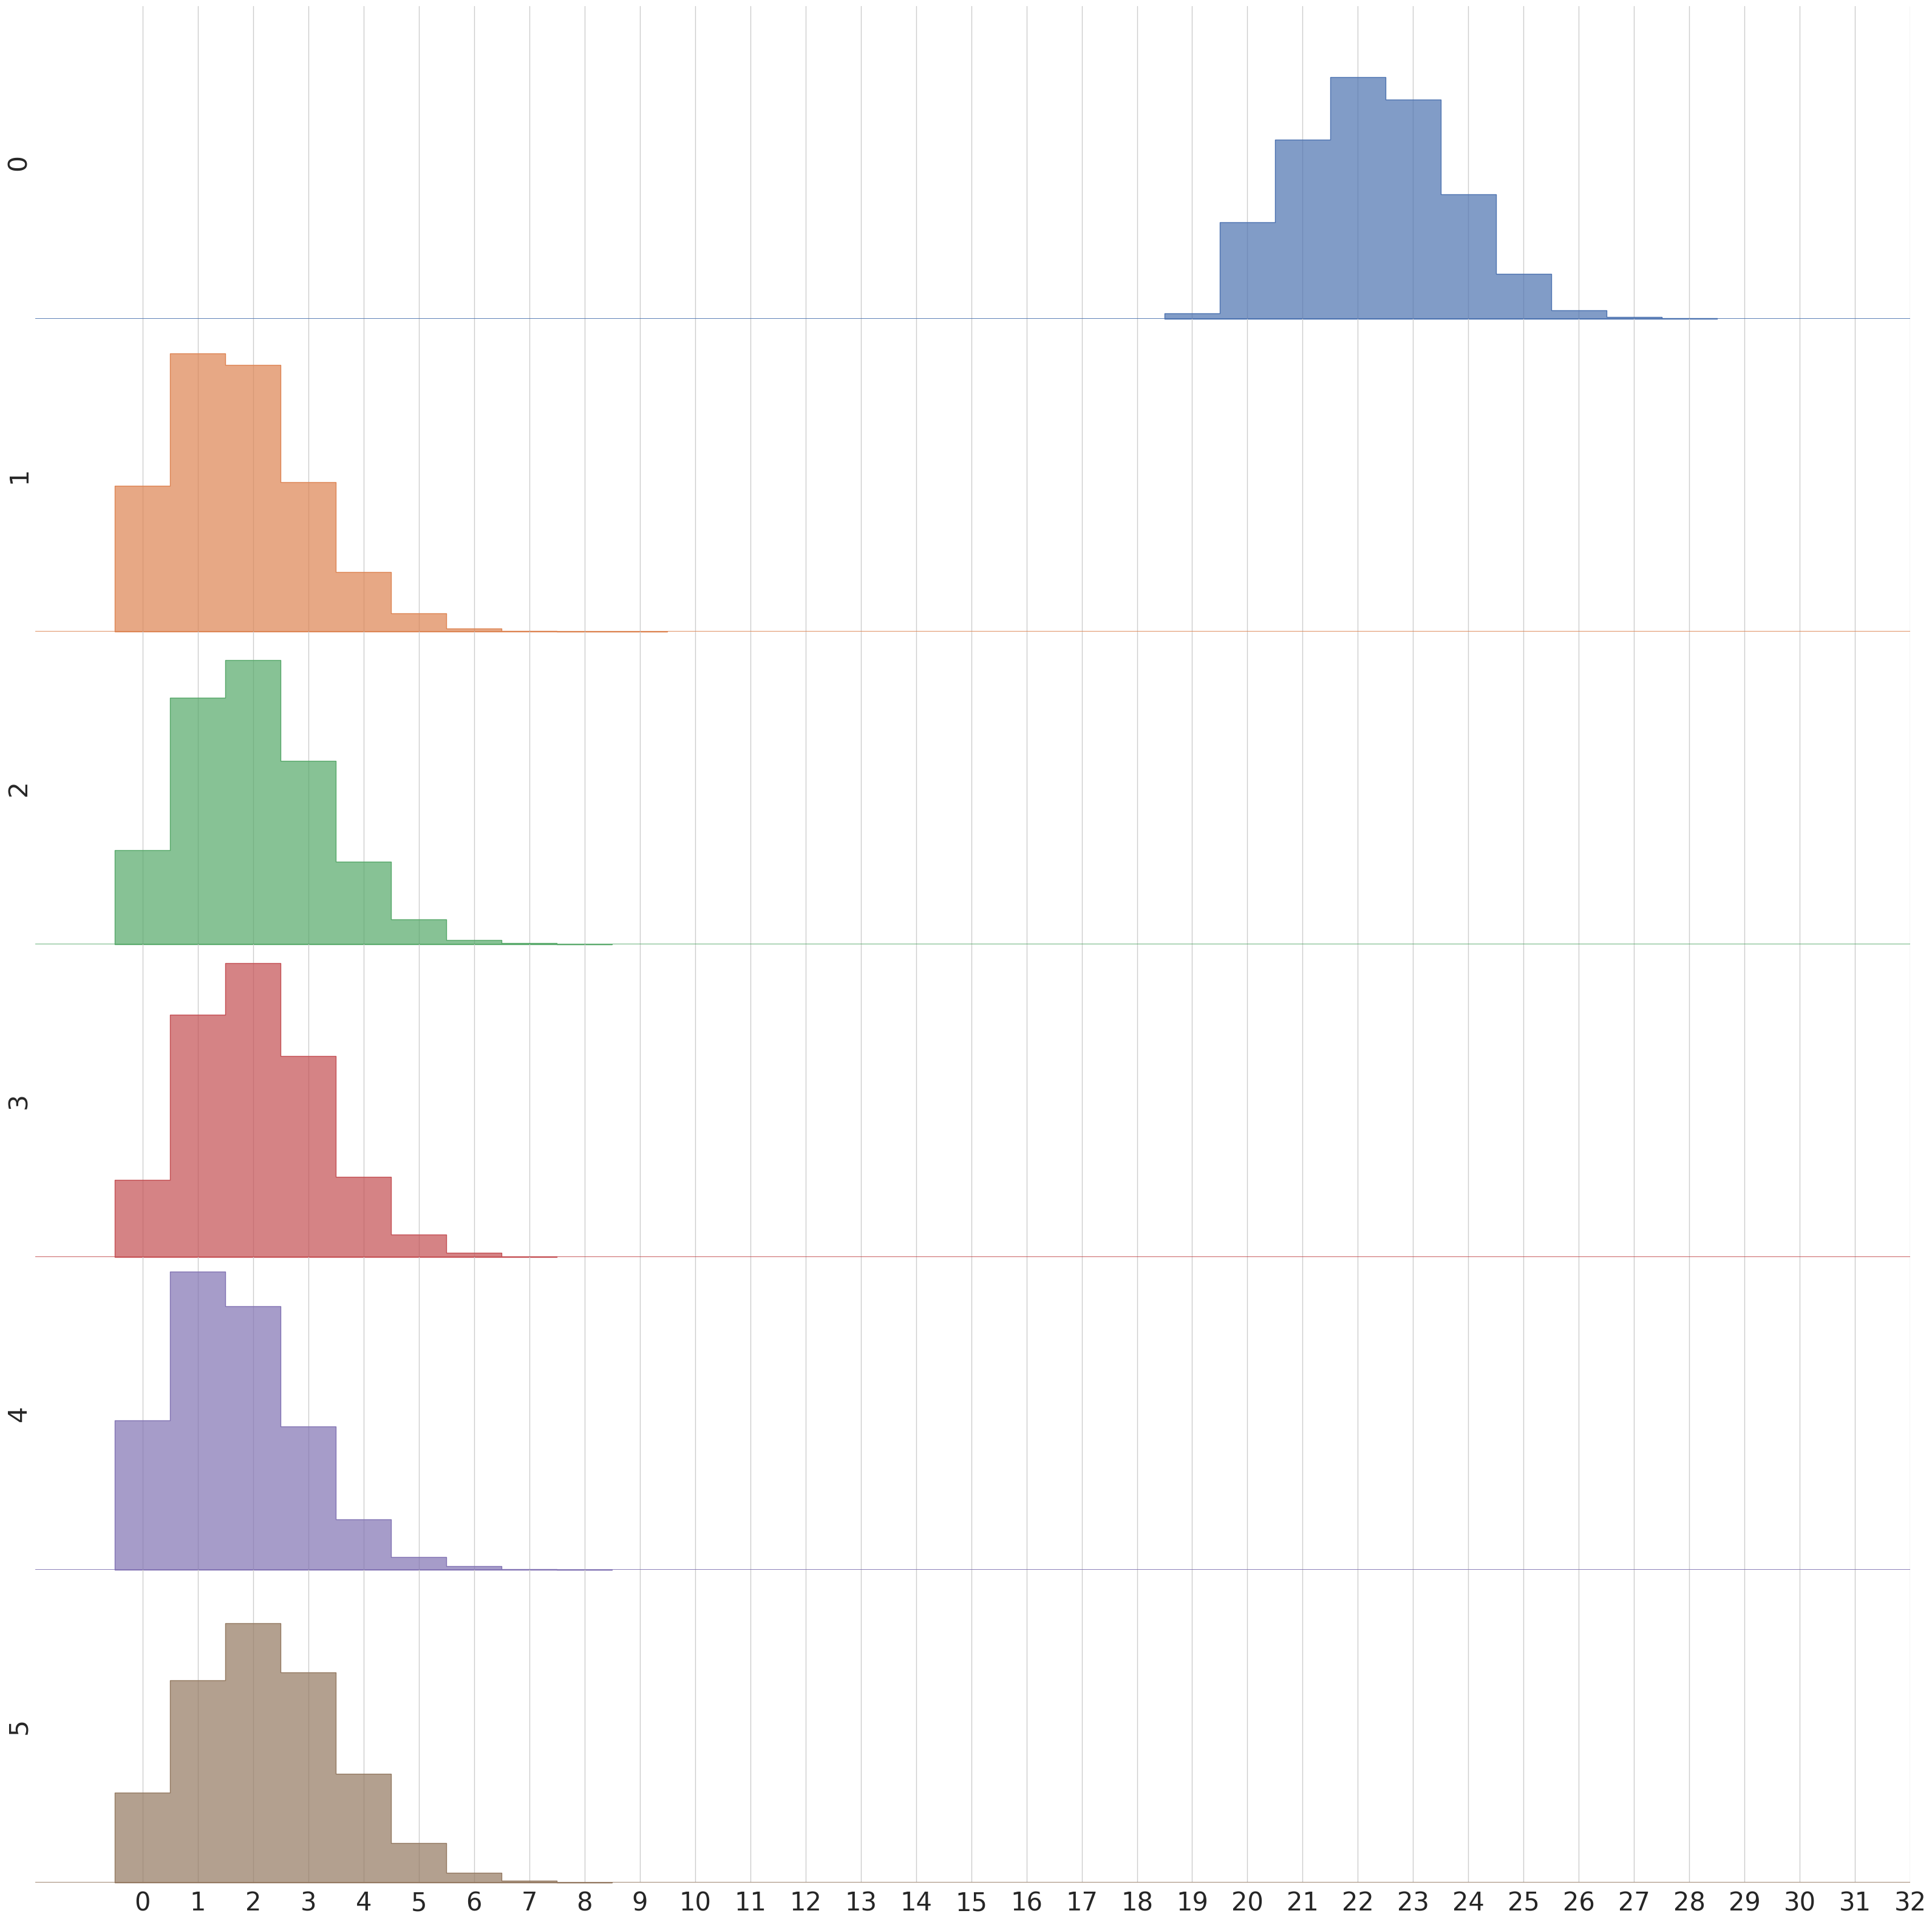

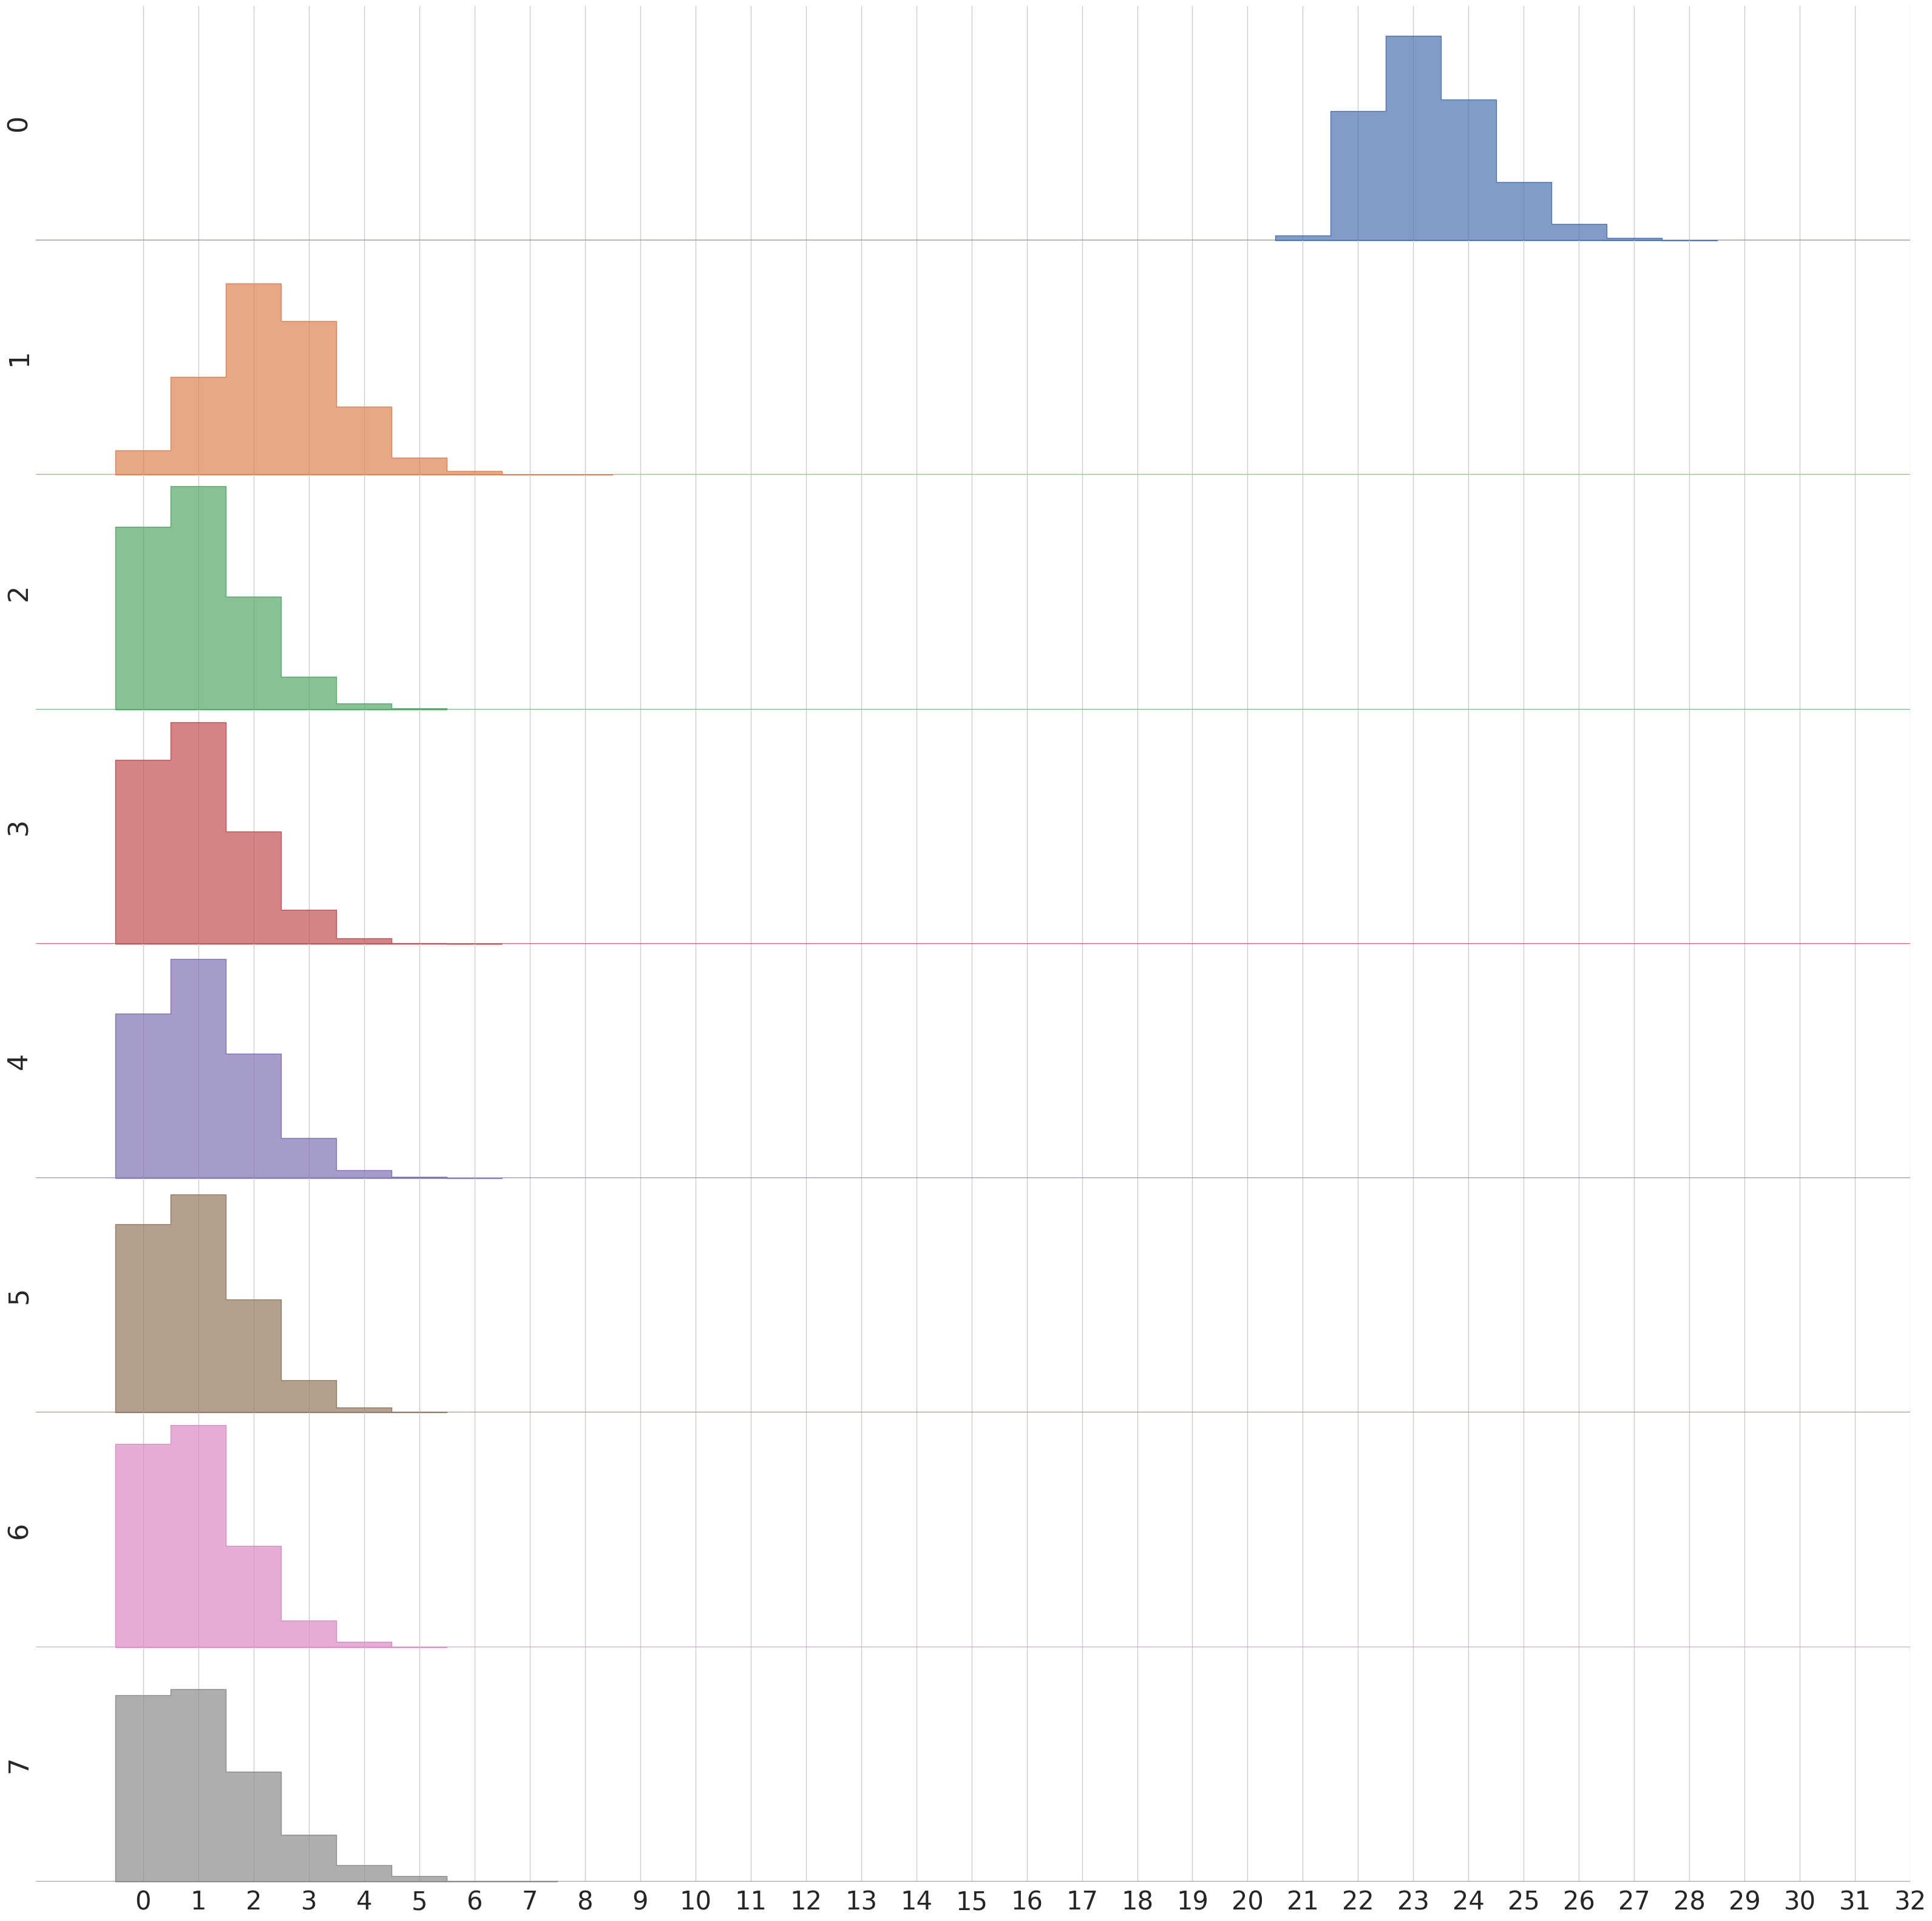

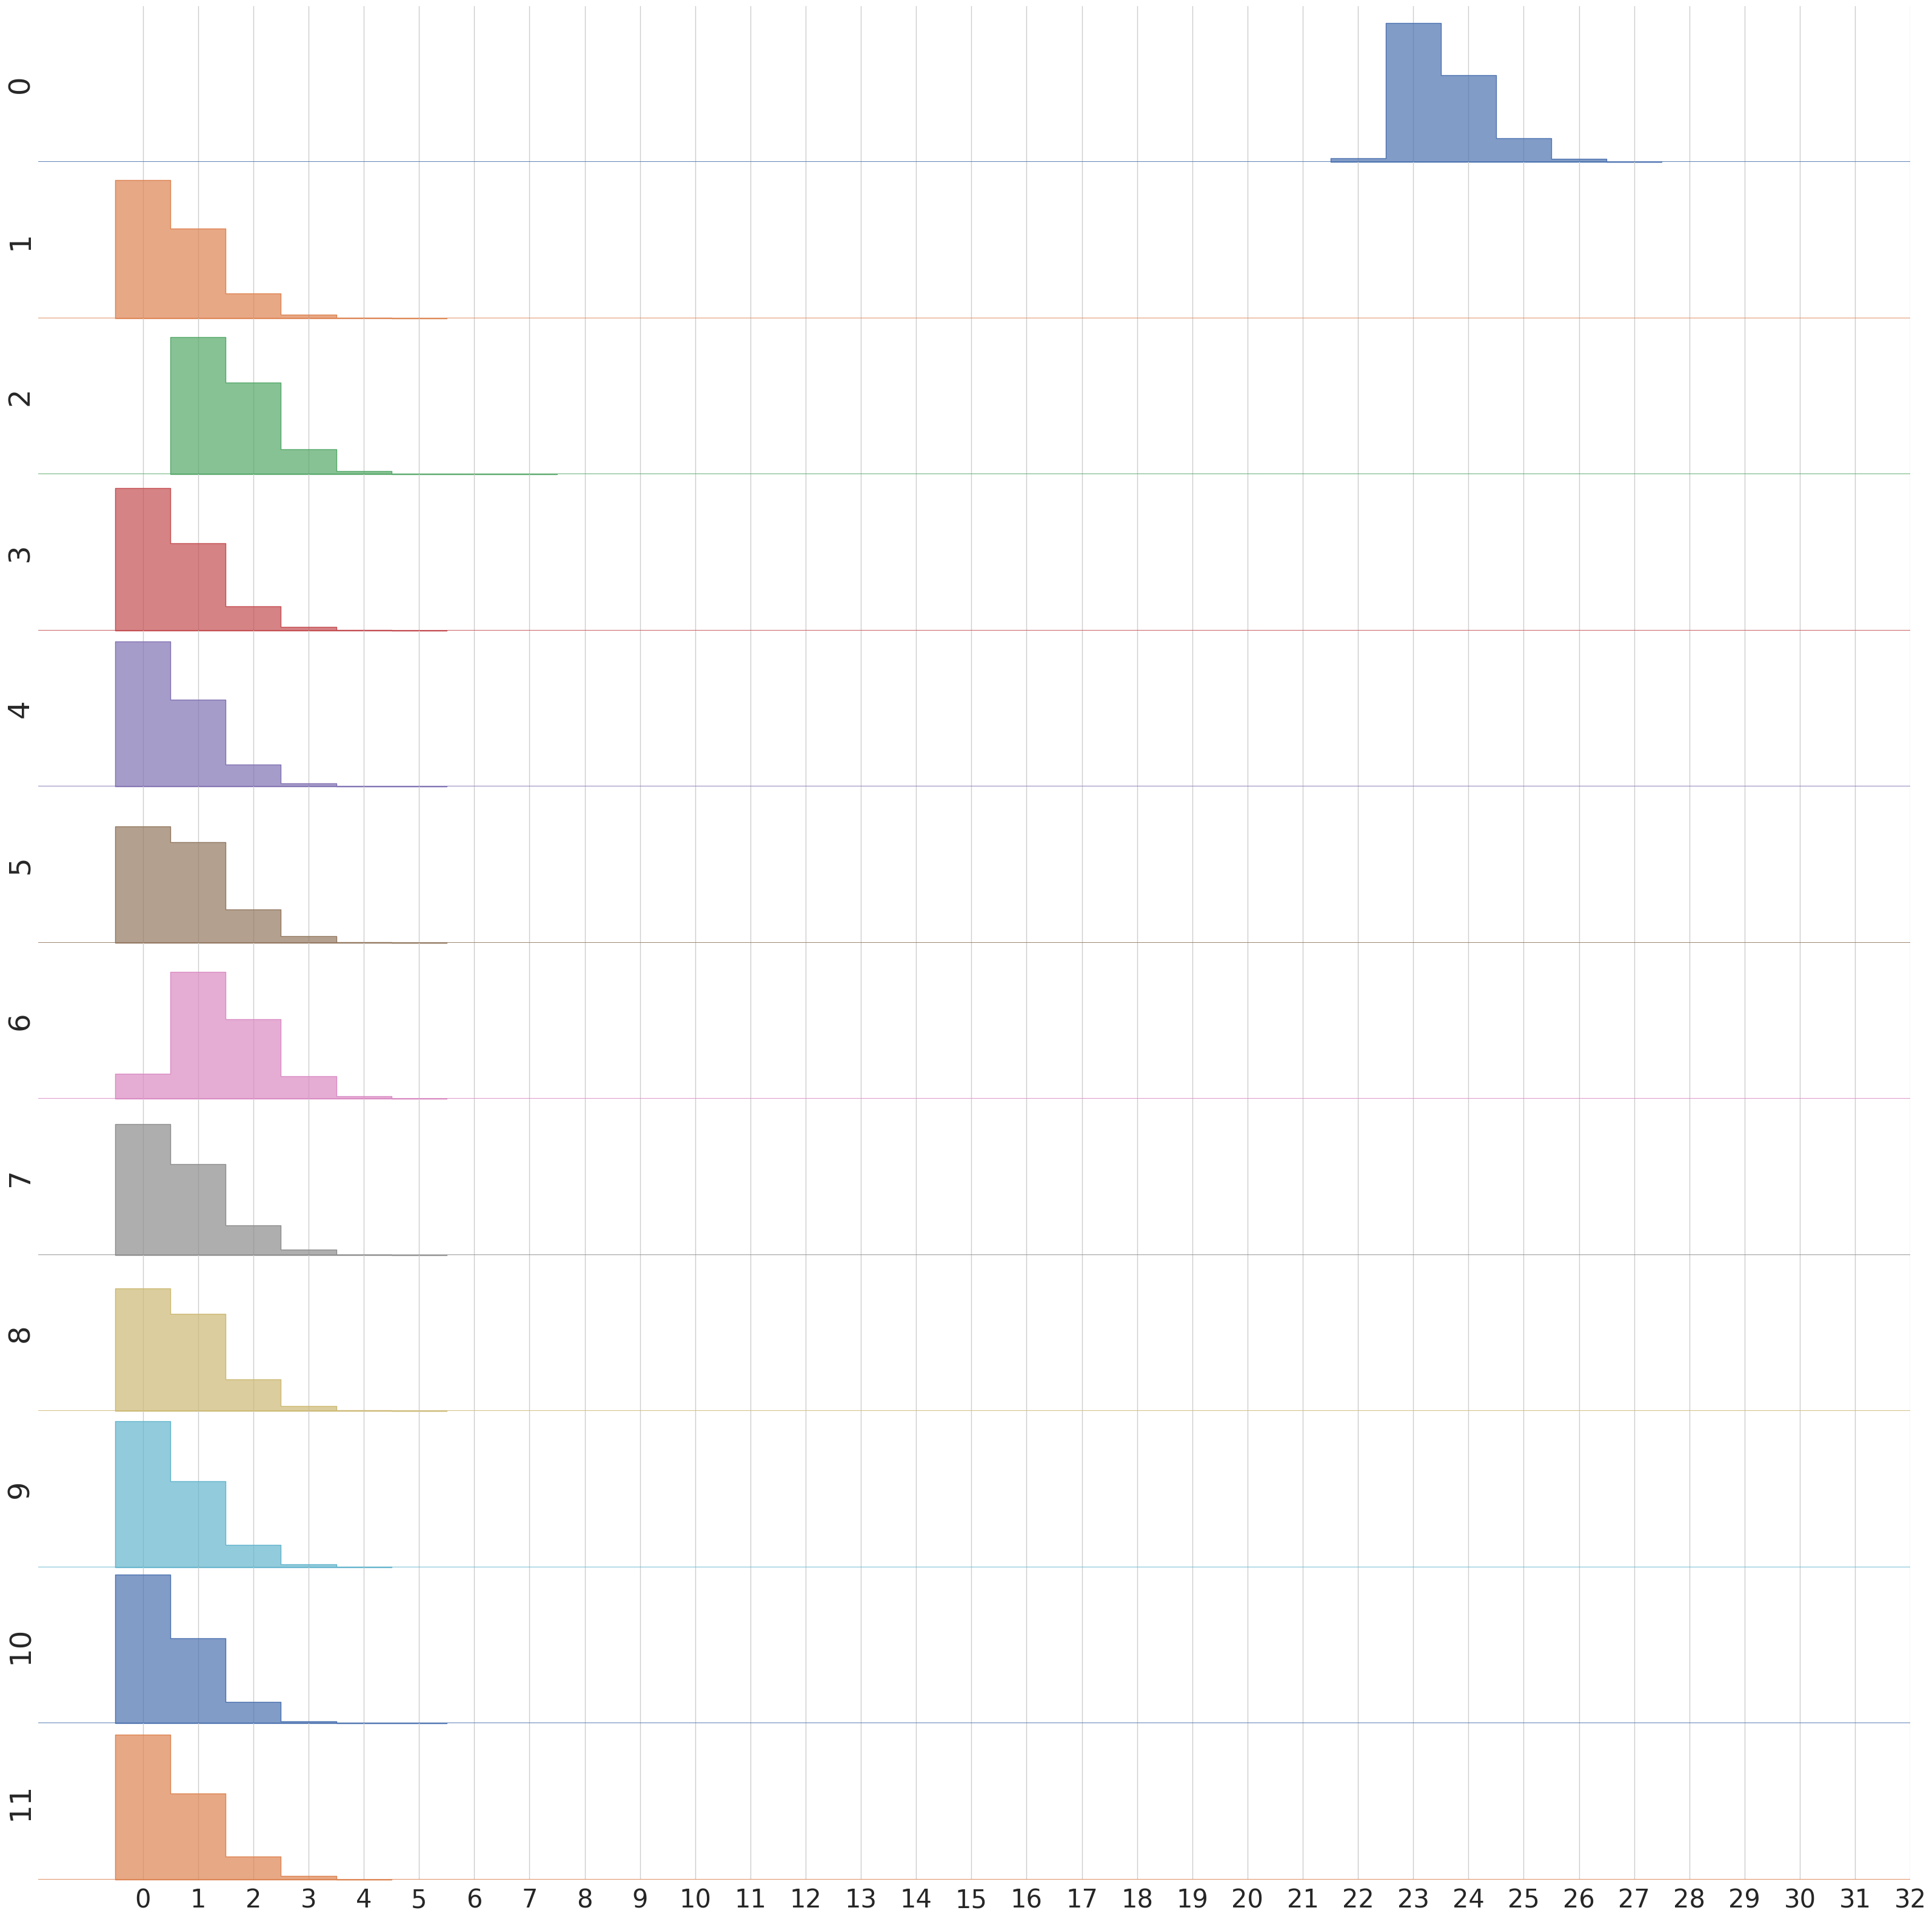

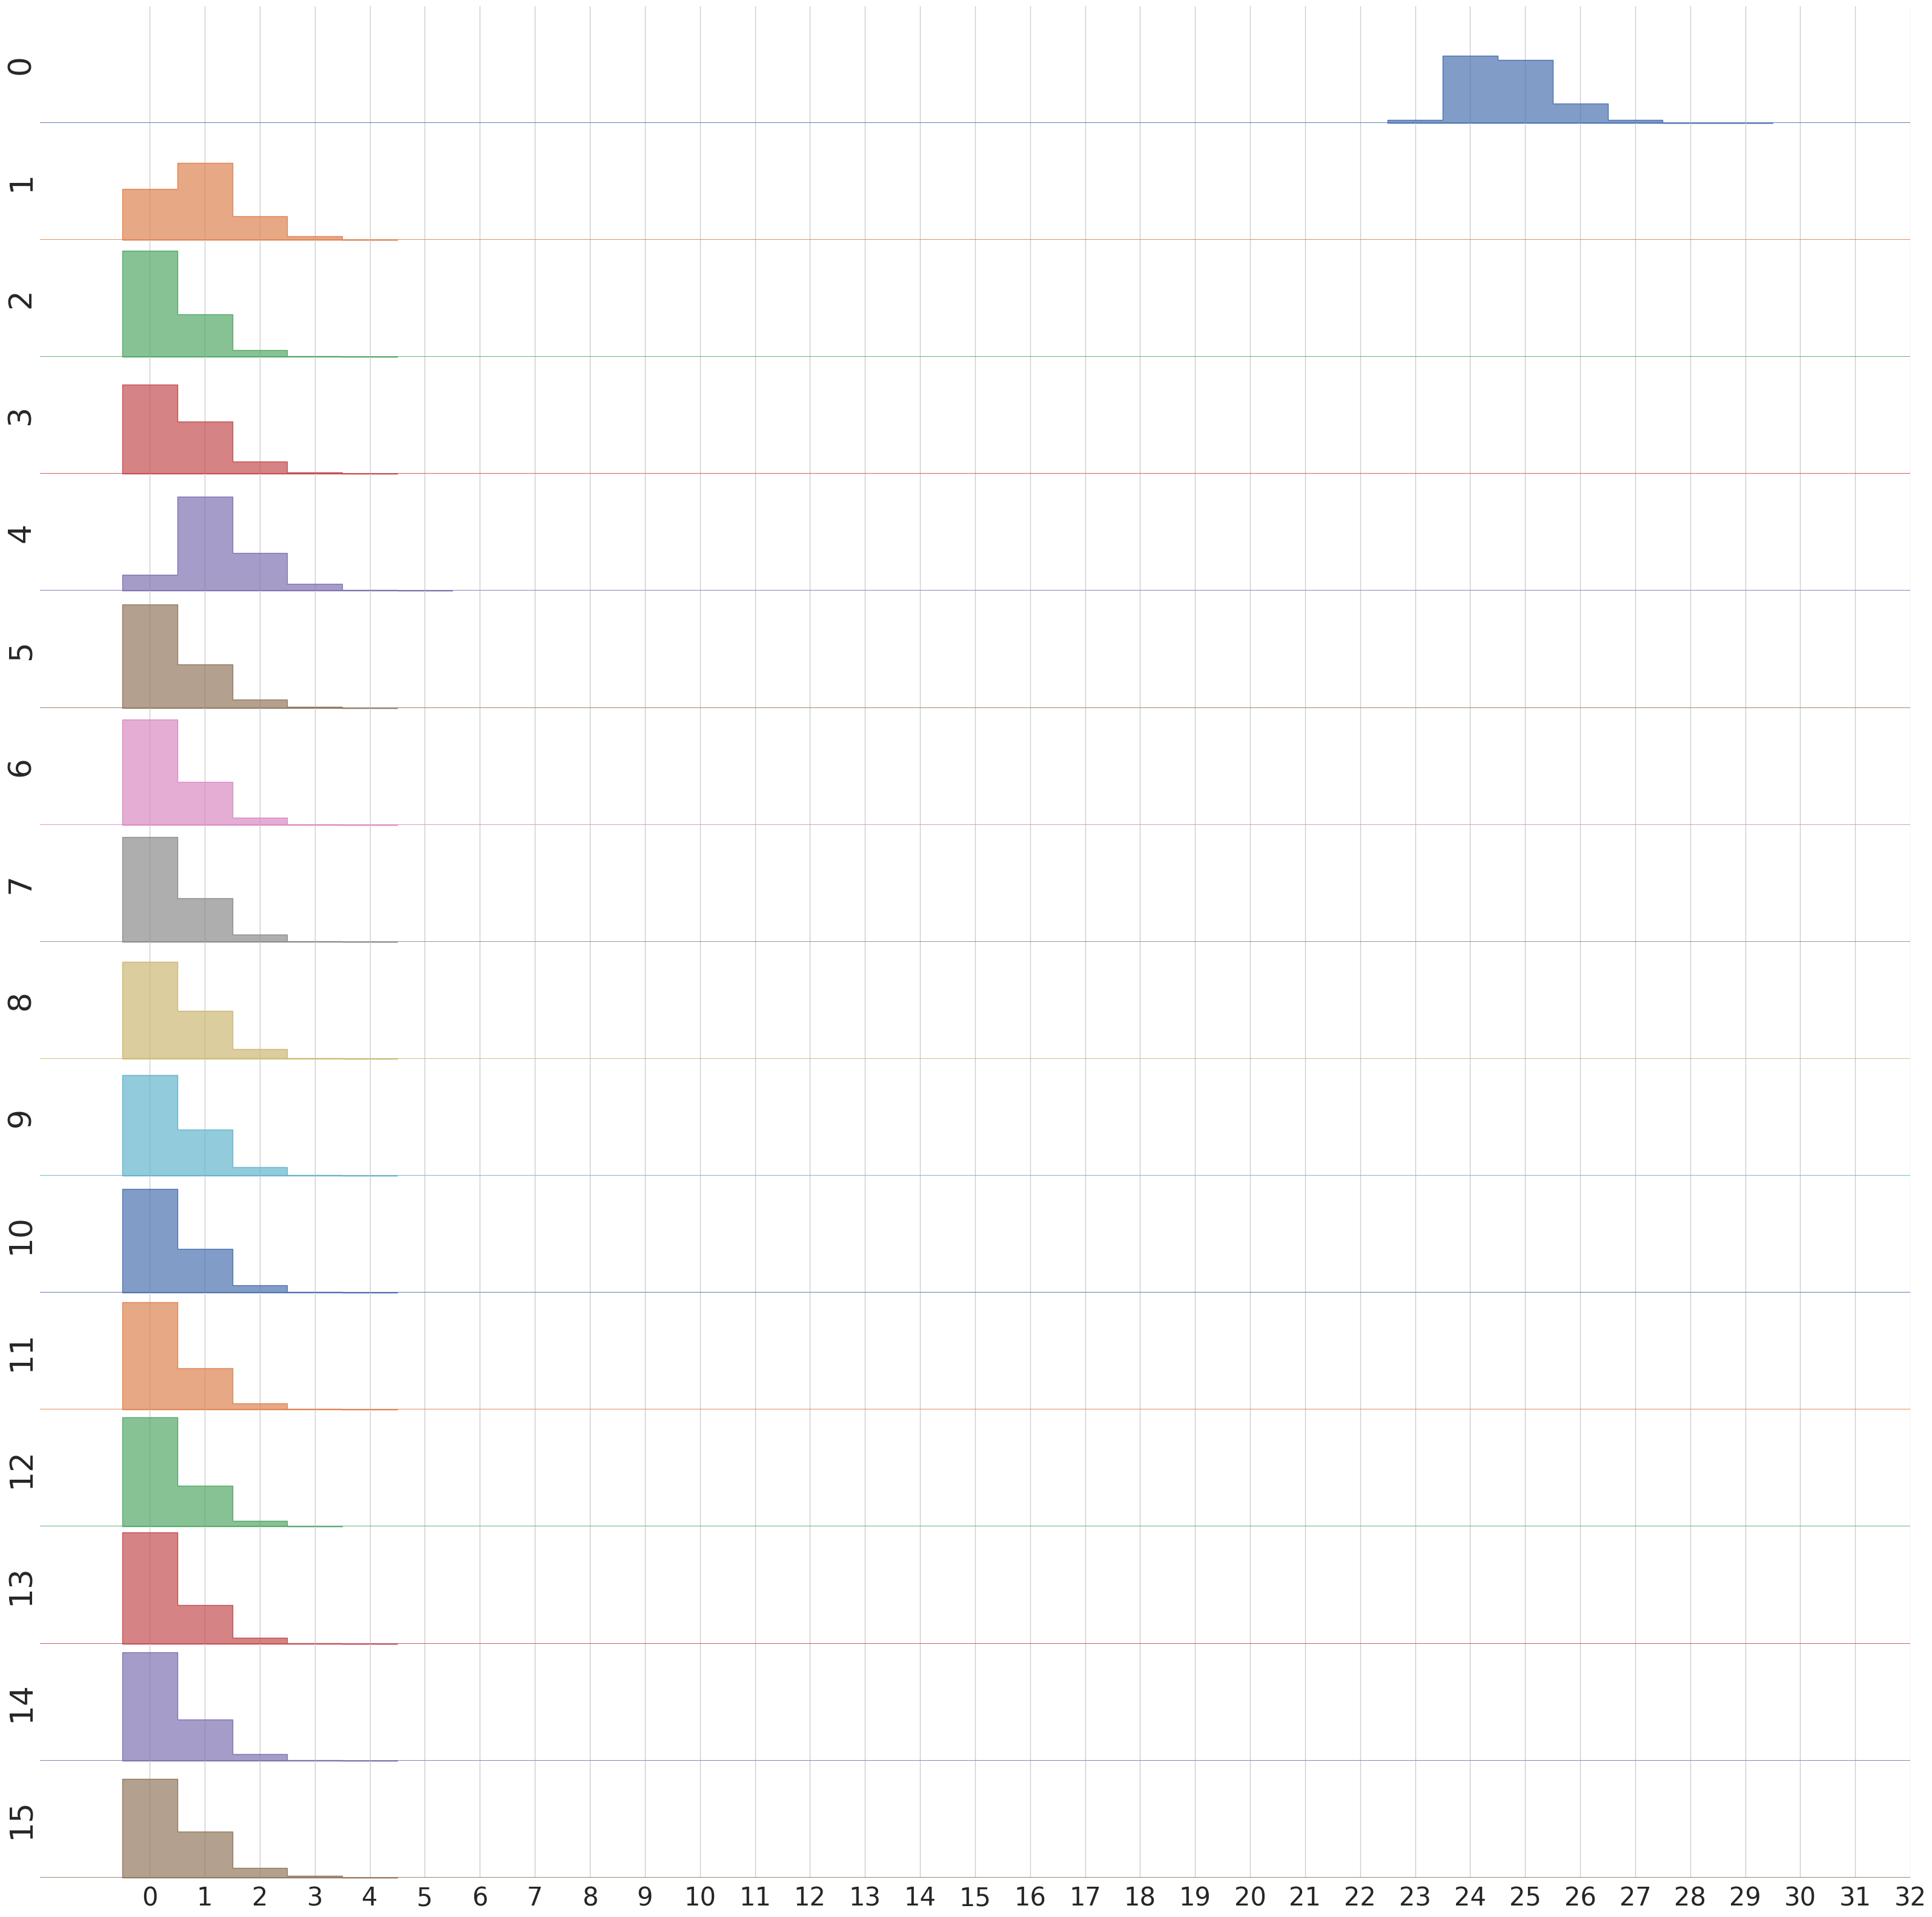

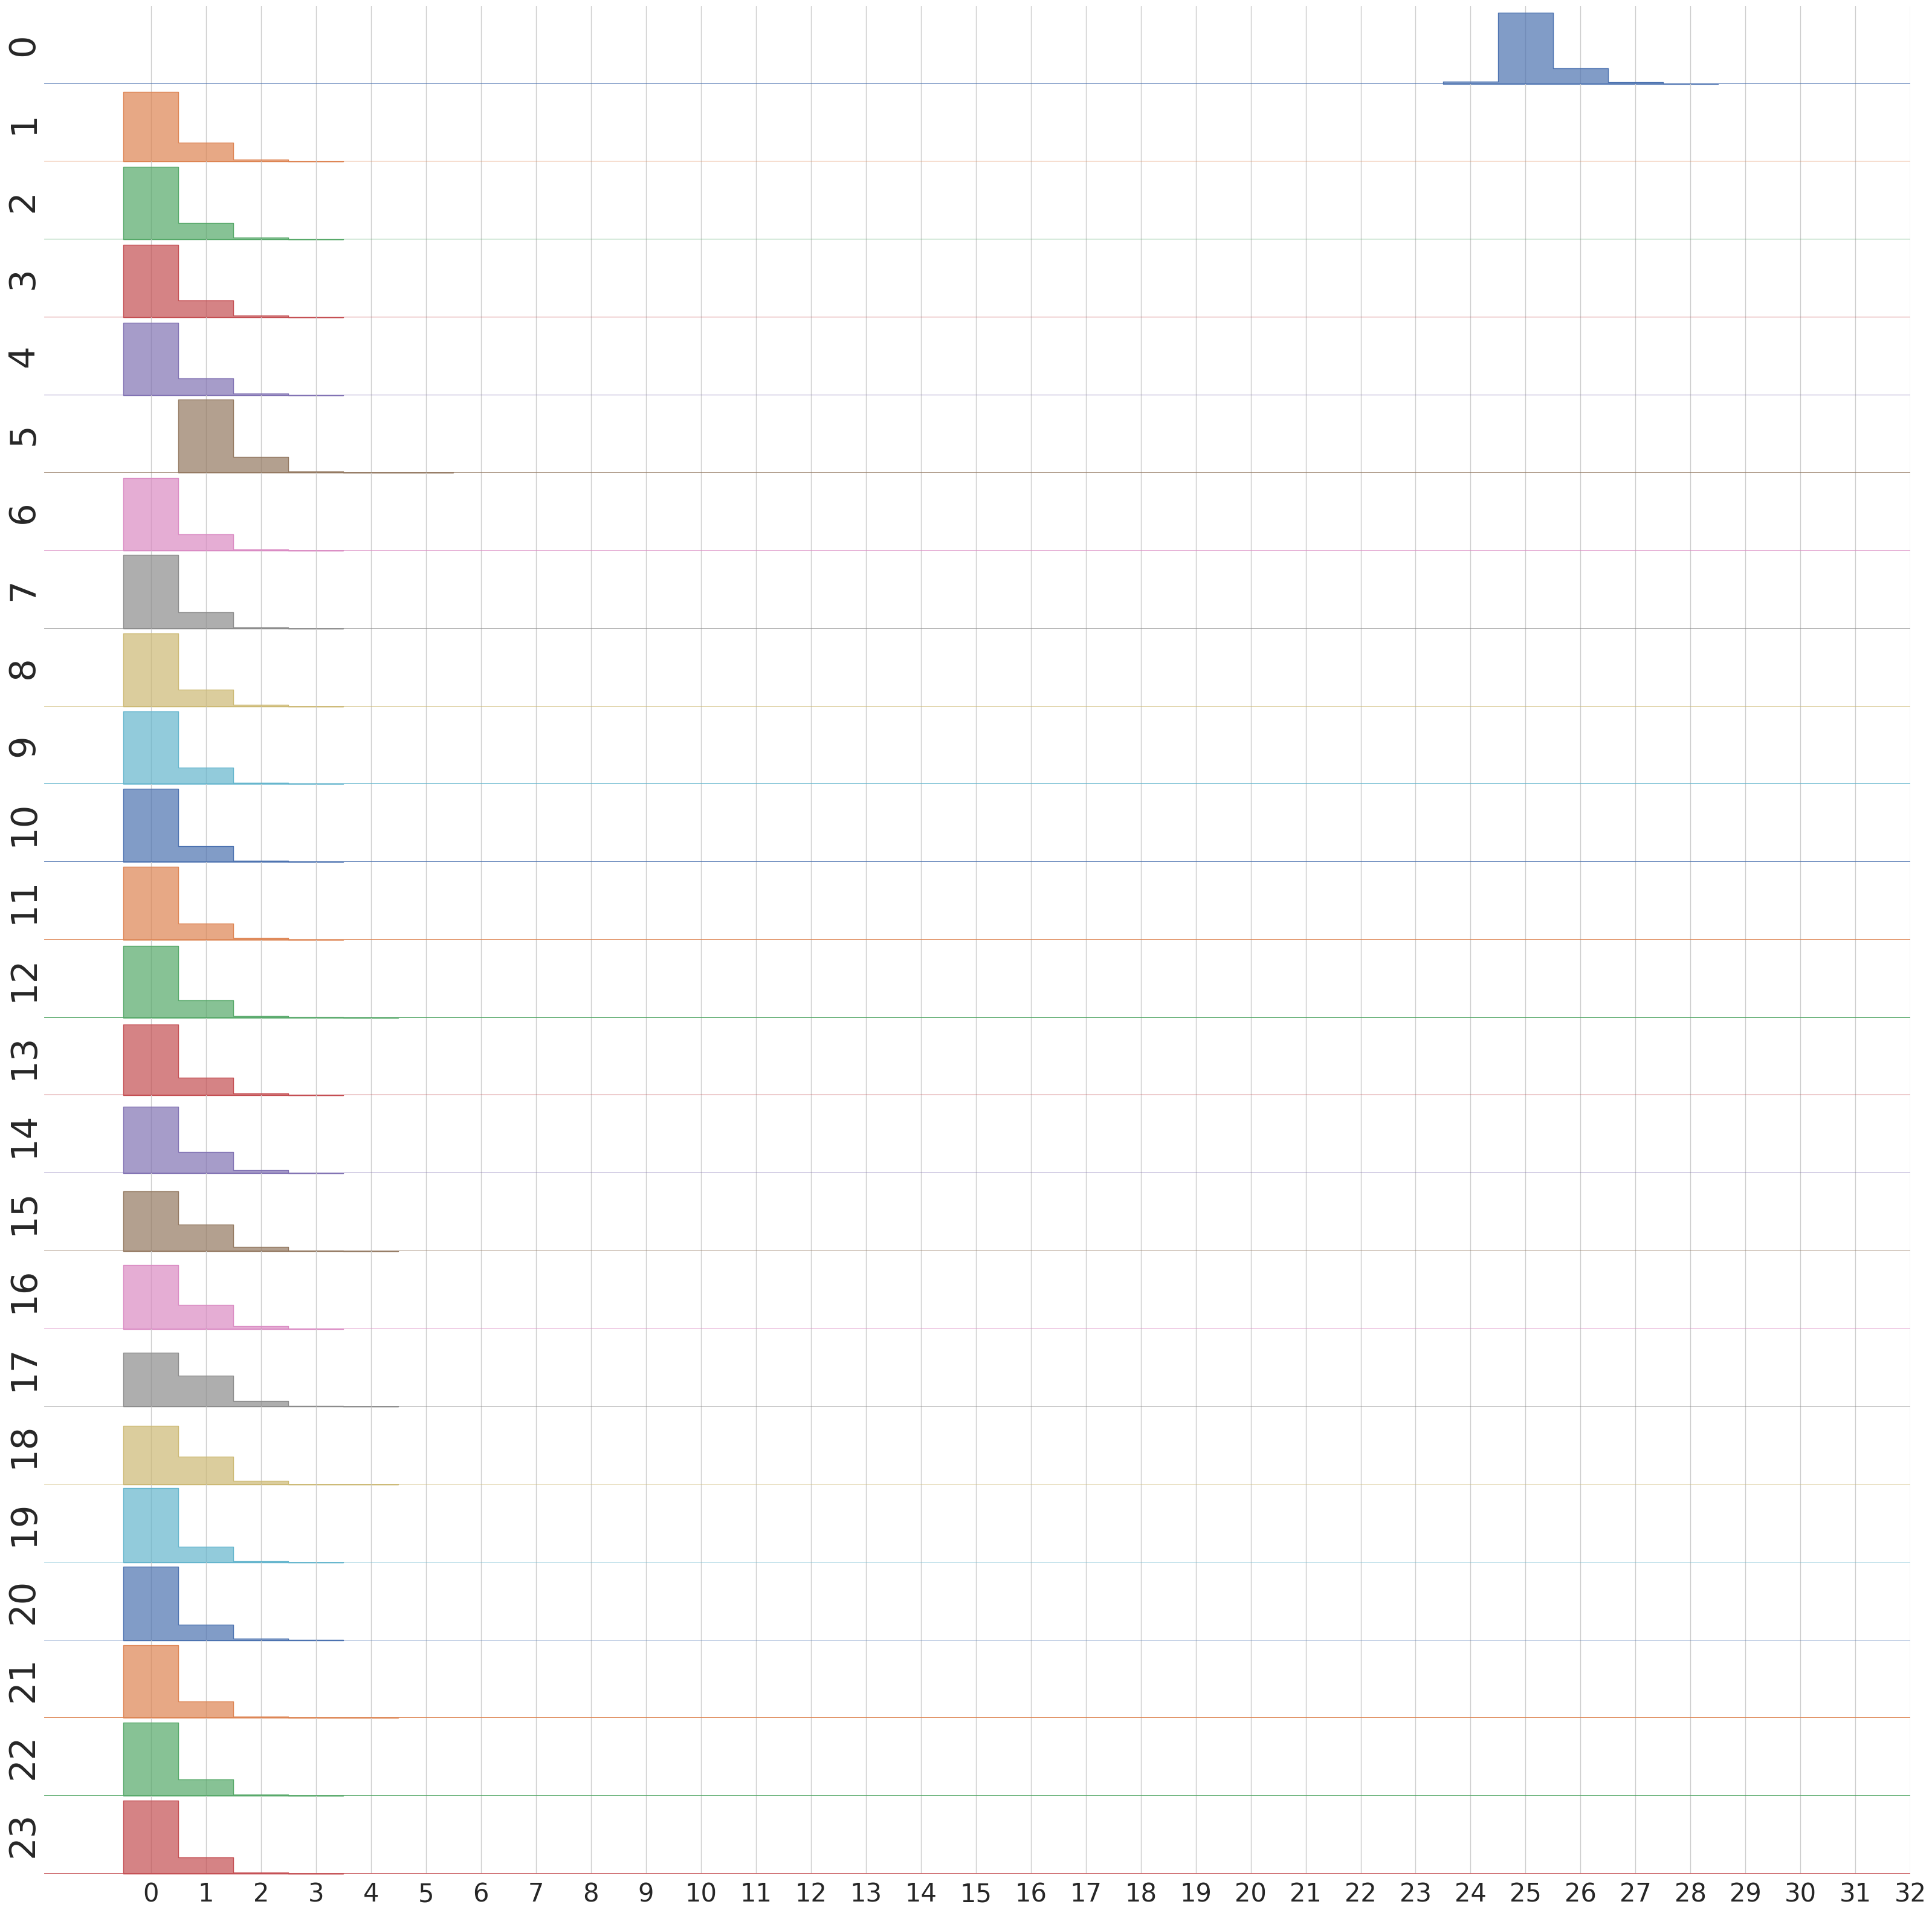

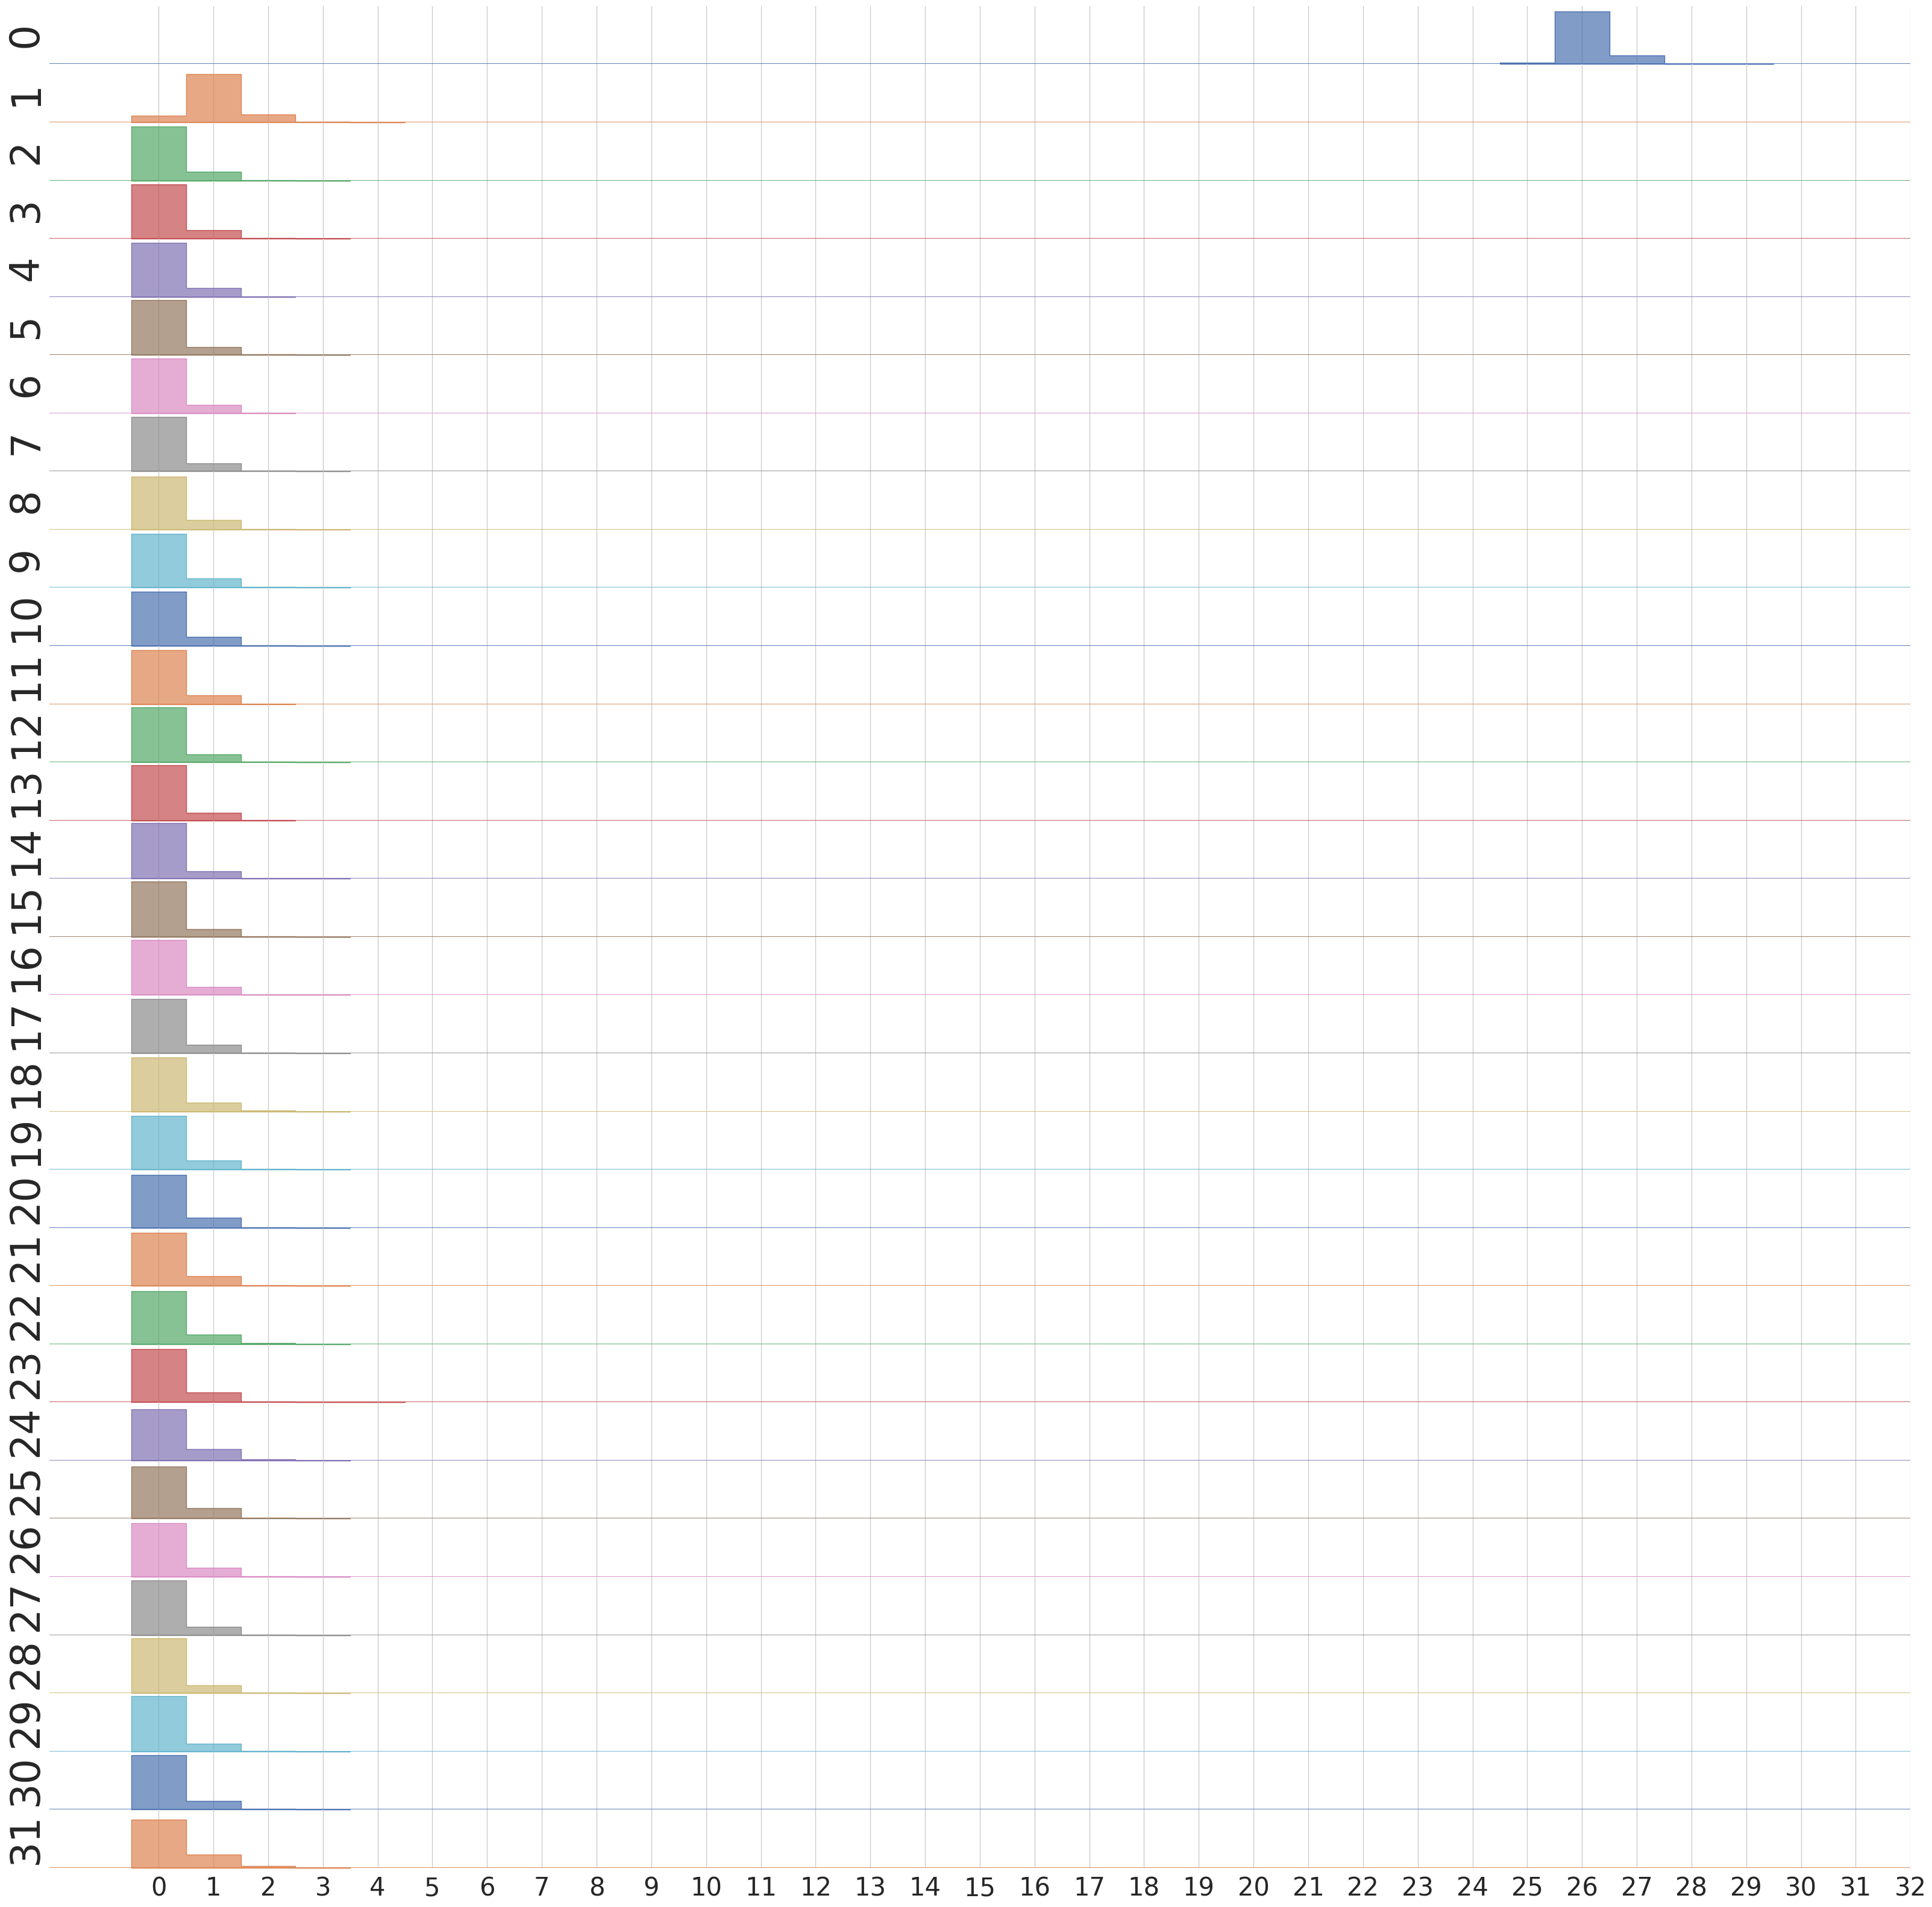

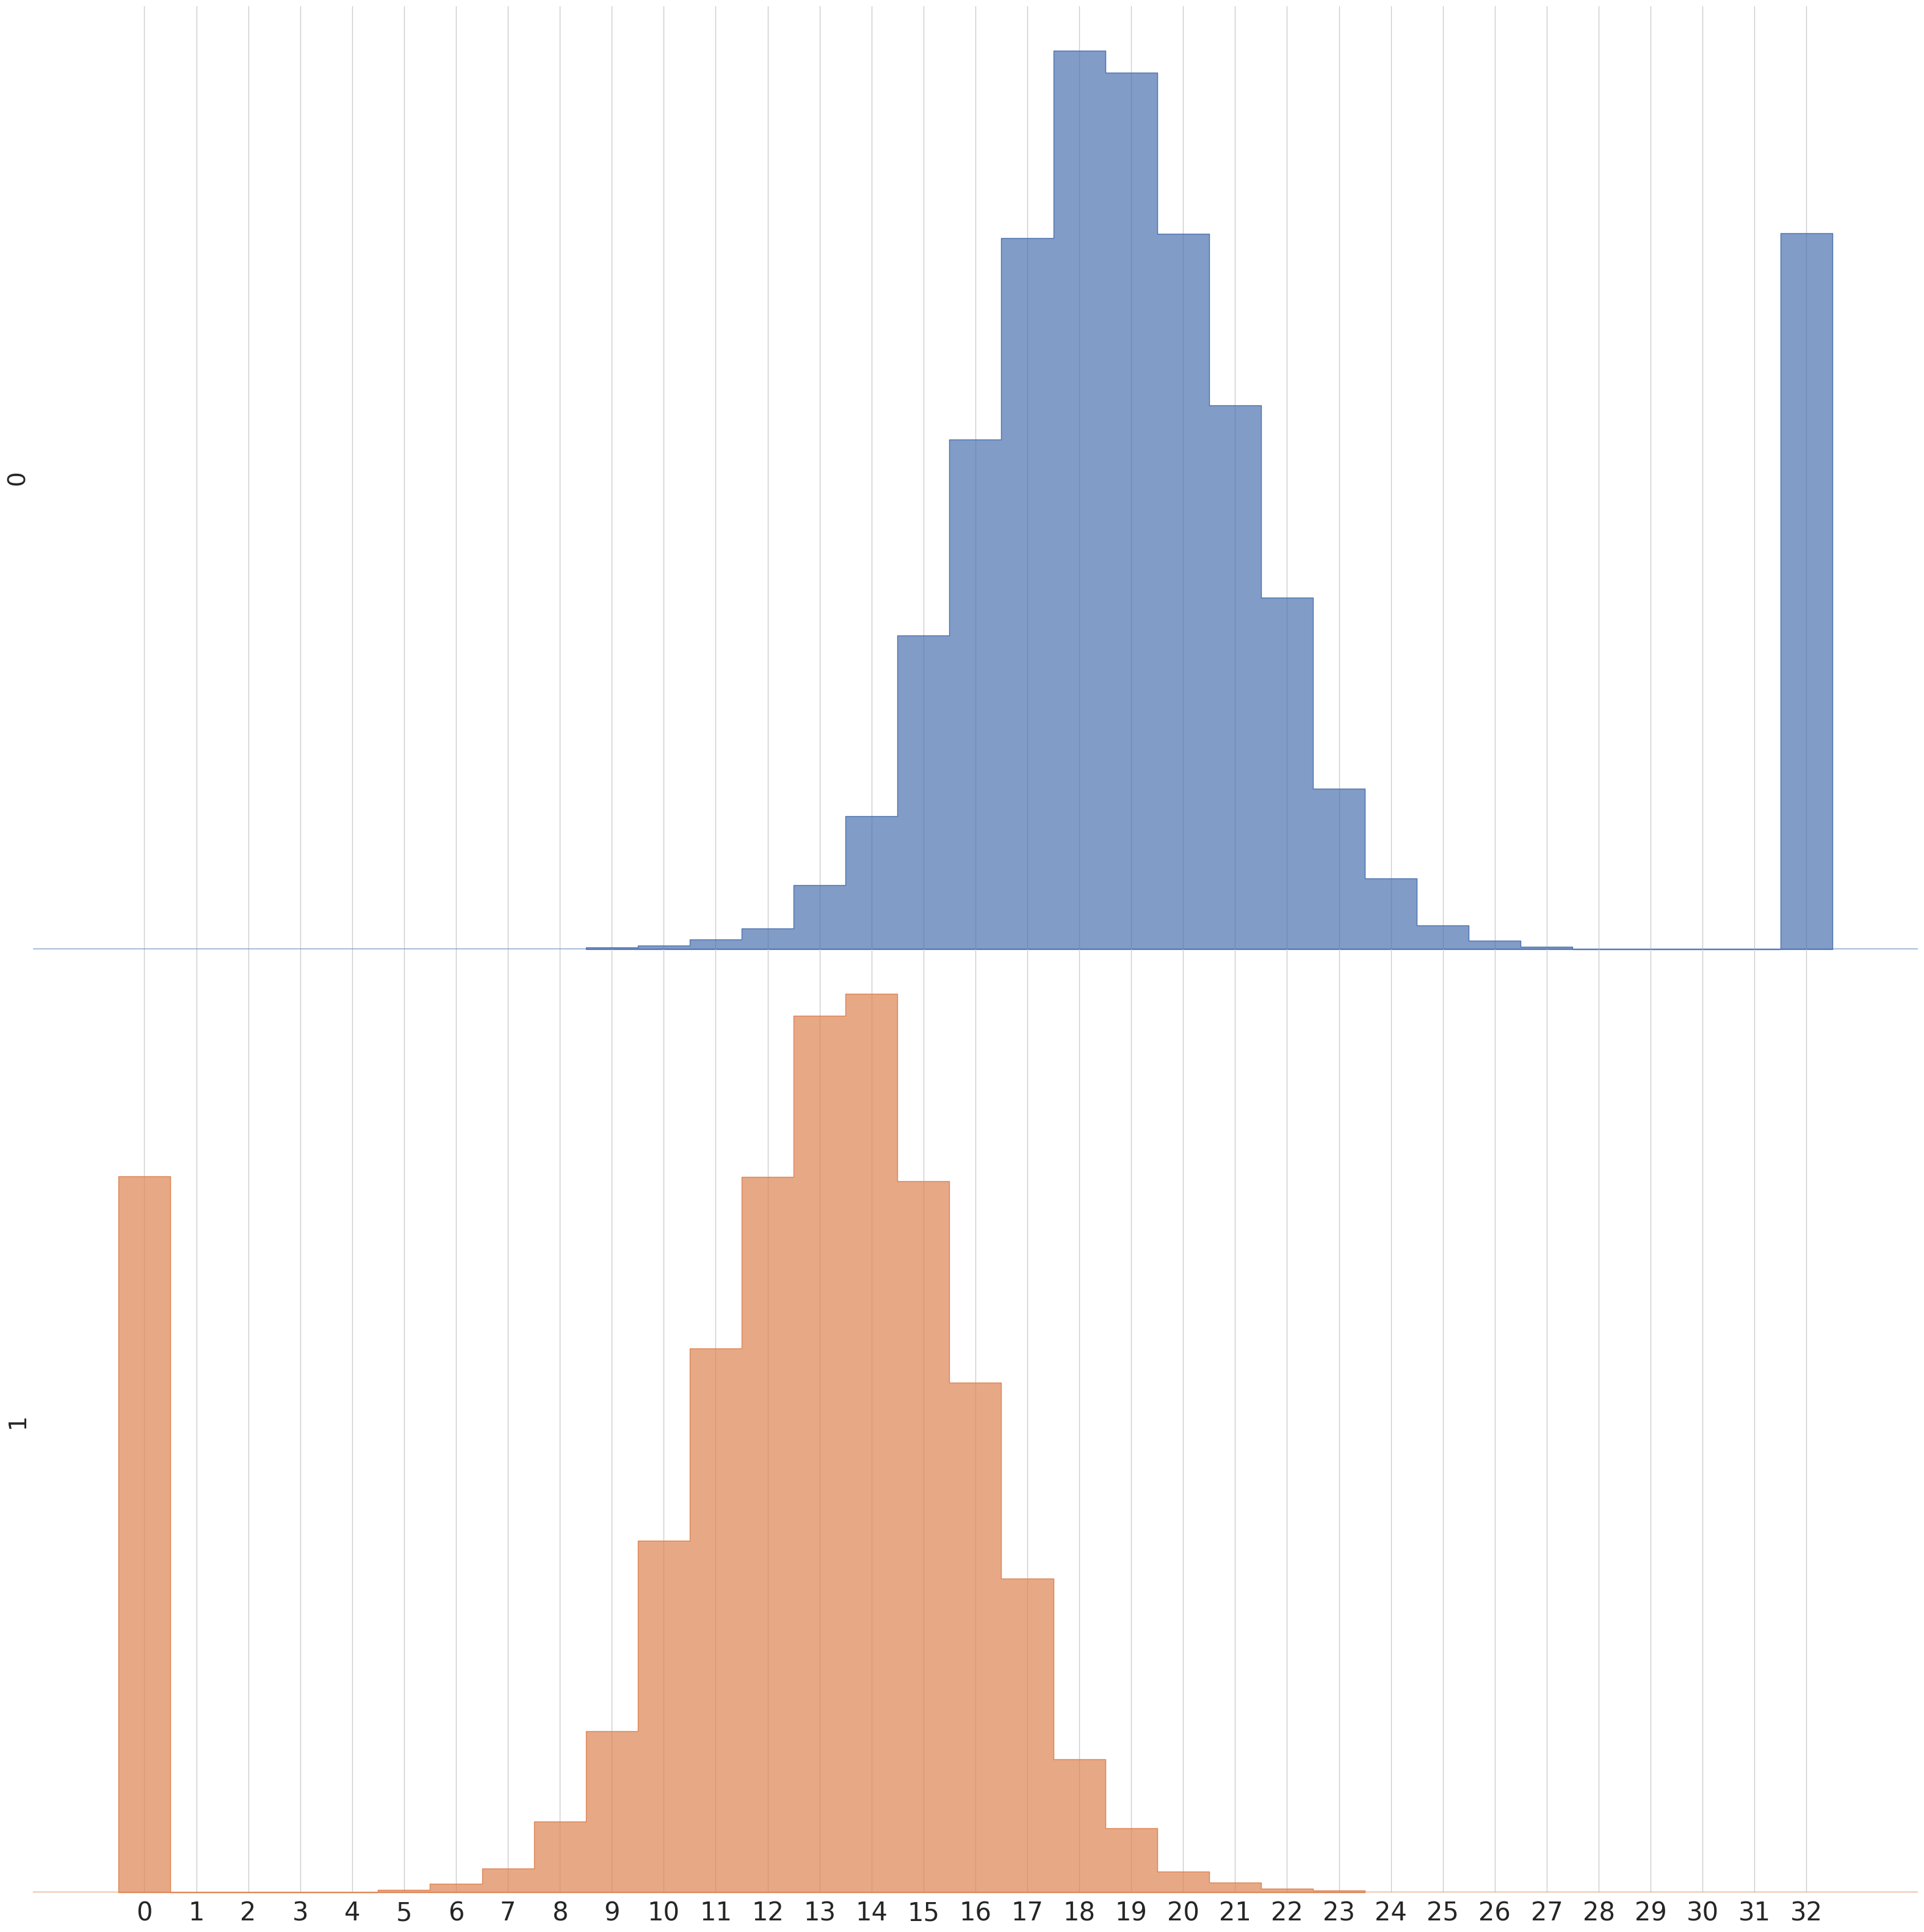

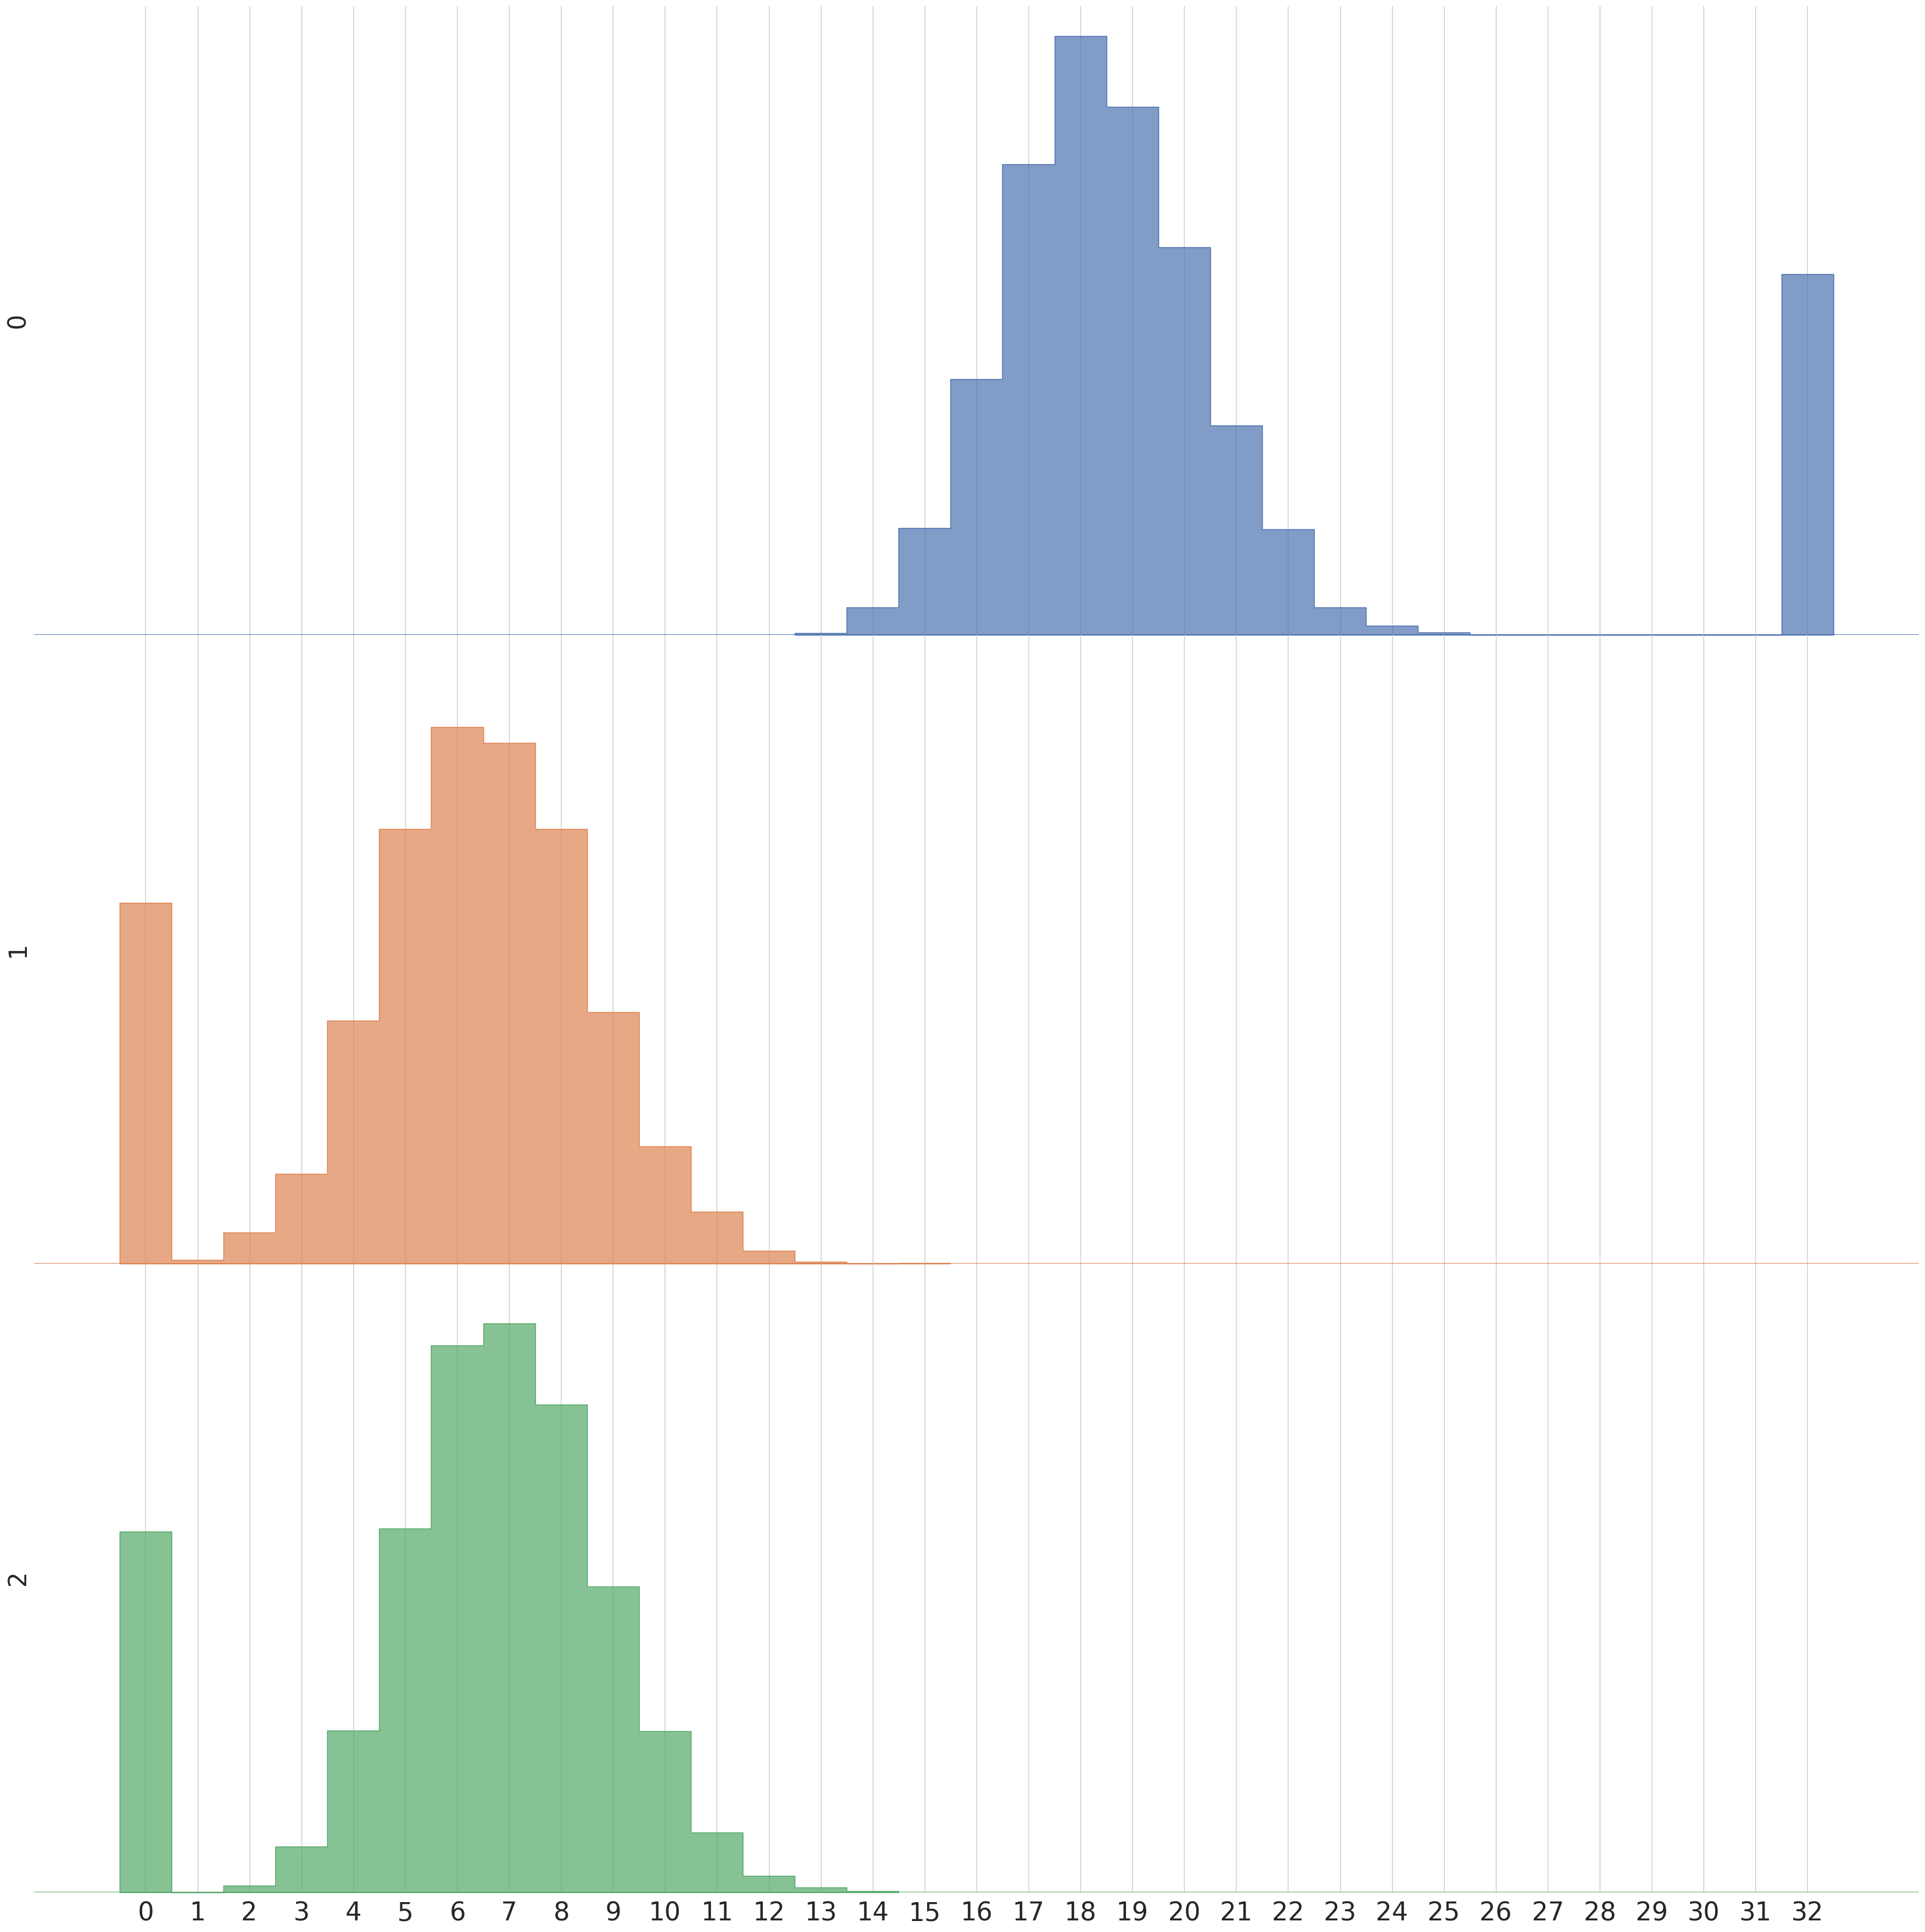

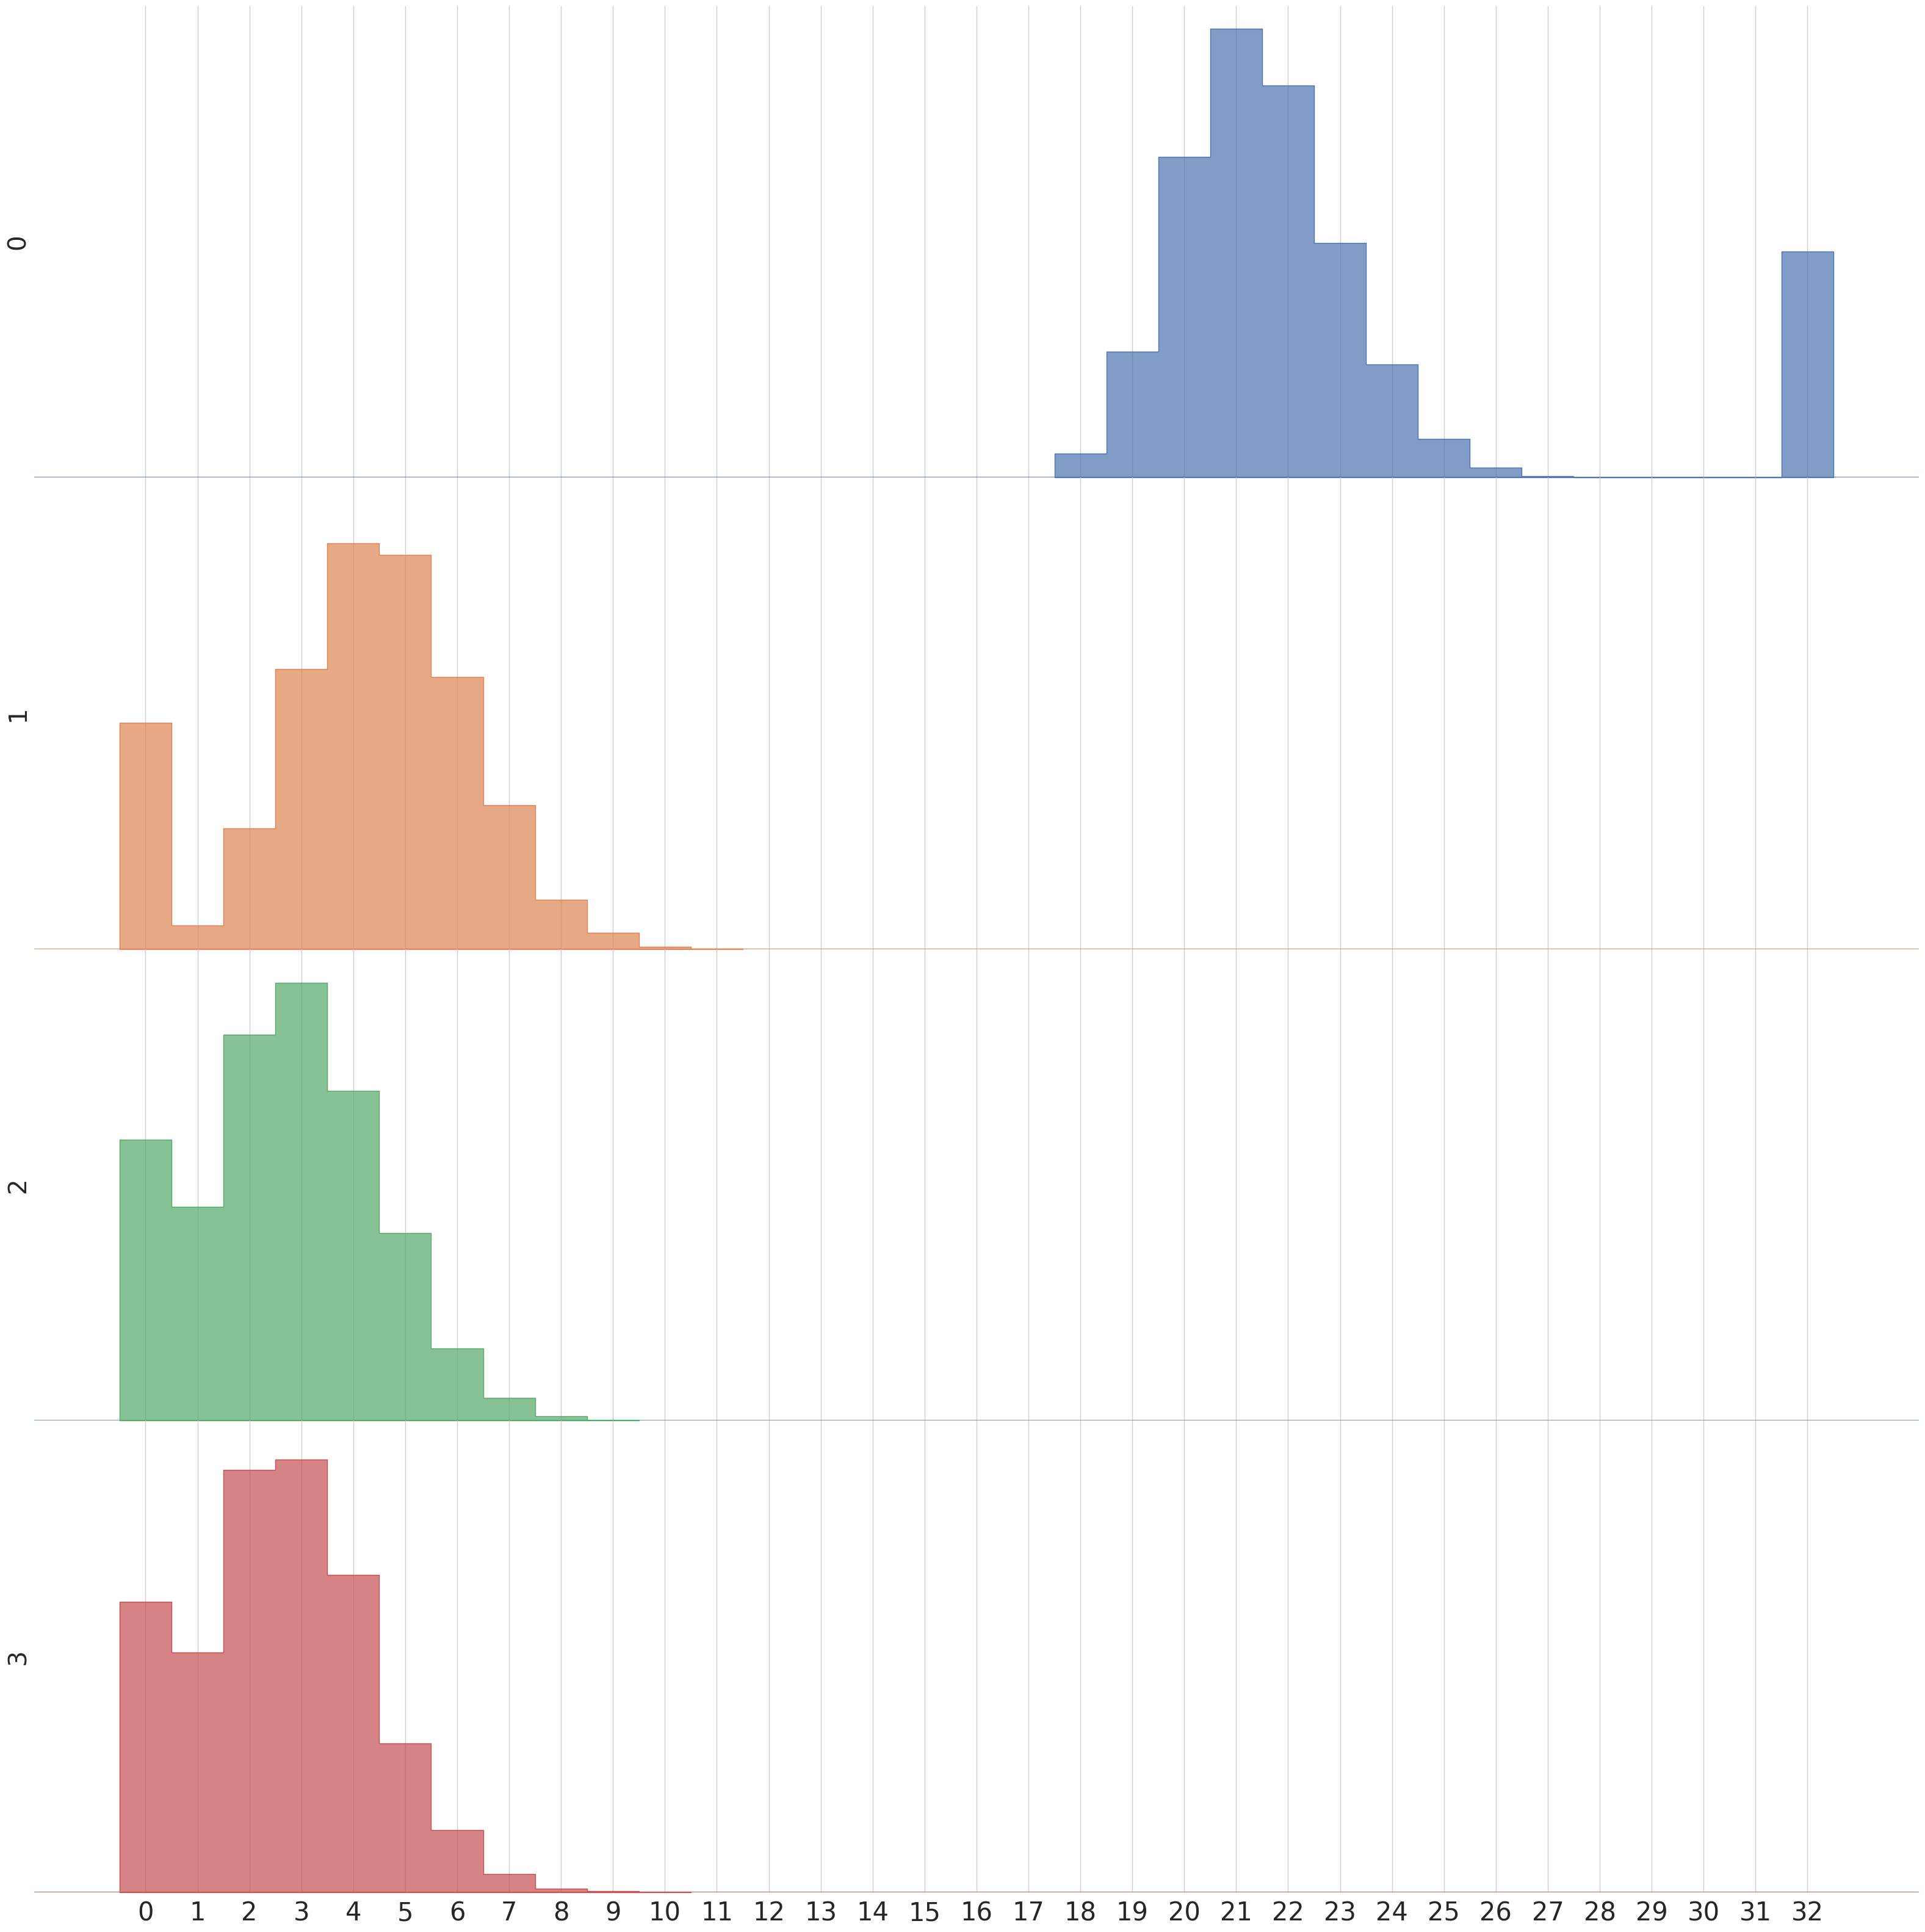

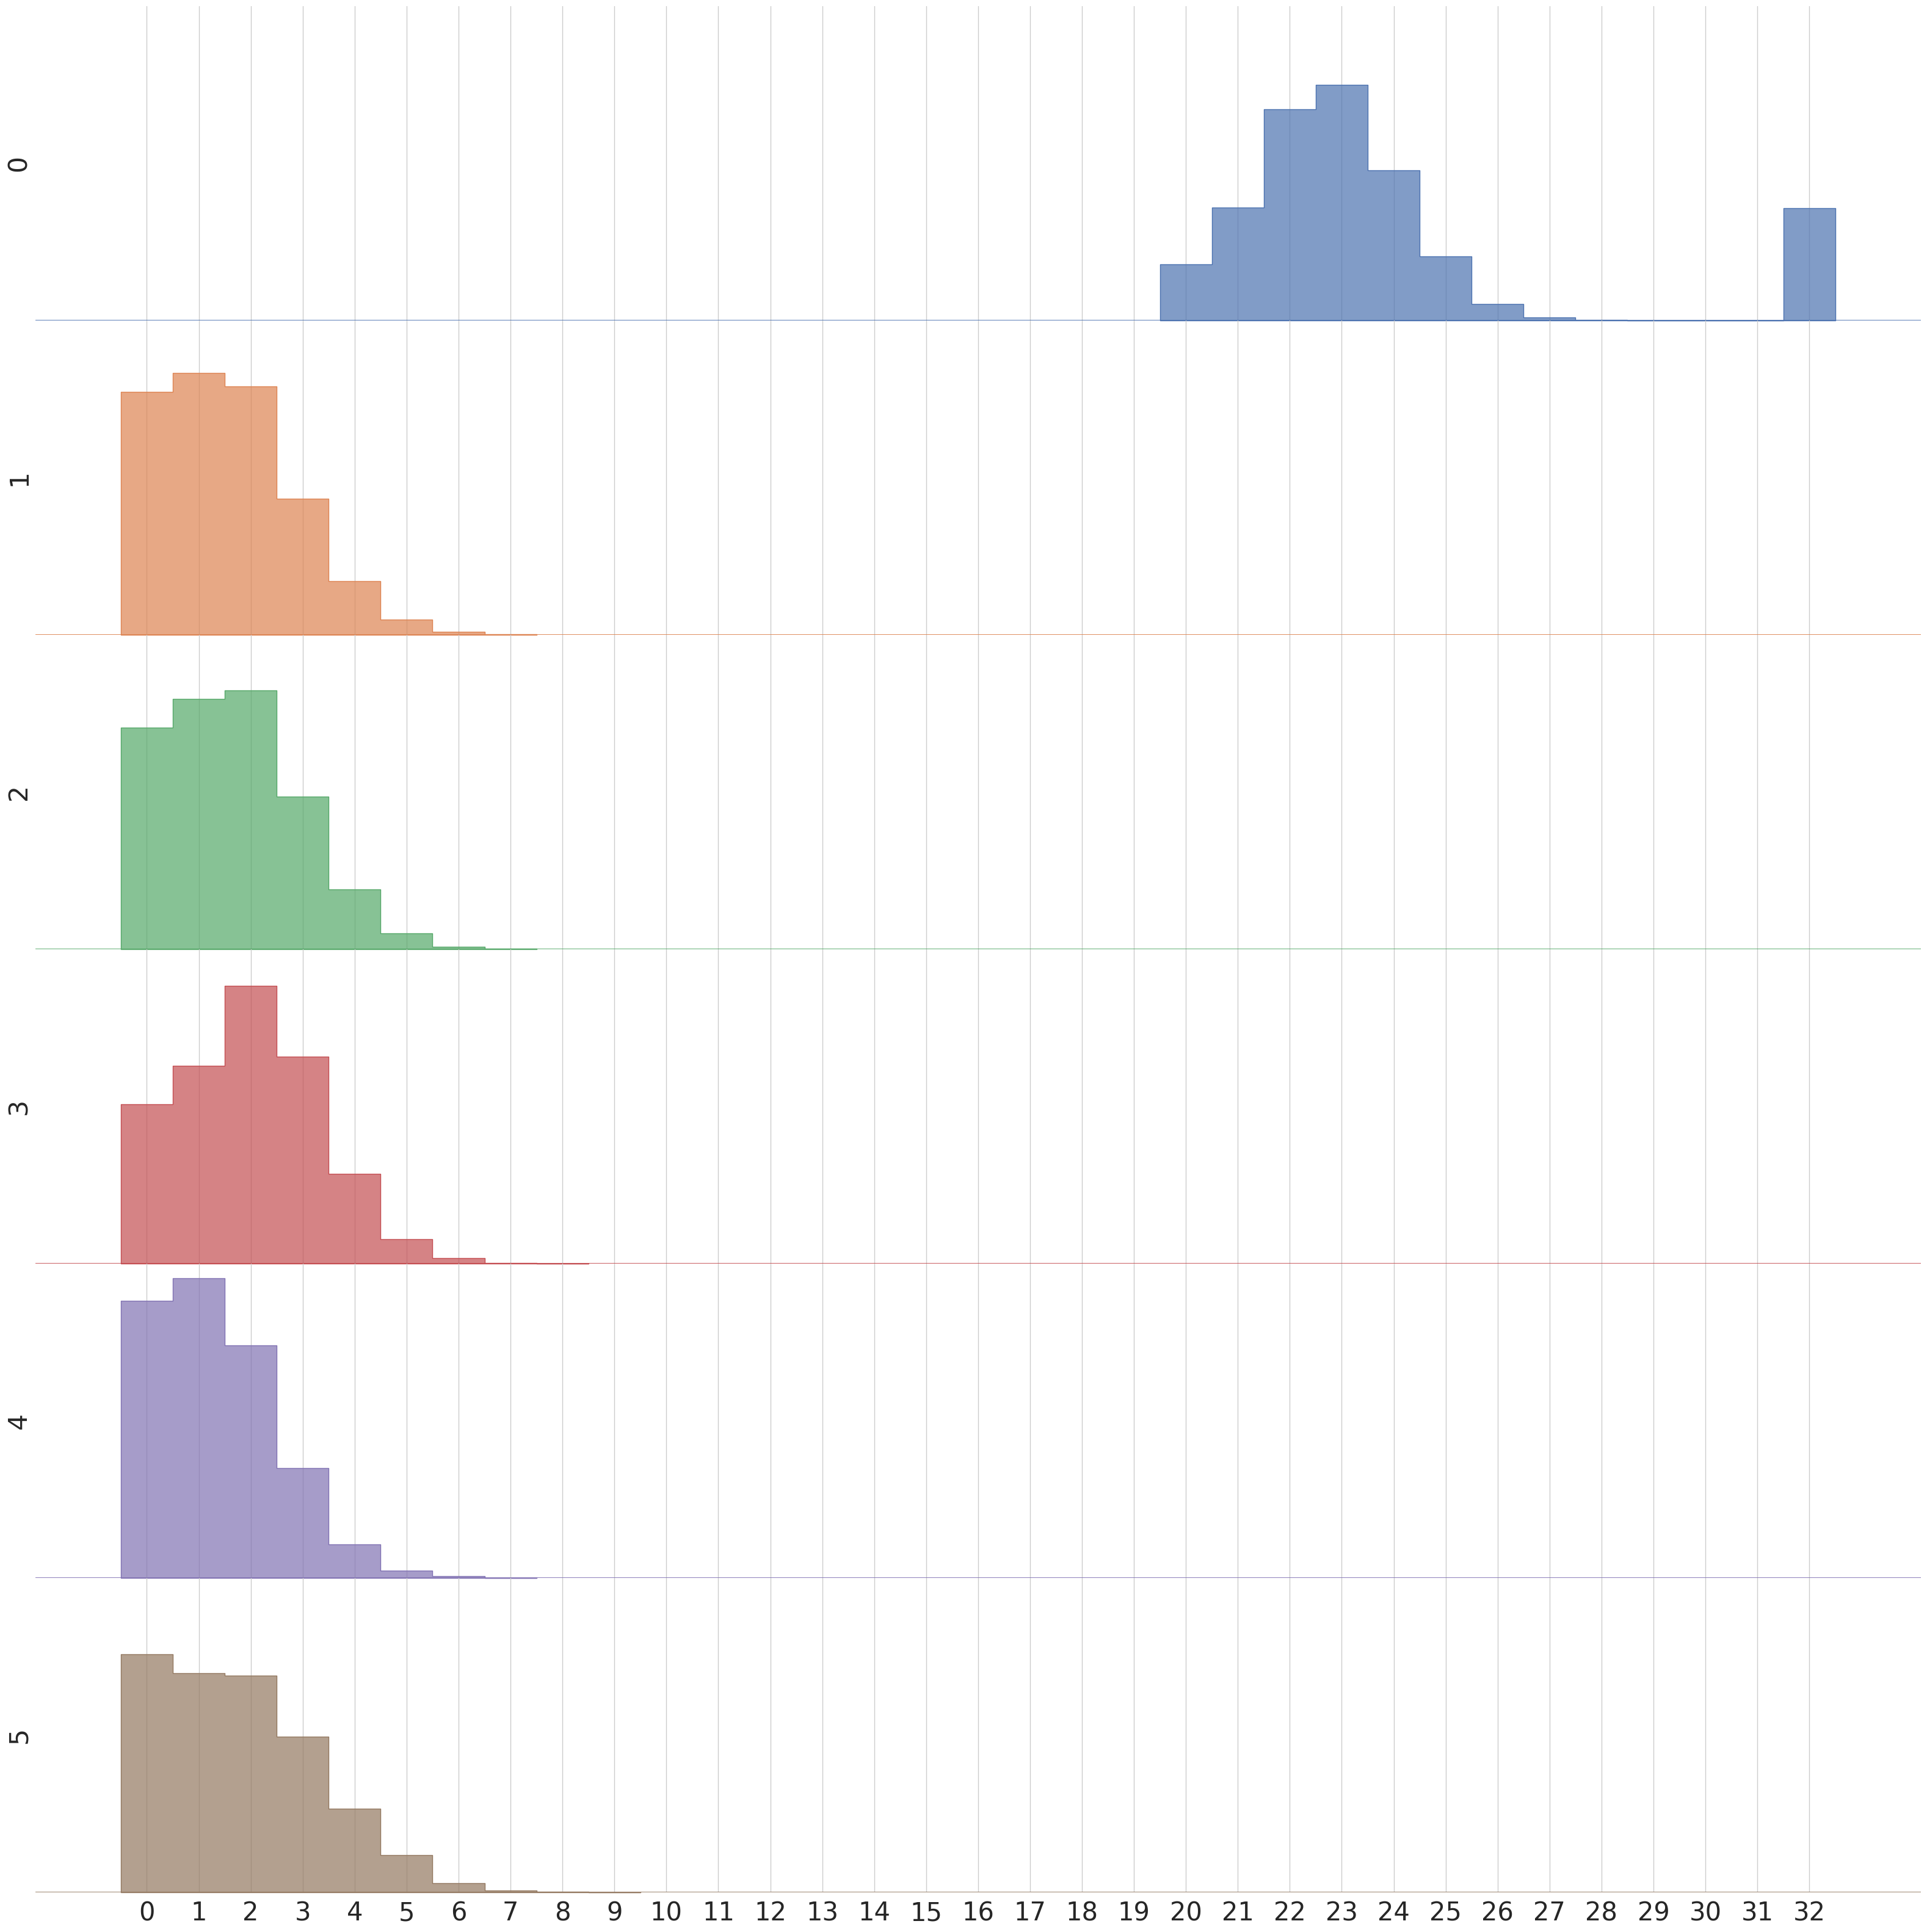

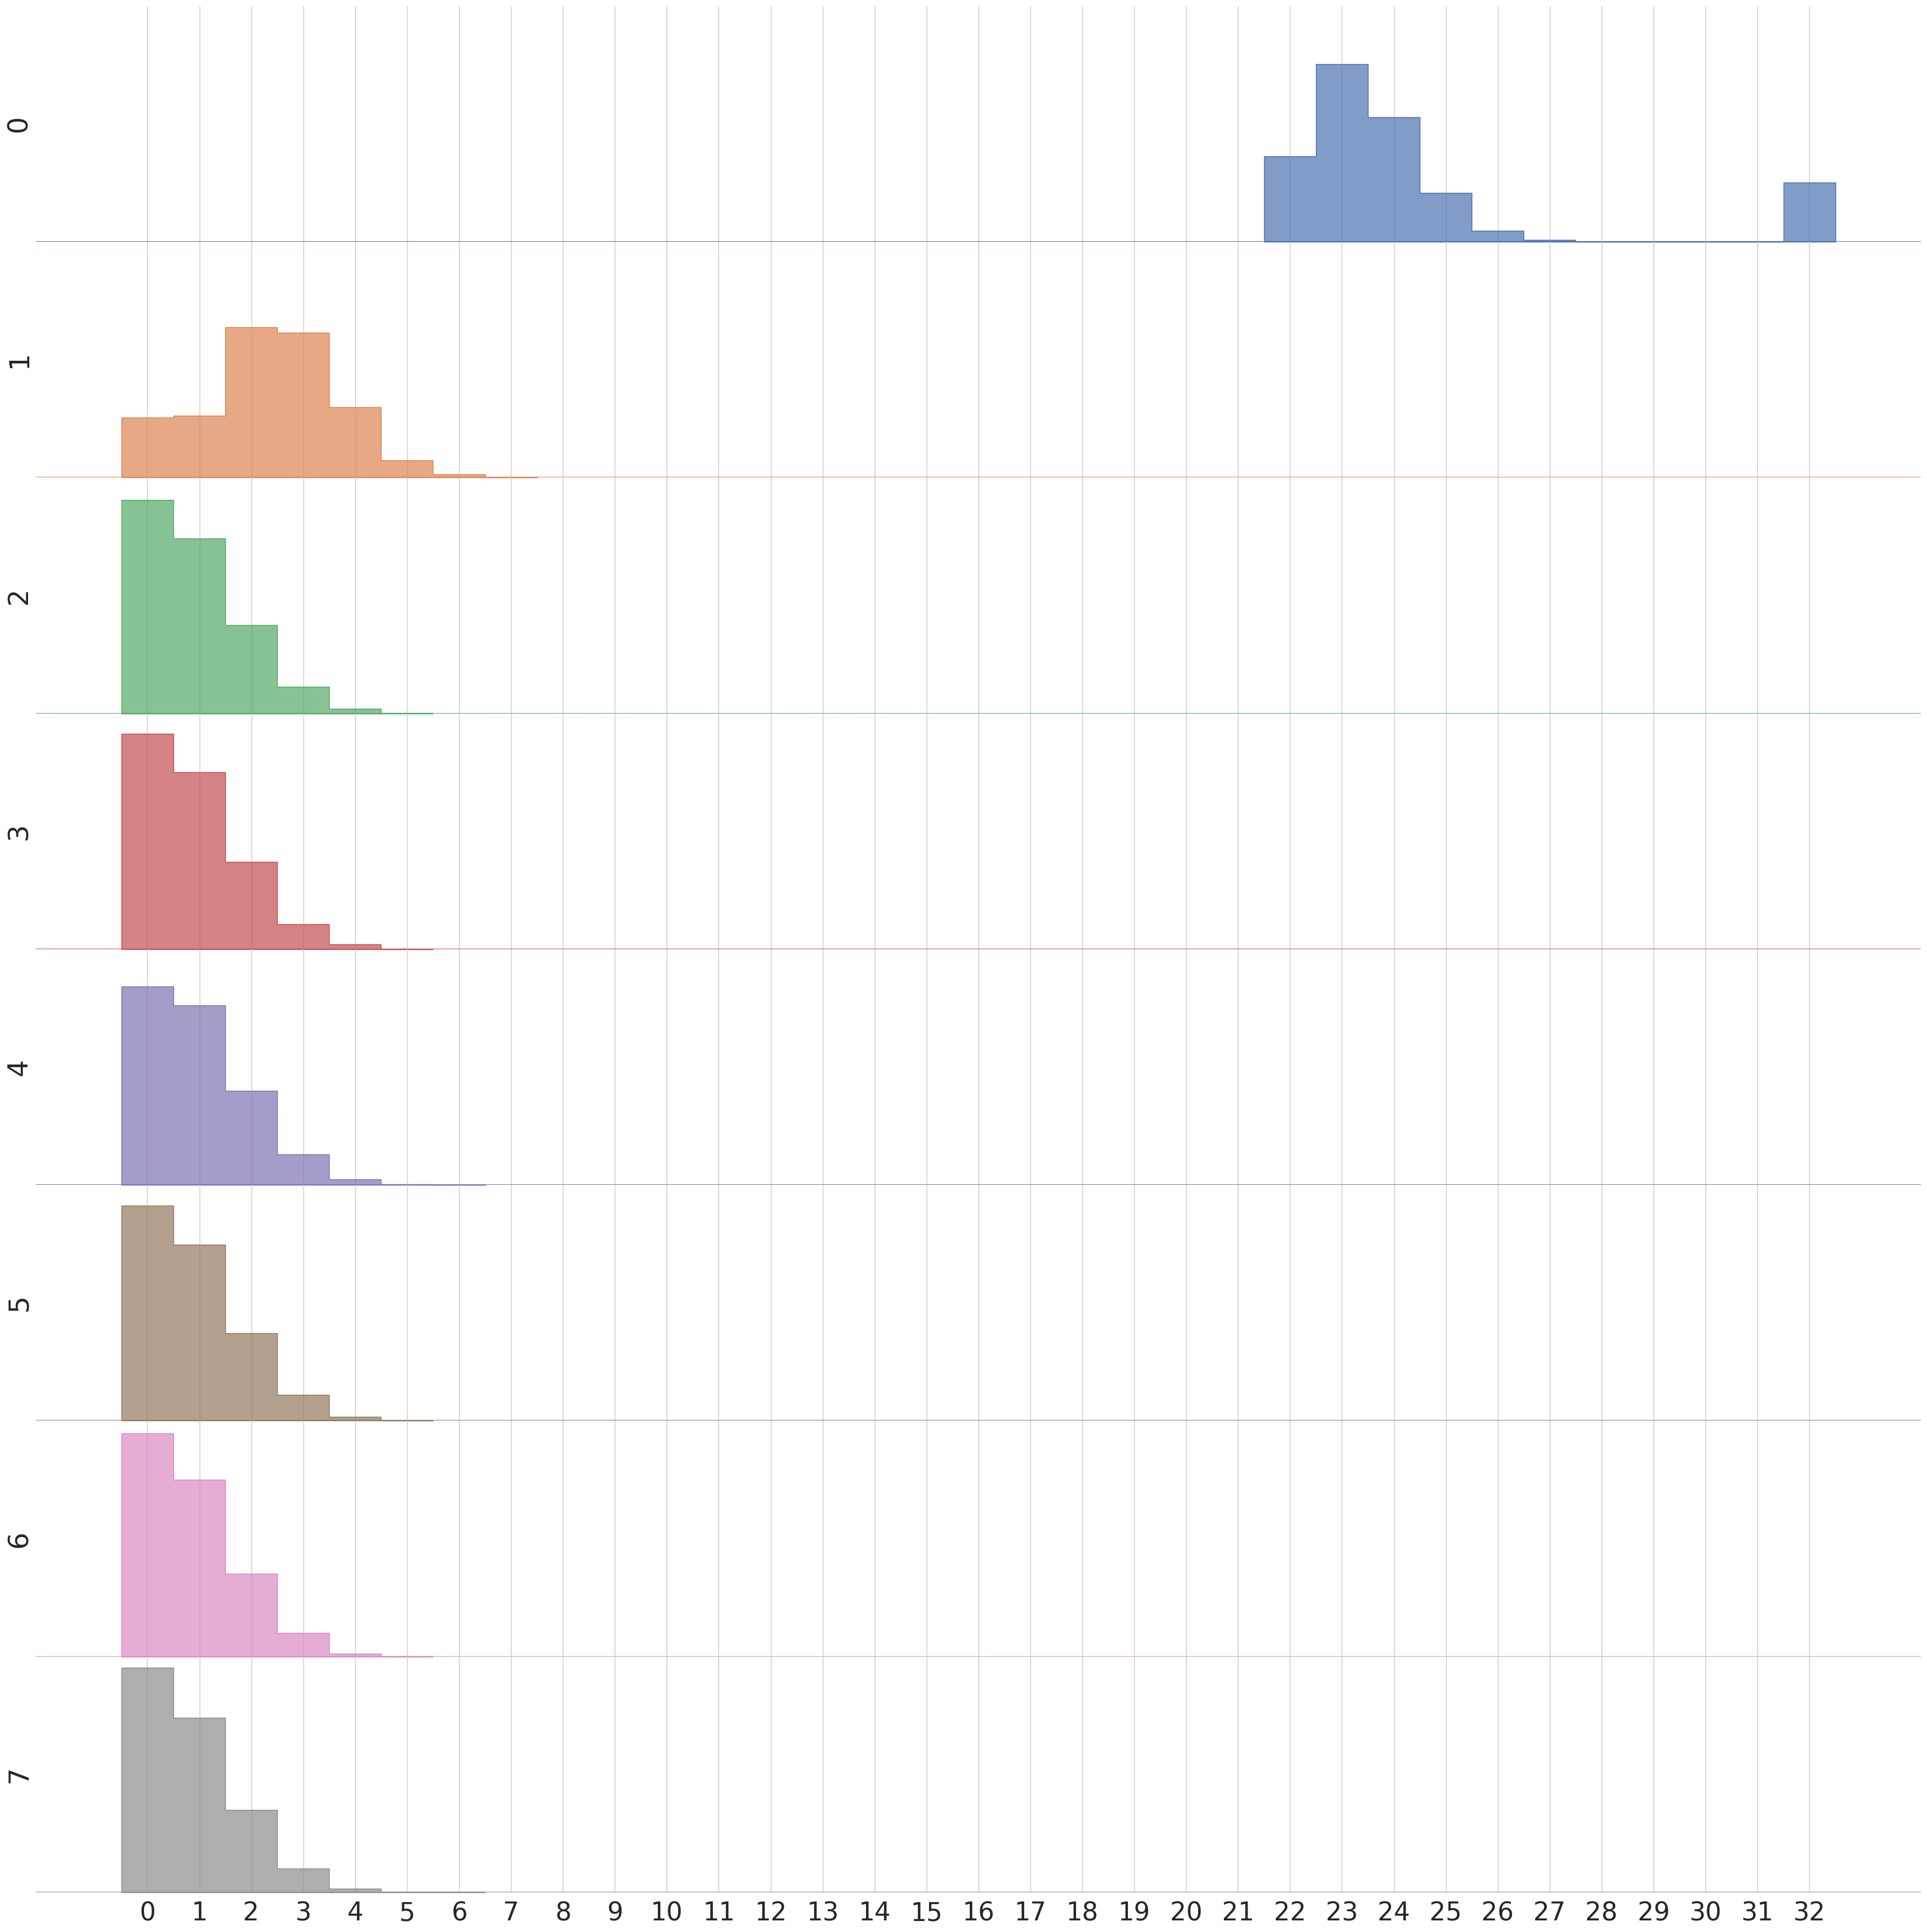

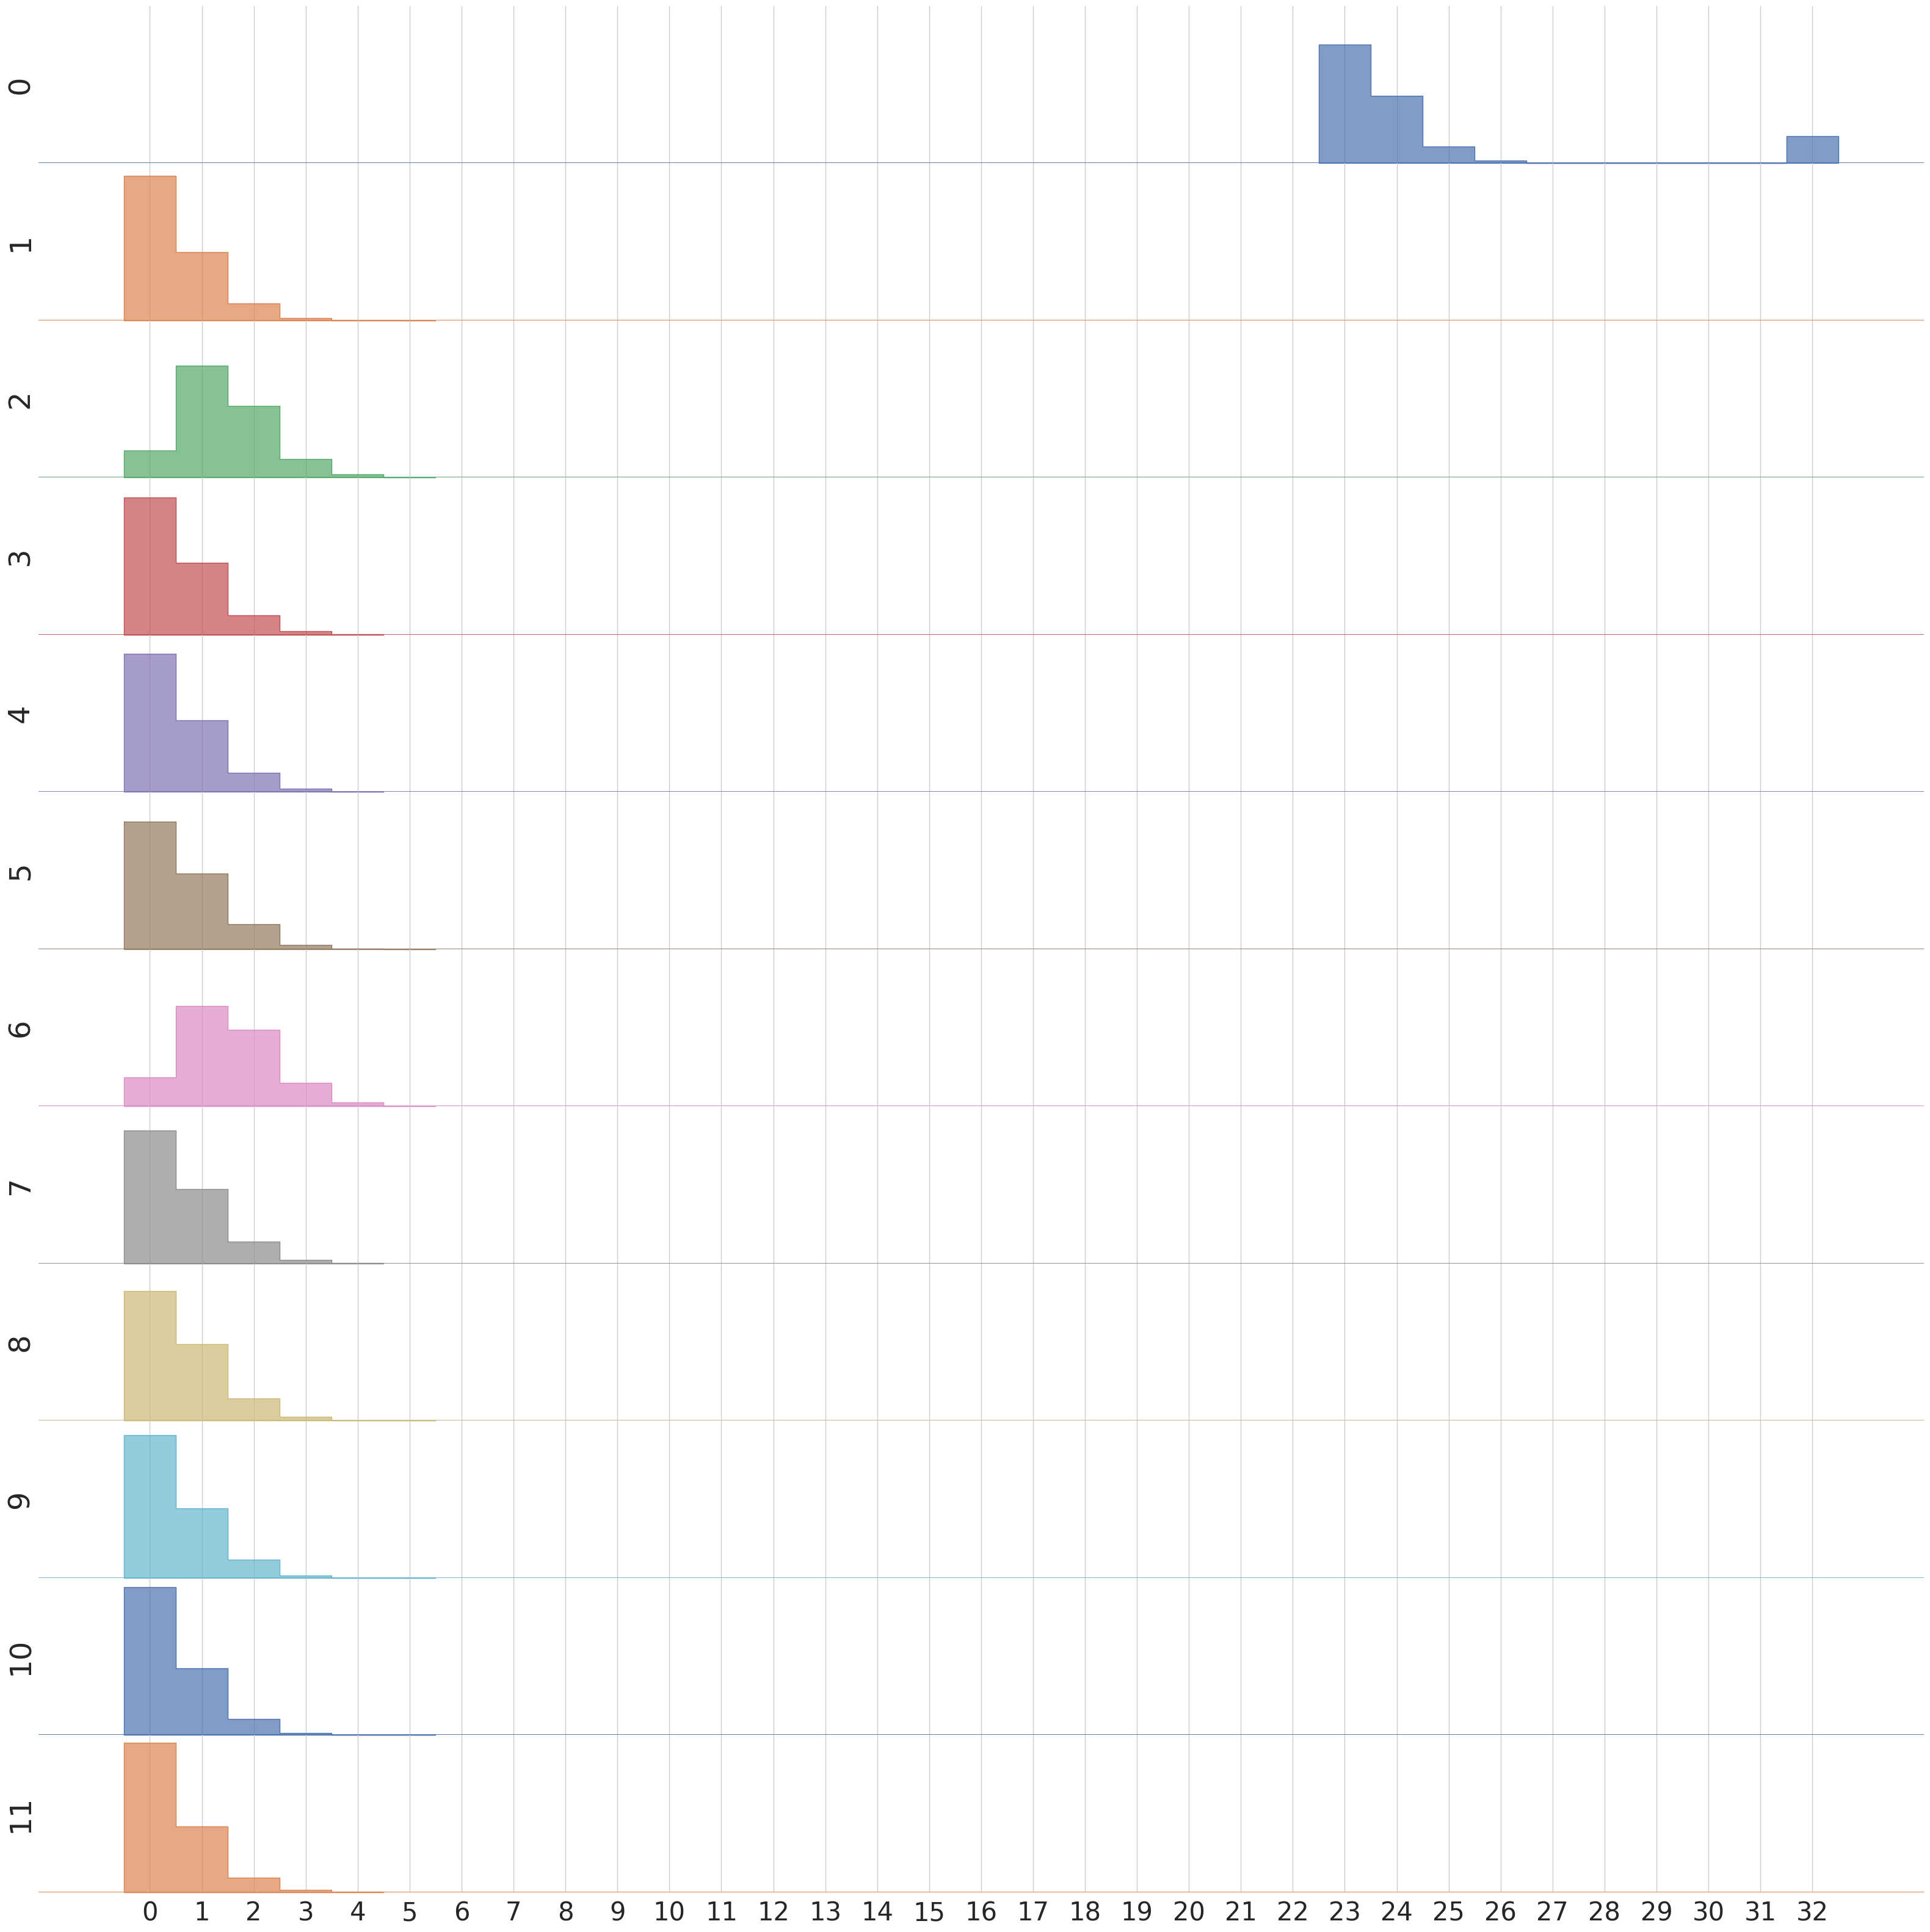

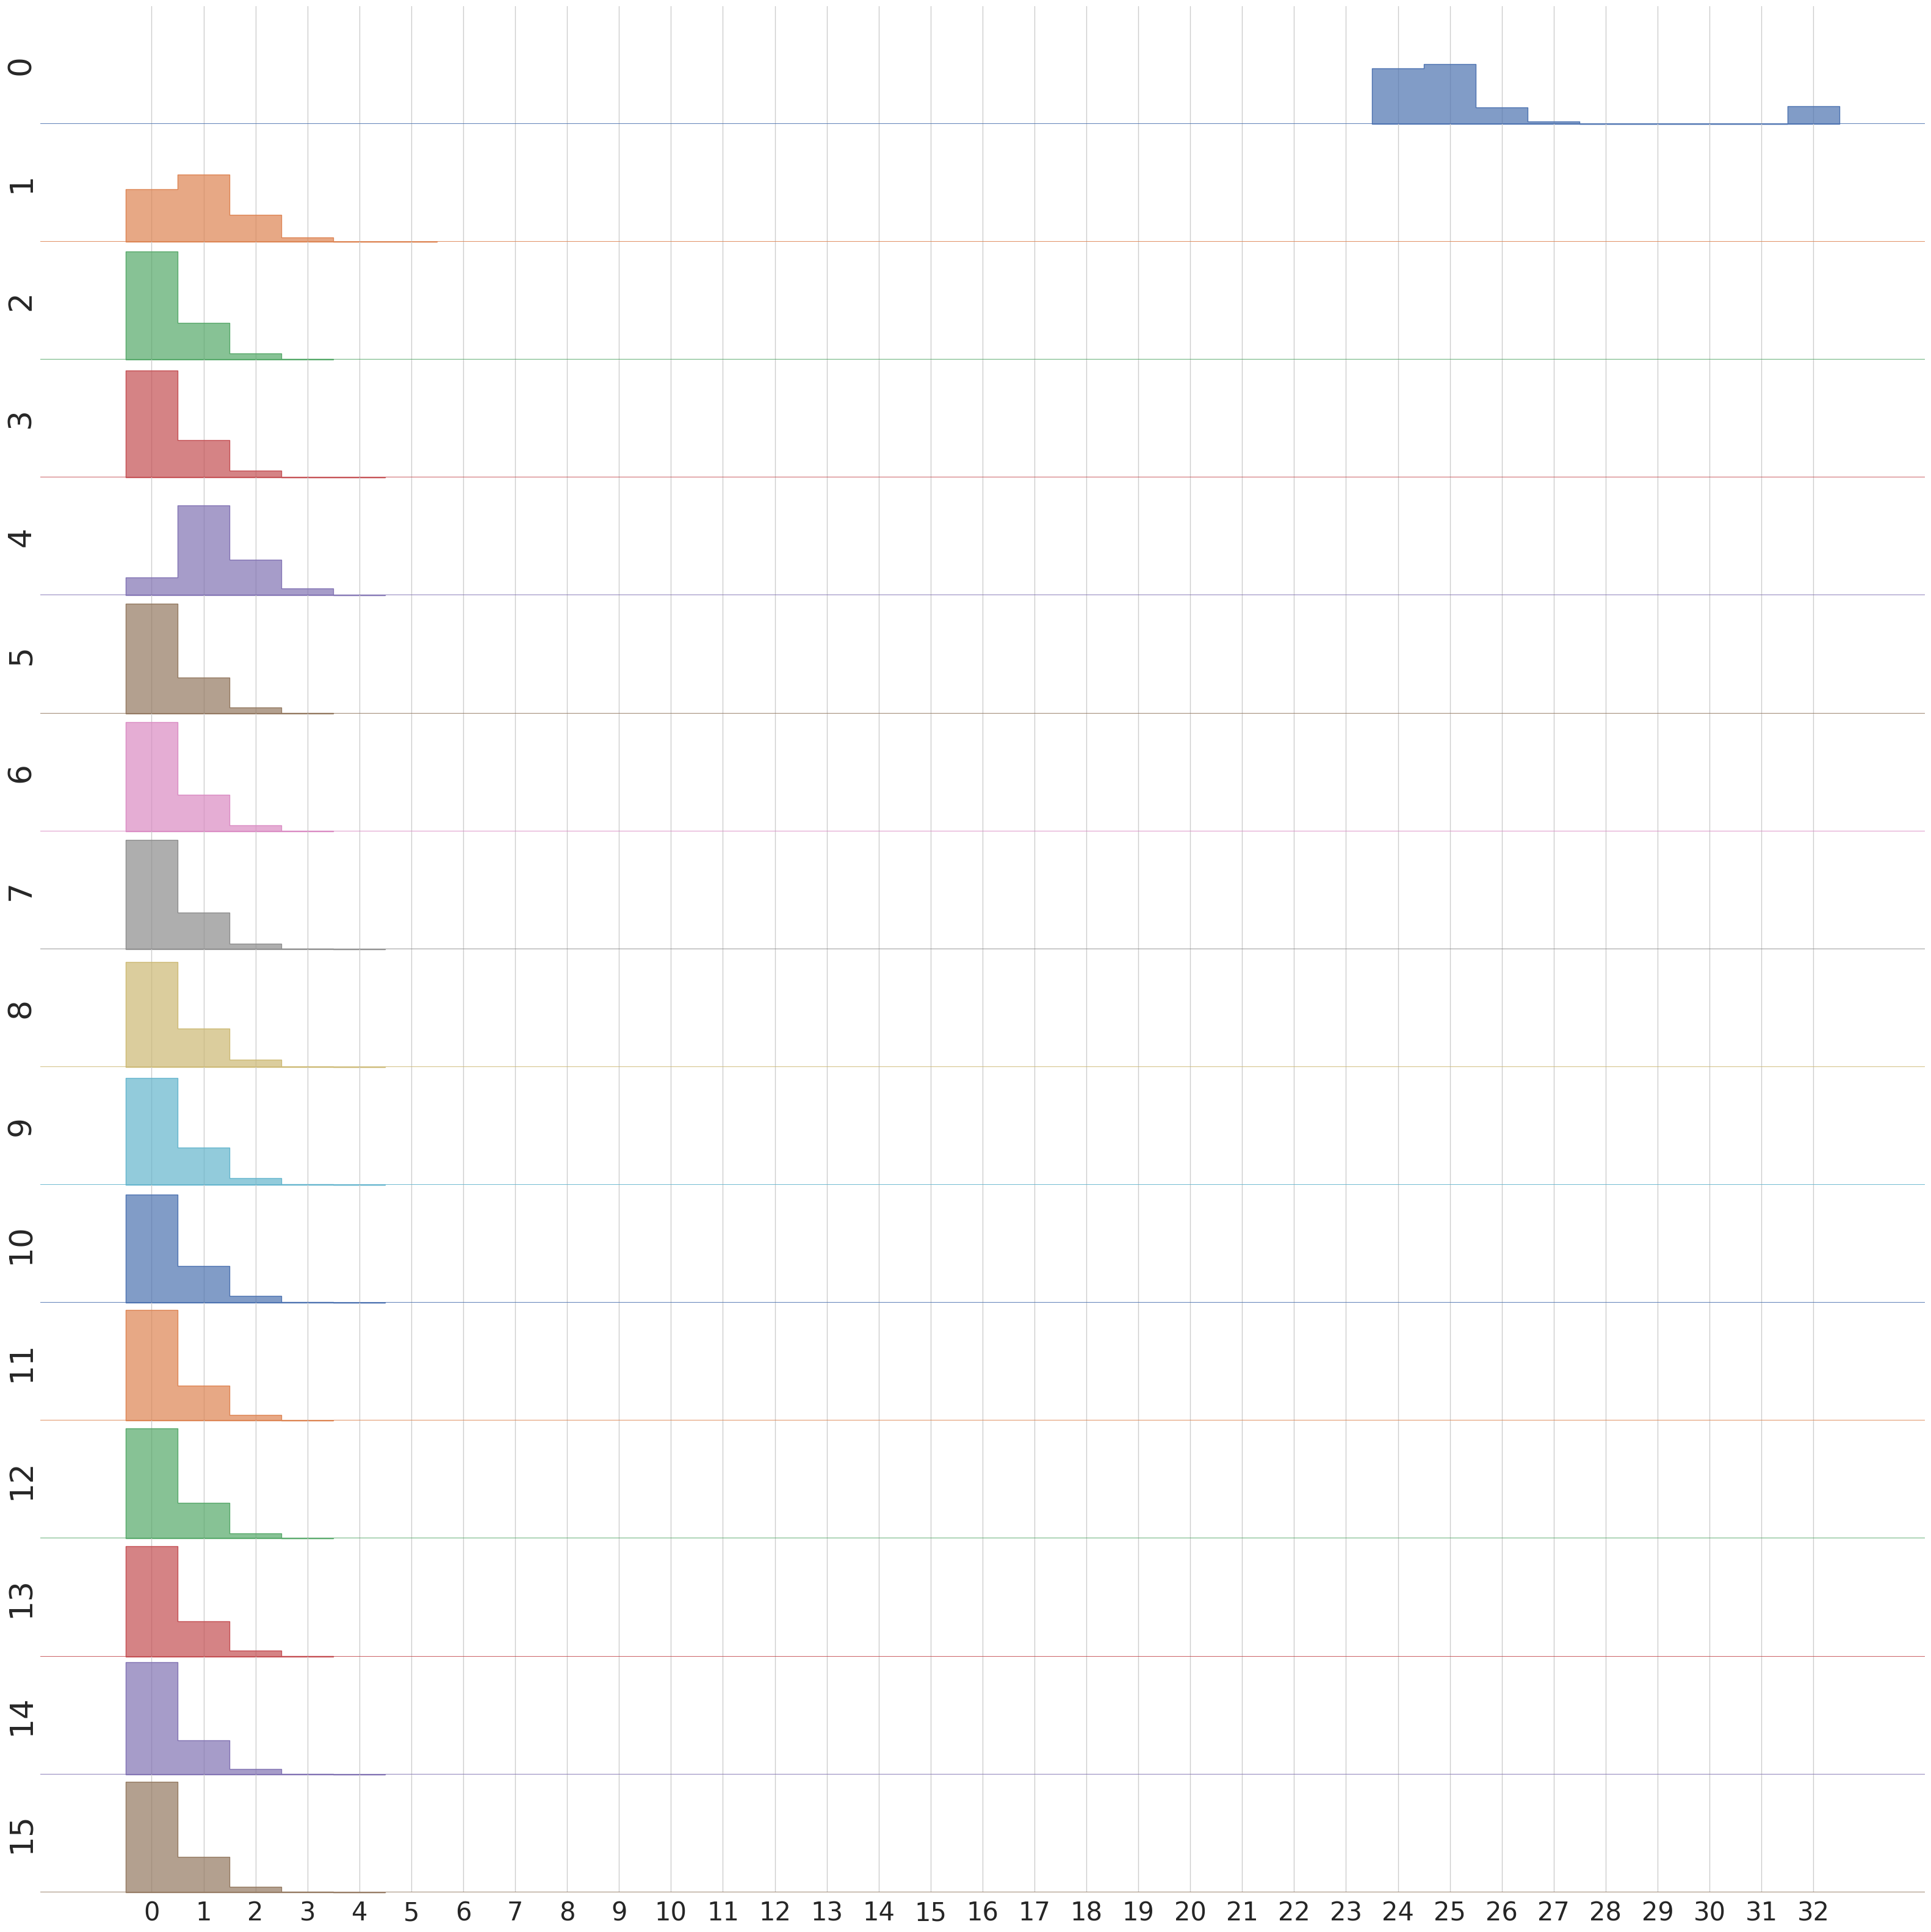

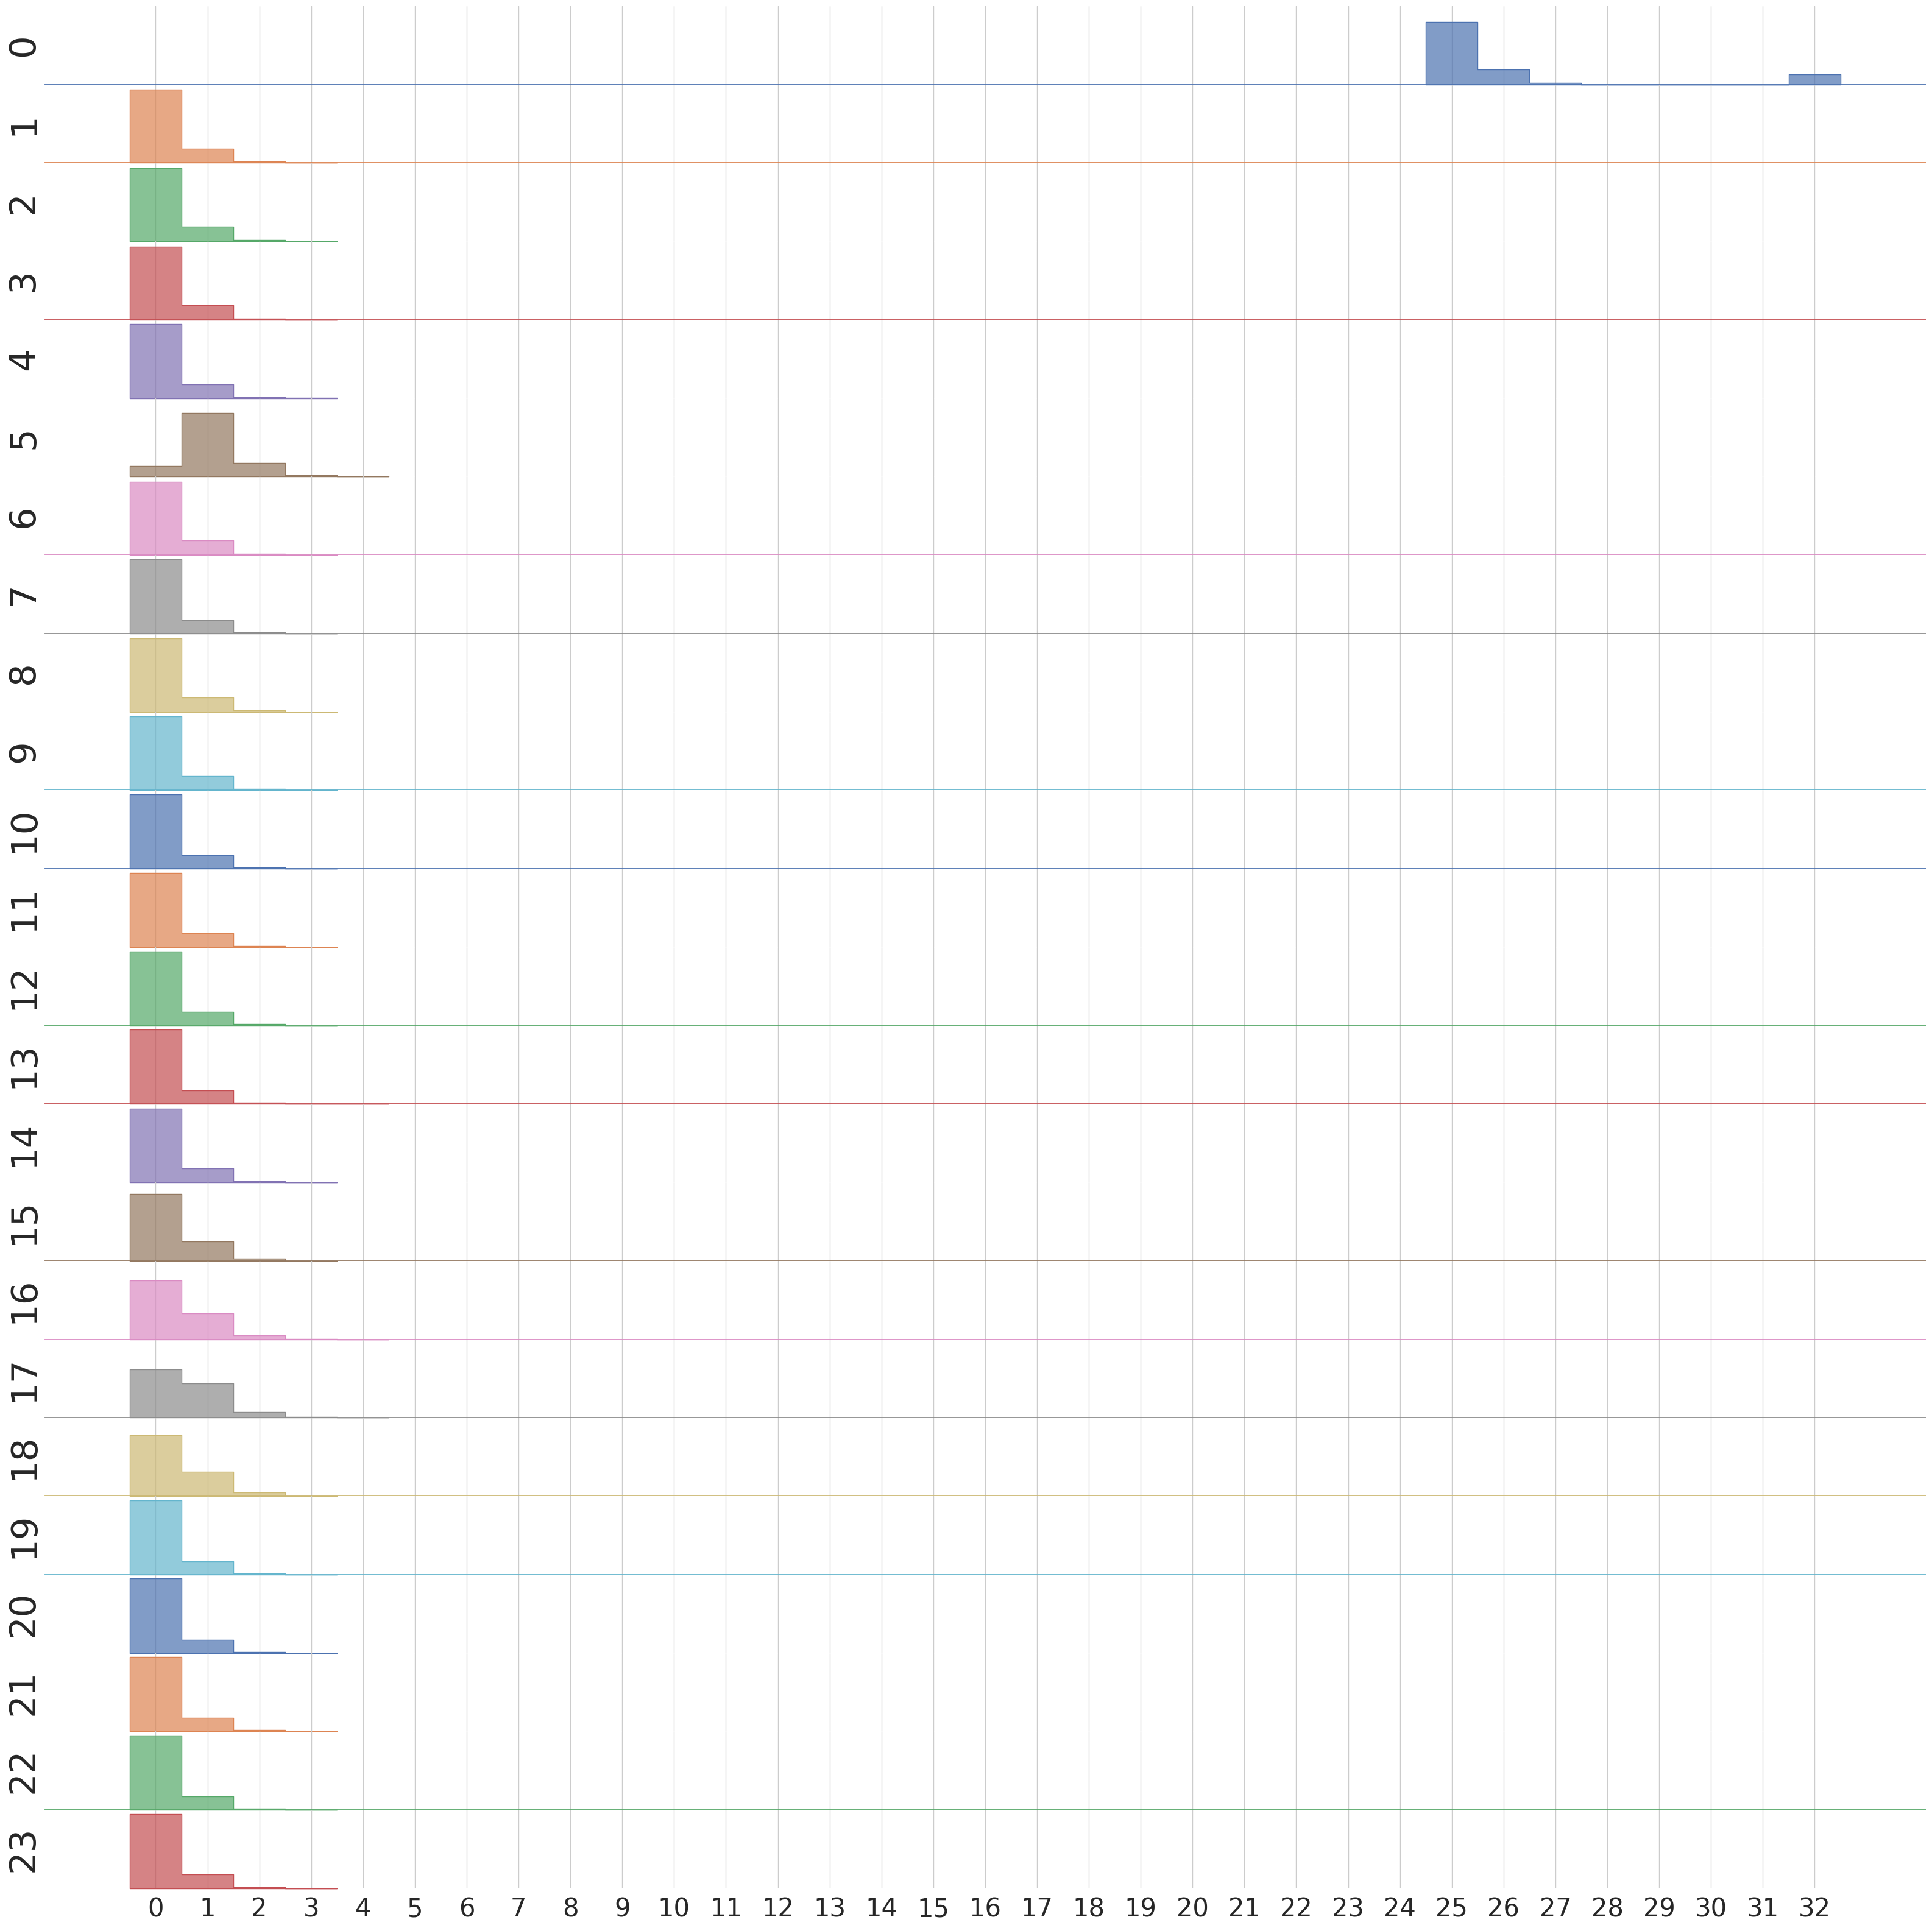

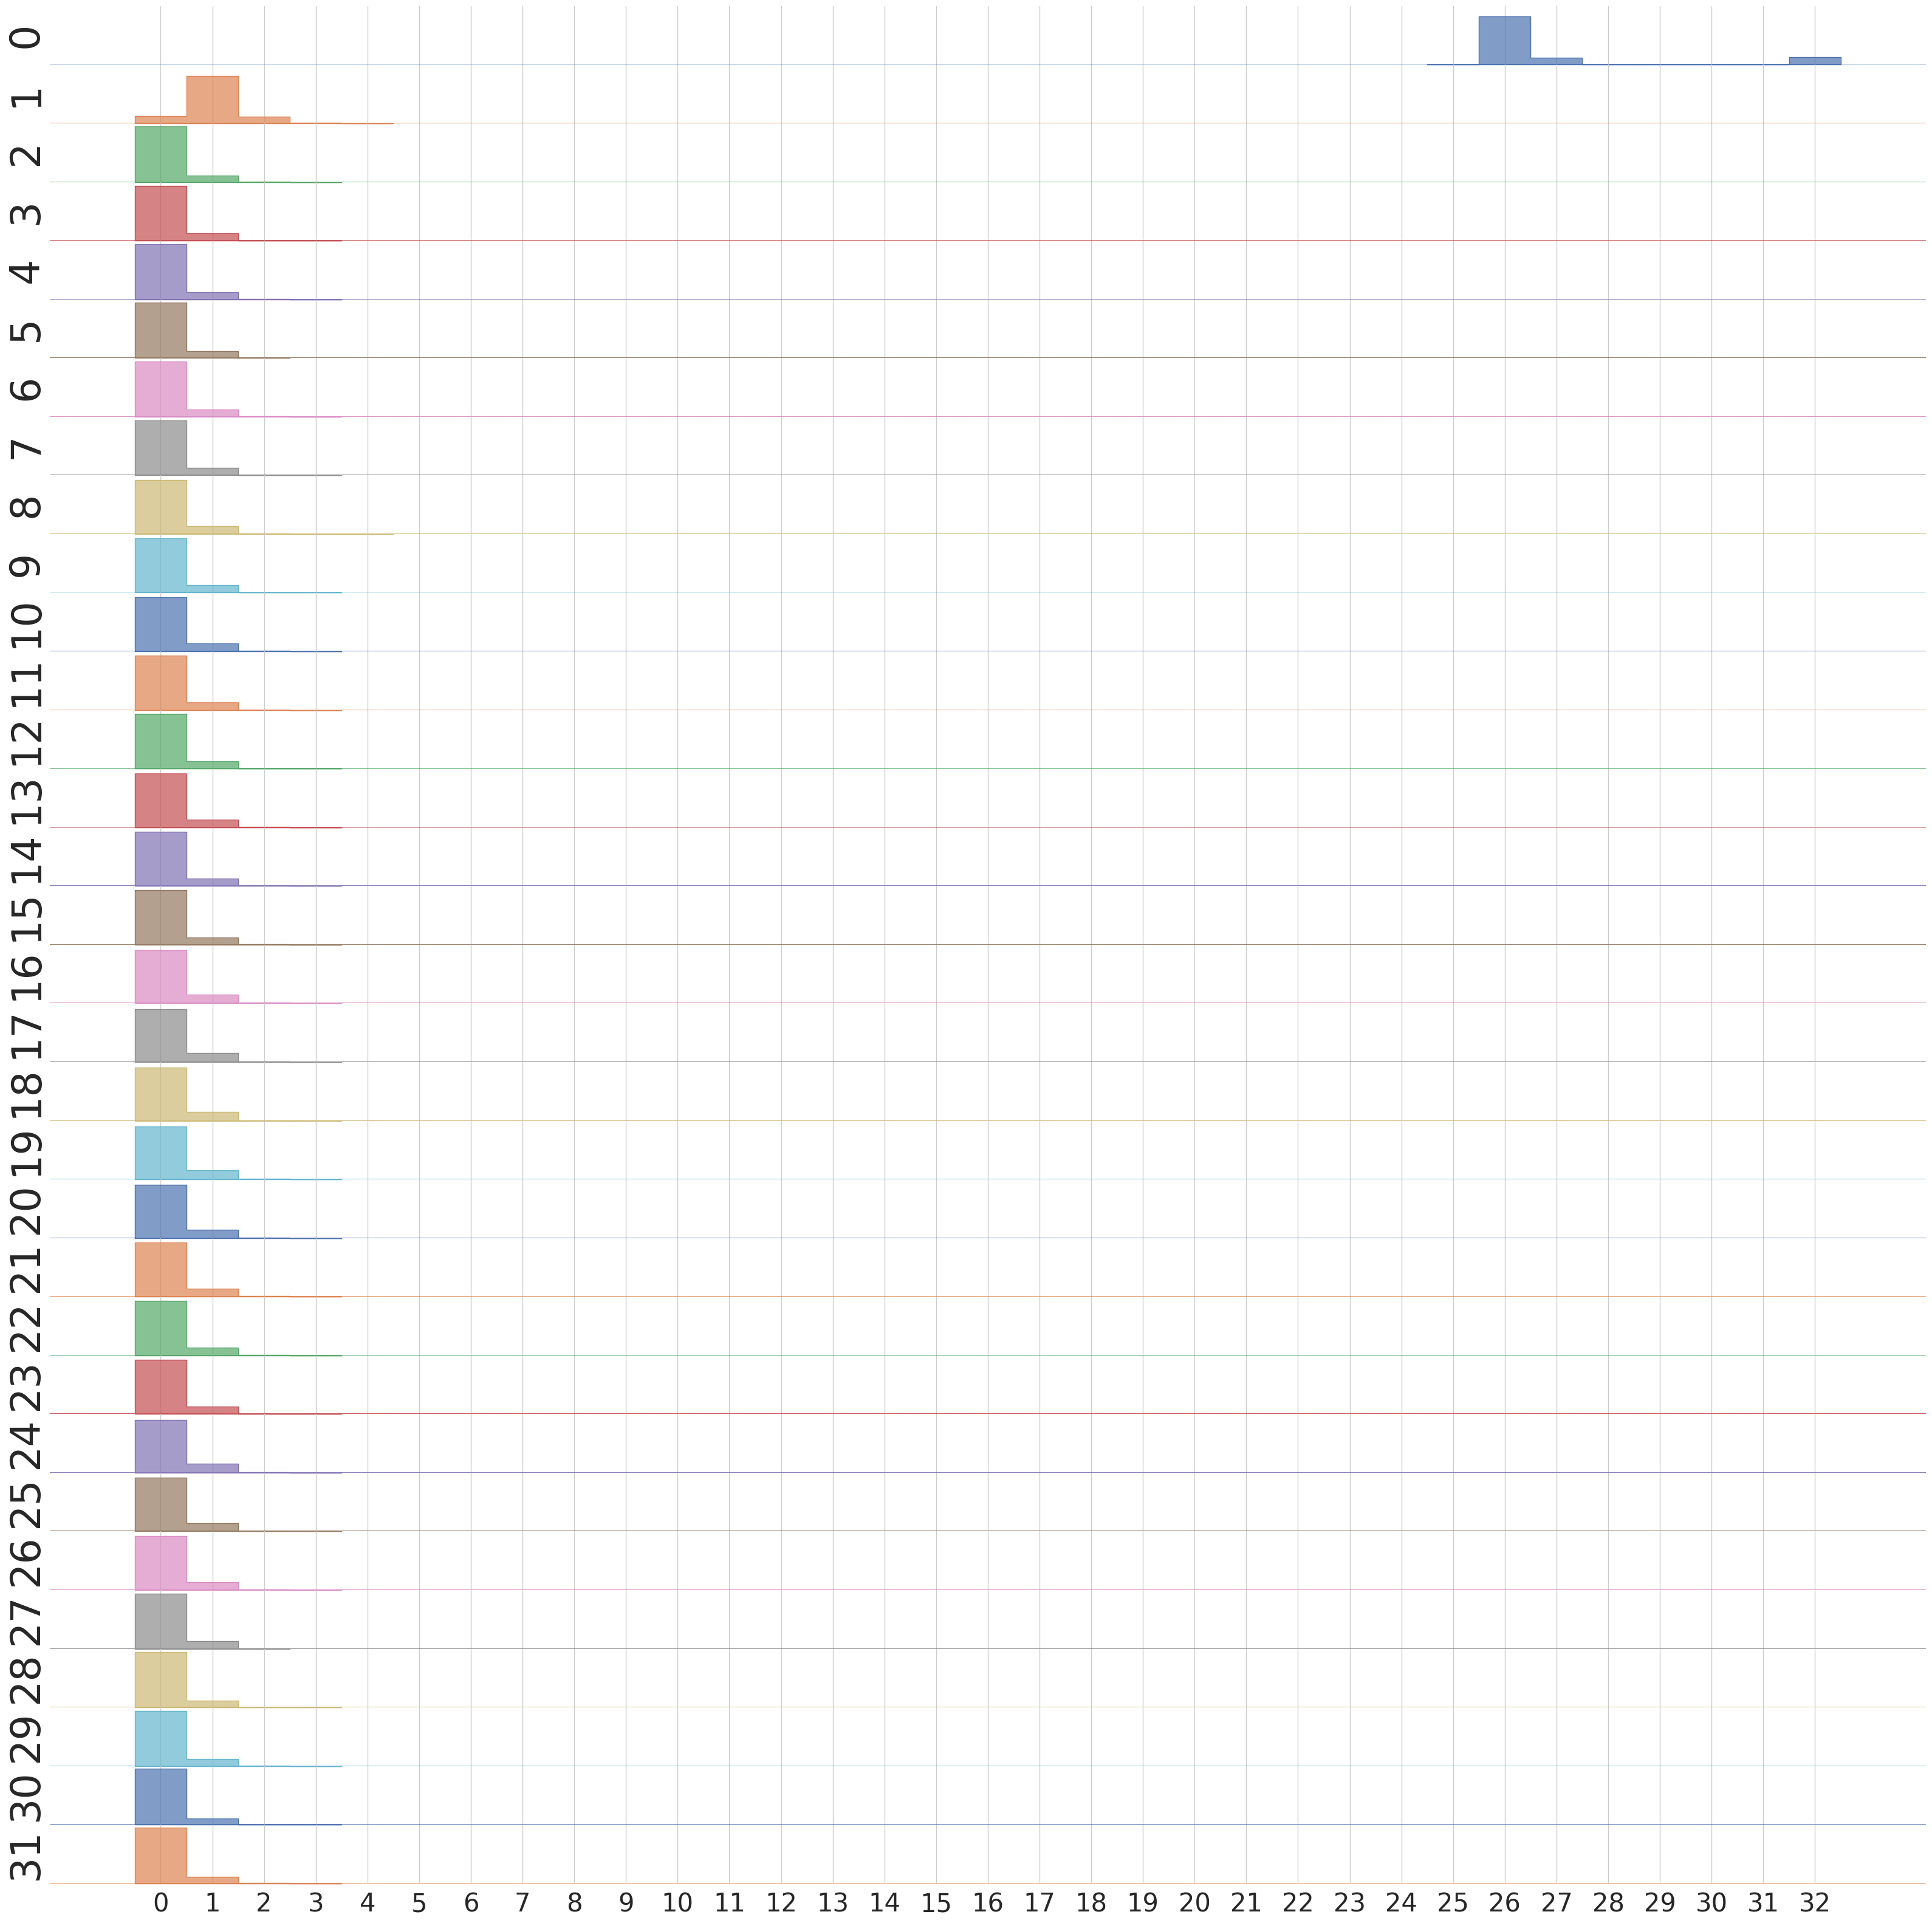

In [114]:
for dist_name in constants.DISTRIGBUTIONS.keys():
    for base in constants.BASES_ARRAY:
        plotting_hist_plot(dist_name, base)